In [2]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2
# from newtwoStage_TrAdaBoostR2 import TradaboostRegressor

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

################# Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance
import statistics

from matplotlib.transforms import Affine2D
import folium
import matplotlib.lines as mlines

In [4]:

# list1 = [1,2,3,4,5]
# list2 = [8,11,3,6,2]
#
#
# plt.plot(list1)
# plt.plot(list2)
#
# plt.xlim(0,5)
# plt.ylim(0,12)
# plt.show()
#
# list3 = [11,22,13,4,15]
# list4 = [8,10,33,16,12]
#
# plt.plot(list3)
# plt.plot(list4)
#
# plt.show()

#################################################### US dataset values ##############################################################################
# STrAdaBoost_R2 = [0.3499920107059404, 0.3467645814648515, 0.3474087045085105, 0.35185996022860255, 0.35174674250279553, 0.35754659302532416,
# 0.34418940176817525, 0.3483576181134574, 0.3552594790696396, 0.3538049305085866]
# TrAdaBoost_R2 = [0.31177952488061356, 0.31376073302969365, 0.3105154749168972, 0.309529302141986, 0.3092371947711122, 0.31100023372179947,
# 0.30770522580490034, 0.307304635438116, 0.3027210949114289, 0.31001887870912126]
# AdaBoost_R2 = [0.3487517026933318, 0.35430604434191754, 0.35286074859050515, 0.3491098044959589, 0.35521220984065166, 0.3539903605520701,
# 0.35052447003206144, 0.355841792728612, 0.3496482716467713, 0.34380832818202234]

# STrAdaBoost_RMSE = [3.8036186907059713, 3.770986345728527, 3.8125235157637096, 3.803790964018979, 3.8015810347510435, 3.7715791232224407,
# 3.8575583507707987, 3.813440708172479, 3.767247933940788, 3.7431917263908234]
# TrAdaBoost_RMSE = [3.7612254343513825, 3.753075193895662, 3.7628776474583097, 3.765966426632694, 3.7659406121590333, 3.762893002522557,
# 3.7697590542657906, 3.7731161450713526, 3.7844702335310583, 3.763940904839478]
# AdaBoost_RMSE = [3.946083198730631, 3.9350495453713776, 3.918969020956177, 3.8890480128533707, 3.90941198487245, 3.9974204824855977,
# 3.8655803597705445, 3.9288565735860073, 4.007996604840226, 3.966799409934465]

##########################################################################################################################################################

###################################################### UCI NOx dataset ##################################################################################
STrAdaBoost_R2_NOx = [0.85757187956229, 0.8624339662646199, 0.8701369286710239, 0.8629509288164462, 0.8643015255352531, 0.8638726987772449, 0.8700905649507416,
0.863980627975591, 0.8667477924692503, 0.860656862442605]
TrAdaBoost_R2_NOx = [0.8697284271936974, 0.8216213871208605, 0.8291166483355694, 0.8688454710469908, 0.8267868850000127, 0.8685441707342155, 0.8710339560638833,
0.8279627177377363, 0.8725557456845126, 0.8690093950798154]
AdaBoost_R2_NOx = [0.8166590725998687, 0.8320987503077001, 0.8273964317939513, 0.8320632430097761, 0.8349176794052081, 0.8193190101285323, 0.8231126099501817,
0.8235795255410121, 0.8345631067280633, 0.8280245260554618]

STrAdaBoost_R2_NO2 = [0.785200473563845, 0.7873218877926614, 0.7942410082910769, 0.7907762786577417, 0.792549076911386, 0.8010620460324492, 0.7845900577303571,
0.7882086469469509, 0.7919896063903515, 0.7893083019780898]
TrAdaBoost_R2_NO2 = [0.7275602736767004, 0.7303864660070596, 0.7258290035407275, 0.727321911126591, 0.7236037056261796, 0.728595302308445, 0.7287467011312051,
0.7304845644341812, 0.7283783013558736, 0.725977778702614]
AdaBoost_R2_NO2 = [0.7130760950641957, 0.7134534342160621, 0.7282760307184661, 0.7236460414725312, 0.7131119018479969, 0.7170667509072735, 0.7006955072932777,
0.7172854056616071, 0.7057770960221417, 0.6951531712421495]

STrAdaBoost_R2_O3 = [0.8496556424238082, 0.8496212416016606, 0.8496390302470577, 0.849018854918405, 0.8488613710503471, 0.8491357931194966, 0.8501506647747373,
0.8493297932573036, 0.8491848838055386, 0.8494929360874791]
TrAdaBoost_R2_O3 = [0.8533748798630838, 0.8533157948351648, 0.8534914143838899, 0.8526018221355194, 0.8510481166211975, 0.8554409433731467, 0.848584522950516,
0.8490425791881079, 0.8535451402656496, 0.853871346908591]
AdaBoost_R2_O3 = [0.8382607086035608, 0.8439197660242811, 0.8425141595457631, 0.8433525054682196, 0.8417002660237959, 0.8410978592453671, 0.837395682889855,
0.8378430258738239, 0.8406766073685135, 0.8349586534892812]

# STrAdaBoost_R2_NOx_Norm = [0.8199555134468449, 0.8249015745987702, 0.8022044998913905, 0.8143805842676244, 0.822155784756497, 0.8173542322608773,0.8249448717102337,
# 0.8185631482032165, 0.8192163276083386, 0.8101453674338048]
# TrAdaBoost_R2_NOx_Norm = [0.7904665425544077, 0.7905966687486852, 0.7979710714085547, 0.7971506804548922, 0.7878797015090524, 0.7854309215809062, 0.7935200292319016,
# 0.7932965853034101, 0.7942351307192466, 0.7923012255870907]
# AdaBoost_R2_NOx_Norm = [0.829702368027105, 0.8268270241346286, 0.8275188940973598, 0.8295770634283183, 0.82586492415963, 0.8276261657669087, 0.8342644917111145,
# 0.8276053910209487, 0.8263294519138552, 0.8353226494722151]
#
# STrAdaBoost_R2_NO2_Norm = [0.77108420868708, 0.7732026990011011, 0.7770777158849813, 0.7750016086536199, 0.773303330423262, 0.77746025789374, 0.7726418499562981,
# 0.7745530028994806, 0.7719169863341013,0.7642623652467678]
# TrAdaBoost_R2_NO2_Norm = [0.7257124465662599, 0.7185034268327415, 0.7153639184983205, 0.7203619580917767, 0.7315550730590483, 0.7206563857326502,0.7217963115631328,
# 0.7172679382487487, 0.726610926008715, 0.7314711209521539]
# AdaBoost_R2_NO2_Norm = [0.7127330289515392, 0.7047765731721333, 0.7211064380004452, 0.721948657357099, 0.6972348312103244, 0.7104986878056815, 0.715052221775772,
# 0.7008556917788611, 0.7218435501399236, 0.709641783963364]

###################################################################################################################################################################
STrAdaBoost_RMSE_NOx = [84.49069754636324, 83.19323870128466, 81.27928359120179, 82.18747206693598, 82.60804181502738, 82.65985343387109,
81.93233750015905, 83.74998065696522, 82.92239432705983, 84.71932508116717]
TrAdaBoost_RMSE_NOx = [76.29870110031176, 90.49733765158976, 88.66740065772586, 76.61069182772832, 89.19167720613721, 76.63572940793705,
75.91621027222305, 88.91209884411252, 75.66965212493261,76.56390041476169]
AdaBoost_RMSE_NOx = [90.63932170294021, 87.15426790901572, 88.34473432945258, 86.93531815065907, 86.09325821106664, 90.33874900883123,
89.75706293974721, 89.18255026677808, 86.79257145189278,88.15379488581348]

STrAdaBoost_RMSE_NO2 = [24.283690808360245, 24.127661779305818, 23.795924043958564, 23.86071279600051, 23.842607206027456, 23.678043189310404,
24.832202009871946, 24.72540998123888, 23.952057769016328, 24.499915240375014]
TrAdaBoost_RMSE_NO2 = [29.967565846373816, 29.918410405444156, 30.07324513362625, 30.057292629368256, 30.15716067372586, 30.099997992631963,
30.169099696332275, 30.116280516373376, 29.989850789314207, 30.29776937245375]
AdaBoost_RMSE_NO2 = [27.587178104589203, 27.64482357816312, 26.6654992063022, 26.949370826873007, 27.357169025084616, 27.438634766666453,
28.137109920599684, 27.36063648100872, 27.929103697001345, 28.52297816586722]

STrAdaBoost_RMSE_O3 = [173.64151805705194, 173.6334619111963, 173.65662665726717, 174.1308577850406, 174.0310122302578, 174.07118389774956, 173.3810950553901,
173.7619765646141, 173.89517540044486, 173.71213163191527]
TrAdaBoost_RMSE_O3 = [171.6515413016132, 170.14551538005634, 170.69377563176536, 170.23152266767838, 172.05586024289434, 169.06705817239322, 173.20665423910825,
172.54867998954228, 170.27823788650394, 170.2347615205619]
AdaBoost_RMSE_O3 = [180.68119379123922, 177.1889644285649, 178.03999086375444, 177.73683263644602, 178.61357778268032, 178.53935080389707, 180.62098338916542,
180.12605079594596, 179.4711714920254, 182.32380075254858]

# STrAdaBoost_RMSE_NOx_Norm = [116.56207487781757, 117.12744898440695, 122.21001928176337, 116.02213691302707, 115.01356572936842, 117.82206454755801, 116.33390399761493,
# 117.29859060209448, 117.15492417635203, 118.52620461003417]
# TrAdaBoost_RMSE_NOx = [135.32110275619965, 134.39566747250927, 134.72552610715496, 133.4738476573543, 136.75743147426928, 136.6462951739915, 134.9491286623907,
# 134.6030488331259, 134.27917844884996,135.24583900366477]
# AdaBoost_RMSE_NOx = [87.51229327934197, 88.32432900140913, 88.08834819883502, 87.52912955139539, 88.6824868839292, 88.11432378088877, 86.51542456695174,
# 88.2780125086002, 88.42890140495514, 85.80770659201272]
#
# STrAdaBoost_RMSE_NO2_Norm = [45.623681500346684, 45.627289088592484, 45.6410716215836, 45.950142322965014, 45.746781764008034, 45.51898933766781, 46.416842540407266,
# 45.61379839353198, 45.46275490362647, 45.48011193000623]
# TrAdaBoost_RMSE_NO2 = [44.74193223206197, 44.65640007857625, 44.7477254703826, 44.74501305364314, 44.80431951909328, 44.74216239294229, 44.65573169849547,
# 44.81223332738691, 44.59243606389392, 44.66763885614316]
# AdaBoost_RMSE_NO2 = [27.386627364748396, 27.91727196005653, 27.064526060877395, 26.934118784173428, 28.273217386873775, 27.57585539705687, 27.490141344356058,
# 28.16892932308915, 27.31365610561806, 27.90207530790275]

############################################################################################################################################################



[1.039604215471373, 6.407662653321042, 1.5118200765660816]
[0.3875326925270318, 0.10500245342796014, 0.517026480068619]
[0.22422446673539903, 1.2273165130868706, 1.517675273566854]


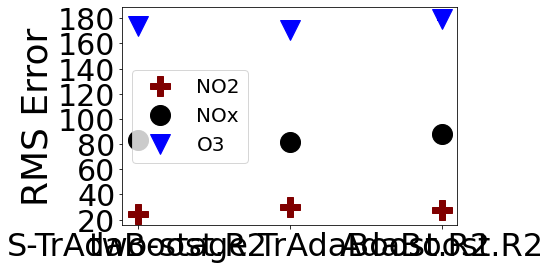

In [13]:
methods = ['S-TrAdaBoost.R2', 'two-stage TrAdaBoost.R2', 'AdaBoost.R2']

# STrAdaBoost_R2_val = (max(STrAdaBoost_R2) - min(STrAdaBoost_R2))/2
# AdaBoost_R2_val = (max(AdaBoost_R2) - min(AdaBoost_R2))/2
# TrAdaBoost_R2_val = (max(TrAdaBoost_R2) - min(TrAdaBoost_R2))/2

STrAdaBoost_std1 = statistics.pstdev(STrAdaBoost_RMSE_NOx)
TrAdaBoost_std1 = statistics.pstdev(TrAdaBoost_RMSE_NOx)
AdaBoost_std1 = statistics.pstdev(AdaBoost_RMSE_NOx)

STrAdaBoost_std2 = statistics.pstdev(STrAdaBoost_RMSE_NO2)
TrAdaBoost_std2 = statistics.pstdev(TrAdaBoost_RMSE_NO2)
AdaBoost_std2 = statistics.pstdev(AdaBoost_RMSE_NO2)

STrAdaBoost_std3 = statistics.pstdev(STrAdaBoost_RMSE_O3)
TrAdaBoost_std3 = statistics.pstdev(TrAdaBoost_RMSE_O3)
AdaBoost_std3 = statistics.pstdev(AdaBoost_RMSE_O3)

# STrAdaBoost_std3 = statistics.pstdev(STrAdaBoost_R2_NOx_Norm)
# TrAdaBoost_std3 = statistics.pstdev(TrAdaBoost_R2_NOx_Norm)
# AdaBoost_std3 = statistics.pstdev(AdaBoost_R2_NOx_Norm)
#
# STrAdaBoost_std4 = statistics.pstdev(STrAdaBoost_R2_NOx_Norm)
# TrAdaBoost_std4 = statistics.pstdev(TrAdaBoost_R2_NOx_Norm)
# AdaBoost_std4 = statistics.pstdev(AdaBoost_R2_NOx_Norm)


y1 = [mean(STrAdaBoost_RMSE_NOx), mean(TrAdaBoost_RMSE_NOx), mean(AdaBoost_RMSE_NOx)]
dy1 = [STrAdaBoost_std1, TrAdaBoost_std1, AdaBoost_std1]


y2 = [mean(STrAdaBoost_RMSE_NO2), mean(TrAdaBoost_RMSE_NO2), mean(AdaBoost_RMSE_NO2)]
dy2 = [STrAdaBoost_std2, TrAdaBoost_std2, AdaBoost_std2]

y3 = [mean(STrAdaBoost_RMSE_O3), mean(TrAdaBoost_RMSE_O3), mean(AdaBoost_RMSE_O3)]
dy3 = [STrAdaBoost_std3, TrAdaBoost_std3, AdaBoost_std3]

# y3 = [mean(STrAdaBoost_R2_NOx_Norm), mean(TrAdaBoost_R2_NOx_Norm), mean(AdaBoost_R2_NOx_Norm)]
# dy3 = [STrAdaBoost_std3, TrAdaBoost_std3, AdaBoost_std3]
#
# y4 = [mean(STrAdaBoost_R2_NO2_Norm), mean(TrAdaBoost_R2_NO2_Norm), mean(AdaBoost_R2_NO2_Norm)]
# dy4 = [STrAdaBoost_std4, TrAdaBoost_std4, AdaBoost_std4]

plus = mlines.Line2D([], [], marker='P', color='maroon', linestyle='None',
                          markersize = 20, label='NO2')
circle = mlines.Line2D([], [], marker='o', color='black', linestyle='None',
                          markersize = 20, label='NOx')
triangle = mlines.Line2D([], [], marker='v', color='blue', linestyle='None',
                          markersize = 20, label='O3')


x = np.arange(len(methods))

print(dy1)
print(dy2)
print(dy3)

fig, ax = plt.subplots()

# trans1 = Affine2D().translate(-0.025, 0.0) + ax.transData
# trans2 = Affine2D().translate(+0.025, 0.0) + ax.transData
# trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
# trans4 = Affine2D().translate(-1.5, 0.0) + ax.transData

# er1 = ax.errorbar(x, y1, yerr = dy1, marker = "o", linestyle = "None", transform = trans1, elinewidth = 10, markersize = 20)
# er2 = ax.errorbar(x, y2, yerr = dy2, marker = "s", linestyle = "None", transform = trans2, elinewidth = 6, markersize = 10)
# er3 = ax.errorbar(x, y3, yerr = dy3, marker = "o", linestyle = "None", transform = trans3)
# er4 = ax.errorbar(x, y4, yerr = dy4, marker = "o", linestyle = ":", transform = trans4)


plt.errorbar(x, y1, yerr = dy1, fmt='o', color='black', ecolor='black', elinewidth = 10, markersize = 20) #capsize=0)
plt.errorbar(x, y2, yerr = dy2, fmt='P', color='maroon', ecolor='maroon', elinewidth = 10, markersize = 20)
plt.errorbar(x, y3, yerr = dy3, fmt='v', color='blue', ecolor='blue', elinewidth = 10, markersize = 20) #capsize=0)
# plt.xticks(x)
plt.xticks(np.arange(3), ('S-TrAdaBoost.R2', 'two-stage TrAdaBoost.R2', 'AdaBoost.R2'), fontsize = 32)
plt.yticks(fontsize = 30)
plt.ylabel("RMS Error", fontsize = 36)
# plt.title('Mean RMSE for methodologies with Standard deviation error bars', fontsize=12)
plt.legend(handles= [plus, circle, triangle], fontsize = 20, loc= 'center left')

plt.show()

# fig, ax = plt.subplots()
# ax.bar(x, y, yerr=dy, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.yticks(np.arange(0.25, 0.40, 0.02))
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
# ax.set_xticks(x)
# ax.set_xticklabels(methods)
# ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
# ax.yaxis.grid(True)
# plt.tight_layout()
# plt.show()



In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);


In [22]:
############################## Concrete Dataset #################################################################

AdaBoostR2_RMSE_concrete = [25.1445624821835, 24.912373981084546, 24.805280399019527, 24.988580167915398, 25.065948449793556, 24.838758600247967, 25.101701871150688, 24.912750097361723, 25.025542102164728, 24.6397462202718, 24.878522644650637, 25.10761556403559, 24.96007756325198, 24.923729808885856, 24.95749178029135, 24.962273047738606, 25.15542994215213, 24.883646916170367, 24.920253601478247, 25.004985237590425, 24.98472063515295, 24.888636846730517, 24.856594197874788, 24.974032449717384, 25.069567357544408, 24.956429397791368, 24.875872677214296, 25.2596446443613, 24.951600425601843, 25.0548785982125, 24.848231790961485, 25.04282611941426, 24.984509703049604, 24.875140098261088, 25.066145631404186, 25.015039454084256, 24.95322647306279, 25.207206001825963, 25.0866918363584, 25.17646469198866, 24.926548191275504, 25.040617390520516, 24.981843501117247, 25.0595551010616, 25.015665143019444, 24.778091680896875, 25.05006864651223, 24.977302749609468, 24.946161845211723, 24.994754586757722
]
KMM_TL_RMSE_concrete = [24.744720623031114, 24.91854360129619, 24.744720623031117, 24.92084590549092, 24.979144917617624, 24.8307469495567, 24.91854360129619, 24.500529268664298, 24.898486647363306, 24.8307469495567, 24.8307469495567, 24.504337045010733, 24.979144917617624, 24.92084590549092, 25.035873199275, 24.91854360129619, 24.442558548765764, 25.13211553859816, 24.979144917617624, 24.91854360129619, 25.013616762353283, 24.8307469495567, 24.86385518398927, 24.95309916479791, 24.744720623031114, 24.779518587543226, 24.26532612416335, 24.979144917617624, 24.887813485876038, 24.8307469495567, 24.8307469495567, 24.91854360129619, 25.013616762353283, 24.8307469495567, 24.91854360129619, 24.91854360129619, 24.95309916479791, 24.979144917617624, 24.86385518398927, 24.979144917617624, 25.013616762353283, 25.035873199275, 25.13211553859816, 24.744720623031114, 24.979144917617624, 24.91854360129619, 25.13211553859816, 24.38680273858246, 24.323719245765812, 24.744720623031114
]
GBR_RMSE_concrete = [23.949011908308638, 23.264399575799732, 23.678342111169933, 23.443810844442837, 23.764529492496447, 23.90679631995737, 23.870676342292466, 23.844432283284974, 23.540656101735365, 23.555211876725764, 23.601841215976133, 23.435252086852312, 23.606657969576723, 23.733318879289094, 23.62928306815328, 23.772047315676524, 23.7481977025137, 23.41680527239944, 23.49964947620441, 23.391668370469347, 23.5976570304688, 23.598087860392624, 23.5852789042943, 23.581333887714244, 23.486688407440656, 23.89344431747958, 23.622705666004595, 23.417528209222706, 23.465360886163317, 23.561814143565964, 23.467008304986663, 23.594518400312467, 23.75203451383175, 23.77188971534208, 23.708967178774337, 23.503016554617368, 23.754255338829932, 23.650670386595046, 23.54891138940766, 23.712268405297884, 23.686436355932766, 23.7633225619814, 23.8028473538377, 23.539439561660163, 23.891816144025032, 23.461154416791334, 23.396022375310675, 23.561925134788154, 23.766146196100046, 23.51655556868801
]
# TranTrAdaBoost_R2_concrete = [0.39854261877359787, 0.4032779665385544, 0.3923450075953078, 0.3879446523226336, 0.1676471182936492, 
#                               0.4092323780055153, 0.3957850885063505, 0.397045316693211, 0.3985356091402983, 0.4005507820515138]
# TrAdaBoost_R2_concrete = [0.6899170855909796, 0.6560429549089261, 0.6391429155913774, 0.6378505890265155, 0.6897127921144744, 
#                           0.6482192187623274, 0.6478066156034467, 0.6376919205816374, 0.6484762083644129, 0.6891822909108275]
AdaBoost_TL_RMSE_concrete = [14.033132658251528, 13.97149337087492, 14.056764284106913, 13.986706827281687, 13.765163132476326, 13.909536180029537, 13.993677181799406, 14.006289823956859, 14.050963443390755, 13.84337563393696, 14.017305522089462, 13.998033994162626, 13.979202223848448, 14.018731961534963, 13.955707593158177, 13.896466632992535, 14.049362142009667, 13.969444935568319, 14.091412985115964, 14.05587378055674, 14.071175188877534, 14.144949426975032, 14.124447068525498, 13.942123608566662, 13.976508028119405, 14.09134704555708, 13.991734190908552, 13.900660071703538, 14.17855639858941, 14.08600663006607, 14.068128077906529, 14.050656153221727, 14.049842128601773, 13.901404618925577, 13.944132275422215, 13.986708857987736, 14.017100890836218, 13.862232211474288, 13.998444261993427, 14.17426719060141, 14.061727115525319, 13.901081572264813, 13.961609157081268, 14.256037650470612, 14.02148885860859, 13.987383400743264, 14.203791134179529, 13.994918820175366, 14.100017032870626, 13.954142037517194
]
GBR_TL_RMSE_concrete = [11.10489545342996, 11.317443758229656, 11.185799251055936, 11.201438764474922, 11.292076594151801, 11.230382254998112, 11.251147054065294, 11.399500047768942, 11.365121921693348, 11.290742183871592, 11.310283041084478, 11.24445615235517, 11.175332213010988, 11.217151377129294, 11.307975683651506, 11.267194491076413, 11.161987397268163, 11.149762414563389, 11.223575279861892, 11.27158273763264, 11.525953294994519, 11.385061686364581, 11.261107870790916, 11.37800597824643, 11.147034106129368, 11.112695115765625, 11.114867381924334, 11.18072311137967, 11.328030771689372, 11.343596836557069, 11.278644091237522, 11.43768386284828, 11.058221079525948, 11.223450671667603, 11.297453913324581, 11.318259763997165, 11.072981316499568, 11.507519684516865, 11.291475164636367, 11.38937250065832, 11.14461265613755, 11.39791995367061, 11.431345970438326, 11.27886395002509, 11.094603361634219, 11.195937582773604, 11.359615083333956, 11.100950379559793, 11.398225485445545, 11.32734866537297
]
STrAdaBoost_WO_RMSE_concrete = [13.268191005566301, 13.176639314363708, 13.329841782522989, 13.236315458094806, 13.197473913806927, 13.1756243723047, 12.817363043877114, 12.746473314829526, 12.821420495530615, 13.28999854774842, 13.413384852529429, 12.851762405384124, 13.358450242584134, 12.641872694098247, 13.451581023662138, 13.07502886317115, 13.540257034694765, 13.233743771583594, 12.994278059371746, 13.094489248876856, 13.212298190136423, 13.104155817903212, 13.082670178757096, 13.271357968169005, 12.584743109394614, 13.457362028945662, 13.03735847809319, 12.678933999516875, 13.436194030790361, 12.962193269334003, 13.185566804456803, 12.900832253896525, 13.09921368426992, 13.294543225743466, 12.976534236881296, 13.11838937669114, 12.73947012912856, 13.145282403203773, 12.939625049750283, 12.892877181176067, 12.911724341537331, 12.915000128638477, 13.329229800853373, 13.359075858756519, 12.881127364029561, 13.372858773804019, 13.23381611469727, 13.14449080507789, 12.965862741635583, 12.891110624731086
]
STrAdaBoost_RMSE_concrete = [13.165769795097278, 13.074398116797871, 13.259689009990243, 13.273649821674493, 13.09297748084975, 13.247305603160155, 13.123240858495565, 13.040115309180763, 12.892926177388011, 13.597068189335328, 13.12213644121916, 12.691083544610477, 13.54542053229595, 13.385242734612035, 13.070170286965695, 13.340362819179141, 12.79751245443226, 12.89821613912217, 12.808155926712617, 13.20820356778223, 13.069752286707713, 13.471932035247683, 13.104893515585065, 13.422889336127236, 12.977959117710913, 13.404343173247586, 12.933568530613256, 12.956424846058729, 12.514751145042634, 13.347689458126919, 12.805651310159357, 13.853891500465638, 12.75665568634949, 13.485683383762417, 13.220125792786593, 13.033917933876555, 13.068453203363076, 13.177212059094249, 12.99183492330719, 13.490972703121225, 13.125342779481851, 13.289480347678369, 12.930700757912776, 13.27081014169832, 13.184229667510616, 13.594913601407331, 12.89175162849853, 13.26966650252283, 12.982737738810693, 13.030099793584371
]



AdaBoostR2_R2_concrete = [0.42247526730730356, 0.4269888119951741, 0.4357283460379593, 0.4276983169323124, 0.43261933596480545, 0.4331042632032178, 0.43219202310142946, 0.42460027298819303, 0.4261210725580023, 0.4351809823233441, 0.4313482161261099, 0.4255216410168263, 0.43059379316782215, 0.42763210865169027, 0.4332700172699098, 0.4272296920601842, 0.4287631013881078, 0.43115592830061483, 0.43104006930177935, 0.4284975561616376, 0.43344330682811016, 0.4253287308426568, 0.435964021981991, 0.42623239377375494, 0.4234992709903744, 0.42498069218665097, 0.4358090556250606, 0.42893829923445775, 0.4296515948743312, 0.43379161634558083, 0.4383687960376866, 0.42639915266334194, 0.43633948687195695, 0.43047567389549396, 0.43756384956334, 0.4261828370889345, 0.43308792316129924, 0.4334906093496212, 0.4309681251407644, 0.42111450235172404, 0.4306918578454512, 0.4293257257035828, 0.4297020149728637, 0.4262868461874377, 0.43843249826862457, 0.4301075179827954, 0.43673894569718424, 0.4294376005715457, 0.4285329798066105, 0.4271157912984317
]
KMM_TL_R2_concrete = [0.2508296609168255, 0.2401422717307617, 0.2508296609168254, 0.2570549442185331, 0.23761354208322605, 0.24625669919547627, 0.2401422717307617, 0.22164808826376853, 0.25475737856058783, 0.24625669919547644, 0.24625669919547627, 0.2081420572680488, 0.23761354208322605, 0.2570549442185332, 0.24976330905056915, 0.24014227173076175, 0.2107012869375939, 0.22851257874417663, 0.23761354208322605, 0.2401422717307617, 0.2475268730480674, 0.24625669919547638, 0.24460853765469323, 0.25013843913648603, 0.2508296609168255, 0.26118531852516913, 0.22133400200102124, 0.23761354208322605, 0.2587715241736991, 0.24625669919547633, 0.24625669919547644, 0.2401422717307617, 0.24752687304806728, 0.24625669919547627, 0.2401422717307617, 0.24014227173076175, 0.25013843913648603, 0.23761354208322605, 0.2446085376546933, 0.237613542083226, 0.2475268730480674, 0.2497633090505692, 0.22851257874417663, 0.2508296609168254, 0.2376135420832261, 0.24014227173076158, 0.2285125787441767, 0.2150858586252815, 0.23275013398846378, 0.2508296609168254
]
GBR_R2_concrete = [0.557096219485582, 0.5611317946384129, 0.567426989176343, 0.57211542650383, 0.5616381131884202, 0.552059604462771, 0.5621921308549014, 0.5560144182047686, 0.5647961533615511, 0.5616251104731248, 0.5609285269985383, 0.574163793372273, 0.571585358099042, 0.5636238530454275, 0.5610990894134463, 0.5604026298104428, 0.5716117969153454, 0.5667133649366403, 0.5541659566102698, 0.5560637687708834, 0.5556206995982987, 0.5799503369363274, 0.5673605125693407, 0.5657965223340335, 0.5563468918955721, 0.5608371905550521, 0.5482754831819103, 0.5622296441309479, 0.5574538026270986, 0.5679559027205251, 0.5652904341068429, 0.5654004374521524, 0.5723626547502735, 0.5614524259544773, 0.5663568440057645, 0.5519296480450585, 0.558735340488976, 0.5520256555514298, 0.5595930676192684, 0.5543749796009366, 0.5595241787818418, 0.5616264555627881, 0.5461613446865029, 0.5656016059382374, 0.5556352916641341, 0.5638095590956617, 0.5539349369148547, 0.5719284338232719, 0.5625747451501006, 0.56244620904332
]
# TranTrAdaBoost_RMSE_concrete = [21.364219944272392, 20.232623630908922, 21.52352495485198, 23.086793392289856, 
#                                 19.87180292274346, 20.053265659358196, 20.343371802059924, 20.340172040648504, 20.084102887966367, 19.74177519499400]
# TrAdaBoost_RMSE_concrete = [14.192989670331823, 14.43569178949748, 14.535641692631248, 15.018603173015507, 14.785376481367354, 
#                             14.503277567574509, 14.49042659656832, 14.568565689876529, 14.527504918446278, 14.187694659210285]
AdaBoost_TL_R2_concrete = [0.6687378630962556, 0.6712837338537102, 0.6640321332357365, 0.6699397533946001, 0.6746142164252001, 0.6723738754129336, 0.6601925205732875, 0.6705507597288322, 0.6662951446022952, 0.672243884567852, 0.672819261731296, 0.6681367857827731, 0.6633196956495357, 0.6637472569124936, 0.6680839535240736, 0.671182750209493, 0.6660939728211536, 0.6707846652828015, 0.6606658758538486, 0.6659440969449785, 0.6654674553293589, 0.6624309269219376, 0.6606557556542428, 0.6740080684840065, 0.6707366980857107, 0.6654113144426425, 0.6707597971125508, 0.6677874476521541, 0.6629880723748038, 0.6621585977178445, 0.6658520119601389, 0.6651113578597915, 0.6673625941769384, 0.6708985004086104, 0.6669399428210856, 0.6677244203324745, 0.6652759588855605, 0.6742920320079416, 0.6669256607304511, 0.6635397147441552, 0.666910461791464, 0.6731630861800013, 0.6678505655483615, 0.6582218929266764, 0.6661330831766438, 0.6699357341070792, 0.6605953522550425, 0.6658456357590754, 0.6673580687659422, 0.6658944566555856
]
GBR_TL_R2_concrete = [0.7064809207548741, 0.6865099151977245, 0.6918636878725104, 0.6937004750233723, 0.6907500748993934, 0.6919412484829445, 0.7016988299360863, 0.6876069870060312, 0.68614811869587, 0.681230218917802, 0.6901040500331245, 0.6930840687096732, 0.6986505464696998, 0.698430061058058, 0.6908787803117123, 0.687739233391973, 0.6953088219429806, 0.7002907271064522, 0.6877972746660668, 0.6949694200990096, 0.6862234158486449, 0.6850995880276198, 0.6833367583803356, 0.680662033888598, 0.6909693192514952, 0.6951845325711071, 0.691856738440226, 0.693554414227212, 0.6888396702460979, 0.6896095876972113, 0.6883066238177554, 0.6910287729249122, 0.6953790500822458, 0.6902067541057054, 0.6889885007235833, 0.6824163109704824, 0.698382589167836, 0.6881122668605621, 0.6933616037718401, 0.687449568136275, 0.6966438714311173, 0.6940184370545374, 0.6895611705569106, 0.6891487715369207, 0.70077779672208, 0.6877759464802646, 0.6930572833253698, 0.6956158994211701, 0.6878702989717269, 0.6906978630110815
]
STrAdaBoost_WO_R2_concrete = [0.676275647898821, 0.6874483920949978, 0.6953014910784703, 0.694172182176187, 0.6861433059323604, 0.6798721808162461, 0.7100602038359791, 0.7016852232777254, 0.7136322782165895, 0.6997786418077278, 0.677608584420279, 0.7267921724535821, 0.6990086001078076, 0.7191035115561859, 0.7000913508530702, 0.7063367266752592, 0.6691935493051118, 0.6913005559266293, 0.7203804354570984, 0.6952834990546664, 0.6862465141697736, 0.6958381700974341, 0.7016592537100813, 0.6993231973110344, 0.7119084965902909, 0.6680556147011113, 0.7123840070930613, 0.7139397670418737, 0.6853821017161972, 0.6915439434791458, 0.7078367774196758, 0.7074244791926736, 0.6954826860334561, 0.6866790798942192, 0.6994783246310456, 0.6718816213057147, 0.7026399414295662, 0.7242749985659657, 0.6991172676740484, 0.6966234989466192, 0.7067020698741554, 0.7109738683088094, 0.695398043416306, 0.6905935222101353, 0.7113168039566087, 0.6818036962160494, 0.6929922120852853, 0.6826454302533607, 0.7046599808611783, 0.6975127910562396
]
STrAdaBoost_R2_concrete = [0.6824587665241756, 0.7000288329149731, 0.686453292615676, 0.7132146551977346, 0.6981898898598009, 0.694052458896397, 0.6857392721388489, 0.6938962397531534, 0.6984801105909586, 0.6680019414801442, 0.6894314969546954, 0.7197879760593894, 0.670230558660862, 0.7031659551702549, 0.6979033999899257, 0.6884746846430633, 0.7004741455570017, 0.7050863709219719, 0.7091326203485151, 0.6947443279318243, 0.6921940628652798, 0.6884351363220266, 0.6809604319021425, 0.6850339426773844, 0.7041979702533148, 0.6646494212519919, 0.6876627052314003, 0.6972553166906272, 0.7082619404065773, 0.7066142129536094, 0.6990494406105575, 0.6679408284169868, 0.7030948734428628, 0.6916595931991045, 0.6927898263932184, 0.6998744411058814, 0.7114499179011405, 0.6938942246428482, 0.7117881689126633, 0.6514416032505669, 0.6916337576754464, 0.6909672674537939, 0.6987195937705829, 0.6912965388095141, 0.6857672555473866, 0.6760525036299505, 0.6949169063450175, 0.6855057717386921, 0.6939841871485641, 0.6919246817622501
]


----------------------------------------------------------------------------------------------------------------


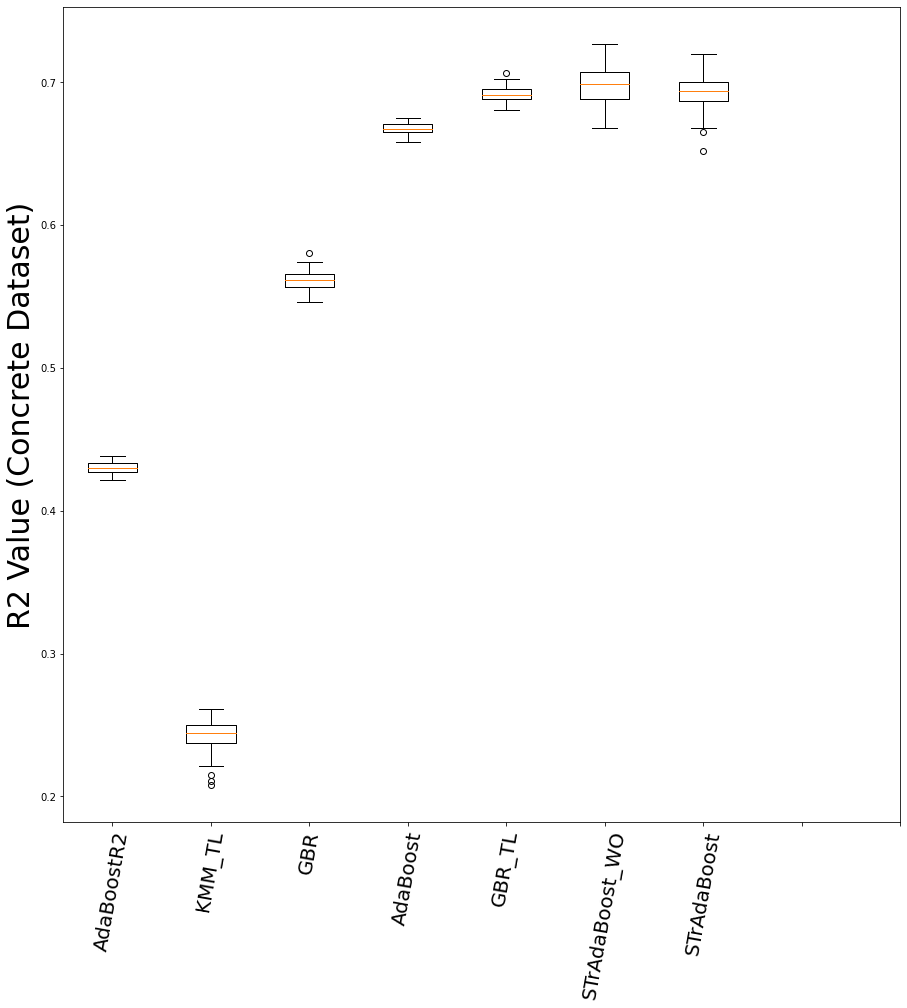

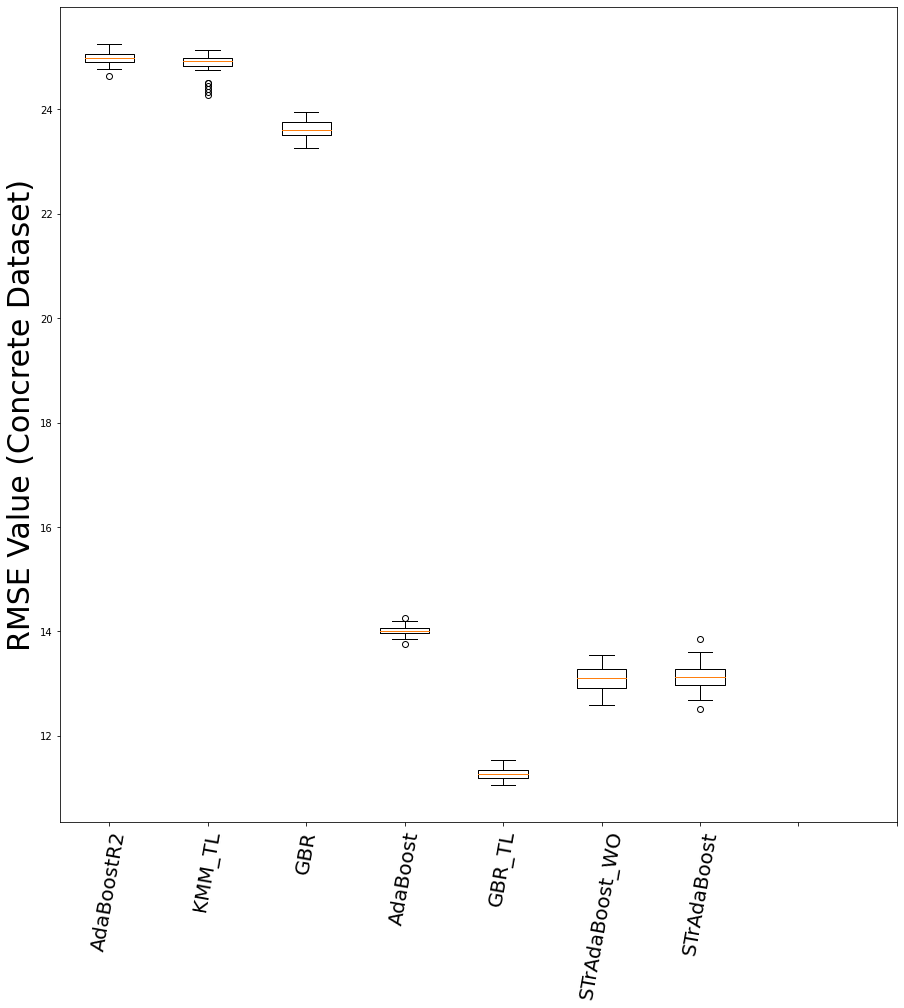

In [25]:
concrete_R2_data_np = np.array([AdaBoostR2_R2_concrete, KMM_TL_R2_concrete, GBR_R2_concrete, 
                            AdaBoost_TL_R2_concrete, GBR_TL_R2_concrete, STrAdaBoost_WO_R2_concrete, STrAdaBoost_R2_concrete])

concrete_R2_data_np = concrete_R2_data_np.transpose()

# print(concrete_R2_data_np.shape)

concrete_RMSE_data_np = np.array([AdaBoostR2_RMSE_concrete, KMM_TL_RMSE_concrete, GBR_RMSE_concrete,
                            AdaBoost_TL_RMSE_concrete, GBR_TL_RMSE_concrete, STrAdaBoost_WO_RMSE_concrete, STrAdaBoost_RMSE_concrete])

concrete_RMSE_data_np = concrete_RMSE_data_np.transpose()

# print(concrete_RMSE_data_np.shape)

concrete_R2_dataset = pd.DataFrame(concrete_R2_data_np, index = None, columns = ['AdaBoostR2_R2_concrete', 'KMM_TL_R2_concrete', 'GBR_R2_concrete', 
                                                                   'AdaBoost_TL_R2_concrete', 'GBR_TL_R2_concrete', 'STrAdaBoost_WO_R2_concrete', 'STrAdaBoost_R2_concrete'])
concrete_RMSE_dataset = pd.DataFrame(concrete_RMSE_data_np, index = None, columns = ['AdaBoostR2_R2_concrete', 'KMM_TL_R2_concrete', 'GBR_R2_concrete', 
                                                                    'AdaBoost_TL_R2_concrete', 'GBR_TL_R2_concrete', 'STrAdaBoost_WO_R2_concrete', 'STrAdaBoost_R2_concrete'])

#'TranTrAdaBoost_R2_concrete', 'TrAdaBoost_R2_concrete'

plt.figure(figsize=(15,15))
plt.boxplot(concrete_R2_dataset.values)

labels = ['AdaBoostR2', 'KMM_TL', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost_WO', 'STrAdaBoost']

#'TranTrAdaBoost', 'TrAdaBoost',

x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Concrete Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Concrete")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(concrete_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Concrete Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Concrete")

In [28]:
############################## Housing Dataset #################################################################

AdaBoostR2_RMSE_housing = [8.345243559157598, 8.371147735012663, 8.32342415816171, 8.371049051681059, 8.312001963601022, 8.30297307887837, 8.290575579202276, 8.30556900274733, 8.348037141437608, 8.332972320179577, 8.282482461747176, 8.310462689271667, 8.340101498346737, 8.260982362334675, 8.30086432768215, 8.32186108459337, 8.319484191022744, 8.332032930458034, 8.353162273176064, 8.326669973781202, 8.437457244698496, 8.332491305529762, 8.32218725935764, 8.300074879297126, 8.301233158099448, 8.306584060666697, 8.354065285855402, 8.311038192971132, 8.312128659322273, 8.312359489087875, 8.299815043235515, 8.34803968615554, 8.303376479167747, 8.38232549561824, 8.259047588647684, 8.325639830603857, 8.312051171604812, 8.305751829508221, 8.302698543648518, 8.296867392827235, 8.360014963444401, 8.344272368237284, 8.403345993299236, 8.329664391593028, 8.359506176627214, 8.260242712955046, 8.32748981786368, 8.391758965853843, 8.310270804574314, 8.257690870361182
]
KMM_TL_RMSE_housing = [8.745690343326574, 8.476767986264374, 8.645153925873586, 8.80668184027907, 8.750155688707233, 8.754300088023085, 8.841146763465552, 8.841146763465552, 8.821347919872588, 8.806681840279069, 8.617358118370845, 8.991029049328263, 8.649348637706364, 8.615212779919148, 8.80668184027907, 8.456725226325059, 8.646103144270006, 8.479555897582685, 8.646103144270006, 8.648240819861885, 8.811109475248273, 8.938856124829963, 8.649348637706364, 8.485793209950822, 8.990779639017957, 8.465163284447058, 8.646103144270006, 8.780422931390206, 8.645153925873586, 8.835640483847454, 8.976734087685577, 8.961243920854532, 8.587874911347777, 8.47814061102016, 8.643978962759478, 8.585185285991058, 8.83437828766128, 8.776356687021538, 8.792332784499257, 8.811889198387176, 8.75397887228492, 8.819252203360032, 8.811109475248273, 8.746314004897421, 8.813732245373547, 8.63859255894949, 8.835640483847454, 8.913089762785052, 8.799053472141086, 8.776570542669077
]
GBR_RMSE_housing = [7.878922460638064, 7.887102302417403, 7.839667661961796, 7.819269210460506, 7.924289791874088, 7.834050344374804, 7.876191181296908, 7.865994710417684, 7.783957121605175, 7.9442881182716585, 7.786885524671882, 7.7487633059219965, 7.839418906275327, 7.947927745595246, 7.853923662514699, 7.835344860604813, 7.854171319785289, 7.93844276231182, 7.881054217868766, 7.845082932293696, 7.771466080555819, 7.858943977354368, 7.787230196482146, 7.812791703274846, 7.828800454070946, 7.853703902260441, 7.8771500388080335, 7.79790625193253, 7.809742902562157, 7.940468160688186, 7.870803431096817, 7.879781972233191, 7.760807273380011, 7.899330836754901, 7.811597423006653, 7.828896443744329, 7.889464018647034, 7.771657910733824, 7.890761590080922, 7.887912670083123, 7.938318604349311, 7.864381738732673, 7.795343006002462, 7.8415613617553195, 7.766479643383635, 7.9781551721457555, 7.892269627506469, 7.864976763261309, 7.865181616912707, 7.891127292318711
]
# TranTrAdaBoost_RMSE_housing = [0.38307916796255076, 0.22251056051266824, 0.36510256983736517, 0.39858686257573295, 
#                              0.38956204551329876, 0.2176426917577485, 0.395687284598724, 0.42637716455981933, 0.41692330333607325, 0.2595760371985295]
TrAdaBoost_RMSE_housing = [8.137540507974988, 8.190580730699462, 7.3188338423747075, 8.228864450368976, 8.586638716536855, 7.780867251796186, 8.033773300558618, 8.641684403194015, 8.35148073140477, 8.636139404579758, 8.61573629828431, 8.22935988376858, 8.117152811879073, 8.359827914823736, 8.198266448081094, 8.222502122004139, 8.007817183411087, 7.660576998533705, 8.24334560280089, 8.847747901799531, 7.6645696793577685, 8.034213716367258, 8.481432868806781, 7.201672764648188, 9.479985302719204, 8.617870380062726, 8.584843260571445, 8.576620463638719, 8.192983754369262, 7.698377977352051, 8.19554569592596, 8.509198848502999, 7.9022907348351294, 7.788596468722716, 8.186092317867013, 8.207620406864399, 8.245676338368517, 8.250969879566954, 8.131601067259686, 8.176943922611663, 8.222480299865586, 7.781686240674114, 8.87699543662362, 7.413520832865239, 7.414711369355605, 7.987443113301944, 7.759939091792158, 7.737157574468251, 8.171409686824411, 8.400533313866237
]
AdaBoost_TL_RMSE_housing = [7.8810865324700305, 7.9555654858486635, 7.930621424456563, 7.954436254321637, 7.874887670932371, 7.914633988316392, 7.941394691537916, 7.914760720700016, 7.934931671266089, 7.913757500944293, 7.953292773905231, 7.929872868018914, 7.9276254418920615, 7.912959660196869, 8.03651919231309, 7.891537872057198, 7.9437239674859805, 7.91655723503891, 7.8809677170335, 7.895750907715774, 7.937520834945344, 7.954739399051528, 7.916178200766957, 7.989966684503204, 7.930877890937785, 7.9289203454960555, 7.908397507134115, 7.949035666153918, 7.951767653982582, 7.97442412284383, 7.940813829766987, 7.94125615410893, 7.869898290184902, 7.9141494665742425, 7.9383913021178945, 7.9936072466510435, 7.908982993471142, 7.917433184003026, 7.897624060555837, 7.939062832016604, 7.921967887324547, 7.923378886046811, 7.959485495024151, 7.939933995372019, 7.884494411735093, 8.00992736450492, 7.931415721462522, 7.938241944933828, 7.926566119318619, 7.997063651880243
]
GBR_TL_RMSE_housing = [7.798789640894281, 7.819749219104497, 7.844228354782375, 7.846382053883289, 7.822288167544466, 7.895288267871014, 7.851018576667118, 7.8630697860192535, 7.794172844431737, 7.7714148379716885, 7.834347342759355, 7.7882645347574035, 7.7212788675390325, 7.875424991082754, 7.834458751530037, 7.791637223495083, 7.82807845986193, 7.7785324147943795, 7.828625610962204, 7.978049240894673, 7.868096413460928, 7.757217349849636, 7.817483169008649, 7.743307388763268, 7.815697799400702, 7.852519857342544, 7.806486436651367, 7.802753432689346, 7.824212671210906, 7.870879974570807, 7.8385832893690734, 7.792149803944025, 7.9970602317665085, 7.736693286827575, 7.834820904614419, 7.782738085027001, 7.815388307319302, 7.803768957907912, 7.837924877118387, 7.845190521686829, 7.82213401155286, 7.868758318834477, 7.842824605042811, 7.728242243177656, 7.813587796031204, 7.812070234282351, 7.738973859999171, 7.808906260743056, 7.786448896482221, 7.793007296135591
]
# STrAdaBoost_WO_RMSE_housing = [0.5114161057593005, 0.48893798790254056, 0.4808133365961895, 0.5119175824268877, 0.523200876379206, 
#                              0.5117964387033777, 0.49367733398107144, 0.5001805176724095, 0.5325614130558928, 0.5279869642184609]
STrAdaBoost_RMSE_housing = [7.675126405578493, 7.746996692571457, 7.62592941119574, 7.790462982238236, 7.625566610208273, 7.651204126860067, 7.6860026319037384, 7.6162650047589535, 7.545186086611005, 7.59321941532933, 7.638419289981811, 7.681421395832871, 7.713119760680471, 7.7870579928000705, 7.675282787143227, 7.759835594230674, 7.620338118290082, 7.7431327012497615, 7.632452311350596, 7.654387051548811, 7.645910851478266, 7.76256098375618, 7.757759012603767, 7.592205127727495, 7.7833316673997235, 7.650812719739837, 7.727314746793889, 7.696174400052391, 7.701403960153162, 7.618863241965207, 7.586440167876845, 7.68321257334282, 7.728620873137796, 7.636222371617941, 7.758740854256967, 7.744719162809255, 7.587089648584896, 7.659424653239449, 7.494895839236118, 7.698394075692138, 7.631943917701167, 7.675732804502223, 7.695346611505593, 7.797371710027365, 7.807299487418824, 7.648278221627706, 7.724020622341491, 7.6283002851217425, 7.720422965680179, 7.541364538379548
]



AdaBoostR2_R2_housing = [0.4061127121528946, 0.40272358571641786, 0.40855015832676206, 0.40016575136834315, 0.4118703258965568, 0.4120775049890093, 0.4120667541036948, 0.41089251826077366, 0.40480589403325923, 0.40865743950206723, 0.4151258180060977, 0.41093126427874854, 0.40722072150035615, 0.41838888661114615, 0.41155554530638244, 0.40760009238283906, 0.4105807584061093, 0.4073832926960914, 0.40490717145124094, 0.4084052280919012, 0.39155593934987354, 0.4071554478062295, 0.40876578761365456, 0.4124545697975767, 0.4114507617534932, 0.41086426861516845, 0.4031639847534647, 0.409808315672805, 0.4094713715775485, 0.4101126107950025, 0.4133372884855297, 0.4053365832943449, 0.4115262682137824, 0.3998495563867225, 0.41855479483834895, 0.4083003740855194, 0.410149923458662, 0.41168628324896367, 0.411933783928964, 0.4124988502937964, 0.4041899017135029, 0.4052336814373781, 0.39669260693317243, 0.4090753116551284, 0.4033688761077876, 0.41866076435212785, 0.4066683522268834, 0.39891466642449963, 0.41133275232537636, 0.41821140628140624
]
KMM_TL_R2_housing = [0.34668895713649395, 0.3897787940434726, 0.3664639665476652, 0.341387493048848, 0.3495407462859366, 0.35040220647834586, 0.3309594108245504, 0.3309594108245505, 0.33492073994477156, 0.3413874930488479, 0.36706668270717335, 0.3063580429800472, 0.3670147509241513, 0.3673579695673865, 0.3413874930488479, 0.39287860131277236, 0.3627522584486253, 0.3893569849042007, 0.3627522584486253, 0.36245949697340746, 0.34144818093159307, 0.31535712493336227, 0.3670147509241513, 0.3897006501333364, 0.3064335734581562, 0.3933274570444741, 0.36275225844862513, 0.3448947020849901, 0.3664639665476652, 0.32755849485731964, 0.3159940478364135, 0.31647574622188107, 0.3733397981354132, 0.38957077498841186, 0.363043334318354, 0.3695884647939864, 0.3276541088608843, 0.3460837680821255, 0.35102687715067127, 0.33173531920161015, 0.35144860747710943, 0.3351840515577152, 0.34144818093159307, 0.34668696220138195, 0.3315087754349983, 0.3614036897997598, 0.3275584948573194, 0.3297462315885233, 0.33768527598147796, 0.3418495130904417
]
GBR_R2_housing = [0.48348104912381146, 0.48432715502225926, 0.4878742797050912, 0.4977231605335906, 0.48377857988768763, 0.4924310948709989, 0.48724048544808196, 0.48402618601169606, 0.499014054408484, 0.4790527857243209, 0.49713916091689003, 0.504765538914556, 0.4912976767262892, 0.4742680564585297, 0.486245977725202, 0.49252842351472637, 0.49048291510725817, 0.4784918633065292, 0.48664814401285306, 0.4888791604056901, 0.5018682115569703, 0.48582719413959524, 0.497342253736493, 0.49857273582415507, 0.49367067126713815, 0.4845927505765956, 0.48231900720733567, 0.495065815207635, 0.49149440183136084, 0.4765905192205696, 0.48835347278256763, 0.4849844095756327, 0.5020856623957629, 0.48162706763698027, 0.49535236005581074, 0.4918866336741045, 0.48106318459619574, 0.4995628682852342, 0.4820939973925141, 0.48403539532111095, 0.4786443899770735, 0.4881538777766396, 0.4985349706443137, 0.4915103134956839, 0.5018217182966023, 0.46935178544416556, 0.4811988111533102, 0.48558056612231115, 0.49066769166544666, 0.4818936657918497
]
# TranTrAdaBoost_R2_housing = [8.408223291409701, 9.440300925203694, 8.65074511808731, 8.478530024919147, 8.531791493880984, 
#                                9.4684566183653, 8.520573756461408, 8.402875582013062, 8.413801031410323, 9.296638289041896]
TrAdaBoost_R2_housing = [0.44169732488735736, 0.44445304583312356, 0.536777775403329, 0.43663563549913775, 0.3658225256163353, 0.47167012253423124, 0.4370206874460709, 0.35470310192283155, 0.40681492970678046, 0.3551794909755942, 0.3595807744602203, 0.4201956314907121, 0.4531770345482161, 0.38889243085470837, 0.4394574104658589, 0.4362295560128918, 0.4509079994053912, 0.4906647036048819, 0.4281929184639461, 0.32292380818254174, 0.4937164764764941, 0.45444493293463967, 0.3715878969386129, 0.5619919465033818, 0.26992238885692826, 0.357767020036666, 0.36494622395202253, 0.36580016960155975, 0.419652037394492, 0.486571498217552, 0.4405405473154517, 0.37858536867099724, 0.45707256183920414, 0.49923061916676287, 0.4421033871731724, 0.44043917254993836, 0.4295561127119285, 0.4307560856645066, 0.4485462660663088, 0.435444640110334, 0.4140864647151684, 0.495213622756028, 0.3217534334353908, 0.5425698949908054, 0.5423970876819717, 0.4604993397267513, 0.4910868158755959, 0.4969982017463544, 0.4433639402324842, 0.39728799633457657
]
AdaBoost_TL_R2_housing = [0.48616115466706245, 0.4733187774752095, 0.47767579113587716, 0.47066463275029957, 0.4872055183113959, 0.48130132178161705, 0.4711198118533261, 0.47779565846022454, 0.4757175066428444, 0.48078355854872046, 0.4707001384192146, 0.4747508984762011, 0.47568080455312883, 0.4758078072741494, 0.4602844040593566, 0.4832905481842354, 0.4737169060534658, 0.4791709219986895, 0.48466187820146456, 0.48235210997722544, 0.4777992282679268, 0.4748528935985383, 0.4809372699338332, 0.4704444007691825, 0.47298992295534303, 0.4750277730497832, 0.4779101026527551, 0.471820475050712, 0.46887797263964376, 0.469975069832273, 0.4748705068006121, 0.4720581964198216, 0.48827696984880825, 0.4749658073223657, 0.4750394151744456, 0.4684167216764222, 0.4762733736510436, 0.48011085352071986, 0.4787928739368178, 0.47516704711951496, 0.4799708731739191, 0.4760362679532515, 0.4700164422667854, 0.47635243674773203, 0.4844994089520167, 0.4669809617246436, 0.4753426593865736, 0.475598743464358, 0.47658311927061986, 0.46474488602629394
]
GBR_TL_R2_housing = [0.5021242663404502, 0.4994647951828988, 0.4929100674657456, 0.4928986783818028, 0.49747987255528925, 0.48912442369353615, 0.4966007297395341, 0.4935751335867937, 0.5049509030782238, 0.5069495824362618, 0.4940210068505011, 0.5025079698544073, 0.514313722626582, 0.491965624869441, 0.4964940070217437, 0.5049655274877682, 0.49263104464628965, 0.5051509113943266, 0.49788953296028415, 0.48191606565904344, 0.48904707674657427, 0.5072546023199817, 0.5001644633875334, 0.5098797651035277, 0.4991649092266948, 0.49410781068604875, 0.5015181175439545, 0.5023359858112098, 0.5008697197306184, 0.48947678969429265, 0.4960012043205866, 0.5019812622044609, 0.46971039313004664, 0.5082767975090556, 0.49568802123614525, 0.5022628356235209, 0.4980234676185748, 0.5028615444574807, 0.4952163212407453, 0.49829004532886945, 0.49740675052326844, 0.48927468360838056, 0.495557224392803, 0.5072805889875116, 0.49894938241008363, 0.49794380511121666, 0.5092874420193487, 0.4977588947162498, 0.5057741995906079, 0.5021295980032128
]
# STrAdaBoost_WO_R2_housing = [7.737985105514289, 7.860229977521402, 7.994958102020396, 7.790919968953343, 7.7640512543554445, 
#                                7.759226458500478, 7.872383614908099, 7.800044695100229, 7.673735681227375, 7.708506049304192]
STrAdaBoost_R2_housing = [0.524116590866028, 0.5004406258342109, 0.5228663491808254, 0.4935414278155756, 0.5137093661658682, 0.5244469063944167, 0.5072479757610782, 0.51389164659578, 0.5354550956829282, 0.5265200892158033, 0.5247301546077268, 0.5131942557743031, 0.5114187512401733, 0.49258063933321705, 0.5161656300087188, 0.4971717276693737, 0.5196121241652861, 0.4980950568375849, 0.515242305503913, 0.5157912220193467, 0.5220925833767437, 0.4987601118405337, 0.4993658209501844, 0.522064965055793, 0.4917039648830747, 0.5157842321649149, 0.503061555745279, 0.5042178046248175, 0.505780627744753, 0.5184664478054128, 0.5248453743470248, 0.5083428966766267, 0.5010062110738814, 0.5180631524238717, 0.4949274759335945, 0.4936622275401744, 0.5252262259478843, 0.5184398953548554, 0.5328372856980077, 0.5060859387946106, 0.5179047702467292, 0.512748167816936, 0.5127285757545424, 0.4948915005338098, 0.4939318980501038, 0.5116375462457136, 0.5005130627661478, 0.5152474954391575, 0.5117718305895337, 0.5332421610517751
]


(50, 7)
(50, 7)
----------------------------------------------------------------------------------------------------------------


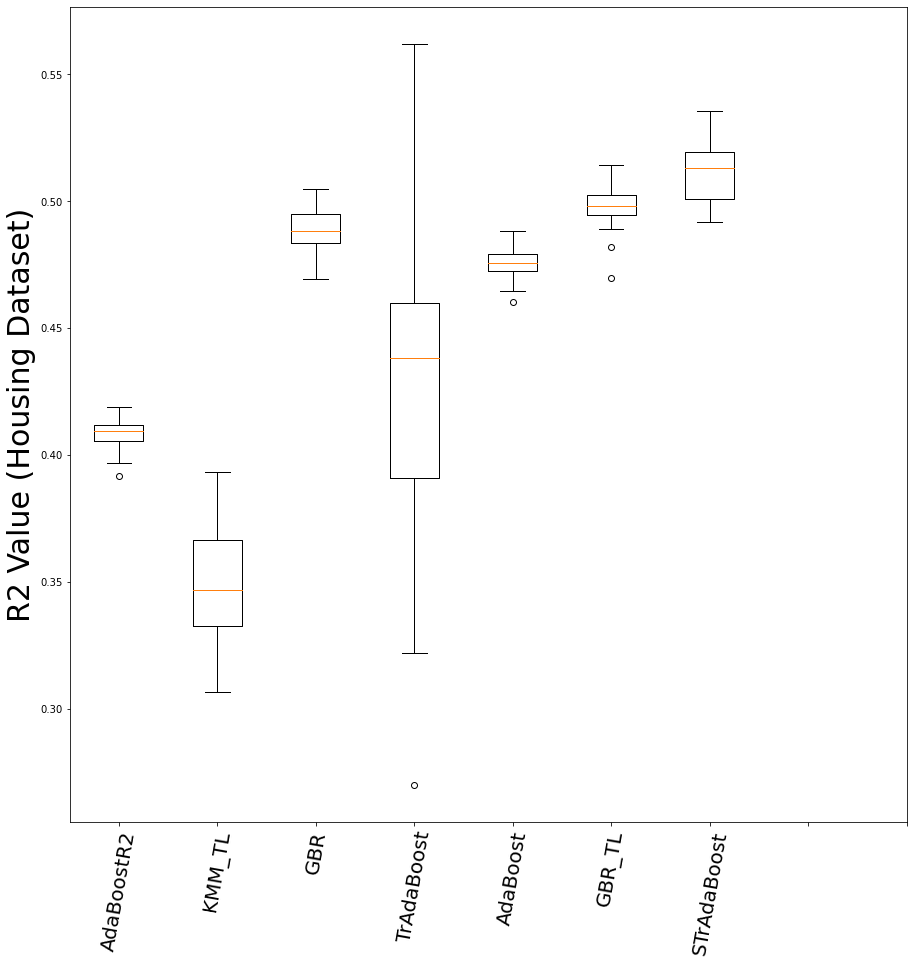

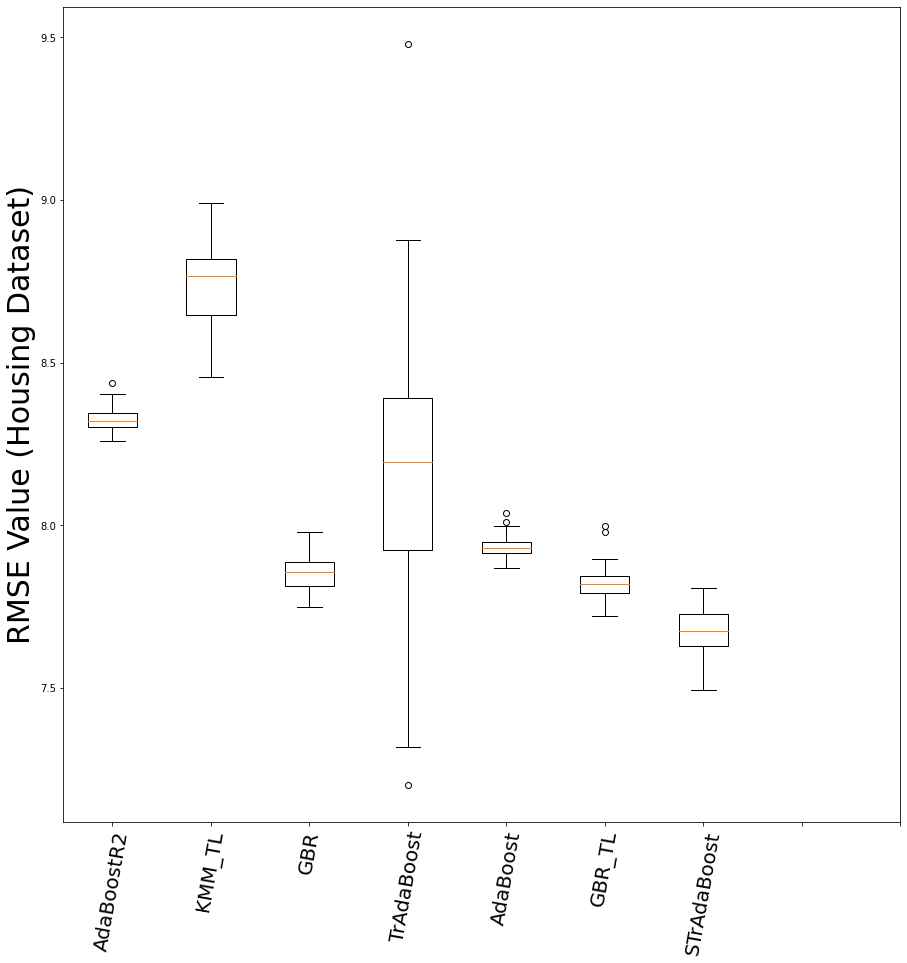

In [32]:
housing_R2_data_np = np.array([AdaBoostR2_R2_housing, KMM_TL_R2_housing, GBR_R2_housing, TrAdaBoost_R2_housing,
                            AdaBoost_TL_R2_housing, GBR_TL_R2_housing,  STrAdaBoost_R2_housing])
# TranTrAdaBoost_R2_housing, STrAdaBoost_WO_R2_housing,

housing_R2_data_np = housing_R2_data_np.transpose()

print(housing_R2_data_np.shape)

housing_RMSE_data_np = np.array([AdaBoostR2_RMSE_housing, KMM_TL_RMSE_housing, GBR_RMSE_housing,  TrAdaBoost_RMSE_housing,
                            AdaBoost_TL_RMSE_housing, GBR_TL_RMSE_housing, STrAdaBoost_RMSE_housing])

housing_RMSE_data_np = housing_RMSE_data_np.transpose()

print(housing_RMSE_data_np.shape)

housing_R2_dataset = pd.DataFrame(housing_R2_data_np, index = None, columns = ['AdaBoostR2_R2_housing', 'KMM_TL_R2_housing', 'GBR_R2_housing', 
                                                                                'TrAdaBoost_R2_housing', 'AdaBoost_TL_R2_housing', 
                                                                                'GBR_TL_R2_housing', 'STrAdaBoost_R2_housing'])
housing_RMSE_dataset = pd.DataFrame(housing_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_housing', 'KMM_TL_RMSE_housing', 'GBR_RMSE_housing', 
                                                                                    'TrAdaBoost_RMSE_housing', 'AdaBoost_TL_RMSE_housing', 
                                                                                    'GBR_TL_RMSE_housing', 'STrAdaBoost_RMSE_housing'])


plt.figure(figsize=(15,15))
plt.boxplot(housing_R2_dataset.values)

labels = ['AdaBoostR2', 'KMM_TL', 'GBR', 'TrAdaBoost', 'AdaBoost', 'GBR_TL', 'STrAdaBoost']
# 'TranTrAdaBoost','STrAdaBoost_WO',
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Housing Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Housing")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(housing_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Housing Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Housing")

In [34]:
############################## Auto Dataset #################################################################

AdaBoostR2_R2_auto = [0.43639682809934316, 0.5390397947885397, 0.5439941233536798, 0.4452131110548915, 0.5526504356314911, 0.5518603775665581, 0.5605511340442507, 0.5609689379012772, 0.5497133500237542, 0.5997135718892195, 0.43821474947780054, 0.41248958302793587, 0.43709823240715373, 0.5399338467678276, 0.5421200636089599, 0.5578259980946336, 0.5454964585928028, 0.5399539966584254, 0.561818034323954, 0.43765266480176507, 0.5327833887106757, 0.5416337574415896, 0.5527883406384734, 0.43903037060492317, 0.4220431777774581, 0.5534094704469439, 0.4609908412719586, 0.573315876267603, 0.559101053163962, 0.4330619209746323, 0.4277541357632846, 0.5284516304082503, 0.5534985621048015, 0.5422761282699209, 0.43530828031004687, 0.5984494580105687, 0.440122370241682, 0.5618070821019718, 0.5476946728436063, 0.5480408442532237, 0.4421256507247321, 0.43830198692058403, 0.5572793473764216, 0.4493646774444177, 0.5454068473983821, 0.5964297942326802, 0.5537419542159572, 0.4393082627148045, 0.5474819868279822, 0.543914976505967
]
KMM_TL_R2_auto = [0.4676167724133489, 0.41628123518154064, 0.45937907466139083, 0.41406897937491755, 0.4073100528408644, 0.4671115765318516, 0.4073100528408644, 0.45937907466139116, 0.46761677241334865, 0.4101994447331092, 0.4073100528408644, 0.40941817195229785, 0.459379074661391, 0.45937907466139116, 0.4073100528408644, 0.4170699153472677, 0.4589867572706895, 0.45937907466139116, 0.46726238438295253, 0.4101994447331092, 0.4676167724133489, 0.46761677241334876, 0.4672623843829519, 0.459379074661391, 0.4065209586577797, 0.45898675727068916, 0.4065209586577797, 0.41406897937491755, 0.45898675727068916, 0.4073100528408644, 0.4073100528408644, 0.4065209586577797, 0.46711157653185187, 0.4073100528408645, 0.46761677241334865, 0.4170699153472677, 0.41406897937491755, 0.45937907466139055, 0.46711157653185126, 0.45937907466139116, 0.459379074661391, 0.40941817195229785, 0.4101994447331092, 0.45937907466139133, 0.4671115765318514, 0.4073100528408644, 0.46761677241334865, 0.47557067387460705, 0.4065209586577796, 0.4101994447331094
]
GBR_R2_auto = [0.20639575713816627, 0.29635839140448544, 0.28589939490731886, 0.30683736206114687, 0.2982432035300806, 0.20397890456508858, 0.27167317432890525, 0.19954580651422257, 0.280414539120358, 0.35517199524163534, 0.34072259824913403, 0.2691623422349989, 0.23153440900625713, 0.19598701929654636, 0.25878601278564267, 0.25931636524983315, 0.28576390626432807, 0.3040699491841932, 0.28100466398983337, 0.23787887071388625, 0.2645031334324005, 0.26458101789667327, 0.29110455785400824, 0.302502308424408, 0.4160755375183367, 0.19670519640464268, 0.22114667511976246, 0.30749935940590434, 0.29382313010557665, 0.33437288643120805, 0.24207005589664526, 0.28233740740604496, 0.2085342956671561, 0.19724994831035747, 0.30602463199689384, 0.3635265502396154, 0.24760993025706826, 0.2680779244701144, 0.31447976354804275, 0.2843749718321355, 0.23322008823996856, 0.25190405650052866, 0.2341260498661134, 0.22125472687703454, 0.25269775242789044, 0.3059484822172958, 0.3608589558676328, 0.2556122352971163, 0.3781099773251656, 0.32819650128738725
]
# TranTrAdaBoost_R2_auto = [0.6304214363516614, 0.43169775356865414, 0.19201879342376638, 0.19201879342376638, 0.3196404366463643, 
#                           0.19148376278446624, 0.34092381494685037, 0.4340544255107878, 0.19072737772419512, 0.29106385233541204]
TrAdaBoost_R2_auto = [0.3416336775148247, 0.37200952572183904, 0.2913932935047656, 0.5291253711333962, 0.522770331836805, 0.2742973386196477, 0.5594482532091575, 0.5454591821850108, 0.5620665539905925, 0.43914021283465826, 0.4412464580355113, 0.5087049089833738, 0.5556024711416483, 0.4182590107019896, 0.20872174740483232, 0.5522960972953472, 0.3474333337816629, 0.44990963661682015, 0.40567705028101314, 0.5024763688059266, 0.18732314540114792, 0.3194111404904728, 0.40608075506103825, 0.4799493607707921, 0.24169207130127457, 0.5481063914015283, 0.40955907907248734, 0.478900806519192, 0.4584628550287458, 0.46335084971693935, 0.49625369623362237, 0.3234247764041534, 0.32697246134259306, 0.4134862701205845, 0.5065409651796026, 0.3747477016627453, 0.4003170269541321, 0.46864418334863883, 0.39716253139640517, 0.4719576781205345, 0.48924431117267025, 0.5590880121586095, 0.5670996362879183, 0.32883403228960495, 0.4879981806108298, 0.5003544553091767, 0.439806230912476, 0.42350880845307387, 0.555658279810391, 0.3011597298994078
]
AdaBoost_TL_R2_auto = [0.6103857737399214, 0.5910251455369129, 0.5955430162987507, 0.6047029076637231, 0.6074127065982031, 0.6205545190706344, 0.615511211082762, 0.6032705715712516, 0.6021593305625773, 0.6247026661627778, 0.5989913282078588, 0.6166610108980705, 0.5801574646928763, 0.6102404751299394, 0.5929566499247162, 0.6012430517583138, 0.6312600309799512, 0.6043393817038352, 0.6117172201833135, 0.6065333385009819, 0.6058079271817979, 0.6034652114732427, 0.5845886182901717, 0.5884661554463402, 0.6057735455353122, 0.6152933693642246, 0.6184294442949829, 0.6091849550382502, 0.6010873317932601, 0.6013424427054582, 0.6013888355781045, 0.5952420504043237, 0.6026374846187024, 0.6103330527377242, 0.5952778662997064, 0.6213106700692794, 0.5982906886854353, 0.6021158432975422, 0.6201927100575888, 0.5985523793106402, 0.6040120615501149, 0.5926282033833575, 0.6152066316229974, 0.6144518701933909, 0.6161582461127255, 0.5949771759845774, 0.6213477353154587, 0.609929032957404, 0.6005345736329877, 0.6195562192791214
]
GBR_TL_R2_auto = [0.3659120905187962, 0.3728328323116988, 0.258138205533542, 0.3434788833448544, 0.32519942514417144, 0.3754435589355105, 0.35811802225742134, 0.36458970651877254, 0.34099873363879346, 0.34850517890312016, 0.29402369766913633, 0.310385839623113, 0.346063605124754, 0.3244230420546287, 0.3209801280987757, 0.330126447120227, 0.3189421809825284, 0.3525987605591726, 0.35877274700463085, 0.3496005814903031, 0.2574880463512007, 0.31131897723090374, 0.3211479854278939, 0.3625872356527151, 0.37498908824318533, 0.29987228394617865, 0.34587910067509775, 0.3165682176216638, 0.3367677685967384, 0.322898808249003, 0.35162896939399896, 0.3058350023798602, 0.3283148524037955, 0.29417695885847706, 0.300416668413792, 0.2840050064393961, 0.3184067652595574, 0.3115952086184564, 0.32313947903914736, 0.32306569185156014, 0.3051580639056222, 0.3523602798780181, 0.3189285960990815, 0.38464348532477777, 0.31267340334076993, 0.31712967353886046, 0.2779510080540278, 0.2484706233849123, 0.3044367614150836, 0.3023828756929645
]
STrAdaBoost_WO_R2_auto = [0.6403999701903987, 0.5364468224387068, 0.6379699073970415, 0.6157181775675341, 0.5380312817163743, 0.587964735788302, 0.6291700053134162, 0.6343869707154682, 0.6013382087274588, 0.5955569478826477, 0.6005875387281088, 0.6617520864923203, 0.47756545040474824, 0.5961510290596786, 0.5582268970758146, 0.5687733758559353, 0.5611351144725376, 0.5796083657234594, 0.6043854948702888, 0.6754026312429426, 0.6271456503586733, 0.61422365470362, 0.663258099366744, 0.568650256875246, 0.6224951124789372, 0.48569426422323275, 0.5649416673260623, 0.6075612790649566, 0.46863741674786946, 0.4851857634644272, 0.6764494882289611, 0.6349559500119233, 0.614361550149926, 0.5726319048971826, 0.6433246200658899, 0.6172350395288015, 0.5845257656915366, 0.6182512353878405, 0.5800230184110748, 0.6499812257114492, 0.6198356579322795, 0.5517901226927684, 0.5468642787706398, 0.5813034846359908, 0.5987942559713297, 0.5607094109783225, 0.6166131491118688, 0.6060552754011768, 0.652912097848394, 0.6074087003144238
]
STrAdaBoost_R2_auto = [0.5713485939017735, 0.6614222196666115, 0.6091013748442752, 0.523545856976638, 0.6125624377519467, 0.5366366053184448, 0.6170587124200266, 0.6409611995750997, 0.6358504909190168, 0.6405703732360987, 0.592724452951301, 0.5622055896628159, 0.5365538522487926, 0.6773740540142944, 0.6300677790209214, 0.6228431192280327, 0.5547270450881975, 0.68795485681325, 0.6261729718080127, 0.6110022635976688, 0.5708202683424968, 0.65887038475005, 0.5168109460121042, 0.6180815321476327, 0.6696593243053405, 0.5394262500589532, 0.5538319430780457, 0.5797696875416779, 0.6128412671657943, 0.6400618184671372, 0.596420112022742, 0.6139781969158242, 0.620154505549787, 0.5441963298010526, 0.4974548076613346, 0.5809774936314417, 0.6111429839070304, 0.573118227462792, 0.6341349648269569, 0.5999891998309924, 0.6372005750368452, 0.5892643286158319, 0.6267515648191395, 0.5766674355493786, 0.6082726256388973, 0.48581425955367225, 0.6274517640944447, 0.6487612515311345, 0.6039056379044689, 0.6081584210683115
]


AdaBoostR2_RMSE_auto = [4.638891958881184, 4.427282001240862, 4.444030619179616, 4.652594768306725, 4.4222512883135305, 4.069301525636841, 4.195123294085036, 4.199446449139759, 4.421711601366465, 4.37079969565739, 4.638672377996234, 4.647593191243761, 4.6298275668947095, 4.430791276746495, 4.414936347762658, 4.40980283992238, 4.420675670771039, 4.418208793652292, 4.190117131649319, 4.640111383062563, 4.45608285468466, 4.423249177472484, 4.428506883111241, 4.641291674598964, 4.674878042863516, 4.195933473158457, 4.585371342493804, 4.313185600718197, 4.201062258618616, 4.638069731206712, 4.615833681802205, 4.335789460764819, 4.419446476210739, 4.4312857812274915, 4.6317265494137345, 4.121180631814677, 4.63245024661231, 4.202201513721963, 4.415772543388542, 4.4031936471685595, 4.653904638319505, 4.605360549381743, 4.423356791532788, 4.658150793437237, 4.413833059573129, 4.086591527538961, 4.192673743140954, 4.62807404160576, 4.419703030720996, 4.412924845284006
]
KMM_TL_RMSE_auto = [3.802874477044745, 4.092692123310621, 3.8162115595795636, 4.1061795741193645, 4.112211042788578, 3.8097114985194676, 4.112211042788578, 3.8162115595795636, 3.802874477044745, 4.099836982261853, 4.112211042788578, 4.098743439363586, 3.8162115595795636, 3.8162115595795636, 4.112211042788578, 4.093787282652182, 3.81503671909888, 3.8162115595795636, 3.801695514998854, 4.099836982261853, 3.802874477044745, 3.802874477044745, 3.801695514998854, 3.816211559579564, 4.111120791345881, 3.81503671909888, 4.111120791345881, 4.1061795741193645, 3.81503671909888, 4.112211042788578, 4.112211042788578, 4.111120791345881, 3.8097114985194667, 4.112211042788578, 3.802874477044745, 4.093787282652182, 4.1061795741193645, 3.816211559579564, 3.8097114985194676, 3.8162115595795636, 3.8162115595795636, 4.098743439363586, 4.099836982261853, 3.8162115595795636, 3.809711498519467, 4.112211042788578, 3.802874477044745, 3.7963515804837016, 4.111120791345881, 4.099836982261853
]
GBR_RMSE_auto = [6.835394154617596, 6.349109728612583, 6.351269279759344, 6.519963072300544, 6.444662442767551, 6.920919855844357, 6.5090380113810316, 7.053405307354498, 6.492109980131429, 5.924592929163197, 6.128310341667599, 6.472542015838464, 6.677225230022746, 6.865053968533976, 6.6885440087223005, 6.611510260942279, 6.341455332906585, 6.197672615391982, 6.4436304080738065, 6.671943607734735, 6.647792757025207, 6.590541229267038, 6.382140536746116, 6.428644777686877, 5.859534574143199, 7.032802860832909, 6.821466714670947, 6.189835929431495, 6.3466451839922025, 6.1559698119741935, 6.520361543021231, 6.412472433508365, 6.801690701532656, 7.0652453551712195, 6.211791516982853, 6.018053580672581, 6.622160298037259, 6.410619349614956, 6.2528327268217545, 6.411201753582816, 6.608272266880056, 6.65944546013364, 6.851492927906629, 6.945876389150375, 6.919135450207273, 6.417890032396984, 5.879098875215444, 6.744647621734888, 5.977924719515563, 6.15534676095911
]
# TranTrAdaBoost_RMSE_auto = [3.9067058593246755, 6.2621425634850585, 5.773393916991059, 5.773393916991059, 5.323692481652273, 
#                             5.768497543623268, 5.299228131880524, 4.433183657631845, 5.77190054847093, 5.610914179035819]
TrAdaBoost_RMSE_auto = [6.136239542771152, 5.944256230905137, 6.6246348134094974, 4.838999181169843, 4.895570141017451, 7.136104015763671, 4.821678937139695, 4.952721371126868, 4.82030676346308, 4.561430213549241, 4.141400104660781, 5.429464892369089, 4.825717079341075, 5.322829185587475, 6.494985090515262, 4.968223224741849, 6.019767607868883, 4.815690238314845, 5.587900131051583, 4.9020180421748085, 6.4256456927818935, 7.200951702819449, 5.039685635963515, 4.317261688675296, 6.941679611554456, 4.958256292425873, 5.78837633352909, 5.463966341971818, 6.4177208370615055, 4.257710965963516, 5.169905651247891, 6.037739710477668, 6.101652284552235, 6.078633528655339, 4.902866009312191, 5.940934918207261, 5.451620969274578, 4.395249887653824, 5.137517533630958, 4.528327398505986, 5.705980244851543, 4.831099630963676, 4.478301027756799, 6.1022223793420665, 4.961089281598024, 4.807946246251414, 5.637475139361334, 4.966783443338929, 4.974611417413478, 5.9844156545967
]
AdaBoost_TL_RMSE_auto = [4.389203582978216, 4.333582254635105, 4.352685423618994, 4.384934051307345, 4.366601482193549, 4.376568660605354, 4.417631436035419, 4.407552322125861, 4.385522065653779, 4.38964520148159, 4.316813545180191, 4.402779768349802, 4.401870039050042, 4.400084647135504, 4.387084263812125, 4.423681976966245, 4.406029971634463, 4.399191515783894, 4.363622858675642, 4.4313744123413965, 4.225987658962376, 4.269074748891112, 4.288208834179064, 4.3956500206356575, 4.451424254184071, 4.363100228473402, 4.3706020759938085, 4.353159372520349, 4.373270515630484, 4.406602672682124, 4.357353306444318, 4.400492231408082, 4.241937462909131, 4.376656889243848, 4.387651747872954, 4.102173523554305, 4.355101083471237, 4.40475062886977, 4.368728517296856, 4.322221293288014, 4.356523158539431, 4.45752224066673, 4.377900139984922, 4.424187439710469, 4.300981323523391, 4.380592448008641, 4.344979002964712, 4.440657175974634, 4.107266537146722, 4.297872516077622
]
GBR_TL_RMSE_auto = [6.306104026432141, 6.168325221755957, 6.879285657903547, 6.625754638346825, 6.647044456263681, 6.166295520211498, 6.429176931806464, 6.35894890717784, 6.383509045791749, 6.236953657546302, 6.888309938125732, 6.5658402113718495, 6.410318349920081, 6.448918350242823, 6.589430935154595, 6.3305133483376475, 6.611822502271679, 6.432504757099767, 6.54174987289292, 6.5068387720385745, 6.862963783732227, 6.62427940726125, 6.337160867966414, 6.241385168923491, 6.251914075955716, 6.64325166895485, 6.462111617641495, 6.68834237200569, 6.40986536484732, 6.641924854487418, 6.344555237391008, 6.6769857859933515, 6.36357725000216, 6.692528630033624, 6.546833076693076, 6.851690098654158, 6.704606931611742, 6.6626113231979405, 6.422689999436136, 6.635816455948502, 6.620258641529431, 6.481243469457803, 6.493403652017621, 6.467399171292655, 6.314204311260184, 6.751114059034074, 6.969218249528945, 7.03713049911245, 6.620806685675993, 6.899258110039036
]
STrAdaBoost_WO_RMSE_auto = [4.447860412904311, 5.000936785194567, 4.6459485365584525, 5.037025546461664, 5.048450618242068, 4.622201329417316, 4.7888639863431886, 4.594259554173063, 4.683152923376702, 5.212964445155688, 4.9837584619430135, 4.662992718898534, 5.555836592611046, 5.087272716756384, 5.454366330644555, 4.805761451376001, 4.971493591681578, 5.032482077861995, 5.149865178823531, 4.908975446376822, 4.9146426724905, 5.206972475208445, 4.42017906822515, 5.610836285200892, 4.527699474416217, 4.967594259812419, 4.68017567336371, 5.128958710153177, 5.331048202235568, 5.644745528607405, 4.519528989932073, 5.057063924568289, 5.11508456843056, 5.208577810501189, 5.001390216948258, 4.907650011209564, 4.998755948152026, 5.149092752780629, 5.1239381328059554, 4.551514990352598, 5.025113188151058, 5.236485971038327, 4.753518026200528, 4.6725263731127065, 4.620538700059349, 4.994431449653664, 5.105312374094514, 5.0399978391078495, 4.574613313461509, 4.9683572007707495
]
STrAdaBoost_RMSE_auto = [5.0350845588156465, 4.839856863782019, 4.778493707713175, 5.3877481865834795, 4.5452036135595835, 4.966882977526031, 4.603368920316537, 4.798621919985661, 5.107911484839159, 4.414726806546569, 4.65700157934648, 5.370236590932061, 5.364951628158034, 4.661870083803231, 4.465900546771661, 4.819582752437206, 4.777870571248461, 4.659751580295821, 5.018660072938615, 4.536068814667508, 4.960740195455237, 4.493253840808649, 4.962144854071505, 4.690254799332178, 4.8442534330937015, 5.519503676371445, 5.1028405894521685, 4.748429319506752, 4.9102446803924416, 4.859503170491721, 4.936539873659313, 4.7900149333766295, 4.886987838529508, 4.961731796049728, 5.315547904745058, 5.0361633410243885, 4.687691966299625, 5.426101784381504, 5.045448629618336, 4.85438005957639, 4.963605029766325, 5.2089368031098475, 4.598023391238672, 5.044861113370695, 5.14715847272872, 5.446908493322065, 4.496687565982308, 4.984609076329992, 5.126581184130973, 5.079491716559023
]


----------------------------------------------------------------------------------------------------------------


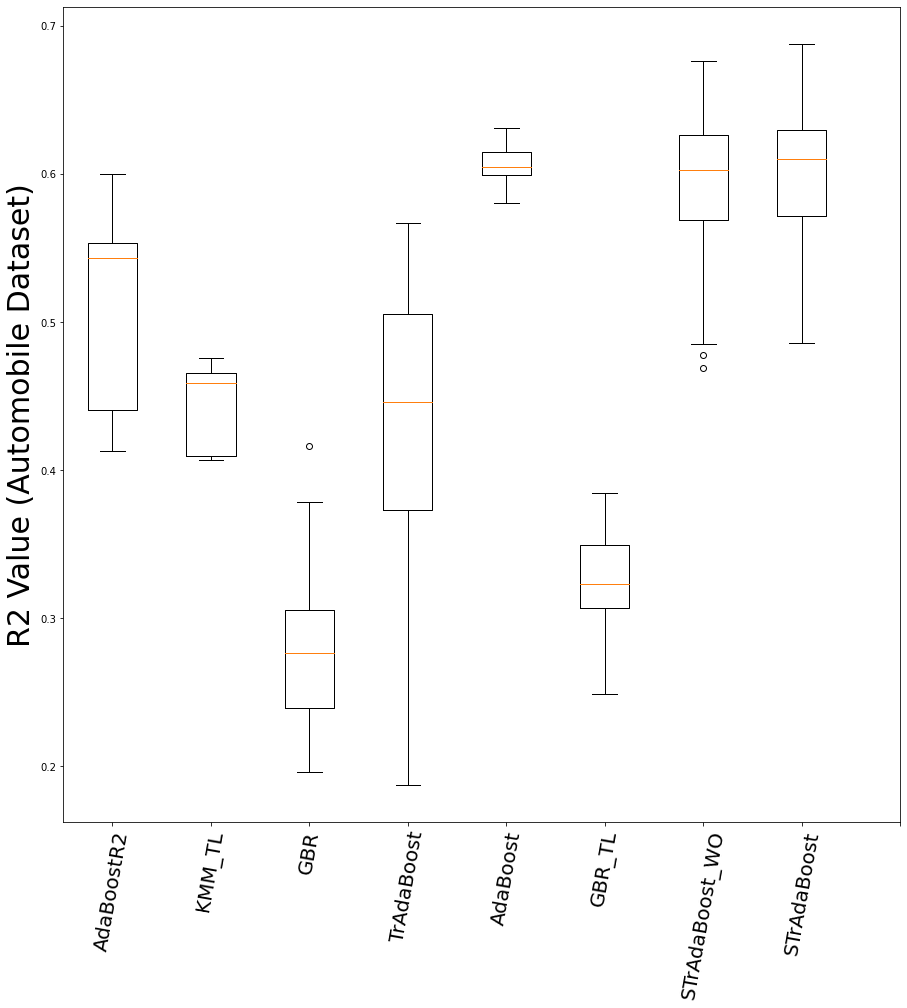

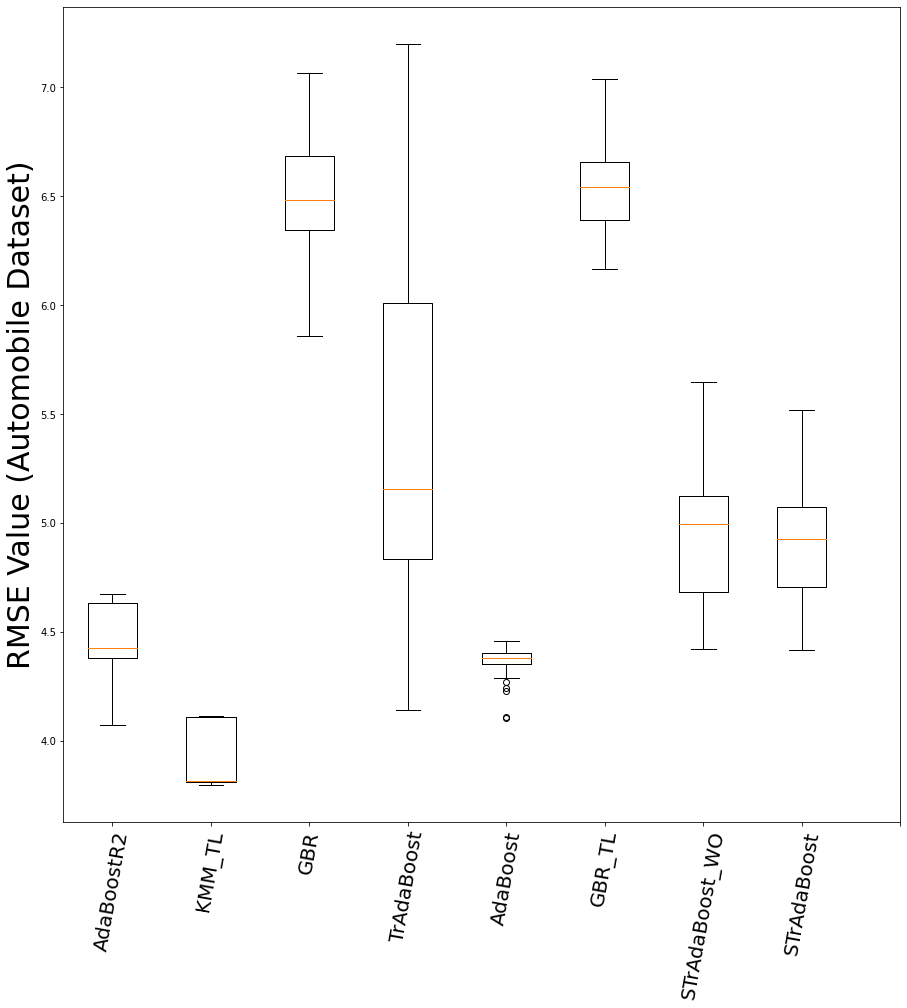

In [35]:
auto_R2_data_np = np.array([AdaBoostR2_R2_auto, KMM_TL_R2_auto, GBR_R2_auto, TrAdaBoost_R2_auto,
                            AdaBoost_TL_R2_auto, GBR_TL_R2_auto, STrAdaBoost_WO_R2_auto, STrAdaBoost_R2_auto])

#TranTrAdaBoost_R2_auto,

auto_R2_data_np = auto_R2_data_np.transpose()

auto_RMSE_data_np = np.array([AdaBoostR2_RMSE_auto, KMM_TL_RMSE_auto, GBR_RMSE_auto, TrAdaBoost_RMSE_auto,
                            AdaBoost_TL_RMSE_auto, GBR_TL_RMSE_auto, STrAdaBoost_WO_RMSE_auto, STrAdaBoost_RMSE_auto])

#TranTrAdaBoost_RMSE_auto,

auto_RMSE_data_np = auto_RMSE_data_np.transpose()



auto_R2_dataset = pd.DataFrame(auto_R2_data_np, index = None, columns = ['AdaBoostR2_R2_auto', 'KMM_TL_R2_auto', 'GBR_R2_auto', 
                                                                         'TrAdaBoost_R2_auto', 'AdaBoost_TL_R2_auto', 'GBR_TL_R2_auto', 
                                                                         'STrAdaBoost_WO_R2_auto', 'STrAdaBoost_R2_auto'])
auto_RMSE_dataset = pd.DataFrame(auto_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_auto', 'KMM_TL_RMSE_auto', 'GBR_RMSE_auto', 
                                                                            'TrAdaBoost_RMSE_auto', 'AdaBoost_TL_RMSE_auto', 
                                                                             'GBR_TL_RMSE_auto', 'STrAdaBoost_WO_RMSE_auto', 'STrAdaBoost_RMSE_auto'])


plt.figure(figsize=(15,15))
plt.boxplot(auto_R2_dataset.values)

labels = ['AdaBoostR2', 'KMM_TL', 'GBR', 'TrAdaBoost', 'AdaBoost', 'GBR_TL', 'STrAdaBoost_WO', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Automobile Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Auto")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(auto_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Automobile Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Auto")

In [36]:
############################## Ailerons Dataset #################################################################

AdaBoostR2_R2_ailerons = [0.7464752110160796, 0.7498702632857037, 0.7497379207773489, 0.7460926326263875, 0.7500802169970404, 0.7494701582771512, 0.7474943430564389, 0.749014051315695, 0.7507268441215775, 0.7480630928379867, 0.7486490847778129, 0.7464791470454547, 0.7478624962025178, 0.7488654276390005, 0.7468535769351985, 0.7523882327764472, 0.7494089951428154, 0.7446139969818755, 0.753457466544135, 0.7486149943283188, 0.7494311485264437, 0.750052491152257, 0.7490771431762224, 0.7508214949543437, 0.7481578307135069, 0.7488528752540203, 0.7496017167222753, 0.7492977504219678, 0.7498908489537705, 0.7489959101370963, 0.7504293911497448, 0.7495833910059132, 0.7489257776482067, 0.7475963556172412, 0.750145775414867, 0.7499029910372585, 0.7498415920564232, 0.7492753763439522, 0.7521741274113195, 0.7494610485873208, 0.7496432619755271, 0.7480328622993146, 0.7492002415343748, 0.7493849310331298, 0.7502444518734479, 0.7494106078376653, 0.7496660928643768, 0.7476305903785342, 0.7495220865060599, 0.7490269597759627
]
# KMM_TL_R2_ailerons = [1.0502928551712282e-05, 1.0502928551712282e-05, 0.06623324365783304, 0.06623324365783304, 1.0502928551712282e-05, 
#                      0.0025616335846856205, 0.06623324365783304, 1.0502928551712283e-05, 9.791154490625489e-05, 1.0502928551712282e-05]
GBR_R2_ailerons = [0.7932738878348219, 0.793543669116011, 0.7941106651880333, 0.7947843797914281, 0.7904870583434159, 0.7917999346561061, 0.794827857309459, 0.7918503320848367, 0.7936450103385355, 0.7944780783525937, 0.7901301283136837, 0.796363035451087, 0.7947303927680989, 0.7906176439016578, 0.7926861120902929, 0.7933097313226366, 0.7945397877927431, 0.7903208959133714, 0.7927794721784263, 0.7933427100838021, 0.790472417792088, 0.7947783626430919, 0.7923633848060385, 0.79276063277196, 0.7939850380408017, 0.794251488684391, 0.7947684255319197, 0.791559314625711, 0.7937662929666829, 0.7924182600862058, 0.7940355277149229, 0.7932727626363479, 0.7935011048407521, 0.7929001440692578, 0.79034552739503, 0.7917147386377718, 0.7936521980290905, 0.7947451479463267, 0.7938574284023261, 0.7918363881778288, 0.792290822972671, 0.789560268854, 0.7931769185535529, 0.7919666606069666, 0.7923996949730309, 0.7932376075640535, 0.7919107167721194, 0.7916614129082294, 0.7951395955862169, 0.7891315113520286
]
# TranTrAdaBoost_R2_ailerons = [0.08998222813259087, 0.023669815573501122, 0.02654264118817837, 0.005541930754263786, 0.005603093075105872,
#                              0.005711250570588052, 0.001110517449232109, 0.02091489873433919, 0.0004277972727651144, 0.002764780363663507]
# TrAdaBoost_R2_ailerons = [0.0018994074079456483, 2.7529031080604748e-05, 0.0019637678315071647, 0.002871533311634066, 1.919999108166027e-05, 
#                          0.00043537297940657733, 0.008684376366787634, 0.00021164694193771046, 0.002581355302504067, 0.00321186216508371]
AdaBoost_TL_R2_ailerons = [0.8131562925914575, 0.8128954700216577, 0.8128233250204476, 0.8139043807601414, 0.8132424075571103, 0.8128402115522725, 0.8135039123601319, 0.8131291760649233, 0.8132775470096756, 0.8129713451036822, 0.8128047995202126, 0.8125330128841523, 0.8133403601570172, 0.8132892682599464, 0.812960473024896, 0.8126145541131213, 0.8132270628308893, 0.8134899533636786, 0.8134584479070359, 0.8135817221588022, 0.8123742608274706, 0.812995522740651, 0.8129485323701436, 0.81258707750318, 0.8128305776617638, 0.8131867543095048, 0.8129476223937494, 0.8138673286269832, 0.8126651790197388, 0.8125314102094253, 0.8131214968235252, 0.8135511806757517, 0.8131103225768128, 0.8128738620500369, 0.8133988700797423, 0.8131586753204789, 0.8132587493753884, 0.8135571014392298, 0.8130582537872062, 0.8132523827621833, 0.8130105001861642, 0.8131244141679638, 0.8129913287069657, 0.8131649017432386, 0.8129476888277514, 0.8123445805220667, 0.8129423644439965, 0.8130527990626005, 0.8132250337888093, 0.8121014453921369
]
GBR_TL_R2_ailerons = [0.8408319837411441, 0.840439531540598, 0.8399225912908516, 0.8402808475063372, 0.8401563469692493, 0.8397136529838359, 0.8404289562277765, 0.840356481733521, 0.8408193318775073, 0.8412508944337239, 0.8406062593058826, 0.8405284231031399, 0.8398323625967203, 0.8410628866995165, 0.840662125949599, 0.8399138688264672, 0.8402399188288044, 0.8407752593471602, 0.8400655802552369, 0.8401915040903414, 0.8400700829960933, 0.8404859126889175, 0.8404678875090568, 0.840234347352755, 0.8410275785962268, 0.8393528373202178, 0.8412106483492111, 0.8396363767157394, 0.8399737956326573, 0.8405085547694875, 0.8405037478616069, 0.8408725322597066, 0.8403477724293121, 0.8394807676005127, 0.8405874039806213, 0.8400489921729997, 0.8401937119510181, 0.8397157318901185, 0.8401181315366754, 0.8402909473275321, 0.840121330149097, 0.8394874594471288, 0.8409651432672376, 0.8408896414772368, 0.8402525006395399, 0.8401990232216917, 0.8407543093714853, 0.840353143283982, 0.8397469232514735, 0.8396471946311661
]
# STrAdaBoost_WO_R2_ailerons = [0.04206278496075872, 0.016204176568877546, 0.013953337897041992, 0.08378817339380693, 0.0373198685733427, 
#                              0.07030577238325901, 0.07121638989778133, 0.07509872960351817, 0.035076794031229604, 0.09863507055685033]
STrAdaBoost_R2_ailerons = [0.7921838221087859, 0.7926111664138231, 0.7961779241039193, 0.7921116001171513, 0.7899868703231145, 0.7918774908846888, 0.7929984822035465, 0.7931065984773344, 0.7919550588943894, 0.7939780602073285, 0.7902455553016142, 0.7900140636480801, 0.7952349561711055, 0.7917076039376817, 0.7883453236429003, 0.7865353930254144, 0.7885384667669827, 0.7897349407555583, 0.7887426393611979, 0.7917566900851079, 0.7910899595233643, 0.7915176094672175, 0.7932581910449958, 0.7904499099622541, 0.7894757319188839, 0.7941923983811359, 0.7900273677526277, 0.794126175185897, 0.7896068674241715, 0.7889557340788611, 0.7922616021578789, 0.7875788864739476, 0.7917109764341116, 0.7878281662834489, 0.7904279453593293, 0.7889346770605429, 0.7876541983764356, 0.7895840512340346, 0.7948098469234585, 0.7927604692883653, 0.7955683181404818, 0.7922460181792329, 0.7929084634623144, 0.7927000280635355, 0.7909182074920547, 0.789903974204939, 0.7982244486791072, 0.79028110793731, 0.7885281021169788, 0.7894884245097769
]


AdaBoostR2_RMSE_ailerons = [0.00020415868386608563, 0.00020299272093137526, 0.00020303517178262617, 0.00020408821599588877, 0.00020267826058059793, 0.00020308586633655803, 0.00020370878464858396, 0.0002031039640595603, 0.00020262780786955886, 0.00020344910939414952, 0.00020375662798649107, 0.00020426651164275105, 0.00020344655295957491, 0.00020325361345085159, 0.00020420041142405572, 0.00020169852781681894, 0.0002031060984741326, 0.00020480743474672128, 0.00020165860682529383, 0.00020320280884506478, 0.00020300116526444147, 0.00020292686423187557, 0.0002029890583711173, 0.0002025299250919678, 0.00020336809124106, 0.00020326607585376155, 0.0002029557846586166, 0.000203058496909362, 0.0002030707699523455, 0.00020304642513411866, 0.00020266440579062517, 0.00020298430672035345, 0.00020318216630254416, 0.00020345509363295361, 0.00020292008095660748, 0.00020273853443934596, 0.00020288312782196843, 0.00020289575743400782, 0.00020201457806987152, 0.00020286254520684766, 0.00020299030384472028, 0.00020348951327525333, 0.00020316444501068822, 0.0002029880941898516, 0.0002027227348928662, 0.0002028742501378779, 0.00020288633355481148, 0.0002036058139225326, 0.00020299247762943916, 0.00020311316319439134
]
# KMM_TL_RMSE_ailerons = [4.722409943705714, 4.722409943705714, 7.110116105309898, 7.110116105309898, 4.722409943705714, 
#                        4.69302388098747, 7.110116105309898, 4.720466165091281, 4.0055087437302275, 4.722409943705714]
GBR_RMSE_ailerons = [0.0001838155472789454, 0.0001839437808169668, 0.00018343955820094754, 0.00018325414004934082, 0.00018508670998722886, 0.0001843626929289848, 0.00018318938075454486, 0.000184616555436101, 0.00018368219785815847, 0.00018335676732325406, 0.00018539078430759005, 0.00018259366288957252, 0.00018336733428482745, 0.00018514116059360552, 0.0001841021992673548, 0.0001838227657865089, 0.00018325760411967658, 0.0001851231309825644, 0.00018415741618630835, 0.00018390801485740875, 0.00018504580751089588, 0.00018334961311762942, 0.00018418119265362139, 0.00018401959868100115, 0.0001837376976381818, 0.00018344785807508459, 0.00018309793901434413, 0.00018457383867996342, 0.00018373039821075647, 0.00018444607647733488, 0.0001835163724716924, 0.00018378202578769623, 0.00018390838056814223, 0.00018405031091163582, 0.00018501149118146207, 0.00018451362839497015, 0.00018348973197511857, 0.00018331839153466964, 0.00018375318519236398, 0.00018441728831929854, 0.00018429869646981932, 0.00018538237384498104, 0.0001840779353709896, 0.00018435723756269102, 0.00018423333530241708, 0.00018384982679453505, 0.00018457898421893294, 0.00018477787562312407, 0.00018318119641313877, 0.00018565787828628337
]
# TranTrAdaBoost_RMSE_ailerons = [5.678807958267232, 3.9267732344829804, 3.8862125047866276, 4.234017515985184, 4.140431209808338, 
#                                4.103640520347608, 4.092348497736601, 3.552947291867083, 3.7278255366868063, 4.045330934449049]
# TrAdaBoost_RMSE_ailerons = [4.463650742905368, 4.384018281886595, 4.408356723838143, 4.402840569384498, 4.311720407532454, 
#                            4.195116648016497, 4.176478325009078, 4.487043322881292, 3.849439195373271, 4.388846530268929]
AdaBoost_TL_RMSE_ailerons = [0.00017441400987818807, 0.0001745500025612707, 0.00017458708104874795, 0.00017407181741917332, 0.00017438154069657306, 0.00017454666214854867, 0.00017426435108648997, 0.00017440077496395264, 0.0001743732607460719, 0.00017452112792069115, 0.00017459155305844996, 0.0001747044498272843, 0.00017432925441735391, 0.0001743725132103875, 0.00017450793758858006, 0.00017465789485041904, 0.00017438944459132838, 0.0001742584249128829, 0.00017428300775756693, 0.00017423038044000715, 0.0001747968497175838, 0.00017450059053524303, 0.00017450290946671162, 0.0001746852177805115, 0.00017455898022599958, 0.0001743967924573215, 0.00017453922568213588, 0.0001741061177128046, 0.00017465570291165186, 0.00017471810198168802, 0.00017443685390376078, 0.00017422365319497217, 0.00017446334200500946, 0.00017454726343902645, 0.0001743083317313858, 0.00017443949905228092, 0.000174371875112103, 0.00017425919831003515, 0.00017446375528138043, 0.00017437222692677552, 0.00017449869931283977, 0.00017446978364760426, 0.00017451514999729692, 0.00017444149112811914, 0.00017452466908180234, 0.00017478296192602796, 0.00017453744400545347, 0.00017447048093362824, 0.00017438844855655722, 0.00017491471516413185
]
GBR_TL_RMSE_ailerons = [0.00016099106963665859, 0.0001611703804380149, 0.00016141483578168637, 0.00016128289577224065, 0.00016133492002839433, 0.00016155057928270142, 0.00016119572453278847, 0.00016123167273335341, 0.00016097190719764623, 0.0001607578407455045, 0.00016109153951098822, 0.0001611322723162992, 0.00016145626227143128, 0.00016087030469342907, 0.00016105280202211044, 0.00016143323762513373, 0.00016130440533313072, 0.0001610026553573769, 0.00016134491871180892, 0.0001612864401082734, 0.00016136989130992926, 0.00016115361495173177, 0.00016115480128925318, 0.00016123201391795303, 0.0001608808316271876, 0.00016173381355363996, 0.0001607991453284056, 0.00016157985232807234, 0.00016141235195078475, 0.0001611378480881886, 0.00016112057807453255, 0.00016096038618819335, 0.00016121009742641972, 0.0001616316599599358, 0.00016109413833878598, 0.00016135836631251123, 0.0001612921781673569, 0.0001615356564375861, 0.0001613394636641392, 0.00016123086759155998, 0.00016133610501557804, 0.000161669768598565, 0.00016090259406164025, 0.0001609572225830834, 0.00016127937475018638, 0.0001612818509455511, 0.00016099704281490217, 0.00016122814481770857, 0.0001615037987610715, 0.00016157824427291898
]
# STrAdaBoost_WO_RMSE_ailerons = [3.0506709075552396, 3.1159034892571036, 3.2253570782381606, 2.963306660435009, 3.122517219834482, 
#                                3.1321354455701744, 2.9508250064395583, 3.1240583608936987, 3.1316547778334285, 2.949568130044639]
STrAdaBoost_RMSE_ailerons = [0.0001850419066684848, 0.0001846944394392311, 0.00018439933045373872, 0.00018543766287154362, 0.00018575908303313987, 0.0001849908928822681, 0.00018495770998033028, 0.00018504295516950093, 0.0001854496824046348, 0.00018494442543615035, 0.0001861374101395687, 0.00018537426980370475, 0.00018408490436227614, 0.00018528280742384257, 0.00018658430029008476, 0.00018712906683435922, 0.0001866723027908441, 0.00018576414621553083, 0.00018614600287205073, 0.00018622670429384243, 0.00018584504803018318, 0.00018559393921526427, 0.00018535934472376522, 0.000185946383449146, 0.00018604206638118425, 0.0001842851102300299, 0.00018633960229108223, 0.00018447399531303725, 0.00018627857915832105, 0.00018638331370105746, 0.00018519413793905616, 0.0001864982679913184, 0.00018544139514556108, 0.0001871363130731324, 0.00018563099671543634, 0.0001863317538855786, 0.00018751221948540015, 0.00018639638194853885, 0.00018442552185157586, 0.00018502172397186177, 0.0001836946027629667, 0.00018510106008484957, 0.00018482954194886828, 0.00018463878206853424, 0.00018563666043928733, 0.00018701785527695558, 0.00018255791220743434, 0.00018574975082647218, 0.00018595792249997278, 0.00018622320419136185
]



----------------------------------------------------------------------------------------------------------------


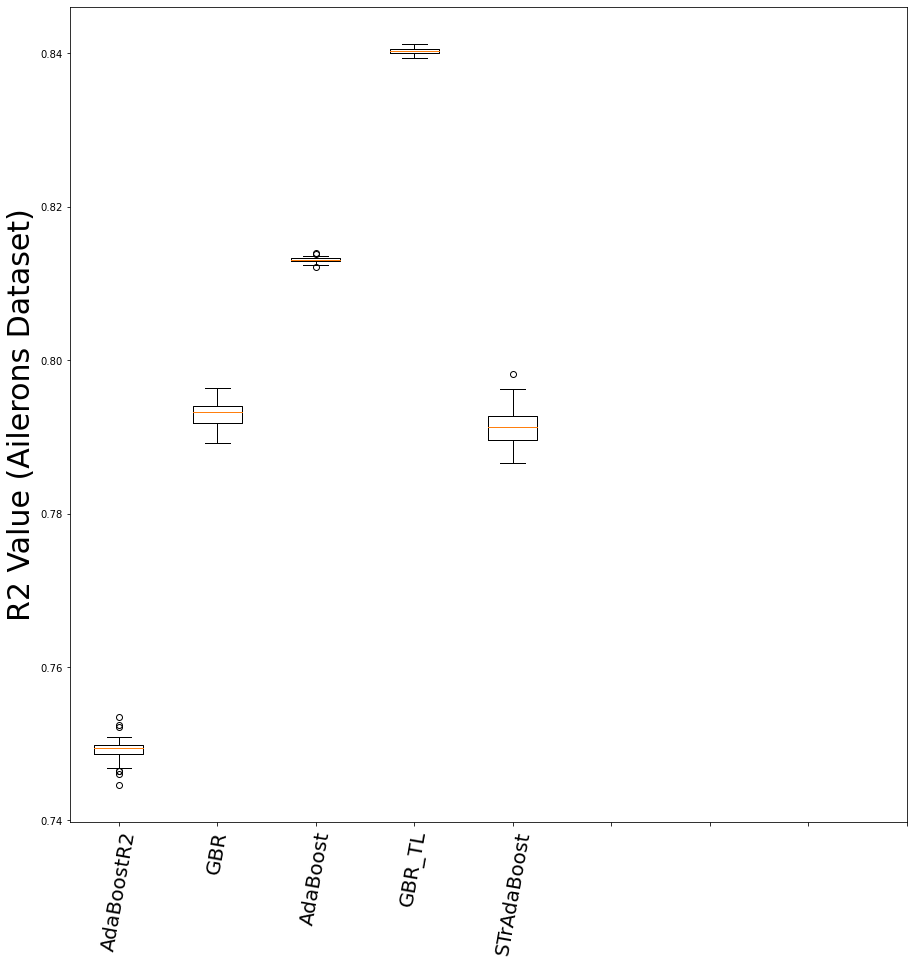

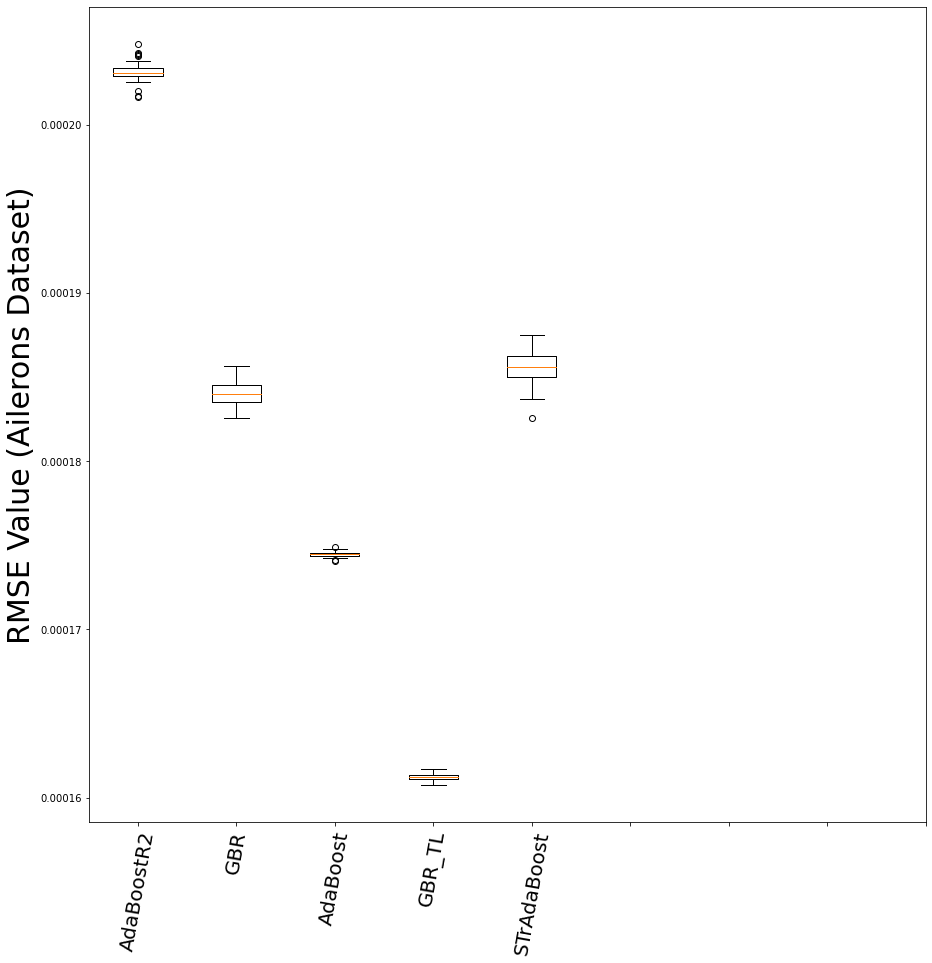

In [37]:
ailerons_R2_data_np = np.array([AdaBoostR2_R2_ailerons, GBR_R2_ailerons, 
                            AdaBoost_TL_R2_ailerons, GBR_TL_R2_ailerons, STrAdaBoost_R2_ailerons])

ailerons_R2_data_np = ailerons_R2_data_np.transpose()

ailerons_RMSE_data_np = np.array([AdaBoostR2_RMSE_ailerons, GBR_RMSE_ailerons, 
                            AdaBoost_TL_RMSE_ailerons, GBR_TL_RMSE_ailerons, STrAdaBoost_RMSE_ailerons])

ailerons_RMSE_data_np = ailerons_RMSE_data_np.transpose()



ailerons_R2_dataset = pd.DataFrame(ailerons_R2_data_np, index = None, columns = ['AdaBoostR2_R2_ailerons', 'GBR_R2_ailerons', 
                                                                            'TranTrAdaBoost_R2_ailerons', 
                                                                            'GBR_TL_R2_ailerons', 'STrAdaBoost_R2_ailerons'])
ailerons_RMSE_dataset = pd.DataFrame(ailerons_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_ailerons', 'GBR_RMSE_ailerons', 
                                                                            'TranTrAdaBoost_RMSE_ailerons', 
                                                                            'GBR_TL_RMSE_ailerons', 'STrAdaBoost_RMSE_ailerons'])


plt.figure(figsize=(15,15))
plt.boxplot(ailerons_R2_dataset.values)

labels = ['AdaBoostR2', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Ailerons Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Ailerons")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(ailerons_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Ailerons Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Ailerons")

In [38]:
############################## Elevators Dataset #################################################################

AdaBoostR2_R2_elevators = [0.7464752110160796, 0.7498702632857037, 0.7497379207773489, 0.7460926326263875, 0.7500802169970404, 0.7494701582771512, 0.7474943430564389, 0.749014051315695, 0.7507268441215775, 0.7480630928379867, 0.7486490847778129, 0.7464791470454547, 0.7478624962025178, 0.7488654276390005, 0.7468535769351985, 0.7523882327764472, 0.7494089951428154, 0.7446139969818755, 0.753457466544135, 0.7486149943283188, 0.7494311485264437, 0.750052491152257, 0.7490771431762224, 0.7508214949543437, 0.7481578307135069, 0.7488528752540203, 0.7496017167222753, 0.7492977504219678, 0.7498908489537705, 0.7489959101370963, 0.7504293911497448, 0.7495833910059132, 0.7489257776482067, 0.7475963556172412, 0.750145775414867, 0.7499029910372585, 0.7498415920564232, 0.7492753763439522, 0.7521741274113195, 0.7494610485873208, 0.7496432619755271, 0.7480328622993146, 0.7492002415343748, 0.7493849310331298, 0.7502444518734479, 0.7494106078376653, 0.7496660928643768, 0.7476305903785342, 0.7495220865060599, 0.7490269597759627
]
# KMM_TL_R2_elevators = [1.0502928551712282e-05, 1.0502928551712282e-05, 0.06623324365783304, 0.06623324365783304, 1.0502928551712282e-05, 
#                      0.0025616335846856205, 0.06623324365783304, 1.0502928551712283e-05, 9.791154490625489e-05, 1.0502928551712282e-05]
GBR_R2_elevators = [0.7932738878348219, 0.793543669116011, 0.7941106651880333, 0.7947843797914281, 0.7904870583434159, 0.7917999346561061, 0.794827857309459, 0.7918503320848367, 0.7936450103385355, 0.7944780783525937, 0.7901301283136837, 0.796363035451087, 0.7947303927680989, 0.7906176439016578, 0.7926861120902929, 0.7933097313226366, 0.7945397877927431, 0.7903208959133714, 0.7927794721784263, 0.7933427100838021, 0.790472417792088, 0.7947783626430919, 0.7923633848060385, 0.79276063277196, 0.7939850380408017, 0.794251488684391, 0.7947684255319197, 0.791559314625711, 0.7937662929666829, 0.7924182600862058, 0.7940355277149229, 0.7932727626363479, 0.7935011048407521, 0.7929001440692578, 0.79034552739503, 0.7917147386377718, 0.7936521980290905, 0.7947451479463267, 0.7938574284023261, 0.7918363881778288, 0.792290822972671, 0.789560268854, 0.7931769185535529, 0.7919666606069666, 0.7923996949730309, 0.7932376075640535, 0.7919107167721194, 0.7916614129082294, 0.7951395955862169, 0.7891315113520286
]
# TranTrAdaBoost_R2_elevators = [0.08998222813259087, 0.023669815573501122, 0.02654264118817837, 0.005541930754263786, 0.005603093075105872,
#                              0.005711250570588052, 0.001110517449232109, 0.02091489873433919, 0.0004277972727651144, 0.002764780363663507]
# TrAdaBoost_R2_elevators = [0.0018994074079456483, 2.7529031080604748e-05, 0.0019637678315071647, 0.002871533311634066, 1.919999108166027e-05, 
#                          0.00043537297940657733, 0.008684376366787634, 0.00021164694193771046, 0.002581355302504067, 0.00321186216508371]
AdaBoost_TL_R2_elevators = [0.8131562925914575, 0.8128954700216577, 0.8128233250204476, 0.8139043807601414, 0.8132424075571103, 0.8128402115522725, 0.8135039123601319, 0.8131291760649233, 0.8132775470096756, 0.8129713451036822, 0.8128047995202126, 0.8125330128841523, 0.8133403601570172, 0.8132892682599464, 0.812960473024896, 0.8126145541131213, 0.8132270628308893, 0.8134899533636786, 0.8134584479070359, 0.8135817221588022, 0.8123742608274706, 0.812995522740651, 0.8129485323701436, 0.81258707750318, 0.8128305776617638, 0.8131867543095048, 0.8129476223937494, 0.8138673286269832, 0.8126651790197388, 0.8125314102094253, 0.8131214968235252, 0.8135511806757517, 0.8131103225768128, 0.8128738620500369, 0.8133988700797423, 0.8131586753204789, 0.8132587493753884, 0.8135571014392298, 0.8130582537872062, 0.8132523827621833, 0.8130105001861642, 0.8131244141679638, 0.8129913287069657, 0.8131649017432386, 0.8129476888277514, 0.8123445805220667, 0.8129423644439965, 0.8130527990626005, 0.8132250337888093, 0.8121014453921369
]
GBR_TL_R2_elevators = [0.8408319837411441, 0.840439531540598, 0.8399225912908516, 0.8402808475063372, 0.8401563469692493, 0.8397136529838359, 0.8404289562277765, 0.840356481733521, 0.8408193318775073, 0.8412508944337239, 0.8406062593058826, 0.8405284231031399, 0.8398323625967203, 0.8410628866995165, 0.840662125949599, 0.8399138688264672, 0.8402399188288044, 0.8407752593471602, 0.8400655802552369, 0.8401915040903414, 0.8400700829960933, 0.8404859126889175, 0.8404678875090568, 0.840234347352755, 0.8410275785962268, 0.8393528373202178, 0.8412106483492111, 0.8396363767157394, 0.8399737956326573, 0.8405085547694875, 0.8405037478616069, 0.8408725322597066, 0.8403477724293121, 0.8394807676005127, 0.8405874039806213, 0.8400489921729997, 0.8401937119510181, 0.8397157318901185, 0.8401181315366754, 0.8402909473275321, 0.840121330149097, 0.8394874594471288, 0.8409651432672376, 0.8408896414772368, 0.8402525006395399, 0.8401990232216917, 0.8407543093714853, 0.840353143283982, 0.8397469232514735, 0.8396471946311661
]
# STrAdaBoost_WO_R2_elevators = [0.04206278496075872, 0.016204176568877546, 0.013953337897041992, 0.08378817339380693, 0.0373198685733427, 
#                              0.07030577238325901, 0.07121638989778133, 0.07509872960351817, 0.035076794031229604, 0.09863507055685033]
STrAdaBoost_R2_elevators = [0.7921838221087859, 0.7926111664138231, 0.7961779241039193, 0.7921116001171513, 0.7899868703231145, 0.7918774908846888, 0.7929984822035465, 0.7931065984773344, 0.7919550588943894, 0.7939780602073285, 0.7902455553016142, 0.7900140636480801, 0.7952349561711055, 0.7917076039376817, 0.7883453236429003, 0.7865353930254144, 0.7885384667669827, 0.7897349407555583, 0.7887426393611979, 0.7917566900851079, 0.7910899595233643, 0.7915176094672175, 0.7932581910449958, 0.7904499099622541, 0.7894757319188839, 0.7941923983811359, 0.7900273677526277, 0.794126175185897, 0.7896068674241715, 0.7889557340788611, 0.7922616021578789, 0.7875788864739476, 0.7917109764341116, 0.7878281662834489, 0.7904279453593293, 0.7889346770605429, 0.7876541983764356, 0.7895840512340346, 0.7948098469234585, 0.7927604692883653, 0.7955683181404818, 0.7922460181792329, 0.7929084634623144, 0.7927000280635355, 0.7909182074920547, 0.789903974204939, 0.7982244486791072, 0.79028110793731, 0.7885281021169788, 0.7894884245097769
]


AdaBoostR2_RMSE_elevators = [0.00020415868386608563, 0.00020299272093137526, 0.00020303517178262617, 0.00020408821599588877, 0.00020267826058059793, 0.00020308586633655803, 0.00020370878464858396, 0.0002031039640595603, 0.00020262780786955886, 0.00020344910939414952, 0.00020375662798649107, 0.00020426651164275105, 0.00020344655295957491, 0.00020325361345085159, 0.00020420041142405572, 0.00020169852781681894, 0.0002031060984741326, 0.00020480743474672128, 0.00020165860682529383, 0.00020320280884506478, 0.00020300116526444147, 0.00020292686423187557, 0.0002029890583711173, 0.0002025299250919678, 0.00020336809124106, 0.00020326607585376155, 0.0002029557846586166, 0.000203058496909362, 0.0002030707699523455, 0.00020304642513411866, 0.00020266440579062517, 0.00020298430672035345, 0.00020318216630254416, 0.00020345509363295361, 0.00020292008095660748, 0.00020273853443934596, 0.00020288312782196843, 0.00020289575743400782, 0.00020201457806987152, 0.00020286254520684766, 0.00020299030384472028, 0.00020348951327525333, 0.00020316444501068822, 0.0002029880941898516, 0.0002027227348928662, 0.0002028742501378779, 0.00020288633355481148, 0.0002036058139225326, 0.00020299247762943916, 0.00020311316319439134
]
# KMM_TL_RMSE_elevators = [4.722409943705714, 4.722409943705714, 7.110116105309898, 7.110116105309898, 4.722409943705714, 
#                        4.69302388098747, 7.110116105309898, 4.720466165091281, 4.0055087437302275, 4.722409943705714]
GBR_RMSE_elevators = [0.0001838155472789454, 0.0001839437808169668, 0.00018343955820094754, 0.00018325414004934082, 0.00018508670998722886, 0.0001843626929289848, 0.00018318938075454486, 0.000184616555436101, 0.00018368219785815847, 0.00018335676732325406, 0.00018539078430759005, 0.00018259366288957252, 0.00018336733428482745, 0.00018514116059360552, 0.0001841021992673548, 0.0001838227657865089, 0.00018325760411967658, 0.0001851231309825644, 0.00018415741618630835, 0.00018390801485740875, 0.00018504580751089588, 0.00018334961311762942, 0.00018418119265362139, 0.00018401959868100115, 0.0001837376976381818, 0.00018344785807508459, 0.00018309793901434413, 0.00018457383867996342, 0.00018373039821075647, 0.00018444607647733488, 0.0001835163724716924, 0.00018378202578769623, 0.00018390838056814223, 0.00018405031091163582, 0.00018501149118146207, 0.00018451362839497015, 0.00018348973197511857, 0.00018331839153466964, 0.00018375318519236398, 0.00018441728831929854, 0.00018429869646981932, 0.00018538237384498104, 0.0001840779353709896, 0.00018435723756269102, 0.00018423333530241708, 0.00018384982679453505, 0.00018457898421893294, 0.00018477787562312407, 0.00018318119641313877, 0.00018565787828628337
]
# TranTrAdaBoost_RMSE_elevators = [5.678807958267232, 3.9267732344829804, 3.8862125047866276, 4.234017515985184, 4.140431209808338, 
#                                4.103640520347608, 4.092348497736601, 3.552947291867083, 3.7278255366868063, 4.045330934449049]
# TrAdaBoost_RMSE_elevators = [4.463650742905368, 4.384018281886595, 4.408356723838143, 4.402840569384498, 4.311720407532454, 
#                            4.195116648016497, 4.176478325009078, 4.487043322881292, 3.849439195373271, 4.388846530268929]
AdaBoost_TL_RMSE_elevators = [0.00017441400987818807, 0.0001745500025612707, 0.00017458708104874795, 0.00017407181741917332, 0.00017438154069657306, 0.00017454666214854867, 0.00017426435108648997, 0.00017440077496395264, 0.0001743732607460719, 0.00017452112792069115, 0.00017459155305844996, 0.0001747044498272843, 0.00017432925441735391, 0.0001743725132103875, 0.00017450793758858006, 0.00017465789485041904, 0.00017438944459132838, 0.0001742584249128829, 0.00017428300775756693, 0.00017423038044000715, 0.0001747968497175838, 0.00017450059053524303, 0.00017450290946671162, 0.0001746852177805115, 0.00017455898022599958, 0.0001743967924573215, 0.00017453922568213588, 0.0001741061177128046, 0.00017465570291165186, 0.00017471810198168802, 0.00017443685390376078, 0.00017422365319497217, 0.00017446334200500946, 0.00017454726343902645, 0.0001743083317313858, 0.00017443949905228092, 0.000174371875112103, 0.00017425919831003515, 0.00017446375528138043, 0.00017437222692677552, 0.00017449869931283977, 0.00017446978364760426, 0.00017451514999729692, 0.00017444149112811914, 0.00017452466908180234, 0.00017478296192602796, 0.00017453744400545347, 0.00017447048093362824, 0.00017438844855655722, 0.00017491471516413185
]
GBR_TL_RMSE_elevators = [0.00016099106963665859, 0.0001611703804380149, 0.00016141483578168637, 0.00016128289577224065, 0.00016133492002839433, 0.00016155057928270142, 0.00016119572453278847, 0.00016123167273335341, 0.00016097190719764623, 0.0001607578407455045, 0.00016109153951098822, 0.0001611322723162992, 0.00016145626227143128, 0.00016087030469342907, 0.00016105280202211044, 0.00016143323762513373, 0.00016130440533313072, 0.0001610026553573769, 0.00016134491871180892, 0.0001612864401082734, 0.00016136989130992926, 0.00016115361495173177, 0.00016115480128925318, 0.00016123201391795303, 0.0001608808316271876, 0.00016173381355363996, 0.0001607991453284056, 0.00016157985232807234, 0.00016141235195078475, 0.0001611378480881886, 0.00016112057807453255, 0.00016096038618819335, 0.00016121009742641972, 0.0001616316599599358, 0.00016109413833878598, 0.00016135836631251123, 0.0001612921781673569, 0.0001615356564375861, 0.0001613394636641392, 0.00016123086759155998, 0.00016133610501557804, 0.000161669768598565, 0.00016090259406164025, 0.0001609572225830834, 0.00016127937475018638, 0.0001612818509455511, 0.00016099704281490217, 0.00016122814481770857, 0.0001615037987610715, 0.00016157824427291898
]
# STrAdaBoost_WO_RMSE_elevators = [3.0506709075552396, 3.1159034892571036, 3.2253570782381606, 2.963306660435009, 3.122517219834482, 
#                                3.1321354455701744, 2.9508250064395583, 3.1240583608936987, 3.1316547778334285, 2.949568130044639]
STrAdaBoost_RMSE_elevators = [0.0001850419066684848, 0.0001846944394392311, 0.00018439933045373872, 0.00018543766287154362, 0.00018575908303313987, 0.0001849908928822681, 0.00018495770998033028, 0.00018504295516950093, 0.0001854496824046348, 0.00018494442543615035, 0.0001861374101395687, 0.00018537426980370475, 0.00018408490436227614, 0.00018528280742384257, 0.00018658430029008476, 0.00018712906683435922, 0.0001866723027908441, 0.00018576414621553083, 0.00018614600287205073, 0.00018622670429384243, 0.00018584504803018318, 0.00018559393921526427, 0.00018535934472376522, 0.000185946383449146, 0.00018604206638118425, 0.0001842851102300299, 0.00018633960229108223, 0.00018447399531303725, 0.00018627857915832105, 0.00018638331370105746, 0.00018519413793905616, 0.0001864982679913184, 0.00018544139514556108, 0.0001871363130731324, 0.00018563099671543634, 0.0001863317538855786, 0.00018751221948540015, 0.00018639638194853885, 0.00018442552185157586, 0.00018502172397186177, 0.0001836946027629667, 0.00018510106008484957, 0.00018482954194886828, 0.00018463878206853424, 0.00018563666043928733, 0.00018701785527695558, 0.00018255791220743434, 0.00018574975082647218, 0.00018595792249997278, 0.00018622320419136185
]


----------------------------------------------------------------------------------------------------------------


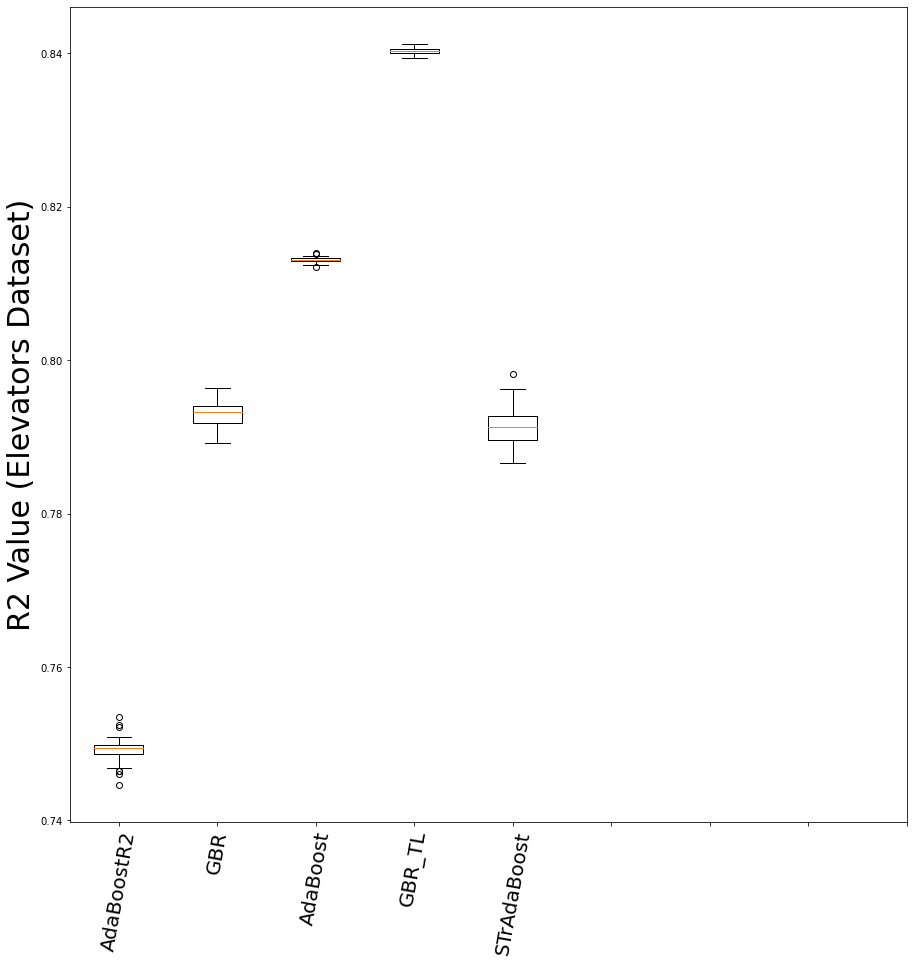

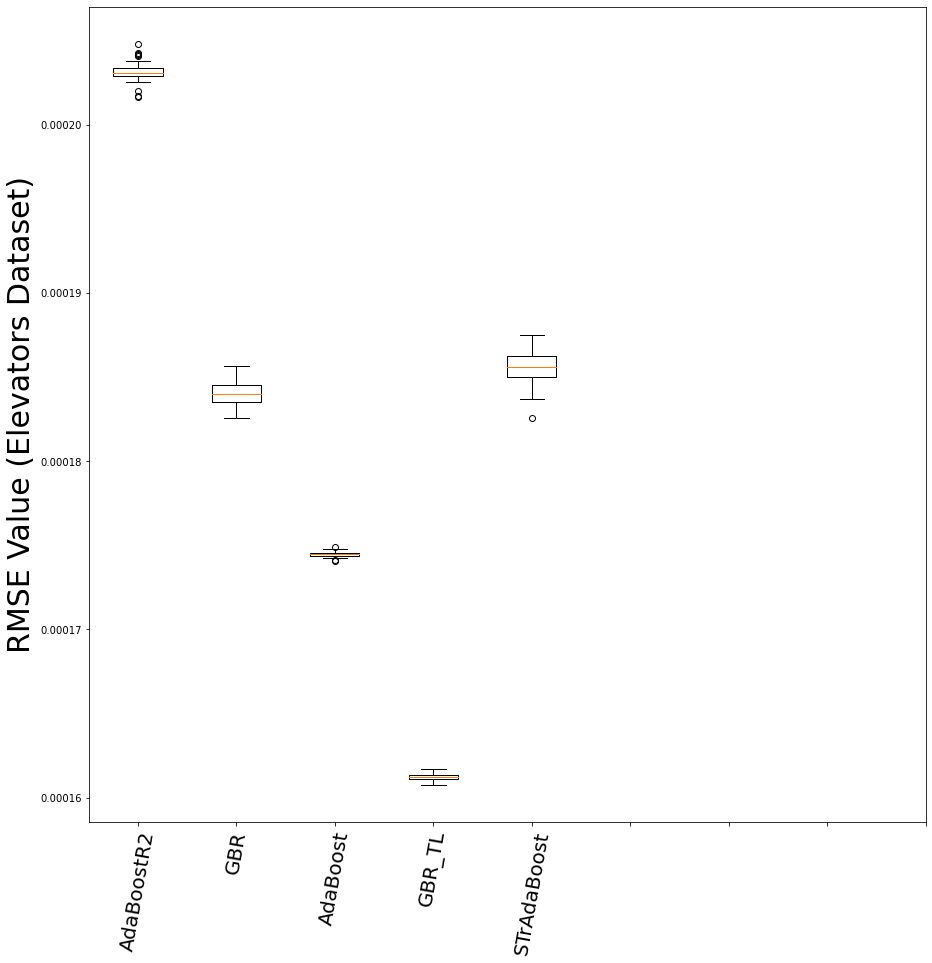

In [39]:
elevators_R2_data_np = np.array([AdaBoostR2_R2_elevators, GBR_R2_elevators, 
                            AdaBoost_TL_R2_elevators, GBR_TL_R2_elevators, STrAdaBoost_R2_elevators])

elevators_R2_data_np = elevators_R2_data_np.transpose()

elevators_RMSE_data_np = np.array([AdaBoostR2_RMSE_elevators, GBR_RMSE_elevators, 
                            AdaBoost_TL_RMSE_elevators, GBR_TL_RMSE_elevators, STrAdaBoost_RMSE_elevators])

elevators_RMSE_data_np = elevators_RMSE_data_np.transpose()



elevators_R2_dataset = pd.DataFrame(ailerons_R2_data_np, index = None, columns = ['AdaBoostR2_R2_elevators', 'GBR_R2_elevators', 
                                                                            'TranTrAdaBoost_R2_elevators', 
                                                                            'GBR_TL_R2_elevators', 'STrAdaBoost_R2_elevators'])
elevators_RMSE_dataset = pd.DataFrame(ailerons_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_elevators', 'GBR_RMSE_elevators', 
                                                                            'TranTrAdaBoost_RMSE_elevators', 
                                                                            'GBR_TL_RMSE_elevators', 'STrAdaBoost_RMSE_elevators'])


plt.figure(figsize=(15,15))
plt.boxplot(elevators_R2_dataset.values)

labels = ['AdaBoostR2', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Elevators Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Elevators")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(elevators_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Elevators Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Elevators")

In [40]:
############################## Abalone Dataset #################################################################

AdaBoostR2_R2_abalone = [0.142067390632193, 0.1310706185289445, 0.15008592419380534, 0.14007004835431344, 0.15924887117207692, 0.13599953116556487, 0.1511762419475734, 0.14690644218222962, 0.1372245519290041, 0.14157392856283746, 0.15118162662940426, 0.1384698069094055, 0.13263696570239722, 0.14683985696330049, 0.14338177270009378, 0.13875151222334417, 0.13360570906472002, 0.13773914133119267, 0.14076052941161524, 0.13904849941309647, 0.14629350722689924, 0.14493703387135282, 0.15034202820395687, 0.14126690007754528, 0.15597449135314703, 0.14738163981672986, 0.14670491749760606, 0.1364859386220124, 0.1346204694078574, 0.13703954365047633, 0.1388866145647749, 0.14113907956575095, 0.14450097452653612, 0.14639148276169134, 0.14491627783943833, 0.14031518322045997, 0.14773315730872794, 0.14218231843527349, 0.15282351645780431, 0.13804402050003278, 0.15298873290699988, 0.14057906873522646, 0.14580751407668346, 0.13903788005804485, 0.13784155981224658, 0.14814672943080665, 0.14118773583815947, 0.13590095555284487, 0.14070586758006196, 0.1416212764578151
]
# KMM_TL_R2_abalone = [1.0502928551712282e-05, 1.0502928551712282e-05, 0.06623324365783304, 0.06623324365783304, 1.0502928551712282e-05, 
#                      0.0025616335846856205, 0.06623324365783304, 1.0502928551712283e-05, 9.791154490625489e-05, 1.0502928551712282e-05]
GBR_R2_abalone = [0.008912345375548617, 0.01608561494531645, 0.018299710876411506, 0.01739161082902979, 0.014349462723331013, 0.021773959959914903, 0.009993957893117288, 0.0071222355426865695, 0.016290517897089223, 0.008162414193933718, 0.013023333866774947, 0.0130652098750444, 0.013335031019926915, 0.02005676872901762, 0.01987067773190345, 0.003731613751907038, 0.008144252118775666, 0.009347623775194918, 0.0115339380552268, 0.020513973365482333, 0.013987355415221621, 0.001997956993308238, 0.0105955386354765, 0.0017198961597323613, 0.016348613296922044, 0.0031794882073279446, 0.004896946778469258, 0.013662452845269922, 0.009754544783999815, 0.006484411823828869, 0.008187025224034262, 0.007928309559441626, 0.01714323053830321, 0.019578374971789037, 0.005675240759010827, 0.005866771129761125, 0.011217071922301104, 0.018185885006578216, 0.00238789059223539, 0.00978928682265821, 0.009701491391216423, 0.0018319967401597892, 0.008998548333151496, 0.018113117930258098, 0.011543405414221183, 0.0032074828487271617, 0.015354265398158198, 0.014408637182966, 0.01798895766632078, 0.006929698095571973
]
# TranTrAdaBoost_R2_abalone = [0.08998222813259087, 0.023669815573501122, 0.02654264118817837, 0.005541930754263786, 0.005603093075105872,
#                              0.005711250570588052, 0.001110517449232109, 0.02091489873433919, 0.0004277972727651144, 0.002764780363663507]
# TrAdaBoost_R2_abalone = [0.0018994074079456483, 2.7529031080604748e-05, 0.0019637678315071647, 0.002871533311634066, 1.919999108166027e-05, 
#                          0.00043537297940657733, 0.008684376366787634, 0.00021164694193771046, 0.002581355302504067, 0.00321186216508371]
AdaBoost_TL_R2_abalone = [0.1447927517131811, 0.13539217432987602, 0.14399929110460374, 0.13521035604948126, 0.14862076107027644, 0.14071711067190112, 0.14320063547834727, 0.1414294009932477, 0.13790490489549811, 0.14723751356975576, 0.14315821220074107, 0.13641771122441726, 0.1412487357051557, 0.15150968098319856, 0.12635253566993032, 0.14276224115542263, 0.1403354044714263, 0.14177510383726116, 0.14252610991682094, 0.1319043341949314, 0.14369424197960293, 0.1451452354545062, 0.14439887932343334, 0.1367522769134517, 0.12963805836332368, 0.13507239168580412, 0.13709772054914843, 0.14638158270187818, 0.14834613759525847, 0.14487631818386343, 0.13616386991320487, 0.14270181354420894, 0.15046673445237635, 0.13524176886161673, 0.13861401595042833, 0.14045969205733996, 0.139044274744172, 0.13663612779937928, 0.14607503880914713, 0.13471245424590997, 0.1416595300992107, 0.13914045972575215, 0.13322014118828468, 0.1425807736531908, 0.13679377282621216, 0.134566195268904, 0.13662221035114688, 0.1492679937955572, 0.13636131038483018, 0.13691058745097318
]
GBR_TL_R2_abalone = [0.040331240911076, 0.03930460197338104, 0.033591522645028356, 0.032452110000408645, 0.05169712882191388, 0.044079604346092066, 0.0386514717243326, 0.04771510433326567, 0.045873109817432395, 0.0502494619998918, 0.04422808054043959, 0.046701482411215765, 0.051066386071088196, 0.04105005671456268, 0.0489429812829089, 0.034135941744328505, 0.038999594823541796, 0.05009748552750633, 0.0379696338574579, 0.04416300808201105, 0.044482037278571675, 0.04833978151878283, 0.03750754009411828, 0.04114723549765231, 0.03597003421109569, 0.05159854264657557, 0.03827196534592266, 0.046691733757047583, 0.053199777301285285, 0.03189013719740343, 0.054445440490288405, 0.04764557202556837, 0.03268445422162211, 0.04103116263322273, 0.033917725094661, 0.0509878106991263, 0.047549527715498724, 0.041597098023624476, 0.05050437216124124, 0.03993709547302971, 0.04091154132875498, 0.03684002155389373, 0.03785318939245813, 0.03555915407133729, 0.04096128403443202, 0.032962979790130936, 0.036848760357384096, 0.041103493161216705, 0.030408011542079033, 0.04787878769839512
]
# STrAdaBoost_WO_R2_abalone = [0.04206278496075872, 0.016204176568877546, 0.013953337897041992, 0.08378817339380693, 0.0373198685733427, 
#                              0.07030577238325901, 0.07121638989778133, 0.07509872960351817, 0.035076794031229604, 0.09863507055685033]
STrAdaBoost_R2_abalone = [0.06029185013020453, 0.07387561260763911, 0.06239359408911413, 0.0333186751360565, 0.030706591934036617, 0.030963311418743714, 0.09168266864607703, 0.07749796269653374, 0.07528455003277558, 0.021050595791426548, 0.10273213433254885, 0.04402201656968362, 0.059605356151473984, 0.04245142213330828, 0.10293884950478958, 0.07817725946762522, 0.09535537065906526, 0.05619977108534243, 0.05442527415107491, 0.04086144189372406, 0.06721763702068709, 0.058391225659714316, 0.05103914119592418, 0.04189747038044483, 0.06277496672637377, 0.08576757388532545, 0.05912224115148499, 0.022827385327347127, 0.04705494788835453, 0.06802513950108954, 0.0795448741000526, 0.029338827341008566, 0.04952671009710131, 0.0993835175901921, 0.054387963595418976, 0.06714105578589406, 0.025865930948272647, 0.06301114125234669, 0.038147932349743036, 0.08103885522052087, 0.030996423629120674, 0.051979100947195676, 0.06325817387308932, 0.0600768813593755, 0.10066157879801331, 0.08239886214384352, 0.01919497756813436, 0.09849610093196948, 0.03799242283647679, 0.030154432970355676
]


AdaBoostR2_RMSE_abalone = [3.0443110789207783, 3.0301392751234637, 3.032293591983107, 3.033572017748813, 3.074990743589059, 3.030613430511094, 3.050175912195694, 3.054163844923267, 3.0263597347655167, 3.0309898319669144, 3.0419034935379163, 3.034534893363216, 3.0414242418266006, 3.0158516613252213, 3.0153850295251945, 3.010254981704781, 3.02865986795472, 3.0153746277601465, 3.0214813906884626, 3.059168940321534, 3.027920197314295, 3.0683821305535117, 3.0322995742624665, 3.0300872742245764, 3.0316137102922167, 3.0667540166670975, 3.067615215881678, 3.1022065012958304, 3.015085442154327, 3.0742349667774826, 3.0331332424763198, 3.028975764615138, 3.0718078285936876, 3.012319679694647, 3.0325177748292367, 3.0083273392728946, 3.071727048537664, 3.0429578268279163, 3.023479842510139, 3.1148440325454727, 3.0340472964700647, 3.05050811155063, 3.0423515521835034, 3.037878540403955, 3.0359886895050114, 3.0279248178890166, 3.0292630128958837, 3.044493472986519, 3.0234134938448496, 3.041282878616607
]
# KMM_TL_RMSE_abalone = [4.722409943705714, 4.722409943705714, 7.110116105309898, 7.110116105309898, 4.722409943705714, 
#                        4.69302388098747, 7.110116105309898, 4.720466165091281, 4.0055087437302275, 4.722409943705714]
GBR_RMSE_abalone = [3.0666769491069448, 3.0519392445034277, 3.1590605986250706, 3.00664314972877, 3.0168030995097124, 2.9975727944722013, 3.02949042407831, 3.1372249257078413, 3.0437199271713364, 3.045654970415661, 3.06026655613187, 3.129706298720539, 3.0277136538817877, 3.010666992465881, 3.023448567730445, 3.3742492102606594, 3.2529527697705323, 3.0774573086266077, 3.0293956286334303, 3.024315573574681, 3.06044440028007, 3.195734363110568, 3.0314091542517807, 3.056877110210722, 3.0090100086801694, 3.1458883695181346, 3.0982375984711052, 3.0159311545306418, 3.148427351001009, 3.0382026693955337, 3.058351889443369, 3.0333459670404554, 3.096835024845664, 3.0419049296864875, 3.2137928210996245, 3.140911604220595, 3.0329505384566406, 3.0244372371203534, 3.083732816340672, 3.186038277586076, 3.059110381765772, 3.1599705662477398, 3.1246321013514606, 3.052479753615904, 3.019743894571037, 3.0467750781430407, 3.033963374019501, 3.012193424862841, 3.0230504357456187, 3.1174963923165726
]
# TranTrAdaBoost_RMSE_abalone = [5.678807958267232, 3.9267732344829804, 3.8862125047866276, 4.234017515985184, 4.140431209808338, 
#                                4.103640520347608, 4.092348497736601, 3.552947291867083, 3.7278255366868063, 4.045330934449049]
# TrAdaBoost_RMSE_abalone = [4.463650742905368, 4.384018281886595, 4.408356723838143, 4.402840569384498, 4.311720407532454, 
#                            4.195116648016497, 4.176478325009078, 4.487043322881292, 3.849439195373271, 4.388846530268929]
AdaBoost_TL_RMSE_abalone = [3.043274754500754, 3.0358449181982374, 3.0838265935529394, 3.038234652011265, 3.0437442779010455, 3.0310095312544063, 3.028664820124, 3.045561687083154, 3.036319298066365, 3.046104870123829, 3.032438458738102, 3.0254022621541967, 3.029715489104626, 3.0081505980963246, 3.1100243642949623, 3.0548927085443665, 3.0252124101273723, 3.042889598593555, 3.022771627310702, 3.0771515306866855, 3.0318157410396327, 3.027020418069478, 3.048329514441549, 3.021624439647029, 3.0298923499471533, 3.03062722378799, 3.030009678402827, 3.0313156812305735, 3.021232562639311, 3.022807144789655, 3.018846849951996, 3.047827243326344, 3.030409312569325, 3.0157901645074614, 3.027545976796784, 3.0392190977111415, 3.009362961019728, 3.0735131704698846, 3.0393113029435557, 3.0312098528559233, 3.037935308917995, 3.098669948039106, 3.029651459904049, 3.0441358557573115, 3.0831379079539305, 3.025840265412158, 3.0447580476492897, 3.024307231813007, 3.02508506340225, 3.0418352056782685
]
GBR_TL_RMSE_abalone = [3.0603354833571537, 3.039672777036231, 3.0518043462580478, 3.123837960674327, 3.0582126380596457, 3.1304279658081033, 3.061519174501391, 3.029883244491883, 3.051591788460173, 3.0851886144633847, 3.1059423268088833, 3.0583458273710664, 3.0800399753251515, 3.10924882513137, 3.05697582825905, 3.0688118652248177, 3.0219030257784856, 3.0419292313395667, 3.029819701517463, 3.0519501411013796, 3.0891455635479894, 3.0704405171856175, 3.076056563813556, 3.0958255551829974, 3.0716958857600543, 3.0772888488163277, 3.0995024990079725, 3.027267368218586, 3.071683728912943, 3.0353477408136555, 3.0177904928956814, 3.022234793419476, 3.0948193180257486, 3.0807383846217617, 3.032758772330173, 3.0659709642121387, 3.0853139288202236, 3.0506609981018493, 3.0421515369582437, 3.103943159694277, 3.0750142809693766, 3.129888281788834, 3.0317047281006393, 3.049137413839469, 3.051199377153813, 3.1135844752547994, 3.0674474627281634, 3.050382111110553, 3.1105702178011145, 3.1024428231183245
]
# STrAdaBoost_WO_RMSE_abalone = [3.0506709075552396, 3.1159034892571036, 3.2253570782381606, 2.963306660435009, 3.122517219834482, 
#                                3.1321354455701744, 2.9508250064395583, 3.1240583608936987, 3.1316547778334285, 2.949568130044639]
STrAdaBoost_RMSE_abalone = [2.9432265376919595, 3.0461764683248687, 3.0893936484401117, 3.2045530526974835, 3.052837031586792, 3.0330334024084875, 2.9260492999504883, 2.9737321452573338, 2.9394010713432346, 3.131158356969168, 3.017128558731414, 3.0986771253547363, 2.942883533434518, 3.0615773963536146, 2.9396803661751854, 2.9277639646561577, 2.8777847865370156, 3.0748738400868754, 3.15566053947225, 3.1600556477796156, 2.9346816244049796, 2.9962401951626902, 3.1777308012754224, 3.042750122937219, 2.93861511312292, 3.080287821060247, 3.0811226906477205, 3.1619593730228948, 2.9950584319501306, 3.01570082337753, 3.0103079216399133, 3.0887747285546707, 3.1588223173243337, 2.917542650572675, 3.0081347901747075, 3.024374082206414, 3.1567903945329516, 3.132203323964486, 3.0697771053499756, 3.033828240997364, 3.166540057277469, 3.2083142397003654, 2.9402280639287524, 3.0055635528671396, 2.9382368985957705, 2.9525032383824783, 3.4119475366369736, 2.9315859186256765, 3.2000867180910983, 3.056969961640394
]


----------------------------------------------------------------------------------------------------------------


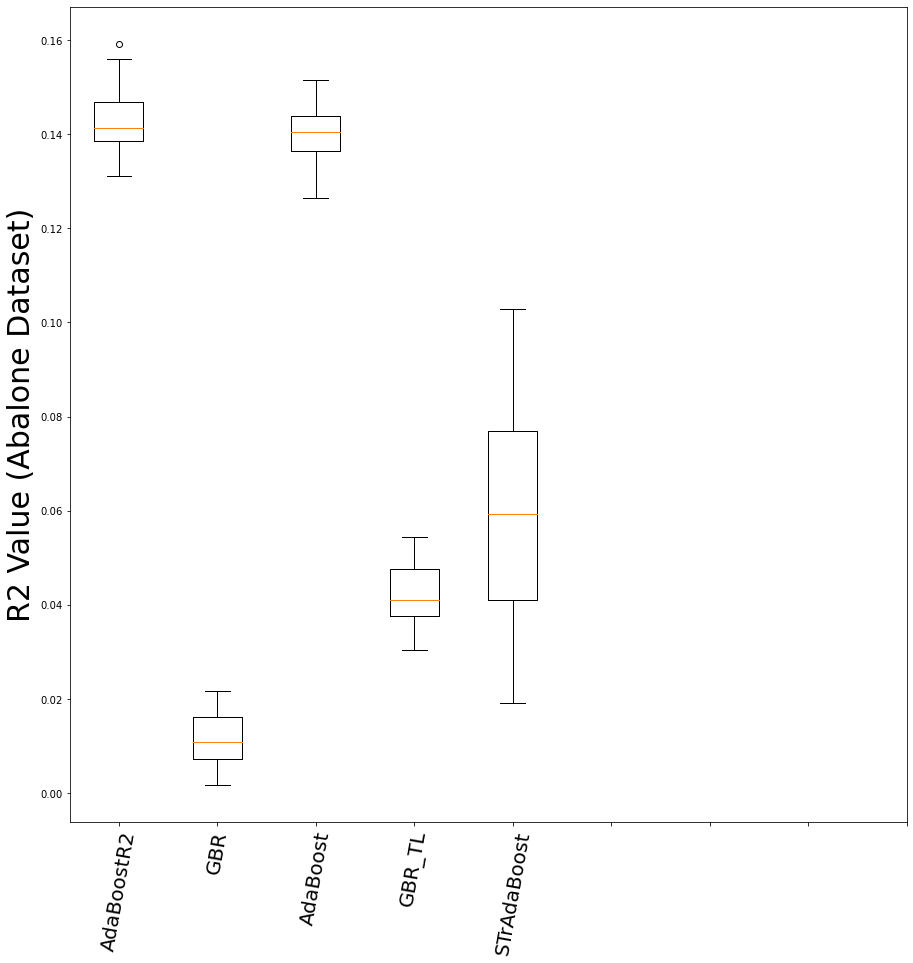

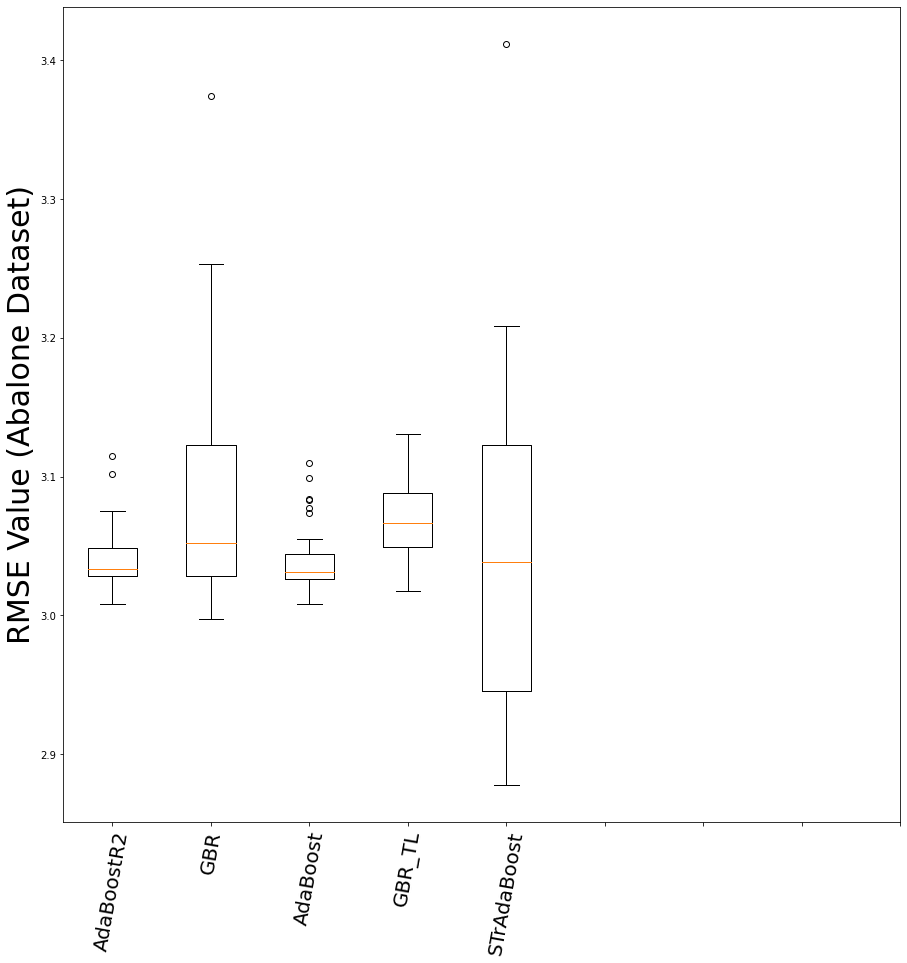

In [41]:
abalone_R2_data_np = np.array([AdaBoostR2_R2_abalone, GBR_R2_abalone, 
                            AdaBoost_TL_R2_abalone, GBR_TL_R2_abalone, STrAdaBoost_R2_abalone])

abalone_R2_data_np = abalone_R2_data_np.transpose()

abalone_RMSE_data_np = np.array([AdaBoostR2_RMSE_abalone, GBR_RMSE_abalone, 
                            AdaBoost_TL_RMSE_abalone, GBR_TL_RMSE_abalone, STrAdaBoost_RMSE_abalone])

abalone_RMSE_data_np = abalone_RMSE_data_np.transpose()



abalone_R2_dataset = pd.DataFrame(abalone_R2_data_np, index = None, columns = ['AdaBoostR2_R2_abalone', 'GBR_R2_abalone', 
                                                                            'AdaBoost_TL_R2_abalone', 
                                                                            'GBR_TL_R2_abalone', 'STrAdaBoost_R2_abalone'])
abalone_RMSE_dataset = pd.DataFrame(abalone_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_abalone', 'GBR_RMSE_abalone', 
                                                                            'AdaBoost_TL_RMSE_abalone', 
                                                                            'GBR_TL_RMSE_abalone', 'STrAdaBoost_RMSE_abalone'])


plt.figure(figsize=(15,15))
plt.boxplot(abalone_R2_dataset.values)

labels = ['AdaBoostR2', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Abalone Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Abalone")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(abalone_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Abalone Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Abalone")

In [43]:
############################## Kinematics Dataset #################################################################

AdaBoostR2_R2_kinematics = [0.142067390632193, 0.1310706185289445, 0.15008592419380534, 0.14007004835431344, 0.15924887117207692, 0.13599953116556487, 0.1511762419475734, 0.14690644218222962, 0.1372245519290041, 0.14157392856283746, 0.15118162662940426, 0.1384698069094055, 0.13263696570239722, 0.14683985696330049, 0.14338177270009378, 0.13875151222334417, 0.13360570906472002, 0.13773914133119267, 0.14076052941161524, 0.13904849941309647, 0.14629350722689924, 0.14493703387135282, 0.15034202820395687, 0.14126690007754528, 0.15597449135314703, 0.14738163981672986, 0.14670491749760606, 0.1364859386220124, 0.1346204694078574, 0.13703954365047633, 0.1388866145647749, 0.14113907956575095, 0.14450097452653612, 0.14639148276169134, 0.14491627783943833, 0.14031518322045997, 0.14773315730872794, 0.14218231843527349, 0.15282351645780431, 0.13804402050003278, 0.15298873290699988, 0.14057906873522646, 0.14580751407668346, 0.13903788005804485, 0.13784155981224658, 0.14814672943080665, 0.14118773583815947, 0.13590095555284487, 0.14070586758006196, 0.1416212764578151
]
# KMM_TL_R2_kinematics = [1.0502928551712282e-05, 1.0502928551712282e-05, 0.06623324365783304, 0.06623324365783304, 1.0502928551712282e-05, 
#                      0.0025616335846856205, 0.06623324365783304, 1.0502928551712283e-05, 9.791154490625489e-05, 1.0502928551712282e-05]
GBR_R2_kinematics = [0.008912345375548617, 0.01608561494531645, 0.018299710876411506, 0.01739161082902979, 0.014349462723331013, 0.021773959959914903, 0.009993957893117288, 0.0071222355426865695, 0.016290517897089223, 0.008162414193933718, 0.013023333866774947, 0.0130652098750444, 0.013335031019926915, 0.02005676872901762, 0.01987067773190345, 0.003731613751907038, 0.008144252118775666, 0.009347623775194918, 0.0115339380552268, 0.020513973365482333, 0.013987355415221621, 0.001997956993308238, 0.0105955386354765, 0.0017198961597323613, 0.016348613296922044, 0.0031794882073279446, 0.004896946778469258, 0.013662452845269922, 0.009754544783999815, 0.006484411823828869, 0.008187025224034262, 0.007928309559441626, 0.01714323053830321, 0.019578374971789037, 0.005675240759010827, 0.005866771129761125, 0.011217071922301104, 0.018185885006578216, 0.00238789059223539, 0.00978928682265821, 0.009701491391216423, 0.0018319967401597892, 0.008998548333151496, 0.018113117930258098, 0.011543405414221183, 0.0032074828487271617, 0.015354265398158198, 0.014408637182966, 0.01798895766632078, 0.006929698095571973
]
# TranTrAdaBoost_R2_kinematics = [0.08998222813259087, 0.023669815573501122, 0.02654264118817837, 0.005541930754263786, 0.005603093075105872,
#                              0.005711250570588052, 0.001110517449232109, 0.02091489873433919, 0.0004277972727651144, 0.002764780363663507]
# TrAdaBoost_R2_kinematics = [0.0018994074079456483, 2.7529031080604748e-05, 0.0019637678315071647, 0.002871533311634066, 1.919999108166027e-05, 
#                          0.00043537297940657733, 0.008684376366787634, 0.00021164694193771046, 0.002581355302504067, 0.00321186216508371]
AdaBoost_TL_R2_kinematics = [0.1447927517131811, 0.13539217432987602, 0.14399929110460374, 0.13521035604948126, 0.14862076107027644, 0.14071711067190112, 0.14320063547834727, 0.1414294009932477, 0.13790490489549811, 0.14723751356975576, 0.14315821220074107, 0.13641771122441726, 0.1412487357051557, 0.15150968098319856, 0.12635253566993032, 0.14276224115542263, 0.1403354044714263, 0.14177510383726116, 0.14252610991682094, 0.1319043341949314, 0.14369424197960293, 0.1451452354545062, 0.14439887932343334, 0.1367522769134517, 0.12963805836332368, 0.13507239168580412, 0.13709772054914843, 0.14638158270187818, 0.14834613759525847, 0.14487631818386343, 0.13616386991320487, 0.14270181354420894, 0.15046673445237635, 0.13524176886161673, 0.13861401595042833, 0.14045969205733996, 0.139044274744172, 0.13663612779937928, 0.14607503880914713, 0.13471245424590997, 0.1416595300992107, 0.13914045972575215, 0.13322014118828468, 0.1425807736531908, 0.13679377282621216, 0.134566195268904, 0.13662221035114688, 0.1492679937955572, 0.13636131038483018, 0.13691058745097318
]
GBR_TL_R2_kinematics = [0.040331240911076, 0.03930460197338104, 0.033591522645028356, 0.032452110000408645, 0.05169712882191388, 0.044079604346092066, 0.0386514717243326, 0.04771510433326567, 0.045873109817432395, 0.0502494619998918, 0.04422808054043959, 0.046701482411215765, 0.051066386071088196, 0.04105005671456268, 0.0489429812829089, 0.034135941744328505, 0.038999594823541796, 0.05009748552750633, 0.0379696338574579, 0.04416300808201105, 0.044482037278571675, 0.04833978151878283, 0.03750754009411828, 0.04114723549765231, 0.03597003421109569, 0.05159854264657557, 0.03827196534592266, 0.046691733757047583, 0.053199777301285285, 0.03189013719740343, 0.054445440490288405, 0.04764557202556837, 0.03268445422162211, 0.04103116263322273, 0.033917725094661, 0.0509878106991263, 0.047549527715498724, 0.041597098023624476, 0.05050437216124124, 0.03993709547302971, 0.04091154132875498, 0.03684002155389373, 0.03785318939245813, 0.03555915407133729, 0.04096128403443202, 0.032962979790130936, 0.036848760357384096, 0.041103493161216705, 0.030408011542079033, 0.04787878769839512
]
# STrAdaBoost_WO_R2_kinematics = [0.04206278496075872, 0.016204176568877546, 0.013953337897041992, 0.08378817339380693, 0.0373198685733427, 
#                              0.07030577238325901, 0.07121638989778133, 0.07509872960351817, 0.035076794031229604, 0.09863507055685033]
STrAdaBoost_R2_kinematics = [0.06029185013020453, 0.07387561260763911, 0.06239359408911413, 0.0333186751360565, 0.030706591934036617, 0.030963311418743714, 0.09168266864607703, 0.07749796269653374, 0.07528455003277558, 0.021050595791426548, 0.10273213433254885, 0.04402201656968362, 0.059605356151473984, 0.04245142213330828, 0.10293884950478958, 0.07817725946762522, 0.09535537065906526, 0.05619977108534243, 0.05442527415107491, 0.04086144189372406, 0.06721763702068709, 0.058391225659714316, 0.05103914119592418, 0.04189747038044483, 0.06277496672637377, 0.08576757388532545, 0.05912224115148499, 0.022827385327347127, 0.04705494788835453, 0.06802513950108954, 0.0795448741000526, 0.029338827341008566, 0.04952671009710131, 0.0993835175901921, 0.054387963595418976, 0.06714105578589406, 0.025865930948272647, 0.06301114125234669, 0.038147932349743036, 0.08103885522052087, 0.030996423629120674, 0.051979100947195676, 0.06325817387308932, 0.0600768813593755, 0.10066157879801331, 0.08239886214384352, 0.01919497756813436, 0.09849610093196948, 0.03799242283647679, 0.030154432970355676
]


AdaBoostR2_RMSE_kinematics = [3.0443110789207783, 3.0301392751234637, 3.032293591983107, 3.033572017748813, 3.074990743589059, 3.030613430511094, 3.050175912195694, 3.054163844923267, 3.0263597347655167, 3.0309898319669144, 3.0419034935379163, 3.034534893363216, 3.0414242418266006, 3.0158516613252213, 3.0153850295251945, 3.010254981704781, 3.02865986795472, 3.0153746277601465, 3.0214813906884626, 3.059168940321534, 3.027920197314295, 3.0683821305535117, 3.0322995742624665, 3.0300872742245764, 3.0316137102922167, 3.0667540166670975, 3.067615215881678, 3.1022065012958304, 3.015085442154327, 3.0742349667774826, 3.0331332424763198, 3.028975764615138, 3.0718078285936876, 3.012319679694647, 3.0325177748292367, 3.0083273392728946, 3.071727048537664, 3.0429578268279163, 3.023479842510139, 3.1148440325454727, 3.0340472964700647, 3.05050811155063, 3.0423515521835034, 3.037878540403955, 3.0359886895050114, 3.0279248178890166, 3.0292630128958837, 3.044493472986519, 3.0234134938448496, 3.041282878616607
]
# KMM_TL_RMSE_kinematics = [4.722409943705714, 4.722409943705714, 7.110116105309898, 7.110116105309898, 4.722409943705714, 
#                        4.69302388098747, 7.110116105309898, 4.720466165091281, 4.0055087437302275, 4.722409943705714]
GBR_RMSE_kinematics = [3.0666769491069448, 3.0519392445034277, 3.1590605986250706, 3.00664314972877, 3.0168030995097124, 2.9975727944722013, 3.02949042407831, 3.1372249257078413, 3.0437199271713364, 3.045654970415661, 3.06026655613187, 3.129706298720539, 3.0277136538817877, 3.010666992465881, 3.023448567730445, 3.3742492102606594, 3.2529527697705323, 3.0774573086266077, 3.0293956286334303, 3.024315573574681, 3.06044440028007, 3.195734363110568, 3.0314091542517807, 3.056877110210722, 3.0090100086801694, 3.1458883695181346, 3.0982375984711052, 3.0159311545306418, 3.148427351001009, 3.0382026693955337, 3.058351889443369, 3.0333459670404554, 3.096835024845664, 3.0419049296864875, 3.2137928210996245, 3.140911604220595, 3.0329505384566406, 3.0244372371203534, 3.083732816340672, 3.186038277586076, 3.059110381765772, 3.1599705662477398, 3.1246321013514606, 3.052479753615904, 3.019743894571037, 3.0467750781430407, 3.033963374019501, 3.012193424862841, 3.0230504357456187, 3.1174963923165726
]
# TranTrAdaBoost_RMSE_kinematics = [5.678807958267232, 3.9267732344829804, 3.8862125047866276, 4.234017515985184, 4.140431209808338, 
#                                4.103640520347608, 4.092348497736601, 3.552947291867083, 3.7278255366868063, 4.045330934449049]
# TrAdaBoost_RMSE_kinematics = [4.463650742905368, 4.384018281886595, 4.408356723838143, 4.402840569384498, 4.311720407532454, 
#                            4.195116648016497, 4.176478325009078, 4.487043322881292, 3.849439195373271, 4.388846530268929]
AdaBoost_TL_RMSE_kinematics = [3.043274754500754, 3.0358449181982374, 3.0838265935529394, 3.038234652011265, 3.0437442779010455, 3.0310095312544063, 3.028664820124, 3.045561687083154, 3.036319298066365, 3.046104870123829, 3.032438458738102, 3.0254022621541967, 3.029715489104626, 3.0081505980963246, 3.1100243642949623, 3.0548927085443665, 3.0252124101273723, 3.042889598593555, 3.022771627310702, 3.0771515306866855, 3.0318157410396327, 3.027020418069478, 3.048329514441549, 3.021624439647029, 3.0298923499471533, 3.03062722378799, 3.030009678402827, 3.0313156812305735, 3.021232562639311, 3.022807144789655, 3.018846849951996, 3.047827243326344, 3.030409312569325, 3.0157901645074614, 3.027545976796784, 3.0392190977111415, 3.009362961019728, 3.0735131704698846, 3.0393113029435557, 3.0312098528559233, 3.037935308917995, 3.098669948039106, 3.029651459904049, 3.0441358557573115, 3.0831379079539305, 3.025840265412158, 3.0447580476492897, 3.024307231813007, 3.02508506340225, 3.0418352056782685
]
GBR_TL_RMSE_kinematics = [3.0603354833571537, 3.039672777036231, 3.0518043462580478, 3.123837960674327, 3.0582126380596457, 3.1304279658081033, 3.061519174501391, 3.029883244491883, 3.051591788460173, 3.0851886144633847, 3.1059423268088833, 3.0583458273710664, 3.0800399753251515, 3.10924882513137, 3.05697582825905, 3.0688118652248177, 3.0219030257784856, 3.0419292313395667, 3.029819701517463, 3.0519501411013796, 3.0891455635479894, 3.0704405171856175, 3.076056563813556, 3.0958255551829974, 3.0716958857600543, 3.0772888488163277, 3.0995024990079725, 3.027267368218586, 3.071683728912943, 3.0353477408136555, 3.0177904928956814, 3.022234793419476, 3.0948193180257486, 3.0807383846217617, 3.032758772330173, 3.0659709642121387, 3.0853139288202236, 3.0506609981018493, 3.0421515369582437, 3.103943159694277, 3.0750142809693766, 3.129888281788834, 3.0317047281006393, 3.049137413839469, 3.051199377153813, 3.1135844752547994, 3.0674474627281634, 3.050382111110553, 3.1105702178011145, 3.1024428231183245
]
# STrAdaBoost_WO_RMSE_kinematics = [3.0506709075552396, 3.1159034892571036, 3.2253570782381606, 2.963306660435009, 3.122517219834482, 
#                                3.1321354455701744, 2.9508250064395583, 3.1240583608936987, 3.1316547778334285, 2.949568130044639]
STrAdaBoost_RMSE_kinematics = [2.9432265376919595, 3.0461764683248687, 3.0893936484401117, 3.2045530526974835, 3.052837031586792, 3.0330334024084875, 2.9260492999504883, 2.9737321452573338, 2.9394010713432346, 3.131158356969168, 3.017128558731414, 3.0986771253547363, 2.942883533434518, 3.0615773963536146, 2.9396803661751854, 2.9277639646561577, 2.8777847865370156, 3.0748738400868754, 3.15566053947225, 3.1600556477796156, 2.9346816244049796, 2.9962401951626902, 3.1777308012754224, 3.042750122937219, 2.93861511312292, 3.080287821060247, 3.0811226906477205, 3.1619593730228948, 2.9950584319501306, 3.01570082337753, 3.0103079216399133, 3.0887747285546707, 3.1588223173243337, 2.917542650572675, 3.0081347901747075, 3.024374082206414, 3.1567903945329516, 3.132203323964486, 3.0697771053499756, 3.033828240997364, 3.166540057277469, 3.2083142397003654, 2.9402280639287524, 3.0055635528671396, 2.9382368985957705, 2.9525032383824783, 3.4119475366369736, 2.9315859186256765, 3.2000867180910983, 3.056969961640394
]



----------------------------------------------------------------------------------------------------------------


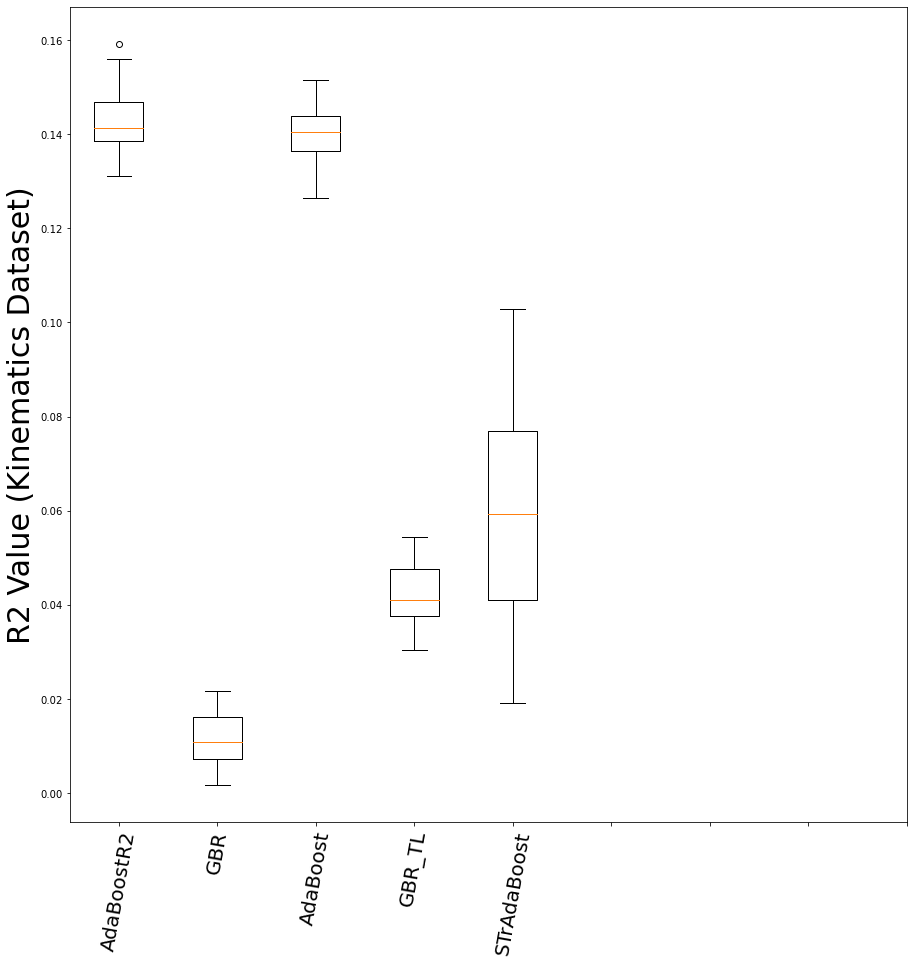

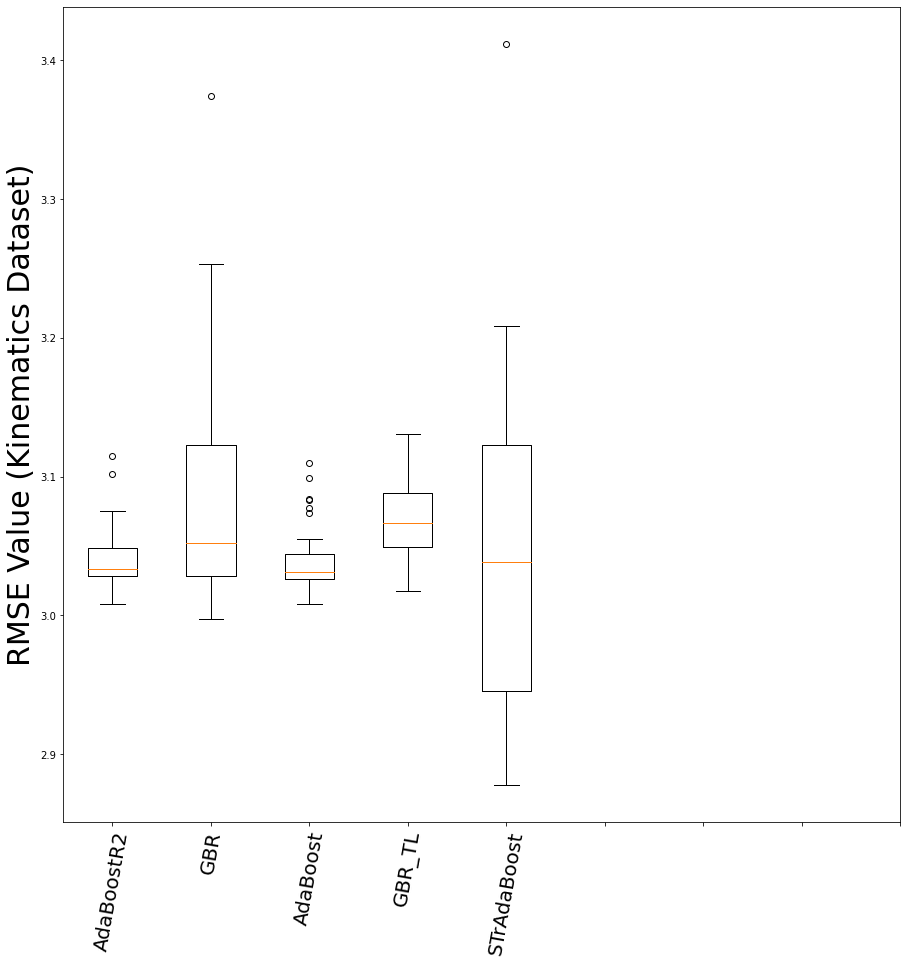

In [45]:
kinematics_R2_data_np = np.array([AdaBoostR2_R2_kinematics, GBR_R2_kinematics, 
                            AdaBoost_TL_R2_kinematics, GBR_TL_R2_kinematics, STrAdaBoost_R2_kinematics])

kinematics_R2_data_np = kinematics_R2_data_np.transpose()

kinematics_RMSE_data_np = np.array([AdaBoostR2_RMSE_kinematics, GBR_RMSE_kinematics, 
                            AdaBoost_TL_RMSE_kinematics, GBR_TL_RMSE_kinematics, STrAdaBoost_RMSE_kinematics])

kinematics_RMSE_data_np = kinematics_RMSE_data_np.transpose()



kinematics_R2_dataset = pd.DataFrame(kinematics_R2_data_np, index = None, columns = ['AdaBoostR2_R2_kinematics', 'GBR_R2_kinematics', 
                                                                            'AdaBoost_TL_R2_kinematics', 
                                                                            'GBR_TL_R2_kinematics', 'STrAdaBoost_R2_kinematics'])
kinematics_RMSE_dataset = pd.DataFrame(kinematics_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_kinematics', 'GBR_RMSE_kinematics', 
                                                                            'AdaBoost_TL_RMSE_kinematics', 
                                                                            'GBR_TL_RMSE_kinematics', 'STrAdaBoost_RMSE_kinematics'])


plt.figure(figsize=(15,15))
plt.boxplot(kinematics_R2_dataset.values)

labels = ['AdaBoostR2', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Kinematics Dataset)", fontsize = 30)

plt.savefig("Paper_R2_Kinematics")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(kinematics_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Kinematics Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_Kinematics")

In [53]:
############################## Computer Activity Dataset #################################################################

AdaBoostR2_R2_compAct = [0.97018497140513, 0.9701664320655158, 0.970306426065612, 0.9703366895014132, 0.970247521658666, 0.9702836336512748, 0.9701383345902258, 0.9703415594051934, 0.97033845047216, 0.9703364000145959, 0.9703044405356793, 0.9703540912125961, 0.9703007407695609, 0.9701059990029615, 0.9702608109275662, 0.9703169355119411, 0.9704032705536, 0.9703544480762034, 0.970421938493137, 0.9703454561684801, 0.9704917204639664, 0.9702291645524425, 0.9702108198203684, 0.9702747743405054, 0.9702769762863981, 0.9703065229282797, 0.9702516897592567, 0.9703051695723691, 0.9701745586832173, 0.9701426605232163, 0.9702303628090357, 0.9703458710674921, 0.970284413054537, 0.9702861186764372, 0.970206536617611, 0.9702713676212849, 0.9702554642506922, 0.970147439575165, 0.9703035258462472, 0.9702792669797008, 0.9703421346233493, 0.9703520367292695, 0.9703865773533047, 0.9704186490898864, 0.9704282808075174, 0.9702541716946459, 0.9702681064726604, 0.970150158554159, 0.9703961068207808, 0.9702974804441997]
# KMM_TL_R2_compAct = [1.0502928551712282e-05, 1.0502928551712282e-05, 0.06623324365783304, 0.06623324365783304, 1.0502928551712282e-05, 
#                      0.0025616335846856205, 0.06623324365783304, 1.0502928551712283e-05, 9.791154490625489e-05, 1.0502928551712282e-05]
GBR_R2_compAct = [0.9674739474058898, 0.965709210222922, 0.9661593964499964, 0.9660415617132934, 0.964969448952853, 0.9653237655586121, 0.965888041020096, 0.965872161304314, 0.9668667523010576, 0.9642058053728466, 0.9669446548987143, 0.9658078736599406, 0.9648871798991016, 0.9625636330425269, 0.9653057478976617, 0.965675984455815, 0.964446670784608, 0.9640315062004792, 0.9641499581697042, 0.9642162385313235, 0.9667438193046217, 0.9661170998984518, 0.9648413191427745, 0.9652200097554412, 0.9644746419151012, 0.9675897398092731, 0.9647346284628809, 0.9656861771745477, 0.9663014418995627, 0.9649171349754394, 0.9661668457846592, 0.9658985194978049, 0.9657357371314425, 0.9661480252157707, 0.9663760260975794, 0.9656086554262571, 0.9663843165141707, 0.9661946906388371, 0.965771358562178, 0.9662823181293413, 0.9657124720053365, 0.9657616125001759, 0.966290359114094, 0.9649088239074012, 0.9647382005433339, 0.9651901884517221, 0.9661356819187985, 0.9675472626429623, 0.9621406601196458, 0.9650933992192632
]
# TranTrAdaBoost_R2_compAct = [0.08998222813259087, 0.023669815573501122, 0.02654264118817837, 0.005541930754263786, 0.005603093075105872,
#                              0.005711250570588052, 0.001110517449232109, 0.02091489873433919, 0.0004277972727651144, 0.002764780363663507]
# TrAdaBoost_R2_compAct = [0.0018994074079456483, 2.7529031080604748e-05, 0.0019637678315071647, 0.002871533311634066, 1.919999108166027e-05, 
#                          0.00043537297940657733, 0.008684376366787634, 0.00021164694193771046, 0.002581355302504067, 0.00321186216508371]
AdaBoost_TL_R2_compAct = [0.9702988262301427, 0.9704318993989414, 0.9702626588690356, 0.9703327874931712, 0.9702242646320985, 0.9703483195704259, 0.9702733316290432, 0.9703005906317697, 0.970395500461715, 0.9702096115338621, 0.9702750893693997, 0.9703103241721532, 0.970450777069031, 0.9701902621635256, 0.9703602751395471, 0.9702179017432415, 0.9704416956168592, 0.9703202405065088, 0.9700926753048925, 0.9703712989230384, 0.9703553265333495, 0.9703365364835598, 0.9703413379310992, 0.970307748930269, 0.9702394486743795, 0.9703319105770285, 0.9703916265895419, 0.9703752148432002, 0.9702336578450139, 0.9701974497541234, 0.9702337367102594, 0.9701851394684807, 0.9702728960415107, 0.9702084121878939, 0.97021323698934, 0.9701713633791759, 0.970306392825657, 0.9702569211631304, 0.9702560654488392, 0.9703208390865472, 0.9702520379772707, 0.9702781889770535, 0.9702865218608963, 0.9702647659634366, 0.970345873444866, 0.9702123163191617, 0.9702075797857123, 0.9703284365317381, 0.9703297922690137, 0.9703113847030732
]
GBR_TL_R2_compAct = [0.9766957003518426, 0.9767876043174688, 0.9774005371187511, 0.9766523399775127, 0.976673804318701, 0.977117058646325, 0.976534304501581, 0.9762537628197225, 0.9765894799486877, 0.9775106927765074, 0.976867613257116, 0.9771826023708751, 0.9760991558586668, 0.9769157990630786, 0.9770842178433713, 0.976689743562732, 0.9765567451843653, 0.9767979832599882, 0.9767354771402463, 0.9765698211959952, 0.9772126930063515, 0.9764613823062804, 0.9769181076303417, 0.9762441836178941, 0.9774155014192916, 0.9761890509589883, 0.9758489801489068, 0.9773979567942367, 0.977061243776249, 0.9769197643722044, 0.9764234043085683, 0.9757711716345107, 0.976611863505442, 0.9774054130089792, 0.9768769216341006, 0.9771337678664637, 0.9772828275854433, 0.9770705395463571, 0.9761587843666171, 0.9769246058709397, 0.9772681298812004, 0.9772158839417497, 0.9769889826964965, 0.9761895710755966, 0.9775601631677137, 0.9751538367256466, 0.9753004316118246, 0.977074652565667, 0.976381550408169, 0.9754993158041616
]
STrAdaBoost_WO_R2_compAct = [0.967911903146344, 0.9687683730458485, 0.9684532130216373, 0.969060876413394, 0.9688138052139259, 0.9693884410542472, 0.9691088074553104, 0.9683129708068176, 0.9693994284850709, 0.9692606824539486, 0.968761096141219, 0.9686133320617678, 0.9686733530157658, 0.9694013810931944, 0.9680244361681797, 0.9684668974307126, 0.9691766301036625, 0.9689564816394215, 0.9687149457103897, 0.9688476663769116, 0.9686527592967776, 0.9689154702018882, 0.9690953393917803, 0.9686597579479623, 0.9685846921642058, 0.9685172296294962, 0.9684352284462124, 0.96876964939344, 0.9686882336510783, 0.9690951072439922, 0.9687211369514026, 0.968685466602045, 0.9642504551542366, 0.9685934743935466, 0.9691437518905047, 0.9688269624595606, 0.9684653475124839, 0.9688431196359252, 0.9685884705087409, 0.9686444169457131, 0.9688090772344937, 0.9640540717427724, 0.9692584890471365, 0.9688471678928359, 0.9685916059390494, 0.9688062602765716, 0.9685435641006819, 0.9690344779137736, 0.9686403674971092, 0.9677377400310633
]
STrAdaBoost_R2_compAct = [0.9692093146788177, 0.968361570455601, 0.9696667394709508, 0.9691056617923778, 0.9692350627894134, 0.968589416356888, 0.9681432109896557, 0.9685335100156962, 0.9689955667182638, 0.9674704912521602, 0.9676166190945308, 0.963685079904088, 0.9686063075671772, 0.9688436745133776, 0.9670647757508343, 0.9676657102563967, 0.9688600934162614, 0.9693330202095644, 0.9673148803338271, 0.96897490921583, 0.96960147220731, 0.9684524624282359, 0.9685491107267122, 0.9638295860029942, 0.9691966076939036, 0.9638391481771528, 0.968278480381443, 0.9682494929122677, 0.9688600289138761, 0.9674698442118581, 0.969173786960598, 0.9693319799211684, 0.9691578414819375, 0.9684343239602087, 0.9682794120691453, 0.9692218373729403, 0.9688996343886712, 0.9691750522365915, 0.9694389467905139, 0.9696120177566249, 0.9688410476234067, 0.9684508218572477, 0.9635564518161017, 0.9685837786164266, 0.9689646451213795, 0.9681061748098956, 0.9691728981817878, 0.967876318506164, 0.9689561665017418, 0.9683814003874917
]


AdaBoostR2_RMSE_compAct = [3.9470350007519084, 3.9466640625271436, 3.9480107149714456, 3.9376182036881544, 3.94732970969679, 3.936919296290434, 3.94934836348821, 3.935501075906606, 3.938879839597126, 3.9378022844966463, 3.9405275451748034, 3.9348361666027394, 3.9331783422421687, 3.9527995866219934, 3.942223573074941, 3.939191003144663, 3.929721573948497, 3.938735607389134, 3.9375175681165175, 3.9399390823162777, 3.9269356679919807, 3.9444476571464504, 3.9433147605605763, 3.9389844654460004, 3.942939982076284, 3.9369609346239987, 3.947023212759172, 3.937121896602841, 3.945046434440942, 3.9507939947008803, 3.94148319890021, 3.939822165634686, 3.9406539271019594, 3.9419859755127002, 3.94862712444122, 3.9375164577132344, 3.941715256198804, 3.9508924007981028, 3.9322802556584424, 3.9386993562542343, 3.9420548144982055, 3.934706471064861, 3.937875999175745, 3.9326222827463155, 3.9302959730986164, 3.944795038317455, 3.9343470731213954, 3.9468969461215755, 3.930861339848984, 3.942015391791891
]
# KMM_TL_RMSE_compAct = [4.722409943705714, 4.722409943705714, 7.110116105309898, 7.110116105309898, 4.722409943705714, 
#                        4.69302388098747, 7.110116105309898, 4.720466165091281, 4.0055087437302275, 4.722409943705714]
GBR_RMSE_compAct = [3.9771652713940404, 4.028083144082604, 4.042578404139048, 4.082157812697285, 4.102684881974414, 4.066022062941434, 4.018332937119604, 4.006178690429751, 3.9760336441413218, 4.100122967186332, 3.9913051508104798, 4.005258108634912, 4.041095967857201, 4.238308596619244, 4.056346075666385, 4.061888990745331, 4.099462996660563, 4.082600380908162, 4.15114970266459, 4.049025584173135, 3.9337054150610666, 4.030833059554989, 4.079156697692809, 4.0416534946968525, 4.1527062238113, 3.9604296241791244, 4.061483028344398, 4.0312113553892175, 3.9886090755350176, 4.032145786812713, 4.015252487442759, 4.008996598855934, 4.113618671816469, 4.050533900836168, 3.9637792064173896, 4.03793495095824, 3.9898863091240444, 3.9872519521673775, 4.083437866055133, 3.9726393467213468, 4.024359652996903, 4.014472313179901, 4.028486073256607, 4.123531371881791, 4.145457025026779, 4.079416325043674, 4.048310684940186, 3.980803109994307, 4.204994168511575, 4.119085666133179
]
# TranTrAdaBoost_RMSE_compAct = [5.678807958267232, 3.9267732344829804, 3.8862125047866276, 4.234017515985184, 4.140431209808338, 
#                                4.103640520347608, 4.092348497736601, 3.552947291867083, 3.7278255366868063, 4.045330934449049]
# TrAdaBoost_RMSE_compAct = [4.463650742905368, 4.384018281886595, 4.408356723838143, 4.402840569384498, 4.311720407532454, 
#                            4.195116648016497, 4.176478325009078, 4.487043322881292, 3.849439195373271, 4.388846530268929]
AdaBoost_TL_RMSE_compAct = [3.93702378209359, 3.925713737190776, 3.9509642618266003, 3.931250844134927, 3.948187825642767, 3.9391762005478133, 3.9363162294379794, 3.9386700729989563, 3.9331130044401785, 3.9481763368510614, 3.943807791479541, 3.9337172116639305, 3.929387829875397, 3.9461625397634696, 3.9367576003739475, 3.9433763106992745, 3.9319183511275506, 3.937112737057765, 3.9541007390489136, 3.9332782969568285, 3.9291851066539563, 3.9391880873858964, 3.9354849061345596, 3.940590443865579, 3.942155116014344, 3.9381134839274305, 3.930656244938803, 3.937472527743856, 3.9478266321443534, 3.9499191254128028, 3.9424345818373685, 3.950282516053467, 3.9331187763573756, 3.95234129399418, 3.936716759443015, 3.9446660578334227, 3.934365142868554, 3.9429020804574915, 3.9453931868090875, 3.9393217317552227, 3.94444433126637, 3.936757708987447, 3.938588930947855, 3.94006356944728, 3.9426222092163155, 3.9422848181158816, 3.9504596798465816, 3.9342674219850733, 3.93998237703397, 3.940442249550189
]
GBR_TL_RMSE_compAct = [3.166810468511254, 3.16827154576182, 3.138077078221925, 3.180151510952064, 3.187340878086122, 3.1418067119242474, 3.192465401631449, 3.2010590420129956, 3.188884587289871, 3.111462825152478, 3.1540686075193545, 3.149433651586804, 3.2093512500001395, 3.15856227479985, 3.136766848743599, 3.1722904941479886, 3.199193829681468, 3.1597303402966075, 3.165683962462927, 3.1866042933090517, 3.1350531577260985, 3.183340748635192, 3.1525891567092725, 3.2104617249658185, 3.1265082227954832, 3.217048748881324, 3.2254005275657205, 3.132915606316324, 3.151262452053315, 3.170694165483803, 3.188218126094056, 3.24659090705801, 3.1731265552529937, 3.1227154413675073, 3.1649746377841934, 3.1438169222507324, 3.152610137153263, 3.141398885074111, 3.1906937300710627, 3.1590123211769257, 3.137030570113866, 3.122084760526036, 3.1532832224476195, 3.216625935083253, 3.110706151107259, 3.2722353124319397, 3.2556606556801375, 3.142724284180221, 3.195933375309019, 3.2487361551637868
]
STrAdaBoost_WO_RMSE_compAct = [3.731842304318631, 3.6835668967748867, 3.7185509580844998, 3.665205250000804, 3.692433958305626, 3.6313067290540313, 3.696151763674203, 3.7067389681320093, 3.648887889254419, 3.690534795199364, 3.6988529479614978, 3.7223801507312215, 3.6714263386400177, 3.628631182540267, 3.725983325848094, 3.7413622579570553, 3.678721984818176, 3.700569045412116, 3.703801182270221, 3.6652755400571495, 3.6932198701570083, 3.6750872108708372, 3.7075478237026487, 3.7098703809109312, 3.6694063386051248, 3.7418602175099793, 3.7035581150091565, 3.673667346918219, 3.674596870447507, 3.6679941196405004, 3.7303474996549157, 3.7092316857824166, 3.9436292240274806, 3.6993223992674276, 3.65591685457143, 3.6890766038131972, 3.7000618193966326, 3.7123091094246705, 3.7101565186995287, 3.683425954420359, 3.66424895505287, 3.989686760788388, 3.654963771959234, 3.7126930059842786, 3.7111499328031825, 3.684417658093042, 3.72387463757908, 3.6787791366344416, 3.750728041822484, 3.7373122370000744
]
STrAdaBoost_RMSE_compAct = [3.6518983123046462, 3.7263850264333964, 3.6261029105308102, 3.643040399572736, 3.6436808494007282, 3.6775356230091125, 3.7291841118516675, 3.719313378464132, 3.6643163029677566, 3.7763546579162486, 3.761955341086631, 3.9962167726228928, 3.706489213431168, 3.6939606036324584, 3.7807742297960267, 3.7630622853407143, 3.6950335032882933, 3.6487873601053913, 3.7576991952435526, 3.7003356384165755, 3.6226289709892328, 3.6967923923689763, 3.694500786761873, 3.9625515844475783, 3.6780174343456995, 3.9757362788012585, 3.7044559467500875, 3.6823989602858194, 3.6686670793148553, 3.7566063318178626, 3.644872257933654, 3.65462348282922, 3.661400601650858, 3.744013763614148, 3.7123936410243275, 3.6270686949151254, 3.6900692990345156, 3.655609434497413, 3.6212587153873645, 3.6399903690616684, 3.6617162642065657, 3.691814980432921, 3.990859517285489, 3.684764729804136, 3.656873447408467, 3.7156482710895506, 3.638922850501778, 3.738014719862189, 3.6786760713139373, 3.704826219701712
]


(50, 6)
----------------------------------------------------------------------------------------------------------------


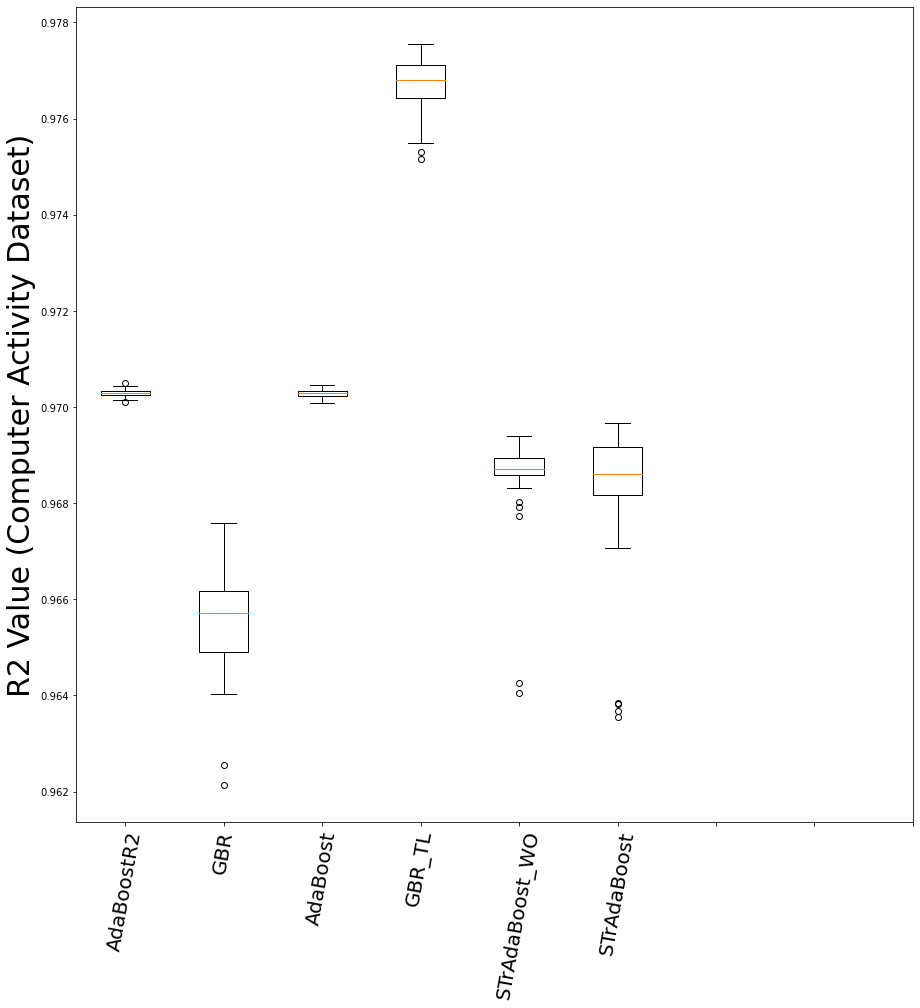

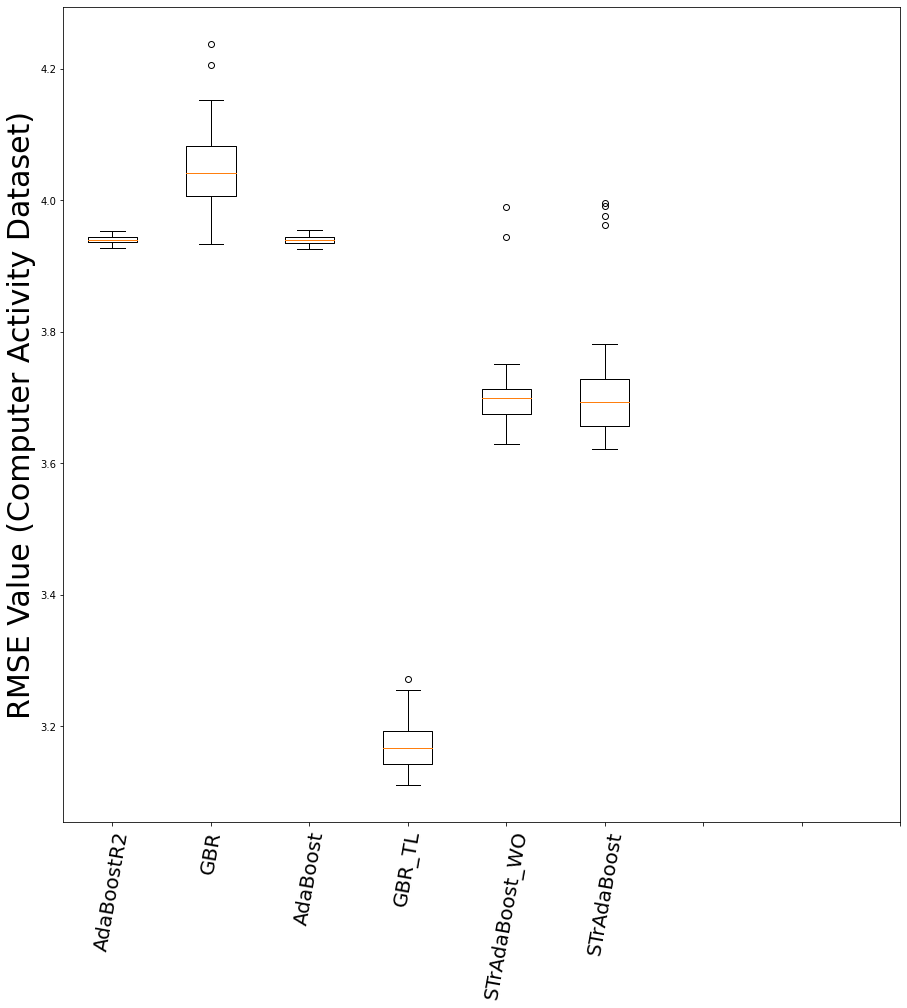

In [54]:
compAct_R2_data_np = np.array([AdaBoostR2_R2_compAct, GBR_R2_compAct, 
                            AdaBoost_TL_R2_compAct, GBR_TL_R2_compAct, STrAdaBoost_WO_R2_compAct, STrAdaBoost_R2_compAct])

compAct_R2_data_np = compAct_R2_data_np.transpose()

print(compAct_R2_data_np.shape)

compAct_RMSE_data_np = np.array([AdaBoostR2_RMSE_compAct, GBR_RMSE_compAct, 
                            AdaBoost_TL_RMSE_compAct, GBR_TL_RMSE_compAct, STrAdaBoost_WO_RMSE_compAct, STrAdaBoost_RMSE_compAct])

compAct_RMSE_data_np = compAct_RMSE_data_np.transpose()



compAct_R2_dataset = pd.DataFrame(compAct_R2_data_np, index = None, columns = ['AdaBoostR2_R2_compAct', 'GBR_R2_compAct', 
                                                                            'TranTrAdaBoost_R2_compAct', 
                                                                            'GBR_TL_R2_compAct', 'STrAdaBoost_WO_R2_compAct', 'STrAdaBoost_R2_compAct'])
compAct_RMSE_dataset = pd.DataFrame(compAct_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_compAct', 'GBR_RMSE_compAct', 
                                                                            'TranTrAdaBoost_RMSE_compAct', 
                                                                            'GBR_TL_RMSE_compAct', 'STrAdaBoost_WO_RMSE_compAct', 'STrAdaBoost_RMSE_compAct'])


plt.figure(figsize=(15,15))
plt.boxplot(compAct_R2_dataset.values)

labels = ['AdaBoostR2', 'GBR', 'AdaBoost', 'GBR_TL', 'STrAdaBoost_WO', 'STrAdaBoost']
x_val = [1,2,3,4,5,6,7,8,9]

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("R2 Value (Computer Activity Dataset)", fontsize = 30)

plt.savefig("Paper_R2_compAct")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(15,15))
plt.boxplot(compAct_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=80, fontsize = 20)
plt.ylabel("RMSE Value (Computer Activity Dataset)", fontsize = 30)

plt.savefig("Paper_RMSE_compAct")

In [31]:
############################## Italian AQI Dataset #################################################################

AdaBoostR2_R2_italian = [
0.8351295795136586,
0.8365418707786034,
0.8351374464773499,
0.8337207818629461,
0.8373266218438412,
0.84058274921385,
0.8384355086349115,
0.831995885989319,
0.8395032203769454,
0.8402613383086137,
]
GBR_TL_R2_italian = [0.8546475807470808, 
                  0.8564545321441435, 
                  0.861665218090882, 
                  0.8585715731331532, 
                  0.8586169771866579, 
                  0.8594151292840027, 
                  0.8589606436645931, 
                  0.8586756229740192, 
                  0.8574898869239121, 
                  0.8562837913237045]
TrAdaBoost_R2_italian = [0.8596886142162807,
0.8598224129660701,
0.8561796554623239,
0.8595846486706968,
0.8597233714083036,
0.859577123950298,
0.8596035291781745,
0.8596474084270436,
0.859588696092208,
0.8597246833815718,
]

STrAdaBoost_R2_italian = [0.8496556424238082,
0.8496212416016606,
0.8496390302470577,
0.849018854918405,
0.8488613710503471,
0.8491357931194966,
0.8501506647747373,
0.8493297932573036,
0.8491848838055386,
0.8494929360874791,
]

AdaBoostR2_RMSE_italian = [183.5902863147077,
182.6919378065448,
183.2971506446896,
184.02558111397323,
181.74608159654906,
180.32427841651773,
182.18338806485036,
185.2858246977906,
180.40977831902464,
180.09778870754144,
]
GBR_TL_RMSE_italian = [172.43722076085052, 
                       171.0841442188501, 
                       167.13597759478478, 
                       168.9832296999789, 
                       169.64656882081957, 
                       168.76243894893932, 
                       169.03423237950398, 
                       170.05147081688312, 
                       170.62779332810234, 
                       170.61738029554294]
TrAdaBoost_RMSE_italian = [176.35453068289112,
176.35397567763468,
180.7778587984861,
176.39619786568127,
176.3356902145847,
176.39262059344946,
176.37205534945,
176.38765686785877,
176.35207720294875,
176.37642849473087,
]
STrAdaBoost_RMSE_italian = [
173.64151805705194,
173.6334619111963,
173.65662665726717,
174.1308577850406,
174.0310122302578,
174.07118389774956,
173.3810950553901,
173.7619765646141,
173.89517540044486,
173.71213163191527,
]


(10, 4)
----------------------------------------------------------------------------------------------------------------


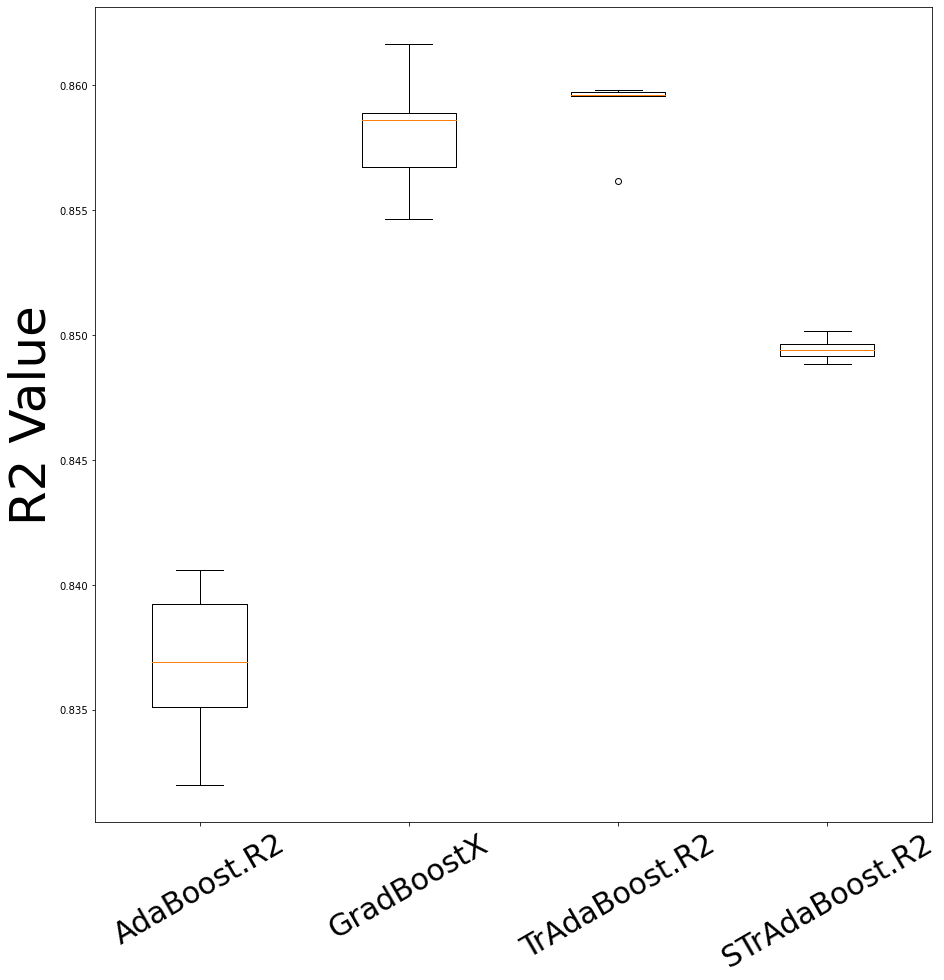

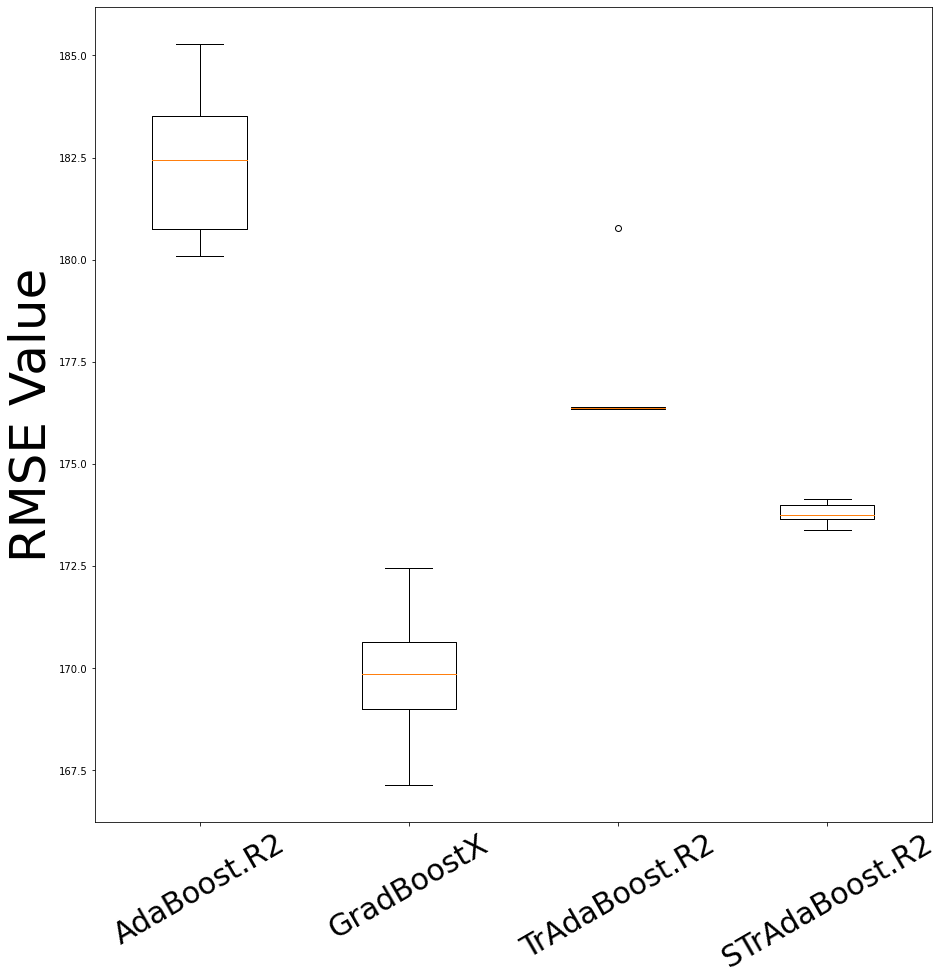

In [32]:
italian_R2_data_np = np.array([AdaBoostR2_R2_italian, GBR_TL_R2_italian, TrAdaBoost_R2_italian, STrAdaBoost_R2_italian])
italian_R2_data_np = italian_R2_data_np.transpose()

print(italian_R2_data_np.shape)

italian_RMSE_data_np = np.array([AdaBoostR2_RMSE_italian, GBR_TL_RMSE_italian, TrAdaBoost_RMSE_italian, STrAdaBoost_RMSE_italian])
italian_RMSE_data_np = italian_RMSE_data_np.transpose()



italian_R2_dataset = pd.DataFrame(italian_R2_data_np, index = None, columns = ['AdaBoostR2_R2_italian',  
                                                                            'GBR_TL_R2_italian', 'TrAdaBoost_R2_italian', 'STrAdaBoost_R2_italian'])
italian_RMSE_dataset = pd.DataFrame(italian_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_italian', 
                                                                            'GBR_TL_RMSE_italian', 'TrAdaBoost_RMSE_italian', 'STrAdaBoost_RMSE_italian'])


plt.figure(figsize = (15,15))
plt.boxplot(italian_R2_dataset.values)

labels = ['AdaBoost.R2', 'GradBoostX', 'TrAdaBoost.R2', 'STrAdaBoost.R2']
x_val = [1,2,3,4]

plt.xticks(x_val, labels, rotation=30, fontsize = 30)
plt.ylabel("R2 Value", fontsize = 50)

plt.savefig("Paper_R2_italian")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize = (15,15))
plt.boxplot(italian_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation=30, fontsize = 30)
plt.ylabel("RMSE Value", fontsize = 50)

plt.savefig("Paper_RMSE_italian")

In [33]:
############################## Beijing AQI Dataset #################################################################

AdaBoostR2_R2_beijing = [
0.6850750051913875,
0.6842065864376252,
0.6790249312583293,
0.6785077299503172,
0.6817944793648458,
0.6826820495079257,
0.6847141152233336,
0.6752643455245851,
0.6841200970924285,
0.6736955749942777
]
GBR_TL_R2_beijing = [0.7200252114892826, 
                     0.720848762462318, 
                     0.7237281909816046, 
                     0.7239303330176193, 
                     0.7241140472249447, 
                     0.7243652028548561, 
                     0.7261891801001833, 
                     0.7234765800989651, 
                     0.7245794270989913, 
                     0.7241673717727796]
TrAdaBoost_R2_beijing = [
0.7021565287023814,
0.7021520532431694,
0.7021669672519154,
0.7021513588824231,
0.7021716659275667,
0.7021647989883459,
0.7021608352939326,
0.7021589734165957,
0.7021613783332443,
0.7021587690810783
]
STrAdaBoost_R2_beijing = [
0.7226246314863084,
0.7227693795541841,
0.7220923967834345,
0.7134070655055749,
0.7177210598585712,
0.7238007280068172,
0.7223437715969189,
0.7217600691843233,
0.723227364594251,
0.7185674116612152
]

AdaBoostR2_RMSE_beijing = [32.6981135277245,
32.73791615469271,
32.99266348767973,
33.03118366747117,
32.86294436598774,
32.794193622188835,
32.688494311486124,
33.20180622738959,
32.72732238986638,
33.282930559146386,
]
TrAdaBoost_RMSE_beijing = [31.96772304334067,
31.96785795285726,
31.967154793734903,
31.967884422499615,
31.967132624171875,
31.967327180055094,
31.96746970660532,
31.967526686073352,
31.967578383653414,
31.967765049197688,
]
GBR_TL_RMSE_beijing = [30.810700956310754, 
                       30.7873418500275, 
                           30.616971280249956, 
                           30.61476165851817, 
                           30.585603389027693, 
                           30.584611670323117, 
                           30.491811949769637, 
                           30.626618109076993, 
                           30.566268584561577, 
                           30.585743702390925]
STrAdaBoost_RMSE_beijing = [
30.6792777614373,
30.67006775897982,
30.70709703056987,
31.170654573812826,
30.945773538961866,
30.623816147603023,
30.693866740210108,
30.72659514843913,
30.646359950873943,
30.896580691732005,
]


(10, 4)
----------------------------------------------------------------------------------------------------------------


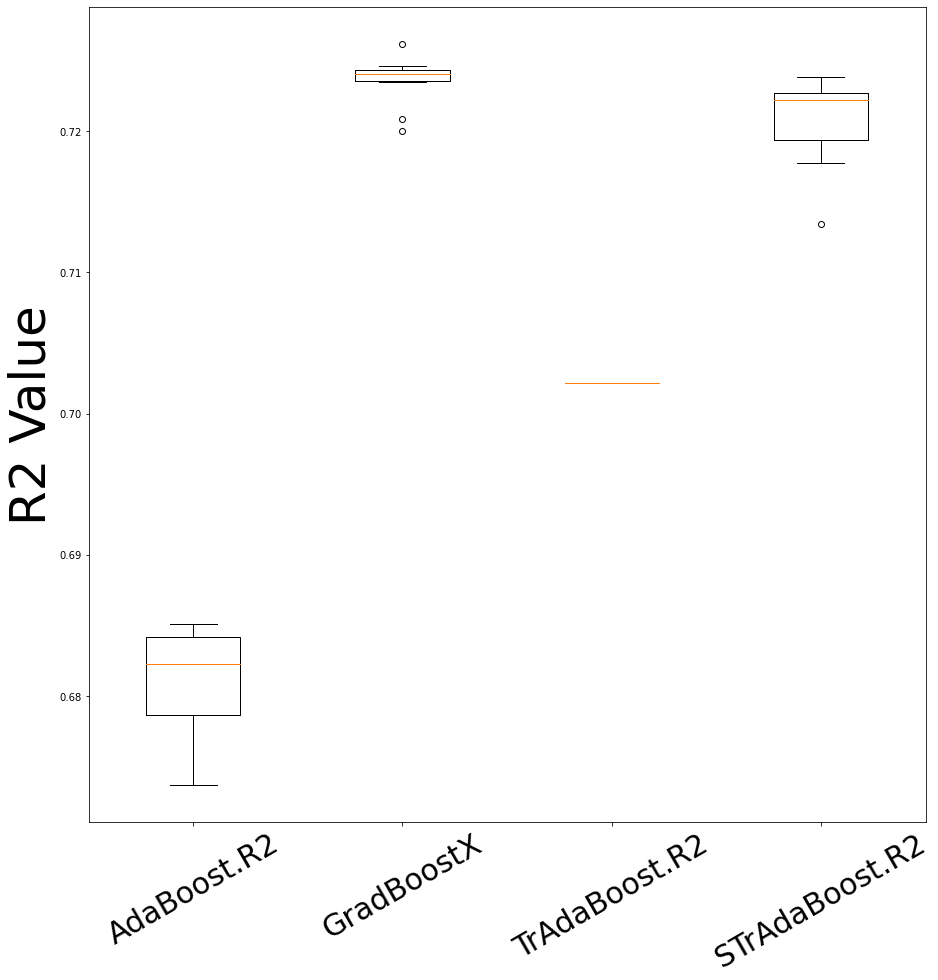

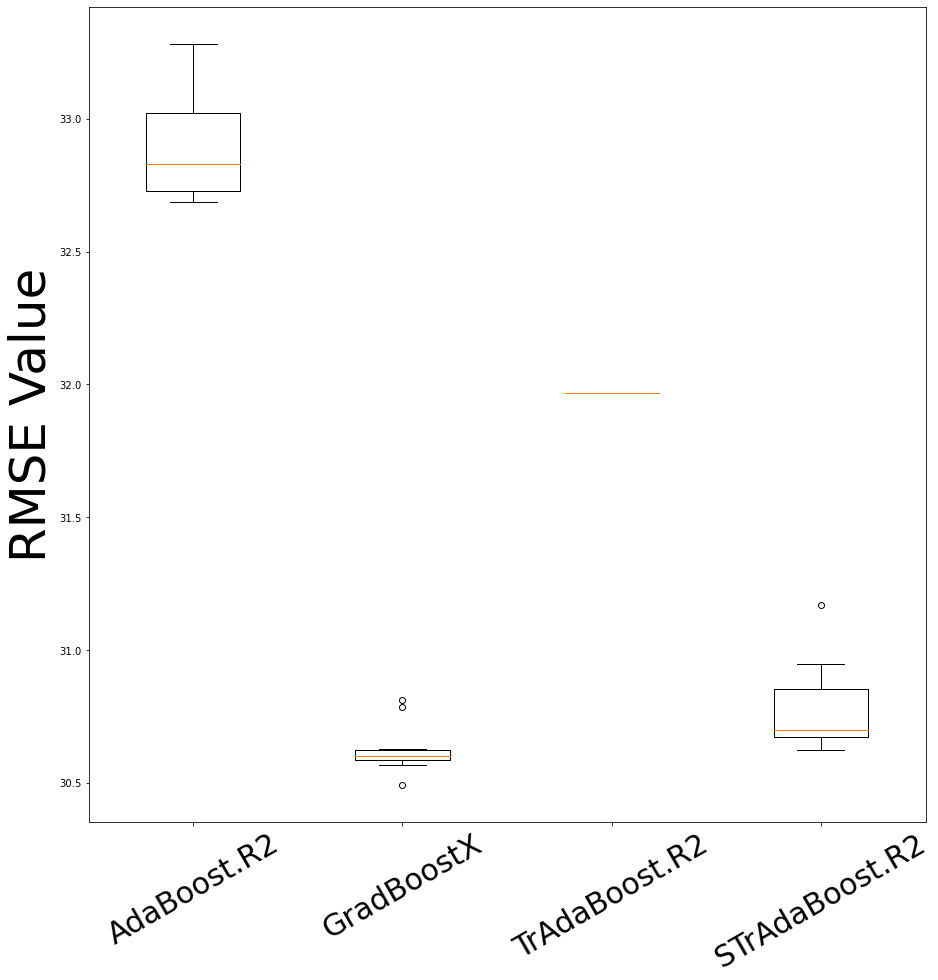

In [34]:
beijing_R2_data_np = np.array([AdaBoostR2_R2_beijing, GBR_TL_R2_beijing, TrAdaBoost_R2_beijing, STrAdaBoost_R2_beijing])
beijing_R2_data_np = beijing_R2_data_np.transpose()

print(beijing_R2_data_np.shape)

beijing_RMSE_data_np = np.array([AdaBoostR2_RMSE_beijing, GBR_TL_RMSE_beijing, TrAdaBoost_RMSE_beijing, STrAdaBoost_RMSE_beijing])

beijing_RMSE_data_np = beijing_RMSE_data_np.transpose()



beijing_R2_dataset = pd.DataFrame(beijing_R2_data_np, index = None, columns = ['AdaBoostR2_R2_beijing',  
                                                                            'GBR_TL_R2_beijing', 'TrAdaBoost_R2_beijing', 'STrAdaBoost_R2_beijing'])
beijing_RMSE_dataset = pd.DataFrame(beijing_RMSE_data_np, index = None, columns = ['AdaBoostR2_RMSE_beijing', 
                                                                            'GBR_TL_RMSE_beijing', 'TrAdaBoost_RMSE_beijing', 'STrAdaBoost_RMSE_beijing'])


plt.figure(figsize = (15,15))
plt.boxplot(beijing_R2_dataset.values)

labels = ['AdaBoost.R2', 'GradBoostX', 'TrAdaBoost.R2', 'STrAdaBoost.R2']
x_val = [1,2,3,4]

plt.xticks(x_val, labels, rotation = 30, fontsize = 30)
plt.ylabel("R2 Value", fontsize = 50)

plt.savefig("Paper_R2_beijing")

print("----------------------------------------------------------------------------------------------------------------")

plt.figure(figsize = (15,15))
plt.boxplot(beijing_RMSE_dataset.values)

plt.xticks(x_val, labels, rotation = 30, fontsize = 30)
plt.ylabel("RMSE Value", fontsize = 50)

plt.savefig("Paper_RMSE_beijing")

In [3]:
############################## US AQ Dataset #################################################################

ADA_TL_RMSE_S1 = [5.255130515486572, 5.27081335008089, 5.274764403720441, 5.319898762716226, 5.205408230199599, 5.259719983897834, 5.326503801442614, 5.386794839064668, 5.253393059081979, 5.360406165673547, 5.330557429488022, 5.266629256437549, 5.163925221790993, 5.339822148731938, 5.272244247187067, 5.201120385414515, 5.315961789657094, 5.293076030004561, 5.281100344717172, 5.354497033925497, 5.252661578566778, 5.231931454172448, 5.3066631018238555, 5.348414965950147, 5.277014266349626, 5.271994095321574, 5.272305388819804, 5.298905401150821, 5.337158629399414, 5.269564247646058, 5.304870023518099, 5.33271671201986, 5.262602783141486, 5.2617412781343225, 5.295191700602214, 5.2677985646119945, 5.231499150051405, 5.228412658041968, 5.278809658373867, 5.257555878664432, 5.284324581994705, 5.32881508125111, 5.209284640596778, 5.202751586354678, 5.278232652795466, 5.298060727250962, 5.195842028575393, 5.260768286246511, 5.259846444225398, 5.249339603346777
]

GBR_TL_RMSE_S1 = [5.066512106495568, 5.0345804033625425, 5.079373727954629, 5.132846875216556, 5.01375392539353, 5.111933120534275, 5.08836674640514, 5.110281200363453, 5.039348291434223, 5.060844050233174, 5.0563334998185026, 5.062057951364025, 5.057564919934479, 5.10258910560561, 5.071758959049264, 5.062796388101912, 5.090404227742901, 5.043242812083642, 5.126536953354272, 5.046361792181065, 5.081487120868978, 5.08616599871167, 5.079897245281779, 5.04329006033114, 5.077360696333379, 5.090827301733249, 5.118257644256874, 5.07274944326396, 5.130255855059595, 5.083328378815301, 5.0548932783893035, 5.086804591692052, 5.115811026423547, 5.074635936866147, 5.158543486504897, 5.050238477493846, 5.074633766493377, 5.121445335632352, 5.072218039016304, 5.068338276826444, 5.11994594668121, 5.125096115251933, 5.093129230337513, 5.09032052291526, 5.086428647113973, 5.093235522390057, 5.126222740380023, 5.103201975834993, 5.103580077300328, 5.075360298494461
]
# GBR_TL_RMSE_S1 = [i/sum(GBR_TL_RMSE_S1) for i in GBR_TL_RMSE_S1]

STrAdaBoostWAS_RMSE_S1 = [5.07419171267176, 4.976398386835468, 5.02517101678282, 5.118945188974976, 4.98697797606326, 4.991688825406139, 4.954712370533901, 5.088765188745478, 4.942446844262421, 5.03795658199642, 4.963147269801531, 4.885759170985676, 5.043822378548758, 4.981280502350507, 4.9770528134557335, 5.078756295149295, 5.049487588276212, 4.962120754591724, 4.96730801145742, 4.992288967155437, 5.15903290606607, 5.169500273850381, 5.162185665146297, 5.236521522286878, 5.045309517727568, 5.022617177037679, 5.137321231527224, 5.104067029938476, 5.152190241338921, 4.99866486177567, 5.138997405633596, 5.124519800186912, 4.979108406155391, 5.002910964033676, 5.0511112267978575, 5.119991437360143, 4.983332125820582, 5.036285489125036, 4.989251715082011, 4.906743919908833, 4.991542305997062, 5.229676688195812, 4.935898231939906, 5.005699437995544, 4.944811481834064, 5.033003283164795, 5.0504573253779, 5.050554433446106, 5.1745491911772294, 5.070185018167174
]
# STrAdaBoostWAS_RMSE_S1 = [i/sum(STrAdaBoostWAS_RMSE_S1) for i in STrAdaBoostWAS_RMSE_S1]


STrAdaBoost_RMSE_S1 = [4.979290823374449, 4.878016387770531, 4.893168090645516, 4.758692966840469, 4.83348350566314, 4.723901734464283, 4.766695998052562, 4.641642370640131, 4.883321506385952, 4.8790984323618245, 4.705304772735343, 4.80460235265924, 4.743687081763968, 4.7404733618652, 4.738605360480141, 4.7155356568030555, 4.699466048129546, 4.830133283990439, 4.655047960915397, 4.849067529658093, 4.732121431978466, 4.678678138877163, 4.796287723460893, 4.883848657995857, 4.776396786015972, 4.84827010610464, 4.832955367764197, 4.632985865252009, 4.859060597755188, 4.720560272442762, 4.6919355995775796, 4.651739521804462, 4.769228695280575, 4.866225110834627, 4.831570703430808, 4.864016750367474, 4.9029563003468395, 4.825216493378353, 4.695899671169083, 4.807061611349545, 4.780488577253708, 4.694321527672398, 4.728832685204509, 4.639987683748525, 4.712051375757153, 4.63444443572286, 4.768627736022686, 4.7676547625364485, 5.077968032941966, 4.788459639716201
]
# STrAdaBoost_RMSE_S1 = [i/sum(STrAdaBoost_RMSE_S1) for i in STrAdaBoost_RMSE_S1]



#################################################################################################################################################################

ADA_TL_RMSE_S2 = [5.361255631960723, 5.311640161204156, 5.40222542748577, 5.398674235005902, 5.367656186395759, 5.372110426152947, 5.388365332961815, 5.452909100275214, 5.402312910344731, 5.393918440769049, 5.332611425365376, 5.466221485230178, 5.404668989204406, 5.415366138960691, 5.422317011801667, 5.380419719256398, 5.432811990672414, 5.3997891242362765, 5.3583199917750655, 5.372049722395138, 5.324097100484461, 5.3801838031416525, 5.354230653495987, 5.437931935795999, 5.394404886207433, 5.403572807307147, 5.410810531691162, 5.438279632278567, 5.328740791545402, 5.414595436916841, 5.327227541644084, 5.406335020086532, 5.4019612181024925, 5.34050508704548, 5.370772670948522, 5.293338903531796, 5.4796454096476666, 5.367237085820045, 5.334044740109478, 5.393946048940303, 5.36438656671858, 5.385887434903033, 5.367013491124605, 5.428252043175888, 5.34203561653749, 5.308535944261798, 5.331434928582841, 5.267669039880245, 5.375948489174151, 5.427820605812562
]

GBR_TL_RMSE_S2 = [5.178092426908889, 5.147416138988401, 5.159315273005726, 5.164601116054986, 5.149995547133297, 5.198132170908535, 5.142693456316484, 5.146573242358031, 5.195785486425917, 5.2114296701915555, 5.189701663730883, 5.168157850774725, 5.1417398445290425, 5.141937832852427, 5.19047699043049, 5.129429244148173, 5.17583969713962, 5.127031105644629, 5.186759998809084, 5.2023571303940965, 5.1308744326308835, 5.126659796498396, 5.21950518251039, 5.183422427679736, 5.189188672549179, 5.151453816278704, 5.221468618612775, 5.204500082802818, 5.19125753892385, 5.169966034135578, 5.17640879075963, 5.195172843961114, 5.123455545708681, 5.171027028276019, 5.1637023803144055, 5.175119114395219, 5.155274412751763, 5.2049569177987545, 5.1881795493932374, 5.196013674040133, 5.19264789909015, 5.134287411578472, 5.192164070820379, 5.2058933341830045, 5.185989802470447, 5.204408139628552, 5.172401312942067, 5.190744731440374, 5.1816850248045085, 5.1092217160145905
]
# GBR_TL_RMSE_S2 = [i/sum(GBR_TL_RMSE_S2) for i in GBR_TL_RMSE_S2]


STrAdaBoostWAS_RMSE_S2 = [5.264070959090578, 5.224151316575072, 5.190692999669956, 5.041586072801993, 5.227457945320077, 5.079901973992026, 5.1961552023304485, 5.282641139449701, 5.184548440421525, 5.202928883951391, 5.11304755589299, 4.992634333822514, 5.234940598691323, 5.175511465762145, 5.158079340446171, 5.144116288437036, 5.064634682823017, 5.175912128331633, 5.151609053965319, 5.115860860959141, 5.149178290452146, 5.199725518143682, 5.128313179883401, 5.1760279819058, 5.163981628877479, 5.095869449110499, 5.240206244555245, 5.144987595610056, 5.069805233946502, 5.220111139835718, 5.205710745128474, 5.212310565947744, 5.211271441526235, 5.19896355546934, 5.249675687130819, 5.19464463119571, 5.235782537995189, 4.9439846599930855, 5.100964229360084, 5.128416985250918, 5.148585235346254, 5.079481093773826, 5.174403299927294, 5.007009560536487, 5.175334393280222, 5.0380367312167085, 4.88009429247499, 5.010584891928209, 5.02959023417922, 5.15306100651601
]
# STrAdaBoostWAS_RMSE_S2 = [i/sum(STrAdaBoostWAS_RMSE_S2) for i in STrAdaBoostWAS_RMSE_S2]


STrAdaBoost_RMSE_S2 = [4.8834063974893, 4.920396109624849, 4.980451694658611, 4.948954793489065, 5.026366863584135, 4.943875196770977, 4.945956189030123, 4.9024632703439375, 4.9911271178913, 4.909808742921162, 4.929867918661589, 4.902007208959717, 4.931708659473568, 4.842449758876583, 4.847730260215551, 4.875229271830001, 4.951739956999959, 4.97066029903207, 4.979065922487824, 4.926983464533925, 4.8863965351468455, 4.89469712568736, 4.998295515128411, 5.026916587091387, 4.845212209669417, 5.0707599086819375, 4.86454793540691, 5.062892636651006, 4.9017385113442105, 4.934650133630419, 4.862173398128432, 4.977076764908447, 4.933910650504097, 5.024035223052149, 5.016620154615908, 4.912846033859032, 4.8053689710821645, 4.892254741445398, 4.903366705706927, 4.953216630667796, 4.8994688987555, 4.938654873058909, 4.933993852521478, 4.987608510522334, 4.911673390998983, 4.932815306193479, 4.9207827262576025, 4.931099205686127, 4.959889370607496, 4.973292921766746
]
# STrAdaBoost_RMSE_S2 = [i/sum(STrAdaBoost_RMSE_S2) for i in STrAdaBoost_RMSE_S2]



#################################################################################################################################################################

ADA_TL_RMSE_S3 = [5.8926548044100615, 5.939993743677336, 5.960729351998775, 5.980661651522485, 5.96662336553679, 5.926147907492133, 5.965306678245991, 5.983616864853993, 5.940233591864953, 5.961510491860195, 5.973176775852706, 5.950124667608459, 5.97131138682503, 5.961201095472502, 5.918692013518225, 5.957979196110531, 5.984717259740149, 5.895649374904918, 5.98491244408515, 5.995273880342896, 5.908050267879324, 5.949523981798831, 5.951203268093014, 5.980795924662451, 5.943500597900693, 5.950349882848754, 5.992628524327025, 5.971614512744826, 5.978833173889425, 5.943779320719898, 5.9978044940408, 5.9344389731979215, 5.943615603825013, 5.953985185665177, 5.962518799399506, 5.958995632982982, 5.9771739268757464, 5.9482091963933925, 5.94981945097419, 5.918640907372718, 5.916554604497952, 5.94616174000163, 5.963987925094528, 5.900880091748536, 5.9363002112912655, 5.953943096783862, 5.98441432486146, 5.942449822893157, 5.944081033019847, 5.9820219054797885
]

GBR_TL_RMSE_S3 = [5.649590220062489, 5.65597915873628, 5.665974664072368, 5.6807219430713305, 5.702432034824369, 5.661030522866277, 5.631606977383347, 5.650722777342437, 5.694614934307734, 5.663861656092361, 5.651751034620192, 5.66187374476591, 5.668708848186051, 5.655354952058416, 5.648737974201429, 5.662877816270076, 5.653005601552005, 5.644048114101842, 5.65743634648012, 5.639926321067361, 5.665799414320694, 5.668210359100693, 5.668950109877173, 5.65857409227947, 5.6293932972829115, 5.613107073662831, 5.66760878161829, 5.644307946829182, 5.6794115501256135, 5.656747239272965, 5.653762958456684, 5.692708641856832, 5.6707390516928715, 5.662104448309801, 5.657652309785457, 5.673283313857706, 5.645066557666468, 5.67699736499766, 5.6725103951817575, 5.663216757178807, 5.620524826923512, 5.689671430082278, 5.672934752358281, 5.669888770523792, 5.6665018058693315, 5.657074074876025, 5.642162263383101, 5.668742804373516, 5.679399441410195, 5.687001074329606
]
# GBR_TL_RMSE_S3 = [i/sum(GBR_TL_RMSE_S3) for i in GBR_TL_RMSE_S3]


STrAdaBoostWAS_RMSE_S3 = [5.669115522425552, 5.733790252116891, 5.6951247545597665, 5.740975970991064, 5.717370359583863, 5.74051515618962, 5.761704074250165, 5.662797547286541, 5.7709934164282775, 5.740344388196633, 5.739504079222528, 5.808814608619991, 5.836419211353291, 5.807061843166673, 5.634680884502946, 5.682094596204401, 5.798740892683698, 5.72895898450888, 5.753119407608093, 5.761016400516592, 5.755921987480122, 5.753009826555113, 5.75255777226272, 5.774784273955858, 5.74455123783739, 5.716773650794661, 5.689217227301003, 5.727808025577749, 5.744969571344065, 5.754904661504543, 5.808439740249793, 5.778772982518653, 5.64685254687044, 5.718123423325922, 5.752498886850176, 5.774575557793324, 5.672880411710002, 5.743101855899087, 5.78431597848103, 5.776540707879827, 5.743860452818469, 5.725009242073719, 5.699518712260778, 5.697580916552552, 5.6275918045802715, 5.688638572301881, 5.7163762904647335, 5.6821240782242795, 5.764440675830158, 5.79409393902543
]
# STrAdaBoostWAS_RMSE_S3 = [i/sum(STrAdaBoostWAS_RMSE_S3) for i in STrAdaBoostWAS_RMSE_S3]


STrAdaBoost_RMSE_S3 = [5.897685339697395, 5.830371896084976, 5.809951067693468, 5.951712681071852, 5.865721942062605, 5.8663826944632, 5.807372444743029, 5.8335197062819, 5.799975443826838, 5.828812540839606, 5.835043423309889, 5.856211739559852, 5.811402190279615, 5.923793404056822, 5.819095085844331, 5.846084644496809, 5.82611346410518, 5.83010554362198, 5.731681390548749, 5.75899544744891, 5.893224927380904, 5.75115161350349, 5.840183654710483, 5.761662291885175, 5.773029809148971, 5.867160478932168, 5.831647677743732, 5.819496429434827, 5.8145966136751035, 5.848161417459586, 5.818198504600787, 5.877266240438204, 5.903973269398755, 5.781636981072441, 5.853098609407124, 5.8670144589422595, 5.8748900619654645, 5.800611740835569, 5.785673311535104, 5.775009746257271, 5.911435118147896, 5.8576613056115425, 5.8634367420300455, 5.8336761151294265, 5.769647693489058, 5.6934338956468205, 5.960186496093781, 5.770102182955184, 5.80614352516372, 5.782851629724555
]
# STrAdaBoost_RMSE_S3 = [i/sum(STrAdaBoost_RMSE_S3) for i in STrAdaBoost_RMSE_S3]



#################################################################################################################################################################

ADA_TL_RMSE_S4 = [6.16510774908722, 6.176418362306668, 6.1753824497326955, 6.1782533909333655, 6.1746626331486425, 6.192906911247578, 6.144455124263472, 6.164892209136308, 6.134308732851891, 6.100515258809645, 6.14126114765073, 6.189101950287986, 6.157576005716764, 6.152761741485517, 6.150820013833381, 6.1993000827021625, 6.161649575543603, 6.134870795486214, 6.120236493996602, 6.1594921880438065, 6.159716569909706, 6.14485424965357, 6.128186055381948, 6.154883454149689, 6.198420224379984, 6.168770025379784, 6.121560244888316, 6.194132495509376, 6.167275452627389, 6.158792756588061, 6.178053236978618, 6.161817766477068, 6.1510828677735985, 6.162748844528663, 6.159457362752643, 6.1716520746648005, 6.147004912749337, 6.139483396643368, 6.135587706723766, 6.1878980991894394, 6.168585954078155, 6.165967128328132, 6.181424975303263, 6.190417600119866, 6.157353652074807, 6.151398662176995, 6.157624332950123, 6.185207942257981, 6.19155702542196, 6.162385252234686
]

GBR_TL_RMSE_S4 = [6.131434070478761, 6.141672330998255, 6.146351255149342, 6.136564515664506, 6.121575727579377, 6.119420073954761, 6.130956355625465, 6.137195729410996, 6.133534464334445, 6.152139117542077, 6.128425712152715, 6.148900062076685, 6.141206107381266, 6.125066419610729, 6.148671561522242, 6.1190403193198035, 6.159752806537081, 6.142081492562663, 6.148745729313871, 6.141255963027449, 6.145480275646198, 6.125341207363878, 6.129204258044346, 6.143030012520676, 6.1449376630295856, 6.150972186371731, 6.143262696746711, 6.130533779308934, 6.123028036852953, 6.16092235885058, 6.119419618142712, 6.118897754592428, 6.154375782470541, 6.146801924066291, 6.134241662693612, 6.125343325943115, 6.137862528031517, 6.143341758796095, 6.132502876524976, 6.153877324481073, 6.124079431093518, 6.137738102883269, 6.106953288590252, 6.1438629817715436, 6.121178992065343, 6.146711782764079, 6.130308096546195, 6.140232440798868, 6.15354466481646, 6.136198437102921
]
# GBR_TL_RMSE_S4 = [i/sum(GBR_TL_RMSE_S4) for i in GBR_TL_RMSE_S4]


STrAdaBoostWAS_RMSE_S4 = [5.765572502540657, 5.797185880882284, 5.702886861302069, 5.829884700669532, 5.751621364585983, 5.777593469952875, 5.853206118998096, 5.756861976933654, 5.845473835974255, 5.813358479668405, 5.851962752682569, 5.8025644292528895, 5.74565694471963, 5.830838752340749, 5.867815890882932, 5.855589194079193, 5.821614337427568, 5.757998121405264, 5.803224797495778, 5.742795833946844, 5.8045496412452255, 5.741414218225094, 5.873865533728087, 5.788471530573007, 5.845932511262965, 5.846259709813666, 5.807633672415589, 5.8336041090064965, 5.802810433018001, 5.847371337760814, 5.815859843899053, 5.824804106207314, 5.799708529790692, 5.753780654103765, 5.724580691288702, 5.737569706486034, 5.8131462816238235, 5.841691530128796, 5.738918445767202, 5.766354494953923, 5.755118040114387, 5.831904451045634, 5.78625348399791, 5.80667436251472, 5.7831749644312636, 5.748825318178953, 5.762690641886686, 5.825174231851926, 5.778982245270422, 5.823125804221765
]
# STrAdaBoostWAS_RMSE_S4 = [i/sum(STrAdaBoostWAS_RMSE_S4) for i in STrAdaBoostWAS_RMSE_S4]


STrAdaBoost_RMSE_S4 = [5.753994622403246, 5.73331494960375, 5.779993730662228, 5.703110479198713, 5.794006637893587, 5.7608035099379835, 5.8496971913977145, 5.763201747919061, 5.857715986183525, 5.752321613438526, 5.842657927875581, 5.749344108915668, 5.793142518569765, 5.85440005172555, 5.764474269216633, 5.729505012934585, 5.907924701252265, 5.761639292573744, 5.750438528534113, 5.739776482409367, 5.831665604390195, 5.8523498785174235, 5.8164759084544215, 5.704042858573431, 5.703681745564761, 5.7388195108914015, 5.7150647019757175, 5.831296730415287, 5.787855657325067, 5.752405432020511, 5.718436309578798, 5.85005847631424, 5.802428322997498, 5.77688725187984, 5.76815995740451, 5.762753201908877, 5.8208601897701415, 5.8578864372670125, 5.760483466249927, 5.845472695099786, 5.772789336421951, 5.845223029404144, 5.726785207452754, 5.778942824972787, 5.814417636280511, 5.733493431310054, 5.751143841713923, 5.73052039821278, 5.758792082724161, 5.793339422324032
]
# STrAdaBoost_RMSE_S4 = [i/sum(STrAdaBoost_RMSE_S4) for i in STrAdaBoost_RMSE_S4]



#################################################################################################################################################################

ADA_TL_RMSE_S5 = [5.605314287559769, 5.587694894669972, 5.534468245386653, 5.604897625594101, 5.581492352245565, 5.570365938383706, 5.552196953781187, 5.590185387861591, 5.581918951021576, 5.577989389268363, 5.551798412563512, 5.616355577205282, 5.616823085087848, 5.5819238174579455, 5.555774568567256, 5.565875199783688, 5.549928016471969, 5.614340265707717, 5.570614082755292, 5.577363311194938, 5.588803545810569, 5.543068014933974, 5.596815736928278, 5.569728337968411, 5.6028498565438944, 5.585069515952345, 5.5390747657786, 5.517096768635277, 5.555635665799954, 5.54769214599656, 5.584388400370472, 5.5692799242854365, 5.5548374704418295, 5.586240892932802, 5.628131596944779, 5.6017515615786735, 5.596511550433385, 5.578222854826017, 5.581009196300135, 5.566938549903859, 5.588178435428958, 5.5702143079402076, 5.5944215093448975, 5.592695669387382, 5.569472289327825, 5.590068340048033, 5.537808976445928, 5.563094855423689, 5.610543745341566, 5.609461449213367
]

GBR_TL_RMSE_S5 = [5.449115429202336, 5.459787063774097, 5.44981521598784, 5.43667298931742, 5.460215769239051, 5.456370222747017, 5.455756941343926, 5.444782090717429, 5.46195228523415, 5.444693245153784, 5.4369633001331525, 5.479070959868295, 5.4500968525634725, 5.434263166953188, 5.4337361553382415, 5.437653403712856, 5.443339479400037, 5.471254923084268, 5.458009010844589, 5.453134465931157, 5.4642376464322115, 5.490030833098132, 5.435754809593689, 5.4332719695708755, 5.412265241174967, 5.435944827155545, 5.430185109222453, 5.484930026106336, 5.459384967182709, 5.46825680245864, 5.438511476709101, 5.4476836463086675, 5.4735575545857404, 5.454611709157642, 5.4279347565536185, 5.4895927969099905, 5.44124015654478, 5.4593659538491535, 5.4649421502876665, 5.470652730145188, 5.428360677955544, 5.443812154230852, 5.4262377614243515, 5.447458908350493, 5.465047107666034, 5.4179716000284825, 5.4497604309101915, 5.518853882675928, 5.4357470476241385, 5.450548447302009
]
# GBR_TL_RMSE_S5 = [i/sum(GBR_TL_RMSE_S5) for i in GBR_TL_RMSE_S5]


STrAdaBoostWAS_RMSE_S5 = [5.274583800082503, 5.27571246482935, 5.307996506024014, 5.3365063860675805, 5.344574624067474, 5.331395397240226, 5.372337684297712, 5.317256254725531, 5.339600670891651, 5.325247279567671, 5.3573535202935245, 5.295981527860961, 5.3825652725199005, 5.316720558941367, 5.324884445925931, 5.308216187908867, 5.350432282748357, 5.372916373411498, 5.419509111207227, 5.307568869229597, 5.345488007998484, 5.208931786506091, 5.3508480854455875, 5.36977316450258, 5.397446576209163, 5.2796834593041915, 5.303411260625863, 5.368333294698248, 5.432123039777576, 5.241095428266947, 5.35260750002261, 5.319216187175133, 5.284601718971837, 5.358372885258081, 5.282967349292021, 5.343029492131507, 5.325135657878592, 5.272822485156498, 5.318553343314636, 5.3598385254272785, 5.272268530813562, 5.299175862087545, 5.344723432094046, 5.325216654533507, 5.334757031182492, 5.276334720675752, 5.2863093692137175, 5.34040905839031, 5.349306953441075, 5.377557457486312
]
# STrAdaBoostWAS_RMSE_S5 = [i/sum(STrAdaBoostWAS_RMSE_S5) for i in STrAdaBoostWAS_RMSE_S5]


STrAdaBoost_RMSE_S5 = [5.298544806588768, 5.284134126835651, 5.3302106517266985, 5.3184615330252125, 5.320113049642455, 5.386832223915731, 5.241977255458806, 5.361342858023372, 5.377043016006294, 5.105948128268959, 5.259284818138713, 5.173412500171057, 5.169815146053231, 5.39060886566153, 5.40638141840662, 5.301778918340909, 5.2212275537647, 5.316575393189116, 5.3066511219764285, 5.339633518955896, 5.17608901249199, 5.368653697996058, 5.314945912004232, 5.209784616455402, 5.301390382970163, 5.408381529713917, 5.40746974432795, 5.273737060504879, 5.342920114423149, 5.3682090172274375, 5.430373764216209, 5.303334664200893, 5.256710219248467, 5.264234142375664, 5.418175067894274, 5.27117626489671, 5.288577993523019, 5.254642823850169, 5.354503972403161, 5.2467329800546585, 5.294657839007265, 5.3954411478155, 5.272315523416097, 5.37488861329805, 5.29452078442023, 5.3162319736635455, 5.327595858499575, 5.428297593812066, 5.298248219778841, 5.335913776816872
]
# STrAdaBoost_RMSE_S5 = [i/sum(STrAdaBoost_RMSE_S5) for i in STrAdaBoost_RMSE_S5]



#################################################################################################################################################################

ADA_TL_RMSE_S6 = [6.295342621894254, 6.295036077980728, 6.2586427115812056, 6.2617635075047176, 6.2542865484073324, 6.233849777345392, 6.25519149711179, 6.279476724012654, 6.303759454654312, 6.2795666296695805, 6.267314279400832, 6.268693149298503, 6.2897689136687, 6.245444152055394, 6.250096650731827, 6.253589877291582, 6.316187938033817, 6.240255935268377, 6.257287973836747, 6.296364791674798, 6.305474795161188, 6.283167158862479, 6.276879715863913, 6.230370991902035, 6.230736572200668, 6.284666750181092, 6.237455343546227, 6.277306624894636, 6.2762454271367965, 6.267296738433428, 6.27583086333005, 6.252689410453475, 6.252796433648992, 6.283165204038238, 6.276679897685673, 6.253961490820664, 6.264985710135573, 6.263450702294994, 6.295706624516367, 6.281327027843622, 6.281999033250739, 6.256596020716006, 6.244123650310323, 6.299473474989216, 6.253778416719855, 6.271941622654733, 6.26747244226705, 6.245008143695861, 6.247440921269841, 6.28583253486716
]


GBR_TL_RMSE_S6 = [6.185042645124997, 6.1887283871490695, 6.192597110132212, 6.1912586603961195, 6.191324701559636, 6.182829792915425, 6.196220931326436, 6.199792320432533, 6.187625123541785, 6.208763352675148, 6.1640828018360745, 6.176449783200748, 6.201565120092497, 6.222050729580822, 6.186315403224135, 6.184143565723462, 6.210599369291941, 6.198943699067252, 6.196915645687778, 6.210370153441042, 6.199127189771833, 6.19977503120461, 6.19561909379622, 6.2049720109962765, 6.209181404517628, 6.193867975475562, 6.198639341078796, 6.187963888739636, 6.205039243007475, 6.179039526871357, 6.197092886804272, 6.189172026433419, 6.205786228245745, 6.205686250098931, 6.188132161761282, 6.20814901247634, 6.2184168433724745, 6.205657896926581, 6.186748389364644, 6.169049323754915, 6.164600677570179, 6.205279042407778, 6.182658978589011, 6.2354955894930075, 6.225779016216879, 6.1698671696248555, 6.192403404885029, 6.210371813896649, 6.2102056823362926, 6.199809068928676
]
# GBR_TL_RMSE_S6 = [i/sum(GBR_TL_RMSE_S6) for i in GBR_TL_RMSE_S6]


STrAdaBoostWAS_RMSE_S6 = [6.029043384666491, 5.888957753483085, 6.014402150033228, 6.043383789138366, 6.005710185887128, 6.038764921259084, 5.993953335799237, 6.000845366304508, 6.024962737873325, 5.961191376216856, 6.010067779141137, 5.977730252826724, 6.0900757053679575, 5.917760377117908, 6.019460730944965, 5.949068742212394, 6.079831048728151, 5.911326617834099, 5.995202155906661, 6.027624359344614, 5.984486649878126, 5.865979442842158, 5.938937751615259, 5.927478894728963, 5.976448129081172, 6.020584199410877, 5.872328442315043, 5.986916571573141, 6.02348001969789, 5.935909339788625, 5.9718971460510115, 6.055193745126824, 5.967792814544346, 5.947898175022414, 5.891939429511577, 5.9355115807794885, 6.028069288707556, 5.974263407450169, 6.0671230358170325, 5.9573370523083105, 6.010777037908087, 5.978795104173692, 6.026766580710071, 5.9578148157318624, 5.904060907304042, 6.072581173680177, 6.022726572402746, 5.95392769458737, 5.992968990920006, 6.017876780793882
]
# STrAdaBoostWAS_RMSE_S6 = [i/sum(STrAdaBoostWAS_RMSE_S6) for i in STrAdaBoostWAS_RMSE_S6]


STrAdaBoost_RMSE_S6 = [5.85525427751405, 5.812532806344666, 5.971605330705426, 5.853881700282202, 5.867715148915539, 5.85485663582593, 5.882037224897786, 5.824543607709185, 5.825642886582314, 5.8955633075846015, 5.91674174968926, 5.849473337792092, 5.824787496079736, 5.9180062132363975, 5.782787966338507, 5.913726640460081, 5.8207281708028855, 5.852155053333723, 5.841366488647853, 5.900605355315503, 5.843844772452286, 5.853966748968052, 5.912377986446885, 5.894586400321373, 5.787566078703977, 5.903914581863455, 5.840301784647532, 5.879660320046526, 5.833695458645326, 5.888387085954367, 5.849058802531791, 5.895262766834422, 5.910693835713306, 5.863814279898546, 5.844085111533234, 5.879793594102568, 5.883025400978189, 5.888955695377371, 5.866136825191283, 5.828841026055057, 5.8811078901172404, 5.894074588231045, 5.826222340769586, 5.85147112718761, 5.870621063753699, 5.881967886109884, 5.896347984537212, 5.845200696840679, 5.838891511999101, 5.863461942669521
]
# STrAdaBoost_RMSE_S6 = [i/sum(STrAdaBoost_RMSE_S6) for i in STrAdaBoost_RMSE_S6]



#################################################################################################################################################################

ADA_TL_RMSE_S7 = [5.837112318762794, 5.876074137033494, 5.847918746597725, 5.847422441723697, 5.880174962809496, 5.809786794150403, 5.829128839524363, 5.848126259726578, 5.838972868392132, 5.859141484380453, 5.855635661931517, 5.861178193027064, 5.870227962955063, 5.870902602220832, 5.8117608930741556, 5.838019385769986, 5.845618047328189, 5.851456110441604, 5.83692524279963, 5.850929946811827, 5.85147728486594, 5.8434916793937335, 5.81837143951938, 5.856401797639881, 5.8360036934263135, 5.861707031912653, 5.836062018794754, 5.8609159368198815, 5.851765920151045, 5.860783718050702, 5.849072382689453, 5.864441134927072, 5.844143647235966, 5.885390912810082, 5.8483125991842755, 5.86456883345174, 5.821034162603602, 5.822773817419164, 5.830635772034459, 5.846342319726166, 5.831239758212373, 5.868399826328667, 5.871247496294566, 5.8665930427752615, 5.86021989467792, 5.858977056297353, 5.846916519820299, 5.850804599208543, 5.880317972828261, 5.867326994850484
]

GBR_TL_RMSE_S7 = [5.5411597443739575, 5.561288114807914, 5.527738881448332, 5.552548161509634, 5.5493137977480655, 5.572211775678991, 5.561297351080517, 5.557060029102334, 5.5523594109985375, 5.52699000936518, 5.5038332018683, 5.571279259200452, 5.568875780209655, 5.571803744000682, 5.551821348140438, 5.587477857280663, 5.545590610287125, 5.558498376177656, 5.597089444319093, 5.55993296227395, 5.56425054000915, 5.538300037323368, 5.58881565152048, 5.533448244485991, 5.519722280238179, 5.579828899735532, 5.558334092049247, 5.567376474716695, 5.551825701277512, 5.569004157789179, 5.542372548817128, 5.606160855245383, 5.599395529538694, 5.6045393170418585, 5.54975181872947, 5.590494851985524, 5.589363854773772, 5.581281946071844, 5.566563195252052, 5.562548392616455, 5.592407265186975, 5.564729555742541, 5.5703652241581345, 5.59414638928847, 5.553896115093008, 5.582365620805192, 5.52886393553379, 5.546443825564914, 5.580204499217679, 5.530577869929811
]
# GBR_TL_RMSE_S7 = [i/sum(GBR_TL_RMSE_S7) for i in GBR_TL_RMSE_S7]


STrAdaBoostWAS_RMSE_S7 = [5.5387359477844, 5.611812092432266, 5.6212695591141015, 5.564610437837482, 5.579539170853052, 5.602016128591232, 5.57153365466897, 5.625270315617474, 5.587281766276183, 5.54526944029057, 5.588146092765406, 5.640339216964374, 5.562873681260834, 5.575107323211688, 5.5970231716049135, 5.564615971549022, 5.559497524069925, 5.56177278359773, 5.56152689359794, 5.583187703993076, 5.5932325229194495, 5.550276506288633, 5.550227537446823, 5.606433267645297, 5.533816650646548, 5.505387277745829, 5.582226571566143, 5.559357525756734, 5.564191463911723, 5.54204573764518, 5.597142040117915, 5.544996174062661, 5.6088486623374205, 5.56871446970098, 5.552553255840352, 5.5720914445139815, 5.602625243144338, 5.550735142555742, 5.543628829411363, 5.566281683252542, 5.5814417054062595, 5.629624984653854, 5.547065079100333, 5.571829840000602, 5.625430468431477, 5.588045744886125, 5.555632766634734, 5.537847302544659, 5.534092027974429, 5.56185068173825
]
# STrAdaBoostWAS_RMSE_S7 = [i/sum(STrAdaBoostWAS_RMSE_S7) for i in STrAdaBoostWAS_RMSE_S7]


STrAdaBoost_RMSE_S7 = [5.5943576874269025, 5.583895824966104, 5.5573828436053185, 5.572046762480487, 5.615158368257515, 5.602293224470815, 5.569624652514889, 5.5983550486067175, 5.570970747558073, 5.643898491579986, 5.54139082019589, 5.617721442806682, 5.602797043050924, 5.534969425141197, 5.527449217366131, 5.537825658158776, 5.556494386183609, 5.577727550284508, 5.599231645763769, 5.566220288363976, 5.584870067146043, 5.59708353803243, 5.602213118127106, 5.5721518880949, 5.508378552788454, 5.616176039039632, 5.6244651720050705, 5.671426280776859, 5.596840522189288, 5.581019592225147, 5.566919606863275, 5.613837616667393, 5.522402313510735, 5.539705620222641, 5.531423090143771, 5.558394006062207, 5.592084186434142, 5.535753456766104, 5.468794001162931, 5.596241916930652, 5.573223148733103, 5.631050447713674, 5.548300585959966, 5.596152367869346, 5.645658088290108, 5.553183091639877, 5.607164912231052, 5.5531631717131145, 5.540593359835381, 5.6222922684493195
]
# STrAdaBoost_RMSE_S7 = [i/sum(STrAdaBoost_RMSE_S7) for i in STrAdaBoost_RMSE_S7]



#################################################################################################################################################################

ADA_TL_RMSE_S8 = [5.915470934523219, 5.9774406029562694, 5.938242442357978, 5.9744128902119344, 5.998972309528683, 5.957015997221386, 5.955619433440999, 5.934634887764956, 5.971170932930898, 5.903907236802354, 5.993408819415255, 5.978296293379474, 5.94806509660932, 5.970407792286304, 5.974390882106178, 5.9722189470684715, 5.985658257825008, 5.942791600282235, 5.936047140825209, 5.960049716208587, 5.963294690379423, 5.999099792895458, 5.955013302208711, 5.978975377334817, 5.982309225531206, 5.988009577097671, 5.927544317965807, 5.95998300494948, 5.963780387554914, 5.968131283990133, 6.017614249571134, 5.950810966548241, 5.966223848145428, 5.953663965470483, 5.937580552704587, 5.982859804076712, 5.97463529667815, 5.891279373532725, 5.97144259510569, 5.953132007473732, 5.962229585167749, 5.953612639081182, 5.974680593735467, 5.984921708276932, 5.952327244930058, 5.956644304659869, 6.006135097389273, 5.959390103448975, 6.001881366821995, 5.970780359092114
]

GBR_TL_RMSE_S8 = [5.959977000160004, 5.976064726827172, 5.972857930283076, 5.983877578323489, 5.945614331433815, 5.977050864993702, 5.969453356496546, 5.979939501512717, 5.992429303754894, 5.956045412603416, 5.973437827778538, 6.000638022674779, 5.960688651838161, 5.977587562057205, 5.978817395733941, 5.973328623049213, 5.9964353190301996, 5.971787061973894, 5.975543969157161, 5.991781554274312, 5.972373032318722, 5.993653811329599, 5.9870718789276784, 5.96938458675943, 5.968659351097824, 5.959004154515219, 5.953340186515237, 5.977008140648102, 5.982321683487158, 5.972647244961184, 5.96018730447049, 5.977479244236453, 5.952229384216455, 6.0087691505680505, 5.9961178980263306, 5.946105431383984, 5.958660984883199, 5.9941553968185275, 5.97185418588875, 5.96673321091831, 5.972982972513462, 5.969381546954377, 5.96826645277302, 5.973628927019601, 5.9830465826166135, 5.991810821131999, 5.9709808277085346, 5.995548930869828, 5.9672356890875955, 6.004497032498972
]
# GBR_TL_RMSE_S8 = [i/sum(GBR_TL_RMSE_S8) for i in GBR_TL_RMSE_S8]


STrAdaBoostWAS_RMSE_S8 = [5.718488459266222, 5.666831038128823, 5.588488468699398, 5.634761153555013, 5.590719866175164, 5.598760032552438, 5.724673594397896, 5.713868832376306, 5.658183966223852, 5.680112217857705, 5.563999446622992, 5.593460905420255, 5.625359960067191, 5.553406197846251, 5.631128786729682, 5.639083393002214, 5.653702997825321, 5.59998219438062, 5.689684251754439, 5.697618675911034, 5.621255463432529, 5.638080487010679, 5.633589685972345, 5.692442583294555, 5.700161879292464, 5.623020196070553, 5.724892590718014, 5.575425972634973, 5.638904648778296, 5.6807490362446345, 5.699574134679047, 5.672692276336255, 5.678175109391395, 5.597730536629514, 5.651250007702333, 5.66150812262271, 5.569122789502525, 5.615101325451728, 5.573219086474458, 5.669471004626802, 5.627192715974318, 5.622066947816188, 5.557615981751985, 5.575575506915425, 5.7078522375178276, 5.700333126537833, 5.629941428388553, 5.722055286571141, 5.647823814897384, 5.679694576202728
]
# STrAdaBoostWAS_RMSE_S8 = [i/sum(STrAdaBoostWAS_RMSE_S8) for i in STrAdaBoostWAS_RMSE_S8]


STrAdaBoost_RMSE_S8 = [5.8187810542903815, 5.802613152968007, 5.85486315847194, 5.815057635490511, 5.906196300760931, 5.852295823872057, 5.776255993078753, 5.850283989572049, 5.847255248505223, 5.785223275376853, 5.812193959859189, 5.755712807097739, 5.894358952925715, 5.781172107285918, 5.769474690689215, 5.842331923078906, 5.854753926050027, 5.870159430537077, 5.855998209913147, 5.8899955676381115, 5.87284414666788, 5.806454108027953, 5.968876898144059, 5.843457849921917, 5.823020578854754, 5.958213380025811, 5.851591860873314, 5.825973568297734, 5.865596457650158, 5.735142997815426, 5.85388980964221, 5.799151066839355, 5.861655324021391, 5.776373670010875, 5.809140659075317, 5.89972689519526, 5.889809882462171, 5.825773468660921, 5.8349184057143155, 5.861228849002514, 5.797779926441607, 5.8396321568585785, 5.895179976024425, 5.857577593700611, 5.8502283753610875, 5.830977570181383, 5.926666069635247, 5.866588911278756, 5.802246054760669, 5.803788468722096
]
# STrAdaBoost_RMSE_S8 = [i/sum(STrAdaBoost_RMSE_S8) for i in STrAdaBoost_RMSE_S8]



#################################################################################################################################################################

ADA_TL_RMSE_S9 = [6.2895111779620105, 6.2934295333126995, 6.2760386818375204, 6.2797508430554725, 6.290408812093766, 6.254720440982568, 6.263861868027233, 6.253490140023987, 6.278990873884032, 6.273540242054334, 6.289730409603505, 6.262852081132592, 6.27862394998394, 6.278110298825164, 6.268687518612021, 6.2844970783598635, 6.272919808775567, 6.283506756252844, 6.251087970592933, 6.270667299795662, 6.2737815614390895, 6.290971084825176, 6.252670399614939, 6.26145356535248, 6.264862389860437, 6.247561897893982, 6.268282307302452, 6.268480570389728, 6.25106648312485, 6.281143814491389, 6.271836623816087, 6.271182634807242, 6.291775826370205, 6.265866016076586, 6.257603717957065, 6.2712046091076425, 6.27370431990776, 6.2844159384292535, 6.2571967759199785, 6.253471459153815, 6.285839797046754, 6.279856903284193, 6.280180627063106, 6.274768829402179, 6.251534871633432, 6.237851393672852, 6.2631607592404315, 6.262385167667391, 6.273123276047989, 6.2763526138215235
]

GBR_TL_RMSE_S9 = [6.2327789317013425, 6.242190768721816, 6.237795762264946, 6.240126558669003, 6.217992215654428, 6.243120155164601, 6.2497995247681635, 6.2612062430219275, 6.225693824005043, 6.270848145309135, 6.238170054351889, 6.2880214443873825, 6.19242807622814, 6.261784202977783, 6.222501063472696, 6.224550618353584, 6.241733375283251, 6.26933223411327, 6.254205952299936, 6.231987058968259, 6.205208620058799, 6.234971497635513, 6.2422908268781585, 6.212019514608297, 6.244109362141651, 6.247903064015834, 6.257044351924245, 6.233189901363494, 6.234777332444368, 6.234777083953719, 6.243111215261452, 6.25030222573704, 6.258631738595245, 6.249647838752635, 6.221801029277881, 6.244128021172544, 6.248246347279805, 6.260448444242908, 6.239452082716994, 6.233166648242861, 6.274324379896176, 6.253305847590416, 6.212016280207661, 6.252713688524977, 6.228111158355889, 6.267560542573797, 6.218186577394401, 6.250453670154861, 6.230054144918671, 6.226633106532217
]
# GBR_TL_RMSE_S9 = [i/sum(GBR_TL_RMSE_S9) for i in GBR_TL_RMSE_S9]


STrAdaBoostWAS_RMSE_S9 = [5.9952170081381, 5.93579053103978, 5.971589063387388, 6.039227286012933, 5.939394143576453, 5.93043063690652, 5.893142155953283, 5.98858561799128, 5.987168406333631, 5.941571259269182, 6.030674042092145, 6.066281770284321, 5.9533943904418525, 5.9192264146985, 5.981058970683543, 6.015891157776222, 6.026194778754431, 6.031328860782118, 6.0171260939730935, 6.067489182361879, 6.071569982790595, 6.0924493704831075, 6.033814607268844, 6.043119484363039, 6.027657604125975, 5.956869010680647, 6.024571476765384, 6.0184332893660955, 5.997418428578424, 6.0195158228216865, 6.044035175113298, 6.000188129442132, 6.076185887591426, 5.998970340764737, 6.025333113418665, 5.928178063192834, 6.020433744293799, 5.966904277258102, 5.961854306643937, 5.996389324237407, 6.015840002901579, 6.020877133538162, 5.978657445674828, 5.9899641285086584, 6.036763390884281, 6.023086276400331, 6.069569034126627, 5.994954633230043, 6.002883950315172, 6.00127448427265
]
# STrAdaBoostWAS_RMSE_S9 = [i/sum(STrAdaBoostWAS_RMSE_S9) for i in STrAdaBoostWAS_RMSE_S9]


STrAdaBoost_RMSE_S9 = [6.065839745135638, 6.024043233409558, 6.049435909424579, 6.082624866271592, 6.148557266829716, 6.104018277405165, 6.031201013011367, 6.1026428468363445, 6.102973423054385, 6.0754720705271055, 6.140708440052849, 6.113941966201987, 6.13629329698014, 6.1300216566476795, 6.128478126011414, 6.038807420147494, 6.120413341960392, 6.064616412280463, 5.98876744053924, 6.125123254479722, 6.132449305741941, 6.076490961307762, 6.0851876905197795, 6.078608754923147, 6.096184261939363, 6.126618946536323, 6.125231296026389, 6.086849380308103, 6.047599460996447, 6.111840691288772, 6.035472160374739, 6.073868154750898, 6.066456379762756, 6.0699930284391925, 6.129974405210182, 6.013471200150105, 6.0967205124676305, 6.087074419794144, 6.0763522718665115, 6.132074930853463, 6.060047590376587, 6.145645930343687, 6.104488534158657, 6.085344665893726, 6.109563795709702, 5.991768372073962, 6.032070734215282, 6.113406684274535, 6.134261971882229, 6.106187886029493
]
# STrAdaBoost_RMSE_S9 = [i/sum(STrAdaBoost_RMSE_S9) for i in STrAdaBoost_RMSE_S9]



#################################################################################################################################################################

ADA_TL_RMSE_S10 = [5.082314021233608, 5.072223291556224, 5.025644498710415, 5.109457824830374, 5.13702847136225, 5.041683926183681, 4.890360609149834, 5.0965000762124655, 5.111153471005771, 5.078210818498563, 4.953868338910134, 4.87479635119943, 4.9977930511916995, 5.114224993618615, 5.058984373291565, 5.0115084248665, 4.951066010367281, 5.043778870621413, 5.031801394511342, 5.034855153523948, 5.064702377620138, 5.106781425303035, 4.983702206080326, 5.101818580582706, 4.96883655726492, 5.052073734799696, 5.067880369692295, 5.103909041867835, 5.028278852830563, 5.107330159780029, 5.055978478490049, 5.022435732947023, 5.084794541475451, 5.044458520407199, 5.136477724461675, 5.057959293370339, 5.093050675600168, 5.064857031789955, 5.049308257543696, 5.052668723990054, 5.100819667637939, 5.10963946227614, 5.083411740745012, 5.109906583751969, 5.102302850812376, 5.084741762731269, 5.127419185850795, 5.061586436236227, 5.02653251234425, 5.074232120695754
]

GBR_TL_RMSE_S10 = [4.777167680246299, 4.776656488331672, 4.792167633971575, 4.77982172902257, 4.819662721441523, 4.805859486893886, 4.831131502066503, 4.759630307946516, 4.79899446865215, 4.808078307972538, 4.7689097926498025, 4.761545761751902, 4.793867387103472, 4.8147914093882695, 4.7655625937951696, 4.765246636291876, 4.779461469008211, 4.761944550174594, 4.791395899000361, 4.769362149103635, 4.765730449509007, 4.811249776692141, 4.779585665372544, 4.743549312680322, 4.780654938545946, 4.7927558303344835, 4.785782876923928, 4.810800610707273, 4.772524942200618, 4.745572891314459, 4.734878251732028, 4.804620211382785, 4.780356293136857, 4.790355004233136, 4.77102131260422, 4.812287978346956, 4.788217867993365, 4.8012932096556415, 4.765265950503049, 4.721781386814165, 4.737439532293898, 4.810729928548911, 4.751732121372508, 4.80832855705341, 4.816462301067072, 4.792097163774371, 4.7897926580084285, 4.81020141698841, 4.792438625035763, 4.778893880625029
]
# GBR_TL_RMSE_S10 = [i/sum(GBR_TL_RMSE_S10) for i in GBR_TL_RMSE_S10]


STrAdaBoostWAS_RMSE_S10 = [4.610874062131762, 4.580510071511826, 4.695807857546826, 4.652268643746832, 4.67975941390093, 4.619747302776386, 4.564078040546624, 4.6171700189144245, 4.649915348466046, 4.702674087529578, 4.603192685836003, 4.520134588071584, 4.826970034595298, 4.709719407121722, 4.6509234324964215, 4.647934417600764, 4.62736192340106, 4.6076565850264375, 4.72146809018171, 4.772196734874768, 4.685521325556135, 4.630922029242026, 4.438788918071272, 4.631021643342529, 4.6152636881389535, 4.522243488696765, 4.632759300238654, 4.654447416686453, 4.681913356642769, 4.640829064435838, 4.501241747403904, 4.578394862436712, 4.6605753757956006, 4.654627844247978, 4.699137307923425, 4.730580857874451, 4.683132780305699, 4.6337755632259805, 4.5202903269363395, 4.627220250000423, 4.863070123425525, 4.607365546988065, 4.515683776809339, 4.541497060257086, 4.655884455787328, 4.612998320030088, 4.549942602544296, 4.568583246620502, 4.657544770279784, 4.576639173908181
]
# STrAdaBoostWAS_RMSE_S10 = [i/sum(STrAdaBoostWAS_RMSE_S10) for i in STrAdaBoostWAS_RMSE_S10]


STrAdaBoost_RMSE_S10 = [4.992750504274685, 5.058229322599189, 5.069515158604249, 5.010404881312788, 5.140678755947075, 5.05416430826834, 4.9426893063519195, 5.133292507202242, 5.070256809270281, 4.979515172379256, 5.017141629973963, 5.111779673684318, 4.987512599334325, 5.032029326781649, 5.084274047620631, 4.989484282074641, 4.9665477184306175, 5.096112992642107, 5.134162344349636, 4.9821614454631895, 5.0121791639591935, 5.158933094848238, 5.185665730101653, 4.997126476359406, 5.018771997547231, 5.007932606061651, 5.137196481797054, 5.18154369501162, 5.035448621538197, 5.082035435329376, 4.976936908437367, 5.099525335397953, 5.005607706205718, 5.1309359804590216, 5.182169585636088, 5.091687844501898, 5.122571949544826, 5.082160409942699, 4.987173428134502, 5.109645937326446, 4.997211367310742, 5.034217686447459, 5.140293472218203, 5.003099058436035, 5.120327987730282, 5.097943425586513, 4.936392961773419, 5.243488420307429, 5.031164680112146, 5.138878981435388
]
# STrAdaBoost_RMSE_S10 = [i/sum(STrAdaBoost_RMSE_S10) for i in STrAdaBoost_RMSE_S10]




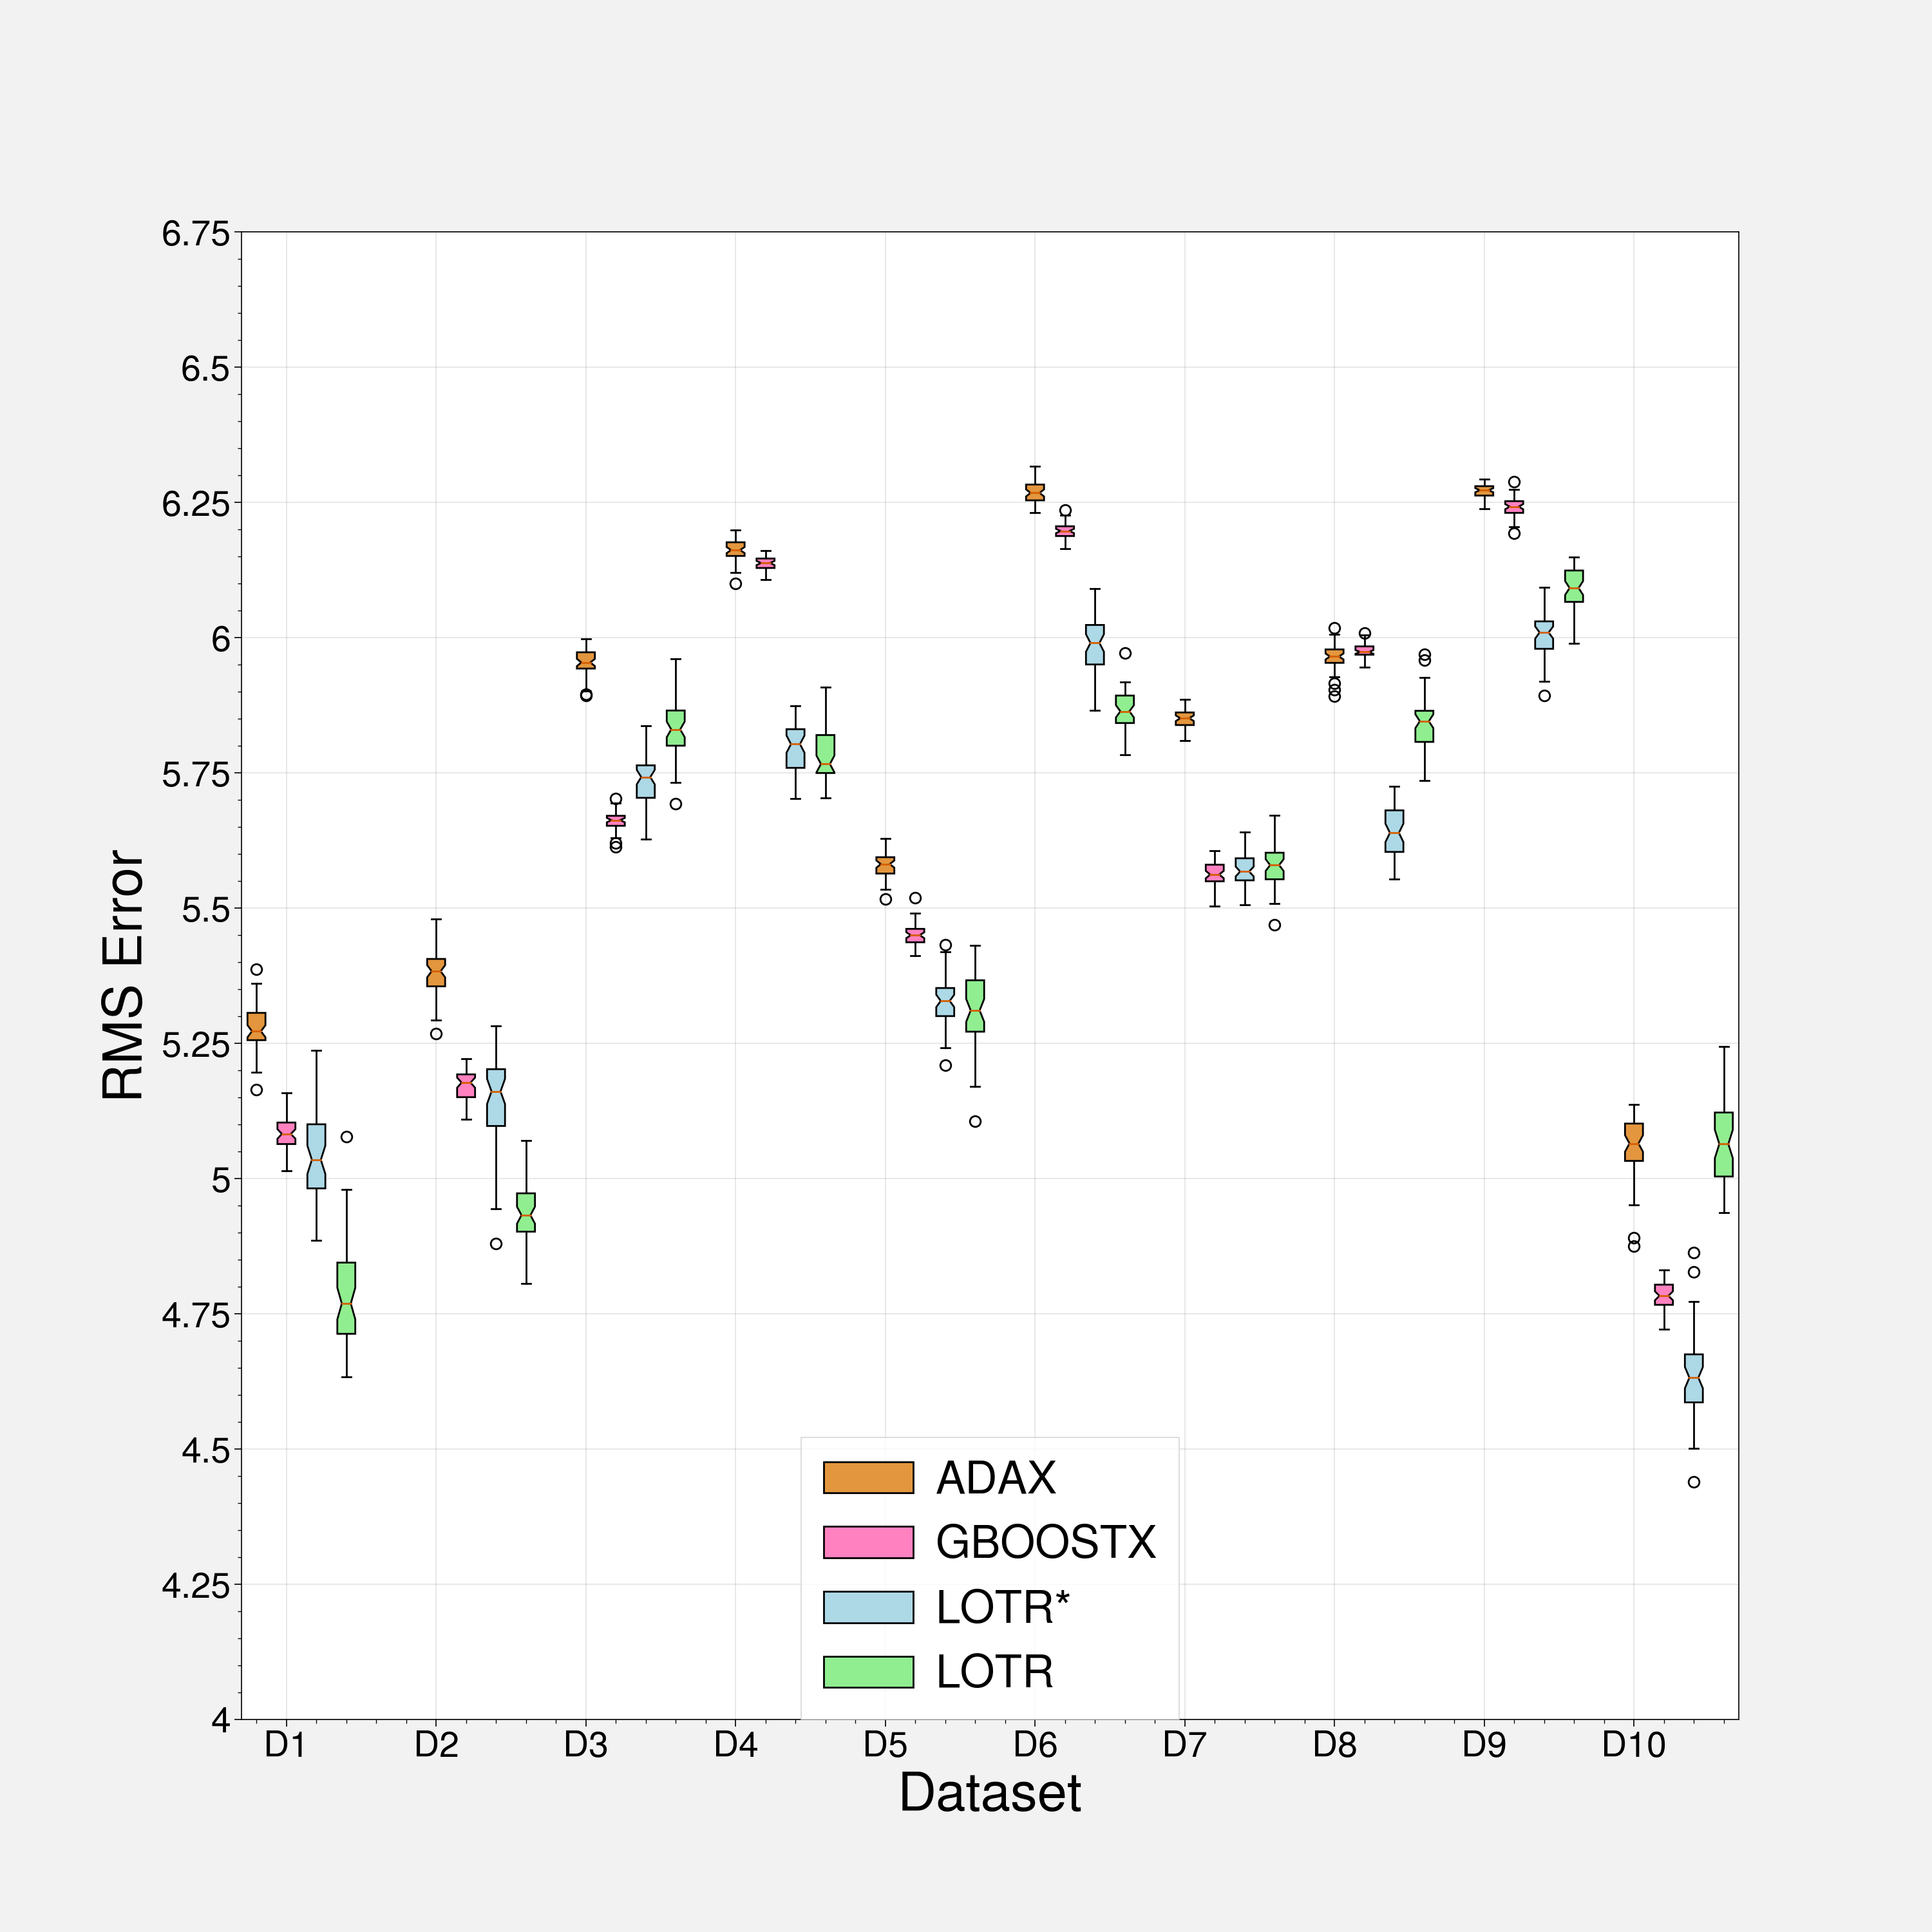

In [6]:
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
import seaborn as sns


US_RMSE_df1_np = np.array([ADA_TL_RMSE_S1, GBR_TL_RMSE_S1, STrAdaBoostWAS_RMSE_S1, STrAdaBoost_RMSE_S1])
US_RMSE_df1_np = US_RMSE_df1_np.transpose()

US_RMSE_df2_np = np.array([ADA_TL_RMSE_S2, GBR_TL_RMSE_S2, STrAdaBoostWAS_RMSE_S2, STrAdaBoost_RMSE_S2])
US_RMSE_df2_np = US_RMSE_df2_np.transpose()

US_RMSE_df3_np = np.array([ADA_TL_RMSE_S3, GBR_TL_RMSE_S3, STrAdaBoostWAS_RMSE_S3, STrAdaBoost_RMSE_S3])
US_RMSE_df3_np = US_RMSE_df3_np.transpose()

US_RMSE_df4_np = np.array([ADA_TL_RMSE_S4, GBR_TL_RMSE_S4, STrAdaBoostWAS_RMSE_S4, STrAdaBoost_RMSE_S4])
US_RMSE_df4_np = US_RMSE_df4_np.transpose()

US_RMSE_df5_np = np.array([ADA_TL_RMSE_S5, GBR_TL_RMSE_S5, STrAdaBoostWAS_RMSE_S5, STrAdaBoost_RMSE_S5])
US_RMSE_df5_np = US_RMSE_df5_np.transpose()

US_RMSE_df6_np = np.array([ADA_TL_RMSE_S6, GBR_TL_RMSE_S6, STrAdaBoostWAS_RMSE_S6, STrAdaBoost_RMSE_S6])
US_RMSE_df6_np = US_RMSE_df6_np.transpose()

US_RMSE_df7_np = np.array([ADA_TL_RMSE_S7, GBR_TL_RMSE_S7, STrAdaBoostWAS_RMSE_S7, STrAdaBoost_RMSE_S7])
US_RMSE_df7_np = US_RMSE_df7_np.transpose()

US_RMSE_df8_np = np.array([ADA_TL_RMSE_S8, GBR_TL_RMSE_S8, STrAdaBoostWAS_RMSE_S8, STrAdaBoost_RMSE_S8])
US_RMSE_df8_np = US_RMSE_df8_np.transpose()

US_RMSE_df9_np = np.array([ADA_TL_RMSE_S9, GBR_TL_RMSE_S9, STrAdaBoostWAS_RMSE_S9, STrAdaBoost_RMSE_S9])
US_RMSE_df9_np = US_RMSE_df9_np.transpose()

US_RMSE_df10_np = np.array([ADA_TL_RMSE_S10, GBR_TL_RMSE_S10, STrAdaBoostWAS_RMSE_S10, STrAdaBoost_RMSE_S10])
US_RMSE_df10_np = US_RMSE_df10_np.transpose()



US_RMSE_S1 = pd.DataFrame(US_RMSE_df1_np, index = None, columns = ['ADA_TL_RMSE_S1', 'GBR_TL_RMSE_S1', 'STrAdaBoostWAS_RMSE_S1', 'STrAdaBoost_RMSE_S1'])
US_RMSE_S2 = pd.DataFrame(US_RMSE_df2_np, index = None, columns = ['ADA_TL_RMSE_S2', 'GBR_TL_RMSE_S2', 'STrAdaBoostWAS_RMSE_S2', 'STrAdaBoost_RMSE_S2'])
US_RMSE_S3 = pd.DataFrame(US_RMSE_df3_np, index = None, columns = ['ADA_TL_RMSE_S3', 'GBR_TL_RMSE_S3', 'STrAdaBoostWAS_RMSE_S3', 'STrAdaBoost_RMSE_S3'])
US_RMSE_S4 = pd.DataFrame(US_RMSE_df4_np, index = None, columns = ['ADA_TL_RMSE_S4', 'GBR_TL_RMSE_S4', 'STrAdaBoostWAS_RMSE_S4', 'STrAdaBoost_RMSE_S4'])
US_RMSE_S5 = pd.DataFrame(US_RMSE_df5_np, index = None, columns = ['ADA_TL_RMSE_S5', 'GBR_TL_RMSE_S5', 'STrAdaBoostWAS_RMSE_S5', 'STrAdaBoost_RMSE_S5'])
US_RMSE_S6 = pd.DataFrame(US_RMSE_df6_np, index = None, columns = ['ADA_TL_RMSE_S6', 'GBR_TL_RMSE_S6', 'STrAdaBoostWAS_RMSE_S6', 'STrAdaBoost_RMSE_S6'])
US_RMSE_S7 = pd.DataFrame(US_RMSE_df7_np, index = None, columns = ['ADA_TL_RMSE_S7', 'GBR_TL_RMSE_S7', 'STrAdaBoostWAS_RMSE_S7', 'STrAdaBoost_RMSE_S7'])
US_RMSE_S8 = pd.DataFrame(US_RMSE_df8_np, index = None, columns = ['ADA_TL_RMSE_S8', 'GBR_TL_RMSE_S8', 'STrAdaBoostWAS_RMSE_S8', 'STrAdaBoost_RMSE_S8'])
US_RMSE_S9 = pd.DataFrame(US_RMSE_df9_np, index = None, columns = ['ADA_TL_RMSE_S9', 'GBR_TL_RMSE_S9', 'STrAdaBoostWAS_RMSE_S9', 'STrAdaBoost_RMSE_S9'])
US_RMSE_S10 = pd.DataFrame(US_RMSE_df10_np, index = None, columns = ['ADA_TL_RMSE_S10', 'GBR_TL_RMSE_S10', 'STrAdaBoostWAS_RMSE_S10', 'STrAdaBoost_RMSE_S10'])




def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)


plt.figure(figsize = (15,15))

# plt.boxplot(US_RMSE_S1.values)
# # plt.boxplot(US_RMSE_S2.values)
# plt.boxplot(US_RMSE_S3.values)
# plt.boxplot(US_RMSE_S4.values)
# # plt.boxplot(US_RMSE_S5.values)
# plt.boxplot(US_RMSE_S6.values)
# plt.boxplot(US_RMSE_S7.values)
# labels = ['GradBoostX', 'STrAdaBoost.R2*', 'STrAdaBoost.R2']
# x_val = [1,2,3]
# plt.xticks(x_val, labels, rotation = 30, fontsize = 30)
# plt.ylabel("R2 Value", fontsize = 50)

    
# fig = figure()
ax = axes()


bp0 = boxplot(US_RMSE_S1.values, positions = [1, 2, 3, 4], notch=True, widths = 0.6, patch_artist=True)

bp1 = boxplot(US_RMSE_S2.values, positions = [7, 8, 9, 10], notch=True, widths = 0.6, patch_artist=True)

bp2 = boxplot(US_RMSE_S3.values, positions = [12, 13, 14, 15], notch=True, widths = 0.6, patch_artist=True)

bp3 = boxplot(US_RMSE_S4.values, positions = [17, 18, 19, 20], notch=True, widths = 0.6, patch_artist=True)

bp4 = boxplot(US_RMSE_S5.values, positions = [22, 23, 24, 25], notch=True, widths = 0.6, patch_artist=True)

bp5 = boxplot(US_RMSE_S6.values, positions = [27, 28, 29 ,30], notch=True, widths = 0.6, patch_artist=True)

bp6 = boxplot(US_RMSE_S7.values, positions = [32, 33, 34, 35], notch=True, widths = 0.6, patch_artist=True)

bp7 = boxplot(US_RMSE_S8.values, positions = [37, 38, 39, 40], notch=True, widths = 0.6, patch_artist=True)

bp8 = boxplot(US_RMSE_S9.values, positions = [42, 43, 44, 45], notch=True, widths = 0.6, patch_artist=True)

bp9 = boxplot(US_RMSE_S10.values, positions = [47, 48, 49, 50], notch=True, widths = 0.6, patch_artist=True)





colors = ['#E3963E','pink', 'lightblue', 'lightgreen']
for bplot in (bp0, bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8, bp9):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax.set_xticklabels(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], fontsize = 20)
ax.set_xticks([2, 7, 12, 17, 22, 27, 32, 37, 42, 47])

ax.set_yticks([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75])
ax.set_yticklabels([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75], fontsize = 20)  

ax.set_ylabel("RMS Error", fontsize = 30)
ax.set_xlabel("Dataset", fontsize = 30)

ax.legend([bp0["boxes"][0], bp0["boxes"][1], bp0["boxes"][2], bp0["boxes"][3]], 
          ['ADAX', 'GBOOSTX', 'LOTR*', 'LOTR'], loc='lower center', fontsize = 25)

plt.savefig("Paper_RMSE_US")
show()



In [10]:
############################## Standard Regression Datasets #################################################################

stradaboost_RMSE_concrete = [6.160569688046794, 5.385056168151057, 11.537280214502667, 6.211790489243431, 10.124198380409222, 8.128429542667254, 6.394846310657595, 5.548771238977392, 5.596593653945762, 5.377695275040092, 7.348602781426588, 5.578949367195352, 6.083334996148067, 6.682357633026466, 6.354939205399708, 8.275790328847574, 6.915687855714617, 11.588639005032698, 8.0626468342028, 6.326092692875173]
tradaboost_RMSE_concrete = [6.541020044640769, 5.02012706206751, 9.169954145177607, 6.435689169158459, 8.88829865240887, 9.281962017215418, 8.875603050920281, 7.025704434153655, 5.13915260104503, 5.72072638391111, 7.369116818231316, 5.675806869960485, 5.75968959381744, 5.928300446961894, 6.428338521308748, 4.758416645321606, 4.5971373434502025, 6.883775231314941, 3.4293437208180224, 5.560616012498886]
gbr_RMSE_concrete = [4.663742678225011, 6.126862455200775, 11.466485651569924, 5.534164994729643, 8.681619917565632, 6.642596890925768, 7.683746579901341, 5.739380797302863, 5.68449895901686, 4.182281620585482, 6.701558748703886, 2.215107778320667, 3.41335562523408, 2.7203268052979452, 3.7267350906136354, 2.616295028816559, 3.0657113984236566, 5.6021452410898105, 2.5329461221912757, 3.3591188620349595]

stradaboost_R2_concrete = [0.9399707358784252, 0.7870394255118812, 0.38423250477853016, 0.8132114805051763, 0.6525012177742872, 0.8677802444911202, 0.7396333872634682, 0.6055521352046099, 0.630462152693757, 0.9106468275874966, 0.826038511418632, 0.9026809435894384, 0.9091027196241214, 0.9229916718415824, 0.7851106285769627, 0.6913714537013781, 0.74061361439847, 0.20564332965630988, 0.7273459272844597, 0.7029476211245151]
tradaboost_R2_concrete = [0.9026709048018587, 0.788561771700146, 0.47977703273506345, 0.774401491199043, 0.7662429124401559, 0.7830804731182934, 0.6240945516062166, 0.3137259210401786, 0.7463014608315363, 0.8702706676154053, 0.6771852549545389, 0.7574739773326518, 0.8717814678397086, 0.8430475177461879, 0.6569271139906819, 0.7524267444729598, 0.6897601520227716, 0.34598376715355655, 0.9178146407329959, 0.6876063149946842]
gbr_R2_concrete = [0.9525246051803393, 0.6605331005165853, 0.38812568859308644, 0.8119852743703981, 0.7248962893294493, 0.8914405993092654, 0.6396109592952628, 0.39544149344564117, 0.7494443514243756, 0.9372748831817371, 0.74048501868772, 0.962487245469633, 0.9502436480826676, 0.9639690203712089, 0.893617787491994, 0.9216769812001803, 0.9012864535226115, 0.6609156893604556, 0.9439253841321719, 0.8892441889137216]


#################################################################################################################################################################

stradaboost_RMSE_housing = [3.155749071986295, 2.4227148992447094, 1.512251171049698, 2.2651238680205252, 1.190147402947372, 1.849963794373305, 2.630304756303988, 2.950954565213517, 4.499155611244547, 4.417322082279637, 1.1519719623645732, 7.694135388317863, 4.699740308376972, 4.607576273999947, 2.584440693541144, 2.9631600780906098, 3.054419516277539, 2.3294865323991494, 1.9341179535338384, 1.6114893264861962]
tradaboost_RMSE_housing = [2.930085093854947, 2.4795592632615957, 2.4871970792912754, 2.351101362974913, 1.3242527571549656, 1.101039829635879, 2.4973023559768786, 2.511273816288092, 4.344752012213088, 1.5049638139493715, 1.7614522325046147, 9.478549112615603, 3.4425220581294087, 3.247096764644034, 2.2792773464293874, 3.4102569847034947, 4.436968415359277, 3.0283094672221895, 2.2383299955468687, 3.3902245868270677]
gbr_RMSE_housing = [3.2002238942191252, 2.410123507159773, 2.0796830343326946, 1.9183806855293195, 1.2964843885771486, 1.3847024597606314, 1.9859445723197668, 3.239165729889791, 4.849700620126591, 6.893720392358554, 1.2454158407456728, 6.811744835440854, 4.150265760834754, 4.480156585180506, 2.4656947427360456, 2.542496429628167, 2.634456217477316, 1.4216845280443506, 1.615131473191891, 1.8397452247446722]

stradaboost_R2_housing = [0.8874628737974639, 0.771018360082448, 0.9483077680698078, 0.8946262403738809, 0.6920679979128109, 0.9029743661449562, 0.6806795785803308, 0.9143517018287176, 0.8758092745557313, 0.882530742216913, 0.7923819556953712, 0.021353612225206067, 0.884724457617565, 0.9711329831806201, 0.982030086050116, 0.7634032032511125, 0.5121439738667023, 0.9012158031956717, 0.9886051010153872, 0.9422952501712774]
tradaboost_R2_housing = [0.6430396557577773, 0.5228792083019617, 0.8734642153877146, 0.8644329820550692, 0.6145794577363025, 0.982930509228014, 0.5209642556993838, 0.931351740265712, 0.7621873075616233, 0.974050501080981, 0.6508811405309212, 0.16858217424764357, 0.8844873284860246, 0.8950898813623029, 0.9734710416980178, 0.6492009316177643, 0.7510573298265828, 0.7834022248535929, 0.9894654696413072, 0.702992099347671]
gbr_R2_housing = [0.6457829656897999, 0.835314875976937, 0.8661669337923578, 0.8723578018974302, 0.763981693575525, 0.7707173457901498, 0.2064254041578625, 0.9403030638965592, 0.8431105233430062, 0.6434496456022448, 0.8169108464325716, 0.17391533264923068, 0.8719305225167314, 0.7751525210238152, 0.9558589263767592, 0.769019760499597, 0.7074283921909684, 0.9485767404177595, 0.9835511091717741, 0.8700048641978019]


#################################################################################################################################################################

stradaboost_RMSE_auto = [0.20601948811461177, 0.5049190379216697, 0.4229154213029683, 0.38813387023892226, 0.44945889021333246, 0.3179378362878423, 0.3883707713056787, 0.16637599801160124, 0.3899011005341449, 1.2031085445897813, 0.319111704603037, 0.5629923898506339, 0.8317266878574766, 0.9658551146450529, 1.2476579145658147, 0.7838307209694246, 0.2651558037444034, 0.3135817650722819, 0.42045685513866066, 0.5943459799296034]
tradaboost_RMSE_auto = [0.16780998079860301, 0.33162669700407055, 0.28666353965625835, 0.6233341654000265, 0.418735804087528, 0.5355014426416531, 0.39927943477728844, 0.21611319519754923, 0.4563123446044063, 1.005103150566817, 0.801351905307372, 0.4972455766662587, 0.9715309289811906, 0.8976950239888788, 1.4703687655527191, 0.6274895026551954, 0.46823182267340585, 0.4471070653393087, 0.4798012315781035, 0.6589863234450216]
gbr_RMSE_auto = [0.15859050655125667, 0.41139005516563704, 0.30534265540932753, 0.3447435015940725, 0.37593585445404726, 0.30058815512729337, 0.47956632866938126, 0.0881958643456524, 0.4508185245736514, 1.0827960115053572, 0.4106504102376164, 0.4562080938028887, 0.7968386059635709, 0.9670057997290188, 1.353459021087352, 0.5604557385836028, 0.2779736500449244, 0.3488467042083944, 0.4280191784036677, 0.5927629547706863]

stradaboost_R2_auto = [0.9528675565811674, 0.8046478398231433, 0.6721790449511023, 0.5814961458758225, 0.867591514874495, 0.958274528580667, 0.919889793663509, 0.7774288970033402, 0.851540572496318, 0.017144319989622434, 0.3098047166901955, 0.6399693481611328, 1.720819838780302e-06, 0.8464773640838797, 0.007932146051169561, 0.19955348605438153, 0.6365245129232856, 0.5727873825878117, 0.022794850102426018, 0.8421430966523048]
tradaboost_R2_auto = [0.9970437380201722, 0.4939793820787119, 0.7718532860581973, 0.14060016188398583, 0.8561389809067342, 0.782092925794963, 0.8401970455831462, 0.5758214495446975, 0.4884757322536343, 0.30060246369441135, 0.08420788411407132, 0.6726678025376231, 0.2737599467473534, 0.5671617445333537, 0.0006438301292862012, 0.060094447962883386, 0.008051274987383682, 0.25137662675270617, 0.019516539096471785, 0.5715703972007875]
gbr_R2_auto = [0.9504214685443013, 0.869304169200463, 0.8110095747388791, 0.6249385351833867, 0.8731085756977781, 0.9192737616740614, 0.931551153149705, 0.9583856058811583, 0.41528569121741915, 0.005750062660484827, 0.32106536766060956, 0.6802353754517383, 0.0008452550349354726, 0.9472766821416176, 0.005253722706203909, 0.43078523899528703, 0.6565508881948792, 0.37358119478626134, 0.02946711689219825, 0.6713787892447104]


#################################################################################################################################################################


stradaboost_RMSE_ailerons = [0.00018653840674816383, 0.000189810904166031, 0.0001873658474340575, 0.00019085531291090202, 0.00019114973737215766, 0.00019043394736071044, 0.0001888067344590376, 0.00018804314636032746, 0.00018824536253958136, 0.0001927143957780782, 0.00019012721685156454, 0.00018968020765799165, 0.00019056782946398726, 0.00019100182687938224, 0.00018898277228031844, 0.00019125494130398105, 0.00018900343933637447, 0.00018761671245519221, 0.0001917718719682461, 0.00019119037172070315]
tradaboost_RMSE_ailerons = [0.00020681854607685043, 0.00020651638834517068, 0.00020383301674030212, 0.00020683286942591622, 0.0002063692404633311, 0.00020680161826133934, 0.00020364534019528337, 0.00020411402277487162, 0.000206621642615898, 0.00020635976828406653, 0.00020632514249374563, 0.00020637385249563253, 0.00020668712168823728, 0.00020655433214305843, 0.00020393791473106047, 0.0002035921161816063, 0.00020649446155580529, 0.00020694081790597585, 0.0002066865427000793, 0.00020345248683203583]
gbr_RMSE_ailerons = [0.0001656659832301053, 0.0001655080035961031, 0.00016563006901253418, 0.0001653424573613975, 0.0001654268570127941, 0.000165369585315523, 0.0001653589841636465, 0.00016539590637807439, 0.00016549309690746676, 0.0001653418398216678, 0.00016563954571484176, 0.00016522546755197082, 0.00016530249601359962, 0.00016549258747006396, 0.0001653736781975519, 0.00016554922704477832, 0.00016564238356153062, 0.00016529866896184068, 0.00016537571584277668, 0.00016535910164160495]

stradaboost_R2_ailerons = [0.7994431446922216, 0.79291772428616, 0.7959727769704424, 0.7919700807049479, 0.7885973254825356, 0.7924961778829837, 0.7915936882136941, 0.795523949236591, 0.7945970418686013, 0.7897947537475372, 0.7934872816059522, 0.7915548650511036, 0.792148766070684, 0.788703506201112, 0.7906655665234325, 0.7924082390032214, 0.7917252298714027, 0.7959090954930488, 0.7854179709888617, 0.7903470071690677]
tradaboost_R2_ailerons = [0.7389481264149564, 0.7396235798682649, 0.745455458309211, 0.7389356605217205, 0.740037235075707, 0.7390041251533895, 0.7458853651842333, 0.7447896713826876, 0.7394059008386079, 0.7400556736305642, 0.7401337947231849, 0.7400038569756268, 0.7392396724376006, 0.7395462943100826, 0.7451917559072191, 0.7460176753457975, 0.739764541432313, 0.7387092421464678, 0.7392852245341871, 0.7463458123254262]
gbr_R2_ailerons = [0.8313632275100481, 0.8317019098900963, 0.831431736835772, 0.8320078717975276, 0.8318424099928636, 0.8319617877754968, 0.8319838443346086, 0.8319111910282008, 0.8317069350591485, 0.8320264396152213, 0.8314067854200656, 0.8322483245092896, 0.8320858269936434, 0.8317125723895374, 0.8319530269492782, 0.8316036589868377, 0.8314168497170955, 0.8321096142661164, 0.8319398652821469, 0.8319786496874683]



#################################################################################################################################################################

stradaboost_RMSE_elevators = [0.002994308060777424, 0.0031586784175449143, 0.0030899128906734154, 0.0029370613376077503, 0.002979925497627271, 0.003239176309770462, 0.00300647740216143, 0.003132132991311323, 0.0029844042782061837, 0.0031057849944312378, 0.002987418041278848, 0.002947721785694048, 0.0030862998031953364, 0.0028720097711430388, 0.002992840798409856, 0.002970085896208511, 0.003027284347944437, 0.003047229641552924, 0.0031942036399121177, 0.0030683028857859096]
tradaboost_RMSE_elevators = [0.004235960974722378, 0.0042532980185931105, 0.00424928425978152, 0.00423064506904706, 0.004229359136246281, 0.004229399458957712, 0.004257522157982159, 0.004272599373216897, 0.004229756431819963, 0.004391997594254764, 0.004213225304044787, 0.004251404880964993, 0.004237451430065547, 0.00423533847501916, 0.004224446056963165, 0.004262692696212362, 0.00427239590670089, 0.004253822044230903, 0.004252250988171132, 0.0042670747606676175]
gbr_RMSE_elevators = [0.0026595479194474105, 0.0026583236722272233, 0.0026589335344576965, 0.0026571863687977516, 0.002655751540759153, 0.00265766405344248, 0.0026586231496001185, 0.0026574318691075897, 0.0026595256699780663, 0.002659790631933799, 0.0026630375560211337, 0.0026947114611148076, 0.002659765325440391, 0.0026603059820020716, 0.00265621711218301, 0.0026631985916709634, 0.002657825846625134, 0.0026581598805280704, 0.0026964279225725075, 0.0026584792833300934]

stradaboost_R2_elevators = [0.8199507310239796, 0.821083399390994, 0.8119872066950584, 0.8214132857989649, 0.8228260886680355, 0.8220660292097063, 0.8234383732919764, 0.8084758742208555, 0.8191318819350368, 0.8145416794310836, 0.8216833392530357, 0.8227030583806363, 0.824203445461412, 0.8291828711123767, 0.8173837047553305, 0.8222621822343771, 0.8177775776145914, 0.825013887026712, 0.7975790135171341, 0.8265387983441588]
tradaboost_R2_elevators = [0.5695237913761826, 0.5664879912827565, 0.5668730999599445, 0.5705440879983508, 0.5704949220464953, 0.5704858668555313, 0.5651252515440068, 0.5634632387653482, 0.5704190193066773, 0.5432596988276073, 0.5735998024060381, 0.5669158394224875, 0.5689307309056442, 0.5695322523951819, 0.5714517808021735, 0.5653033524046835, 0.562530129718536, 0.5659629266770204, 0.5667259109208621, 0.5643012581549817]
gbr_R2_elevators = [0.8293344383594842, 0.8294677575307577, 0.8293976798555139, 0.8296512683650047, 0.8298145696207326, 0.8295702189337696, 0.8294608315000559, 0.8295985313576577, 0.8293432990891416, 0.8293030714444692, 0.8288369466732859, 0.8247096781131288, 0.8292851312921292, 0.8292084726400372, 0.8297853027939636, 0.8288373567830716, 0.8295467033757878, 0.8295049144742852, 0.8244777066964467, 0.8294546222269742]


#################################################################################################################################################################

stradaboost_RMSE_abalone = [1.4998097152267589, 1.8162314223167797, 2.095896899220678, 2.782995910293012, 1.6713044531991006, 1.7085902984893293, 1.7711095331330846, 1.7775509731209713, 1.4719510937976386, 1.417697114433143, 1.8310863168676341, 2.3723851550253663, 1.4753089956416976, 1.4352865704743354, 1.585213323437924, 1.930806894951238, 1.6300976733946837, 1.9777275810505046, 1.598596882271576, 6.70593226693369]
tradaboost_RMSE_abalone = [1.4312725505338255, 1.890274886070674, 1.8914627820468175, 3.3259271834855673, 1.7941492032884396, 1.906524030341246, 1.619550054564094, 1.6265393700922177, 1.6495580663529212, 1.4715631610224822, 1.6362725730657035, 2.068976339943138, 2.3041492683264053, 1.2275142428012118, 1.4366394841434167, 1.6743631646627484, 2.1152435712989273, 1.4310508059715614, 1.9855702455915705, 2.2863439092520927]
gbr_RMSE_abalone = [1.8507269172605925, 1.9234750624963846, 1.9629408314503771, 3.0182828295704303, 1.7147400468350609, 1.2725147848561504, 1.4352807137678807, 1.6039601259191367, 1.3413723759961382, 1.373152135431503, 1.5618801721871551, 2.054574840884452, 2.401464579709429, 1.077651815137251, 1.224267394955141, 1.7761503824238791, 1.962032254723272, 1.1293788923527823, 2.204111610237548, 1.3999665011318236]

stradaboost_R2_abalone = [0.5821170600076994, 0.5219044058329887, 0.5023839637970224, 0.3597438924831273, 0.5596693913022083, 0.4380588009843879, 0.26742413521105424, 0.3576282583797772, 0.29474534610066344, 0.4917738994081539, 0.39924006241949184, 0.47558570969461694, 0.6487533368448863, 0.564041002651409, 0.46050218505733187, 0.4965248961222965, 0.5217608543963609, 0.2776639604216498, 0.45192908936236353, 0.07337886613315295]
tradaboost_R2_abalone = [0.5835238559641075, 0.49239800242877724, 0.5541651834625402, 0.1984636090841293, 0.5437001816242056, 0.2487755330668291, 0.5435487223393739, 0.3171840748062478, 0.21472732237355036, 0.4249306076788884, 0.46997893301847804, 0.34057063400249266, 0.4944089512940969, 0.522364586287356, 0.48962080706230654, 0.4425073525410472, 0.4623260017037914, 0.6007155932269538, 0.3314683855470182, 0.1432776830902255]
gbr_R2_abalone = [0.3865122435871249, 0.48465059147920453, 0.49053742668564926, 0.2832022011353206, 0.5808478221369245, 0.2460812779646555, 0.4051564968296789, 0.14887942682547967, 0.2778352932814985, 0.35991641418896725, 0.423663029929573, 0.3204231404617369, 0.4488662827169648, 0.45214477452854906, 0.515735897239244, 0.3911135195019772, 0.5451451505150051, 0.5747261380637243, 0.2621003981980692, 0.2637105933386203]


#################################################################################################################################################################

stradaboost_RMSE_kinematics = []
tradaboost_RMSE_kinematics = [0.16386342963105477, 0.14973421150473964, 0.17020251283183155, 0.18005335812476686, 0.17339254515732253, 0.17299677656388374, 0.17406071202280785, 0.16457432173978623, 0.164975165574514, 0.18090395683438726, 0.15078632061289363, 0.15087890387057476, 0.15212834705955194, 0.17608881421299705, 0.16968458220646884, 0.16345390065529547, 0.17025474559355513, 0.18148089480471902, 0.17735815430175156, 0.17660698682517628]
gbr_RMSE_kinematics = [0.2025103487478191, 0.1821500186364975, 0.19978936439458572, 0.18314394097706502, 0.20291731804279234, 0.1925074140880351, 0.1867931288538428, 0.1898943501047783, 0.1935201442578711, 0.17855342520859951, 0.19094907650744478, 0.2078290392589982, 0.195914645088323, 0.18324495813460193, 0.20174382726121048, 0.1969964554973966, 0.18178409008928115, 0.22140643669206533, 0.19643674713867923, 0.17130074655455774]

stradaboost_R2_kinematics = []
tradaboost_R2_kinematics = [0.5916336512581157, 0.7291927461307379, 0.5825380002381263, 0.494415277976975, 0.5462840981055812, 0.6317771931723815, 0.4630044081075447, 0.5449863245975171, 0.5605880727816586, 0.4857566904279455, 0.6333482556443955, 0.6502527590337912, 0.45860509263742566, 0.553658712623355, 0.453163305949092, 0.5115701723439828, 0.5771870253961963, 0.510004437022482, 0.5569683901266973, 0.4565209914769184]
gbr_R2_kinematics = [0.41638321580404286, 0.575895440504289, 0.4321412176280749, 0.4988215324327443, 0.4241015367265543, 0.5642100169274302, 0.4232077556092186, 0.4232695583936153, 0.41136587123675145, 0.5288424855155012, 0.4283360484181283, 0.3621443934674914, 0.2461373553468829, 0.5098368118804155, 0.2892080059984776, 0.35355024533524326, 0.5561657824109684, 0.2980232535040607, 0.4625407105031838, 0.5106745457574627]

#################################################################################################################################################################

stradaboost_RMSE_cactivity = [2.6186617707787057, 2.6159304095258746, 2.305655221463425, 2.286693451050622, 2.4407287618657896, 2.750041727772971, 2.4052096465625996, 2.375339909084825, 2.1071420933127882, 2.4710156796403653, 2.5004399589856425, 2.7265901630007545, 2.6652046927599313, 2.2437764671173466, 2.5094200241520523, 2.4770057257617544, 2.5692084860495776, 2.552654584603582, 2.6087811330529305, 2.4605433795977785]
tradaboost_RMSE_cactivity = [2.974364983450536, 2.8386225606024946, 2.5688433337336827, 2.9784953062109985, 2.4337502103105435, 2.881959812721326, 2.5195713591073314, 2.462417441887926, 2.6417051200666504, 2.3914609372935387, 2.834158919223588, 2.9518825572366145, 2.717115569404248, 2.3069658933152217, 2.7808900214306216, 2.8761605033937205, 2.7591701086596396, 2.587466284816961, 2.830020528477602, 2.4411657670458045]
gbr_RMSE_cactivity = [1.899317021544848, 1.9184883482738562, 1.8845726749347893, 2.039165793153535, 1.8114062485489288, 1.7476573427474975, 1.8573902506838045, 2.0744618740930427, 1.5237154053558284, 2.1728125872796853, 2.1562541433778737, 2.100548622416806, 2.0223128810461324, 1.9187440647832126, 1.7983023937891427, 1.8278806725079348, 2.299259476430266, 2.0326359364094864, 2.2739487317345892, 1.9441087667195327]

stradaboost_R2_cactivity = [0.9697618214250323, 0.9471268238534477, 0.9537408874275689, 0.9811896394867949, 0.9863121196304444, 0.98029208142645, 0.8988257313662421, 0.9702058099595829, 0.9814023873846419, 0.9765031739023816, 0.8880733092788969, 0.9422785935234765, 0.9670349673979034, 0.9557847612158992, 0.8352212434957901, 0.9866359960823643, 0.9760553234882533, 0.8610307947012773, 0.9478487676618945, 0.9809250287427717]
tradaboost_R2_cactivity = [0.9576502114133822, 0.9288206518603569, 0.9355649075793303, 0.9643648274499126, 0.9827794480109617, 0.9763801288668895, 0.8753831550221396, 0.9664025228128864, 0.9675465134171953, 0.9755051151176428, 0.8373836512247603, 0.9266424777418726, 0.9586739574858707, 0.9519211842905118, 0.7785287106490205, 0.9794910300847643, 0.9663933561571955, 0.8501264757644221, 0.9293959712993723, 0.9790860823185291]
gbr_R2_cactivity = [0.9779281956699454, 0.9606879758958644, 0.9614236680966668, 0.9809021111129699, 0.9882793829721787, 0.9910777746201741, 0.9208983111751095, 0.9720479094976766, 0.985527492146757, 0.9795125771135973, 0.9004803813018428, 0.9594583844430099, 0.9735274111990455, 0.9631249993483756, 0.8933481319887063, 0.9898759161413495, 0.9763552720446795, 0.8876218837008548, 0.947976733437696, 0.982967023299449]



In [2]:
############################## Ablation Study Standard Regression Datasets #################################################################

stradaboost_RMSE_ablation_ailerons = [0.00018653840674816383, 0.000189810904166031, 0.0001873658474340575, 0.00019085531291090202, 0.00019114973737215766, 0.00019043394736071044, 0.0001888067344590376, 0.00018804314636032746, 0.00018824536253958136, 0.0001927143957780782, 0.00019012721685156454, 0.00018968020765799165, 0.00019056782946398726, 0.00019100182687938224, 0.00018898277228031844, 0.00019125494130398105, 0.00018900343933637447, 0.00018761671245519221, 0.0001917718719682461, 0.00019119037172070315]
tradaboost_RMSE_ablation_ailerons = [0.00022695305398892757, 0.00023931138259373065, 0.000238088421272147, 0.000248838220389915, 0.00024504643342616113, 0.00023476506117022406, 0.00022447506157067967, 0.00024132450475459666, 0.00023402583812822512, 0.0002393062230657091, 0.00025061214635531826, 0.0002551822260693181, 0.00022467009118612568, 0.0002376494265278073, 0.0002586689725436656, 0.00023166815575299476, 0.00023908810672172237, 0.00024995752833249714, 0.00023460941713216674, 0.00024519047093807543]
gbr_RMSE_ablation_ailerons = [0.00019078064490331108, 0.00019065142948389952, 0.00019079018165038723, 0.00018761972603949454, 0.0001898670206287818, 0.00019049776873561613, 0.000188244888272926, 0.00019153582833195644, 0.00018866618543196816, 0.00018949132399937338, 0.00018629023845475717, 0.0001906718215463847, 0.0001895218338079132, 0.00018942979652755316, 0.000188079053424787, 0.00018963174968158526, 0.00019056196175690893, 0.00018876960559616586, 0.0001898078848750164, 0.00018983052788112994]

stradaboost_R2_ablation_ailerons = [0.7994431446922216, 0.79291772428616, 0.7959727769704424, 0.7919700807049479, 0.7885973254825356, 0.7924961778829837, 0.7915936882136941, 0.795523949236591, 0.7945970418686013, 0.7897947537475372, 0.7934872816059522, 0.7915548650511036, 0.792148766070684, 0.788703506201112, 0.7906655665234325, 0.7924082390032214, 0.7917252298714027, 0.7959090954930488, 0.7854179709888617, 0.7903470071690677]
tradaboost_R2_ablation_ailerons = [0.6874412635914348, 0.6548514540581514, 0.6591140860796625, 0.6397901824792342, 0.6592886584353405, 0.6660798371247242, 0.6938918007590008, 0.6584468785012851, 0.6695846943541119, 0.653536532680438, 0.6388473351041648, 0.6276950213777259, 0.6931680200779441, 0.6586782109194426, 0.6361000404919622, 0.6750911042708616, 0.6558629211535284, 0.6369998312549643, 0.6695585511868909, 0.6503335745301686]
gbr_R2_ablation_ailerons = [0.7803413288252402, 0.7808517664613813, 0.7805260033480872, 0.787306783988316, 0.7822259543949277, 0.7812709368481537, 0.7855524392714588, 0.7790800115878448, 0.7846341421197356, 0.7831483658696062, 0.7893295436846223, 0.7806161090091442, 0.7833359558906222, 0.7830286320806953, 0.7858821941383876, 0.783042480651071, 0.7811358295009825, 0.7848207158599086, 0.7825502039567888, 0.7827068606769498]


#################################################################################################################################################################

stradaboost_RMSE_ablation_elevators = [0.002994308060777424, 0.0031586784175449143, 0.0030899128906734154, 0.0029370613376077503, 0.002979925497627271, 0.003239176309770462, 0.00300647740216143, 0.003132132991311323, 0.0029844042782061837, 0.0031057849944312378, 0.002987418041278848, 0.002947721785694048, 0.0030862998031953364, 0.0028720097711430388, 0.002992840798409856, 0.002970085896208511, 0.003027284347944437, 0.003047229641552924, 0.0031942036399121177, 0.0030683028857859096]
tradaboost_RMSE_ablation_elevators = [0.004275919983996502, 0.004065268426812282, 0.004113395961403267, 0.004212334391192323, 0.004288498406503932, 0.004378834846288086, 0.003614079335797574, 0.004065267981158002, 0.004249356249477287, 0.004538052419205431, 0.004073175603346029, 0.004466231064563387, 0.004515145948876253, 0.0041883074646359994, 0.004509266884755467, 0.004504083203488585, 0.004327980331242717, 0.004533669298007648, 0.004063489404373452, 0.00406528305490454]
gbr_RMSE_ablation_elevators = [0.00161401693713203, 0.00161401693713203, 0.00161401693713203, 0.00161401693713203, 0.0016140169371320302, 0.0016140169371320298, 0.00161401693713203, 0.00161401693713203, 0.0016140169371320298, 0.00161401693713203, 0.00161401693713203, 0.0016140169371320298, 0.00161401693713203, 0.0016140169371320298, 0.0016140169371320298, 0.00161401693713203, 0.00161401693713203, 0.00161401693713203, 0.00161401693713203, 0.0016140169371320298]

stradaboost_R2_ablation_elevators = [0.8199507310239796, 0.821083399390994, 0.8119872066950584, 0.8214132857989649, 0.8228260886680355, 0.8220660292097063, 0.8234383732919764, 0.8084758742208555, 0.8191318819350368, 0.8145416794310836, 0.8216833392530357, 0.8227030583806363, 0.824203445461412, 0.8291828711123767, 0.8173837047553305, 0.8222621822343771, 0.8177775776145914, 0.825013887026712, 0.7975790135171341, 0.8265387983441588]
tradaboost_R2_ablation_elevators = [0.37640847351511997, 0.43050902808961616, 0.420990773200773, 0.3959881188360485, 0.36358452529870366, 0.3539248754337524, 0.5509400271571356, 0.43050948863942673, 0.38802007067797284, 0.30097707678485297, 0.43503011081893417, 0.3238792243887958, 0.3137875854906619, 0.40114826252136027, 0.3100011831667205, 0.3145085660294332, 0.3650281067495453, 0.318398430906536, 0.44036891294116703, 0.43051387292920756]
gbr_R2_ablation_elevators = [0.9129219076052852, 0.9129219076052852, 0.9129219076052848, 0.912921907605285, 0.9129219076052852, 0.9129219076052848, 0.9129219076052852, 0.912921907605285, 0.9129219076052852, 0.912921907605285, 0.912921907605285, 0.9129219076052852, 0.912921907605285, 0.912921907605285, 0.9129219076052848, 0.9129219076052852, 0.9129219076052848, 0.912921907605285, 0.912921907605285, 0.912921907605285]


#################################################################################################################################################################

stradaboost_RMSE_ablation_abalone = [1.4998097152267589, 1.8162314223167797, 2.095896899220678, 2.782995910293012, 1.6713044531991006, 1.7085902984893293, 1.7711095331330846, 1.7775509731209713, 1.4719510937976386, 1.417697114433143, 1.8310863168676341, 2.3723851550253663, 1.4753089956416976, 1.4352865704743354, 1.585213323437924, 1.930806894951238, 1.6300976733946837, 1.9777275810505046, 1.598596882271576, 6.70593226693369]
tradaboost_RMSE_ablation_abalone = [1.8255002950533468, 1.806742623369421, 2.082957913006075, 2.803949908402955, 1.8021205965341847, 1.816802256412984, 1.9118993845681331, 2.0809715549600303, 1.6971528242537322, 1.4279090120917652, 2.0877336149485877, 2.449807334628009, 1.377511282194191, 1.5373335001849109, 1.844161193212308, 1.9672778697046338, 1.5251621646302778, 2.1751029458941, 1.4669473483849624, 7.273161666692013]
gbr_RMSE_ablation_abalone = [1.30717938884893, 1.882575290197918, 2.2603257438160513, 2.672184825516755, 1.638146271226258, 1.3550094293794106, 1.1389666930315268, 1.5744599234009782, 1.2195509192961693, 1.2171928359932076, 2.0642305667456777, 2.591431197730062, 1.286257944566433, 1.0776991887966478, 1.4837909331177048, 2.35852732383673, 1.0780309622765656, 1.6041606791455096, 1.308849719779453, 6.588709801171148]

stradaboost_R2_ablation_abalone = [0.5821170600076994, 0.5219044058329887, 0.5023839637970224, 0.3597438924831273, 0.5596693913022083, 0.4380588009843879, 0.26742413521105424, 0.3576282583797772, 0.29474534610066344, 0.4917738994081539, 0.39924006241949184, 0.47558570969461694, 0.6487533368448863, 0.564041002651409, 0.46050218505733187, 0.4965248961222965, 0.5217608543963609, 0.2776639604216498, 0.45192908936236353, 0.07337886613315295]
tradaboost_R2_ablation_abalone = [0.5045045728616607, 0.5608518657977699, 0.488936820218125, 0.3855078808817206, 0.4909893515936363, 0.44702367666415516, 0.10556081194781321, 0.30243213116531115, 0.1012334489437782, 0.503093747257661, 0.3600469326859165, 0.4324961617921431, 0.6105014554105277, 0.48277750773738515, 0.4460415683262463, 0.5146143875687079, 0.5194718294059717, 0.3359967014852449, 0.5095560946989828, 0.001233018788063591]
gbr_R2_ablation_abalone = [0.5160073023338643, 0.49571927859336423, 0.46496175468189804, 0.4214724134858678, 0.5483004083236372, 0.39536224527413283, 0.195013448144278, 0.22002103093540132, 0.23500515244188466, 0.4221536722390694, 0.30493653616038424, 0.421393242754838, 0.5544780572634954, 0.5720678579235335, 0.42775789463514, 0.334590635580131, 0.5138289107870827, 0.43331995343390134, 0.5029281100830302, 0.20747707932217943]


#################################################################################################################################################################

stradaboost_RMSE_ablation_kinematics = []
tradaboost_RMSE_ablation_kinematics = [0.17542033541840035, 0.17113962752390255, 0.1951171329199497, 0.18362717608325682, 0.19125173354375996, 0.1844194469064759, 0.1757610213877466, 0.18594419690577432, 0.17402287481281487, 0.15953320049867406, 0.17297012586745028, 0.1768575189940172, 0.18466759573325273, 0.18107588410326061, 0.17542612771884572, 0.16539315361147516, 0.20839389840405628, 0.18874971190954207, 0.18205135917758208, 0.2633087584159945]
gbr_RMSE_ablation_kinematics = [0.13846565258611707, 0.1332776563974172, 0.14384969460672822, 0.14267695584145648, 0.1531172531356153, 0.1542511388899997, 0.14299901051706873, 0.145230268843733, 0.13263984168751614, 0.13347869965390638, 0.14099585704703788, 0.15198912103205348, 0.1488822429904741, 0.14935628102976958, 0.14820418915256225, 0.1410216533861686, 0.15723785234486395, 0.1504925734184155, 0.138822779765777, 0.2839577465379882]

stradaboost_R2_ablation_kinematics = []
tradaboost_R2_ablation_kinematics = [0.5281601879858504, 0.6306075074807354, 0.47940911764834176, 0.47694880204281986, 0.5086962856113789, 0.4858431457880329, 0.5133591195179663, 0.45670530257775066, 0.44836448271394314, 0.6238783054567761, 0.4842979273125778, 0.4549731816403663, 0.37563474809818453, 0.45230840128153144, 0.4753292836324454, 0.5601214144353023, 0.40978624588283724, 0.4762823295794607, 0.4513235403360286, 0.17692929832016258]
gbr_R2_ablation_kinematics = [0.7073768586224881, 0.7741033876945054, 0.725095267962796, 0.6989346726387845, 0.6874649842219676, 0.6399401415914576, 0.6738438916640964, 0.683262435503045, 0.6778742393062949, 0.7398668213016746, 0.6655507175058062, 0.5938379268071408, 0.5909848156540823, 0.6212082567761256, 0.6263216127539508, 0.6697771369598647, 0.6763116038484936, 0.6669942046995561, 0.6970386144783225, 0.11034989054657723]

#################################################################################################################################################################

stradaboost_RMSE_ablation_cactivity = [2.6186617707787057, 2.6159304095258746, 2.305655221463425, 2.286693451050622, 2.4407287618657896, 2.750041727772971, 2.4052096465625996, 2.375339909084825, 2.1071420933127882, 2.4710156796403653, 2.5004399589856425, 2.7265901630007545, 2.6652046927599313, 2.2437764671173466, 2.5094200241520523, 2.4770057257617544, 2.5692084860495776, 2.552654584603582, 2.6087811330529305, 2.4605433795977785]
tradaboost_RMSE_ablation_cactivity = [2.9702401175296216, 2.8398213086500483, 2.2719593869087538, 2.476411825762623, 2.4609045612993414, 6.198808524993722, 2.481207259683971, 2.6491835756696913, 2.1923859394275365, 2.412458822791077, 2.7148319166935644, 2.791385056208226, 2.5709765029908, 2.379737982895394, 2.613565153499139, 2.5953057146543066, 2.5209379522047266, 2.4724324178261177, 2.934709375355867, 7.059435795558402]
gbr_RMSE_ablation_cactivity = [1.8769832064074004, 1.839068187232694, 1.6892904094741985, 1.8731157550440558, 1.6923472358735283, 1.9557133699522073, 1.9244075670984566, 1.8537859165297037, 1.4986902468067873, 2.070194872117078, 1.9740079245403535, 2.0389940924389305, 1.8645251505450071, 1.8267852943887875, 1.7549144195975659, 1.7432056054850908, 1.961806199074465, 1.9179607090173094, 2.0526430319915447, 1.639691371854903]

stradaboost_R2_ablation_cactivity = [0.9697618214250323, 0.9471268238534477, 0.9537408874275689, 0.9811896394867949, 0.9863121196304444, 0.98029208142645, 0.8988257313662421, 0.9702058099595829, 0.9814023873846419, 0.9765031739023816, 0.8880733092788969, 0.9422785935234765, 0.9670349673979034, 0.9557847612158992, 0.8352212434957901, 0.9866359960823643, 0.9760553234882533, 0.8610307947012773, 0.9478487676618945, 0.9809250287427717]
tradaboost_R2_ablation_cactivity = [0.9525656977554645, 0.9247103911402769, 0.9485050827607413, 0.973546329424961, 0.9805278879454586, 0.8877192921793586, 0.8689798276454015, 0.9598403009193035, 0.9753502584545088, 0.9756653455545333, 0.8433195718423341, 0.935812372648972, 0.9642750872859857, 0.9452343201412735, 0.790919535733309, 0.9817541966587242, 0.9733796078184057, 0.8446134467031239, 0.9194777051693357, 0.7700136180745454]
gbr_R2_ablation_cactivity = [0.9777894148595155, 0.9637255961887524, 0.9688288503731334, 0.9838973778844392, 0.989570329182047, 0.9890166954317555, 0.9136927881624313, 0.9776499953378783, 0.9858672511240647, 0.9817186901102682, 0.9101391595719984, 0.9619646337073731, 0.9774351282228092, 0.9670961098250015, 0.8984919512130616, 0.9908156285660206, 0.9829854473392557, 0.8947072753901288, 0.9561254995560162, 0.9876661845510726]




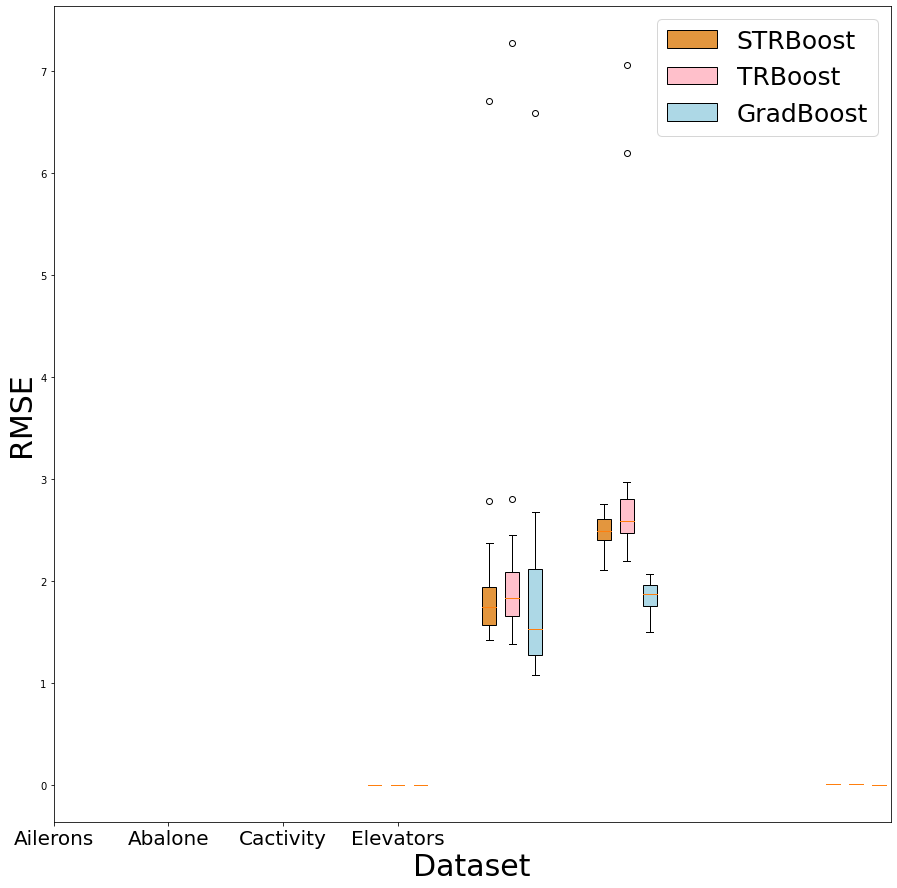

In [5]:
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes


# concrete_RMSE_np = np.array([stradaboost_RMSE_concrete, tradaboost_RMSE_concrete, gbr_RMSE_concrete])
# concrete_RMSE_np = concrete_RMSE_np.transpose()

# housing_RMSE_np = np.array([stradaboost_RMSE_housing, tradaboost_RMSE_housing, gbr_RMSE_housing])
# housing_RMSE_np = housing_RMSE_np.transpose()

# auto_RMSE_np = np.array([stradaboost_RMSE_auto, tradaboost_RMSE_auto, gbr_RMSE_auto])
# auto_RMSE_np = auto_RMSE_np.transpose()

# ailerons_RMSE_np = np.array([stradaboost_RMSE_ailerons, tradaboost_RMSE_ailerons, gbr_RMSE_ailerons])
# ailerons_RMSE_np = ailerons_RMSE_np.transpose()

# # elevators_RMSE_np = np.array([stradaboost_RMSE_elevators, tradaboost_RMSE_elevators, gbr_RMSE_elevators])
# # elevators_RMSE_np = elevators_RMSE_np.transpose()

# abalone_RMSE_np = np.array([stradaboost_RMSE_abalone, tradaboost_RMSE_abalone, gbr_RMSE_abalone])
# abalone_RMSE_np = abalone_RMSE_np.transpose()

# # kinematics_RMSE_np = np.array([stradaboost_RMSE_kinematics, tradaboost_RMSE_kinematics, gbr_RMSE_kinematics])
# # kinematics_RMSE_np = kinematics_RMSE_np.transpose()

# cactivity_RMSE_np = np.array([stradaboost_RMSE_cactivity, tradaboost_RMSE_cactivity, gbr_RMSE_cactivity])
# cactivity_RMSE_np = cactivity_RMSE_np.transpose()


# ###################################################################################################################################

# concrete_R2_np = np.array([stradaboost_R2_concrete, tradaboost_R2_concrete, gbr_R2_concrete])
# concrete_R2_np = concrete_R2_np.transpose()

# housing_R2_np = np.array([stradaboost_R2_housing, tradaboost_R2_housing, gbr_R2_housing])
# housing_R2_np = housing_R2_np.transpose()

# auto_R2_np = np.array([stradaboost_R2_auto, tradaboost_R2_auto, gbr_R2_auto])
# auto_R2_np = auto_R2_np.transpose()

# ailerons_R2_np = np.array([stradaboost_R2_ailerons, tradaboost_R2_ailerons, gbr_R2_ailerons])
# ailerons_R2_np = ailerons_R2_np.transpose()

# # elevators_R2_np = np.array([stradaboost_R2_elevators, tradaboost_R2_elevators, gbr_R2_elevators])
# # elevators_R2_np = elevators_R2_np.transpose()

# abalone_R2_np = np.array([stradaboost_R2_abalone, tradaboost_R2_abalone, gbr_R2_abalone])
# abalone_R2_np = abalone_R2_np.transpose()

# # kinematics_R2_np = np.array([stradaboost_R2_kinematics, tradaboost_R2_kinematics, gbr_R2_kinematics])
# # kinematics_R2_np = kinematics_R2_np.transpose()

# cactivity_R2_np = np.array([stradaboost_R2_cactivity, tradaboost_R2_cactivity, gbr_R2_cactivity])
# cactivity_R2_np = cactivity_R2_np.transpose()

# ###################################################################################################################################

# concrete_RMSE = pd.DataFrame(concrete_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# auto_RMSE = pd.DataFrame(auto_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# housing_RMSE = pd.DataFrame(housing_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# ailerons_RMSE = pd.DataFrame(ailerons_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# # elevators_RMSE = pd.DataFrame(elevators_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# abalone_RMSE = pd.DataFrame(abalone_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# # kinematics_RMSE = pd.DataFrame(kinematics_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# cactivity_RMSE = pd.DataFrame(cactivity_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])

# ###################################################################################################################################

# concrete_R2 = pd.DataFrame(concrete_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# auto_R2 = pd.DataFrame(auto_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# housing_R2 = pd.DataFrame(housing_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# ailerons_R2 = pd.DataFrame(ailerons_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# # elevators_R2 = pd.DataFrame(elevators_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# abalone_R2 = pd.DataFrame(abalone_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# # kinematics_R2 = pd.DataFrame(kinematics_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# cactivity_R2 = pd.DataFrame(cactivity_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])

###################################################################################################################################
############################################## Ablation Study #########################################################

ailerons_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_ailerons, tradaboost_RMSE_ablation_ailerons, gbr_RMSE_ablation_ailerons])
ailerons_RMSE_ablation_np = ailerons_RMSE_ablation_np.transpose()

elevators_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_elevators, tradaboost_RMSE_ablation_elevators, gbr_RMSE_ablation_elevators])
elevators_RMSE_ablation_np = elevators_RMSE_ablation_np.transpose()

abalone_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_abalone, tradaboost_RMSE_ablation_abalone, gbr_RMSE_ablation_abalone])
abalone_RMSE_ablation_np = abalone_RMSE_ablation_np.transpose()

# kinematics_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_kinematics, tradaboost_RMSE_ablation_kinematics, gbr_RMSE_ablation_kinematics])
# kinematics_RMSE_ablation_np = kinematics_RMSE_ablation_np.transpose()

cactivity_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_cactivity, tradaboost_RMSE_ablation_cactivity, gbr_RMSE_ablation_cactivity])
cactivity_RMSE_ablation_np = cactivity_RMSE_ablation_np.transpose()


###################################################################################################################################

ailerons_R2_ablation_np = np.array([stradaboost_R2_ablation_ailerons, tradaboost_R2_ablation_ailerons, gbr_R2_ablation_ailerons])
ailerons_R2_ablation_np = ailerons_R2_ablation_np.transpose()

elevators_R2_ablation_np = np.array([stradaboost_R2_ablation_elevators, tradaboost_R2_ablation_elevators, gbr_R2_ablation_elevators])
elevators_R2_ablation_np = elevators_R2_ablation_np.transpose()

abalone_R2_ablation_np = np.array([stradaboost_R2_ablation_abalone, tradaboost_R2_ablation_abalone, gbr_R2_ablation_abalone])
abalone_R2_ablation_np = abalone_R2_ablation_np.transpose()

# kinematics_R2_ablation_np = np.array([stradaboost_R2_ablation_kinematics, tradaboost_R2_ablation_kinematics, gbr_R2_ablation_kinematics])
# kinematics_R2_ablation_np = kinematics_R2_ablation_np.transpose()

cactivity_R2_ablation_np = np.array([stradaboost_R2_ablation_cactivity, tradaboost_R2_ablation_cactivity, gbr_R2_ablation_cactivity])
cactivity_R2_ablation_np = cactivity_R2_ablation_np.transpose()

###################################################################################################################################

ailerons_RMSE_ablation = pd.DataFrame(ailerons_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
elevators_RMSE_ablation = pd.DataFrame(elevators_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
abalone_RMSE_ablation = pd.DataFrame(abalone_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# kinematics_RMSE_ablation = pd.DataFrame(kinematics_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
cactivity_RMSE_ablation = pd.DataFrame(cactivity_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])

###################################################################################################################################

ailerons_R2_ablation = pd.DataFrame(ailerons_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
elevators_R2_ablation = pd.DataFrame(elevators_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
abalone_R2_ablation = pd.DataFrame(abalone_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# kinematics_R2_ablation = pd.DataFrame(kinematics_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
cactivity_R2_ablation = pd.DataFrame(cactivity_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])

###################################################################################################################################


def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)


plt.figure(figsize = (15,15))

ax = axes()


# bp0 = boxplot(ailerons_RMSE.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# bp1 = boxplot(abalone_RMSE.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# bp2 = boxplot(cactivity_RMSE.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# bp3 = boxplot(kinmeatics_RMSE.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# bp4 = boxplot(elevators_RMSE.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)

# bp0 = boxplot(ailerons_R2.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# bp1 = boxplot(abalone_R2.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# bp2 = boxplot(cactivity_R2.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# bp3 = boxplot(kinmeatics_RMSE.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# bp4 = boxplot(elevators_RMSE.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)


bp0 = boxplot(ailerons_RMSE_ablation.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
bp1 = boxplot(abalone_RMSE_ablation.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
bp2 = boxplot(cactivity_RMSE_ablation.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# bp3 = boxplot(kinmeatics_RMSE_ablation.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
bp4 = boxplot(elevators_RMSE_ablation.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)

# bp0 = boxplot(ailerons_R2_ablation.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# bp1 = boxplot(abalone_R2_ablation.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# bp2 = boxplot(cactivity_R2_ablation.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# # bp3 = boxplot(kinmeatics_RMSE_ablation.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# bp4 = boxplot(elevators_RMSE_ablation.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)



colors = ['#E3963E','pink', 'lightblue'] #, 'lightgreen']
for bplot in (bp0, bp1, bp2, bp4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax.set_xticklabels(['Ailerons', 'Abalone', 'Cactivity', 'Elevators'], fontsize = 20)
ax.set_xticks([2, 7, 12, 17])

# ax.set_yticks([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75])
# ax.set_yticklabels([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75], fontsize = 20)  

ax.set_ylabel("RMSE", fontsize = 30)
ax.set_xlabel("Dataset", fontsize = 30)

ax.legend([bp0["boxes"][0], bp0["boxes"][1], bp0["boxes"][2]], 
          ['STRBoost', 'TRBoost', 'GradBoost'], fontsize = 25) #loc='lower center', )

# plt.savefig("rmse_stdreg")
show()

In [1]:
import proplot as pplt
import numpy as np
import pandas as pd

/Users/shrey/anaconda3/lib/python3.8/site-packages/proplot/__init__.py:9: ProPlotWarning: Rebuilding font cache.
  from .config import *  # noqa: F401 F403


In [3]:
############################## Standard Regression Datasets #################################################################

stradaboost_RMSE_concrete = [6.160569688046794, 5.385056168151057, 11.537280214502667, 6.211790489243431, 10.124198380409222, 8.128429542667254, 6.394846310657595, 5.548771238977392, 5.596593653945762, 5.377695275040092, 7.348602781426588, 5.578949367195352, 6.083334996148067, 6.682357633026466, 6.354939205399708, 8.275790328847574, 6.915687855714617, 11.588639005032698, 8.0626468342028, 6.326092692875173]
tradaboost_RMSE_concrete = [6.541020044640769, 5.02012706206751, 9.169954145177607, 6.435689169158459, 8.88829865240887, 9.281962017215418, 8.875603050920281, 7.025704434153655, 5.13915260104503, 5.72072638391111, 7.369116818231316, 5.675806869960485, 5.75968959381744, 5.928300446961894, 6.428338521308748, 4.758416645321606, 4.5971373434502025, 6.883775231314941, 3.4293437208180224, 5.560616012498886]
kmm_RMSE_concrete = [16.31598678436139, 24.87761850353384, 19.67677092401533, 11.721721099786688, 14.674733461803777, 9.220538443550785, 13.477346699049393, 19.021477216128357, 22.721629633362394, 18.03861118662604, 26.12146861895187, 14.126535189078993, 15.21973502313892, 11.607515947176632, 29.574287505450858, 35.240026660475586, 30.51666500163175, 29.773208715507057, 40.47975577435641, 30.09147217410201]
kliep_RMSE_concrete = [9.127493468753718, 15.692883015236283, 18.218732103555833, 21.09565257548467, 13.767984740677958, 8.200144807846725, 9.3915395940665, 12.731212949014683, 10.504473264072526, 14.12615457318217, 15.44520577984452, 12.022331368672624, 10.727987141225451, 6.5115014066351, 26.58179802798826, 31.550603246331985, 26.607504169005857, 33.33815540541994, 28.19922611846967, 25.180435729935155]
iwkrr_RMSE_concrete = [20.07003732832034, 3.988114324353895, 9.779637685989034, 6.23869987191788, 6.6708341206436925, 10.404389117810204, 10.01714410091622, 6.2486948615174525, 5.816797936313644, 4.167496310679201, 5.496034620668809, 4.599772013897692, 4.215502931187524, 6.197911781314202, 5.782198697525159, 6.537777155464826, 4.997241717259456, 6.954448071017532, 4.324018448449184, 5.235736044224286]


stradaboost_R2_concrete = [0.9399707358784252, 0.7870394255118812, 0.38423250477853016, 0.8132114805051763, 0.6525012177742872, 0.8677802444911202, 0.7396333872634682, 0.6055521352046099, 0.630462152693757, 0.9106468275874966, 0.826038511418632, 0.9026809435894384, 0.9091027196241214, 0.9229916718415824, 0.7851106285769627, 0.6913714537013781, 0.74061361439847, 0.20564332965630988, 0.7273459272844597, 0.7029476211245151]
tradaboost_R2_concrete = [0.9026709048018587, 0.788561771700146, 0.47977703273506345, 0.774401491199043, 0.7662429124401559, 0.7830804731182934, 0.6240945516062166, 0.3137259210401786, 0.7463014608315363, 0.8702706676154053, 0.6771852549545389, 0.7574739773326518, 0.8717814678397086, 0.8430475177461879, 0.6569271139906819, 0.7524267444729598, 0.6897601520227716, 0.34598376715355655, 0.9178146407329959, 0.6876063149946842]
kmm_R2_concrete = [0.613144964915499, 0.5003885030959551, 0.20508351888967497, 0.6083589970891807, 0.6705793639875621, 0.6868287994525731, 0.40530487269651, 0.029334366852617293, 0.43526682675393724, 0.5651671123605255, 0.227636125738626, 0.6796889769721985, 0.4980827022562948, 0.7927254919712137, 0.23847283878468484, 0.031428000964021034, 0.03297159874452097, 0.02790706554678015, 0.005730831556795108, 0.043041215128550296]
kliep_R2_concrete = [0.6531592991461642, 0.7254015597833461, 0.7854286941175819, 0.725744692227366, 0.7653570153638146, 0.7324815517153864, 0.6147531311060808, 0.3520966957654744, 0.036059995415357295, 0.7018912943705412, 0.5832715431775459, 0.8524836349266519, 0.7512170651211949, 0.8646573247313055, 0.3022576003224445, 0.21565873357595694, 0.6568227004354389, 0.1014315369541677, 0.6359464690839852, 0.2984041270994722]
iwkrr_R2_concrete = [0.25940604586146426, 0.8634674259621745, 0.4078417229450757, 0.8678351774797147, 0.813959201040746, 0.8081553562033738, 0.26040046992884786, 0.7897785735283335, 0.6391646117275991, 0.9448060333675046, 0.7918442547639006, 0.881700317788597, 0.8911831525739363, 0.8252633935480108, 0.8009856959858908, 0.5011643393353158, 0.6709018792732043, 0.3131666540787474, 0.8128299855240224, 0.7429707714336812]

#################################################################################################################################################################

stradaboost_RMSE_housing = [3.155749071986295, 2.4227148992447094, 1.512251171049698, 2.2651238680205252, 1.190147402947372, 1.849963794373305, 2.630304756303988, 2.950954565213517, 4.499155611244547, 4.417322082279637, 1.1519719623645732, 7.694135388317863, 4.699740308376972, 4.607576273999947, 2.584440693541144, 2.9631600780906098, 3.054419516277539, 2.3294865323991494, 1.9341179535338384, 1.6114893264861962]
tradaboost_RMSE_housing = [2.930085093854947, 2.4795592632615957, 2.4871970792912754, 2.351101362974913, 1.3242527571549656, 1.101039829635879, 2.4973023559768786, 2.511273816288092, 4.344752012213088, 1.5049638139493715, 1.7614522325046147, 9.478549112615603, 3.4425220581294087, 3.247096764644034, 2.2792773464293874, 3.4102569847034947, 4.436968415359277, 3.0283094672221895, 2.2383299955468687, 3.3902245868270677]
kmm_RMSE_housing = [8.6949372700428, 9.682662771406278, 6.675530813311134, 10.819915818360814, 8.657339105635506, 5.523793789199311, 8.91155417840259, 11.003268712416821, 10.787628874386897, 7.845508689726234, 5.826823767962854, 9.758866708841488, 8.530370226145623, 12.243898282171806, 9.420121641631289, 10.905259328933258, 7.8472004541351446, 11.53975554991979, 3.311118369814115, 6.406472683495275]
kliep_RMSE_housing = [9.831953224855075, 8.69544311393119, 5.367663486847824, 9.9818437961736, 8.798048140266022, 6.274876918158557, 7.521507787565092, 10.433891837653743, 11.418241652091021, 12.02559257948152, 4.148496519578329, 8.281518250012574, 11.617866823361473, 12.73292494908616, 7.117374023883133, 10.992155484358364, 6.281888410941743, 6.482194959224831, 5.568297252656875, 1.3854701134192988]
iwkrr_RMSE_housing = [3.9363398639757317, 5.023037661652506, 4.803939858671789, 6.666978556379079, 1.7358164884356782, 3.460346209815064, 3.2387625573903054, 9.867427705258455, 4.393420263602854, 8.498704749153147, 3.8573412257657087, 15.453736441693097, 7.591249876981768, 6.383893708124643, 17.852567791873202, 4.842579030173577, 2.5457028064228444, 6.869075154002829, 3.771664343633124, 10.02300293104854]


stradaboost_R2_housing = [0.8874628737974639, 0.771018360082448, 0.9483077680698078, 0.8946262403738809, 0.6920679979128109, 0.9029743661449562, 0.6806795785803308, 0.9143517018287176, 0.8758092745557313, 0.882530742216913, 0.7923819556953712, 0.021353612225206067, 0.884724457617565, 0.9711329831806201, 0.982030086050116, 0.7634032032511125, 0.5121439738667023, 0.9012158031956717, 0.9886051010153872, 0.9422952501712774]
tradaboost_R2_housing = [0.6430396557577773, 0.5228792083019617, 0.8734642153877146, 0.8644329820550692, 0.6145794577363025, 0.982930509228014, 0.5209642556993838, 0.931351740265712, 0.7621873075616233, 0.974050501080981, 0.6508811405309212, 0.16858217424764357, 0.8844873284860246, 0.8950898813623029, 0.9734710416980178, 0.6492009316177643, 0.7510573298265828, 0.7834022248535929, 0.9894654696413072, 0.702992099347671]
kmm_R2_housing = [0.41770205207492683, 0.714100682029543, 0.2762087215598127, 0.05944968212190968, 0.019214030964858644, 0.01850943888913765, 0.0037591950507749276, 0.7379077102978581, 0.21930995080899365, 0.6130104095737511, 0.8169158527575459, 0.821734870081924, 0.551352198674291, 0.13552354230363245, 0.48950896260336496, 0.3734063040695569, 0.2656151364410826, 0.40928534265973765, 0.6498735695764309, 0.48665498693405385]
kliep_R2_housing = [0.6527779581566352, 0.7644216230312032, 0.9099281851708977, 0.11943688150822102, 0.032826288416205496, 0.5445526403173931, 0.12639040466582202, 0.6160307528679748, 0.31156630004850006, 0.6169295942347935, 0.7765727649678925, 0.7499802108795359, 0.19932134077982394, 0.8768375553086338, 0.8608392889535238, 0.45632116505755127, 0.47712434843094637, 0.8329702728901514, 0.4357476484566302, 0.8922629193428082]
iwkrr_R2_housing = [0.7737063137815803, 0.7342684317189698, 0.6736670158835412, 0.24608691182681738, 0.6368403109169828, 0.7973594229956321, 0.4149141663387741, 0.44618643147921355, 0.8281096639235493, 0.815986404292722, 0.8414843606580118, 0.5624628538953198, 0.5881668465099743, 0.12947015211394097, 0.02497896520888096, 0.6676224005329529, 0.7005142781214996, 0.9028800624328405, 0.834298304402508, 0.33387921888511374]

#################################################################################################################################################################

stradaboost_RMSE_auto = [0.20601948811461177, 0.5049190379216697, 0.4229154213029683, 0.38813387023892226, 0.44945889021333246, 0.3179378362878423, 0.3883707713056787, 0.16637599801160124, 0.3899011005341449, 1.2031085445897813, 0.319111704603037, 0.5629923898506339, 0.8317266878574766, 0.9658551146450529, 1.2476579145658147, 0.7838307209694246, 0.2651558037444034, 0.3135817650722819, 0.42045685513866066, 0.5943459799296034]
tradaboost_RMSE_auto = [0.16780998079860301, 0.33162669700407055, 0.28666353965625835, 0.6233341654000265, 0.418735804087528, 0.5355014426416531, 0.39927943477728844, 0.21611319519754923, 0.4563123446044063, 1.005103150566817, 0.801351905307372, 0.4972455766662587, 0.9715309289811906, 0.8976950239888788, 1.4703687655527191, 0.6274895026551954, 0.46823182267340585, 0.4471070653393087, 0.4798012315781035, 0.6589863234450216]
kmm_RMSE_auto = [0.6985486274978585, 0.8214676126797688, 0.7514421305012239, 0.6708007046672295, 0.7392233533460094, 0.7979943022695238, 0.5560162070872517, 0.377834201048935, 0.5163842170307349, 1.2214604338610613, 0.27926264366887354, 0.8197770728296725, 0.9251795674972355, 0.7434870590526138, 1.3469981694537014, 0.6315909226423323, 0.5923919517360873, 0.35972359739544696, 0.6767712606146137, 1.388478469155192]
kliep_RMSE_auto = [1.0984217007687935, 0.6470777536591259, 0.8753738235131581, 0.7098242417263779, 0.7942126187284614, 0.8791883697909675, 0.6461324793662547, 0.4574354492563662, 0.707035564868901, 1.5422030173977284, 0.5507163135863009, 0.8723477830935499, 0.9840829502574183, 1.1199854229437385, 1.2868544379600448, 1.2450796533850197, 0.5083450407660289, 0.8802908534883641, 0.8647783945185638, 1.2304945462156585]
iwkrr_RMSE_auto = [0.5167320477019498, 0.4025134758811422, 0.26531505739249034, 0.36640895331559253, 0.44057059590288217, 0.49193060847211945, 0.5428149386866571, 0.24490467011908243, 0.4791052941887234, 0.6996077040323616, 0.34089008287875794, 0.5467309051903643, 0.8010450846549195, 0.9827993442739485, 1.1019085011517415, 0.42359201680174485, 0.4128093603855924, 0.14528032960478363, 0.5049947124116744, 0.49922303002291424]


stradaboost_R2_auto = [0.9528675565811674, 0.8046478398231433, 0.6721790449511023, 0.5814961458758225, 0.867591514874495, 0.958274528580667, 0.919889793663509, 0.7774288970033402, 0.851540572496318, 0.017144319989622434, 0.3098047166901955, 0.6399693481611328, 1.720819838780302e-06, 0.8464773640838797, 0.007932146051169561, 0.19955348605438153, 0.6365245129232856, 0.5727873825878117, 0.022794850102426018, 0.8421430966523048]
tradaboost_R2_auto = [0.9970437380201722, 0.4939793820787119, 0.7718532860581973, 0.14060016188398583, 0.8561389809067342, 0.782092925794963, 0.8401970455831462, 0.5758214495446975, 0.4884757322536343, 0.30060246369441135, 0.08420788411407132, 0.6726678025376231, 0.2737599467473534, 0.5671617445333537, 0.0006438301292862012, 0.060094447962883386, 0.008051274987383682, 0.25137662675270617, 0.019516539096471785, 0.5715703972007875]
kmm_R2_auto = [0.6616775143545652, 0.3799887425605703, 0.4792340245162432, 0.10765863223792922, 0.8447393760100548, 0.7676065146045152, 0.6993770603125012, 0.5523219110500399, 0.37418360940805295, 6.575024580466884e-05, 0.6303613855195697, 0.643176808780509, 0.05776167082036713, 0.777641802814463, 0.008240573547252491, 0.29888695281106653, 0.43285197448741963, 0.5029216760954641, 0.0350141343498556, 0.13403368191842482]
kliep_R2_auto = [0.05725205888814348, 0.23734788099199564, 1.6014692985663532e-06, 0.026437688510040552, 0.754218788360617, 0.4947685899551858, 0.6043956385861913, 0.08731141090276766, 0.3264266304347826, 0.05638586956521742, 0.04358342136358884, 0.006612013521691805, 0.1421417276563583, 0.0191925673030692, 0.11192346686084516, 0.006877040564147216, 0.37422603445671637, 0.285278638371602, 0.12150133671266738, 0.120483037192564]
iwkrr_R2_auto = [0.7436130684207419, 0.0406739199496014, 0.881361694513919, 0.806366162537984, 0.9282985710936419, 0.9242856924858668, 0.7875804667994849, 0.8438845768434655, 0.4290377865887559, 0.3905970995269758, 0.7141551832006939, 0.6900304665180985, 0.12424281191610838, 0.6032491968474238, 0.13513445120104367, 0.25805439083862053, 0.5822115479978621, 0.9792862630901723, 0.06521467038197802, 0.8237085565829456]

#################################################################################################################################################################


stradaboost_RMSE_ailerons = [0.00018653840674816383, 0.000189810904166031, 0.0001873658474340575, 0.00019085531291090202, 0.00019114973737215766, 0.00019043394736071044, 0.0001888067344590376, 0.00018804314636032746, 0.00018824536253958136, 0.0001927143957780782, 0.00019012721685156454, 0.00018968020765799165, 0.00019056782946398726, 0.00019100182687938224, 0.00018898277228031844, 0.00019125494130398105, 0.00018900343933637447, 0.00018761671245519221, 0.0001917718719682461, 0.00019119037172070315]
tradaboost_RMSE_ailerons = [0.00020681854607685043, 0.00020651638834517068, 0.00020383301674030212, 0.00020683286942591622, 0.0002063692404633311, 0.00020680161826133934, 0.00020364534019528337, 0.00020411402277487162, 0.000206621642615898, 0.00020635976828406653, 0.00020632514249374563, 0.00020637385249563253, 0.00020668712168823728, 0.00020655433214305843, 0.00020393791473106047, 0.0002035921161816063, 0.00020649446155580529, 0.00020694081790597585, 0.0002066865427000793, 0.00020345248683203583]
kmm_RMSE_ailerons = [0.0002176185934069571, 0.00022048481114022916, 0.000219671676174835, 0.00021804468430527035, 0.00022373843863469198, 0.00021629197380694032, 0.0002133248267505784, 0.00021581137349908225, 0.00021965649765961552, 0.00022204422139079883, 0.00021975939711098554, 0.00021466800187917636, 0.00021579836467526154, 0.00022206327810661203, 0.0002215497517129746, 0.00021951026883952707, 0.00022075754065502086, 0.00022059696540538363, 0.00021678293829548902, 0.00022458674464969627]
kliep_RMSE_ailerons = [0.00020999278474953797, 0.00021527243370631646, 0.00020665203363682505, 0.0002113343883039415, 0.00020835684054873436, 0.00020924117525323956, 0.00020519896542371409, 0.0002053416130171297, 0.00021348582386044256, 0.00020522629434631284, 0.00020866283322240907, 0.00020917735491243894, 0.00021052661115550955, 0.000207048536655927, 0.00020746839958677725, 0.00021123312578124673, 0.00020578837345668158, 0.00021568758800543007, 0.0002070457943042368, 0.0002262040197830858]
iwkrr_RMSE_ailerons = [0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465, 0.00025472415972571465]


stradaboost_R2_ailerons = [0.7994431446922216, 0.79291772428616, 0.7959727769704424, 0.7919700807049479, 0.7885973254825356, 0.7924961778829837, 0.7915936882136941, 0.795523949236591, 0.7945970418686013, 0.7897947537475372, 0.7934872816059522, 0.7915548650511036, 0.792148766070684, 0.788703506201112, 0.7906655665234325, 0.7924082390032214, 0.7917252298714027, 0.7959090954930488, 0.7854179709888617, 0.7903470071690677]
tradaboost_R2_ailerons = [0.7389481264149564, 0.7396235798682649, 0.745455458309211, 0.7389356605217205, 0.740037235075707, 0.7390041251533895, 0.7458853651842333, 0.7447896713826876, 0.7394059008386079, 0.7400556736305642, 0.7401337947231849, 0.7400038569756268, 0.7392396724376006, 0.7395462943100826, 0.7451917559072191, 0.7460176753457975, 0.739764541432313, 0.7387092421464678, 0.7392852245341871, 0.7463458123254262]
kmm_R2_ailerons = [0.7127176746242715, 0.7058620653614558, 0.7067159131668755, 0.7105961128333732, 0.6986623628317604, 0.7175252510659074, 0.7226512192589549, 0.7179036216116894, 0.7093587946616182, 0.7057528059846365, 0.7088121072672037, 0.7224423185637676, 0.7177141972058275, 0.6996830416142861, 0.7037639637954303, 0.7077589563444835, 0.7074751042939532, 0.7034459247408714, 0.7154865331742137, 0.693542414014317]
kliep_R2_ailerons = [0.7289493592590994, 0.71741439844859, 0.7389865596008037, 0.7259623928442179, 0.7358142802464356, 0.7328869180813143, 0.7421258199983274, 0.741741225998066, 0.7198138120020428, 0.7418762885121102, 0.7351041523132492, 0.73116401806052, 0.7304200536087194, 0.7372856661218353, 0.735405995769253, 0.726534741356522, 0.7409251616074239, 0.7178740723427846, 0.7377813618912076, 0.6860739086860181]
iwkrr_R2_ailerons = [0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911, 0.6161331120693911]


#################################################################################################################################################################

stradaboost_RMSE_elevators = [0.002994308060777424, 0.0031586784175449143, 0.0030899128906734154, 0.0029370613376077503, 0.002979925497627271, 0.003239176309770462, 0.00300647740216143, 0.003132132991311323, 0.0029844042782061837, 0.0031057849944312378, 0.002987418041278848, 0.002947721785694048, 0.0030862998031953364, 0.0028720097711430388, 0.002992840798409856, 0.002970085896208511, 0.003027284347944437, 0.003047229641552924, 0.0031942036399121177, 0.0030683028857859096]
tradaboost_RMSE_elevators = [0.004235960974722378, 0.0042532980185931105, 0.00424928425978152, 0.00423064506904706, 0.004229359136246281, 0.004229399458957712, 0.004257522157982159, 0.004272599373216897, 0.004229756431819963, 0.004391997594254764, 0.004213225304044787, 0.004251404880964993, 0.004237451430065547, 0.00423533847501916, 0.004224446056963165, 0.004262692696212362, 0.00427239590670089, 0.004253822044230903, 0.004252250988171132, 0.0042670747606676175]
kmm_RMSE_elevators = [0.0042257942743844906, 0.0044501917988782475, 0.004231403695381783, 0.004314842781397091, 0.00429611372175768, 0.0043384543464840535, 0.004321506635870035, 0.0042584772879075555, 0.0041318376858425175, 0.004269922583681625, 0.004346153029252612, 0.0043608589382983275, 0.00450322397350419, 0.004401097753328711, 0.004430851664161338, 0.004405106612299609, 0.0043156499352660265, 0.004346057018804323, 0.004359149467221321, 0.004339002068128887]
kliep_RMSE_elevators = [0.004127620964356226, 0.004090793917115226, 0.004066946317623287, 0.004079138767463929, 0.004073348933436032, 0.004072619873902096, 0.004100278062174789, 0.004085958307623256, 0.00411144463574106, 0.004070844080767724, 0.00410522940662777, 0.004089833722026566, 0.004070792164044315, 0.004103442593213254, 0.004080850020037169, 0.004118240786962213, 0.004091074930287261, 0.004079449458866616, 0.0041167224031150775, 0.00411178799075665]
iwkrr_RMSE_elevators = [0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279, 0.004015678829678279]


stradaboost_R2_elevators = [0.8199507310239796, 0.821083399390994, 0.8119872066950584, 0.8214132857989649, 0.8228260886680355, 0.8220660292097063, 0.8234383732919764, 0.8084758742208555, 0.8191318819350368, 0.8145416794310836, 0.8216833392530357, 0.8227030583806363, 0.824203445461412, 0.8291828711123767, 0.8173837047553305, 0.8222621822343771, 0.8177775776145914, 0.825013887026712, 0.7975790135171341, 0.8265387983441588]
tradaboost_R2_elevators = [0.5695237913761826, 0.5664879912827565, 0.5668730999599445, 0.5705440879983508, 0.5704949220464953, 0.5704858668555313, 0.5651252515440068, 0.5634632387653482, 0.5704190193066773, 0.5432596988276073, 0.5735998024060381, 0.5669158394224875, 0.5689307309056442, 0.5695322523951819, 0.5714517808021735, 0.5653033524046835, 0.562530129718536, 0.5659629266770204, 0.5667259109208621, 0.5643012581549817]
kmm_R2_elevators = [0.5727979607727972, 0.5430316465268851, 0.5752445262429313, 0.561683026391213, 0.5681689834225716, 0.5541629444625671, 0.562645016471114, 0.5650541358541665, 0.590142175760054, 0.5622876953357206, 0.5478429012208655, 0.5513582706470395, 0.5269797229950594, 0.5442960344371157, 0.5406179384049812, 0.5454761231262545, 0.5622882404410384, 0.5536314635276172, 0.5583297598936594, 0.5547337105026557]
kliep_R2_elevators = [0.5932155884086664, 0.5983819400669677, 0.6036458707132929, 0.6002993178236864, 0.603813754450842, 0.6026789499042311, 0.5978879388159104, 0.6005262245058662, 0.59554252750576, 0.6020199065317415, 0.5966826348562796, 0.5994854280451706, 0.6019664306595605, 0.598229149113084, 0.6009043318508065, 0.5945826988251064, 0.5994846548358633, 0.6011751496369938, 0.5957514522523039, 0.5951663020879889]
iwkrr_R2_elevators = [0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666, 0.6196480723530666]


#################################################################################################################################################################

stradaboost_RMSE_abalone = [1.4998097152267589, 1.8162314223167797, 2.095896899220678, 2.782995910293012, 1.6713044531991006, 1.7085902984893293, 1.7711095331330846, 1.7775509731209713, 1.4719510937976386, 1.417697114433143, 1.8310863168676341, 2.3723851550253663, 1.4753089956416976, 1.4352865704743354, 1.585213323437924, 1.930806894951238, 1.6300976733946837, 1.9777275810505046, 1.598596882271576, 6.70593226693369]
tradaboost_RMSE_abalone = [1.4312725505338255, 1.890274886070674, 1.8914627820468175, 3.3259271834855673, 1.7941492032884396, 1.906524030341246, 1.619550054564094, 1.6265393700922177, 1.6495580663529212, 1.4715631610224822, 1.6362725730657035, 2.068976339943138, 2.3041492683264053, 1.2275142428012118, 1.4366394841434167, 1.6743631646627484, 2.1152435712989273, 1.4310508059715614, 1.9855702455915705, 2.2863439092520927]
kmm_RMSE_abalone = [3.900625211647661, 6.5164741900321435, 5.2416708639002385, 3.271193748165823, 4.436337732650126, 4.693767552435624, 4.526723550726614, 4.725444386602446, 4.243930778115092, 4.692009589226434, 4.606194094865812, 4.7587250746977565, 3.394455622880373, 4.644334655482883, 3.830600355987815, 4.466948503822058, 4.471506390959044, 5.20083862037358, 4.934159165819698, 4.193239824562562]
kliep_RMSE_abalone = [4.638269369068439, 6.274033363794443, 4.3198749979199285, 2.8846539780164364, 4.587947987969623, 4.9620319456699, 5.54845285101323, 4.108684479797539, 4.415880238611869, 4.792520659373752, 4.746387309346844, 4.511901611881604, 4.4554373239950165, 4.678744160275279, 4.4618278126640485, 4.602347066104562, 3.737616041420534, 4.821983278981386, 4.909273285560361, 4.7955508018953426]
iwkrr_RMSE_abalone = [1.2569276311952098, 1.7238311819130978, 1.887838616618205, 3.192367293513587, 1.5545266782541576, 1.2239295618087789, 1.2115488816862963, 1.5209957768045903, 1.147559504323775, 1.1912630220394504, 1.3018314424569601, 1.8803711947542376, 2.310103770480499, 1.0483445125378943, 1.0975898271800353, 1.532128607403789, 1.9195709399191114, 1.1009177532234742, 1.944587179977554, 1.2758011915233198]


stradaboost_R2_abalone = [0.5821170600076994, 0.5219044058329887, 0.5023839637970224, 0.3597438924831273, 0.5596693913022083, 0.4380588009843879, 0.26742413521105424, 0.3576282583797772, 0.29474534610066344, 0.4917738994081539, 0.39924006241949184, 0.47558570969461694, 0.6487533368448863, 0.564041002651409, 0.46050218505733187, 0.4965248961222965, 0.5217608543963609, 0.2776639604216498, 0.45192908936236353, 0.07337886613315295]
tradaboost_R2_abalone = [0.5835238559641075, 0.49239800242877724, 0.5541651834625402, 0.1984636090841293, 0.5437001816242056, 0.2487755330668291, 0.5435487223393739, 0.3171840748062478, 0.21472732237355036, 0.4249306076788884, 0.46997893301847804, 0.34057063400249266, 0.4944089512940969, 0.522364586287356, 0.48962080706230654, 0.4425073525410472, 0.4623260017037914, 0.6007155932269538, 0.3314683855470182, 0.1432776830902255]
kmm_R2_abalone = [0.10872270812154931, 0.009482842122528104, 0.003058237515682942, 0.20865885306361565, 1.8955693954039835e-05, 0.0716610346327112, 0.11664617520584043, 0.00014367904958737212, 0.00018084315020081796, 0.00019464393662408522, 0.07544365784334638, 0.04421468471036501, 0.21352531027075197, 0.003984928119289812, 0.10768517441159098, 0.003164029937347847, 2.3683795634852924e-06, 0.005132881887600721, 0.0011917853214028396, 0.10084695274180179]
kliep_R2_abalone = [3.789953580596088e-05, 0.17717338410843886, 0.023781340335870385, 0.3168027323584743, 1.1222817074033792e-05, 0.058409141481508206, 0.2262696031574158, 0.00013292396838322323, 0.029552436215715936, 0.017719647476955185, 0.06218884169681649, 0.00045805118091857885, 0.0516023726861819, 0.15006795600903985, 0.0635287758183088, 0.0004908253036277581, 0.17602870187712186, 7.90183750805553e-05, 0.002118048394990032, 0.0004353936864281385]
iwkrr_R2_abalone = [0.5989218187924089, 0.5424841925511258, 0.5475506318769441, 0.2377982136849368, 0.6528473417339251, 0.2615421992545685, 0.46325799881221896, 0.14636055924912, 0.2514199367668107, 0.41830917801334017, 0.5378400761237409, 0.3740399548316379, 0.540364494083113, 0.4524388117542452, 0.5302484519820065, 0.5144289340212754, 0.617736150767506, 0.5424035496298244, 0.3553760088518439, 0.36471886519645885]


#################################################################################################################################################################

stradaboost_RMSE_kinematics = [0.1631373193278528, 0.1516349433096866, 0.1694200517050572, 0.16600897885041543, 0.17167691607246438, 0.16121316415466821, 0.15912089974516164, 0.1628905701595327, 0.15426885784556488, 0.14814395784574763, 0.15452005287235482, 0.15787778864455224, 0.15852398018529237, 0.16287091592460828, 0.15715984523958493, 0.15345429748652908, 0.1782241443385378, 0.1682208897147962, 0.16199010883601192, 0.2652141954792245]
tradaboost_RMSE_kinematics = [0.16386342963105477, 0.14973421150473964, 0.17020251283183155, 0.18005335812476686, 0.17339254515732253, 0.17299677656388374, 0.17406071202280785, 0.16457432173978623, 0.164975165574514, 0.18090395683438726, 0.15078632061289363, 0.15087890387057476, 0.15212834705955194, 0.17608881421299705, 0.16968458220646884, 0.16345390065529547, 0.17025474559355513, 0.18148089480471902, 0.17735815430175156, 0.17660698682517628]
kmm_RMSE_kinematics = [0.28026156791939116, 0.2452244544862011, 0.2768221164992613, 0.2676929086009401, 0.25702327282654946, 0.2734852727414004, 0.2510037027897075, 0.25419035623705044, 0.2543146342599023, 0.2561676272144745, 0.2619001750247897, 0.29386922909330376, 0.2566614971787848, 0.26395838970458807, 0.26696339475963454, 0.24256112880729738, 0.25308948489771854, 0.286560523249455, 0.26396945376522496, 0.23363789467660423]
kliep_RMSE_kinematics = [0.2761881408085855, 0.2378186276606193, 0.26260052165007824, 0.2577288820958806, 0.2618039156761075, 0.26466428389696395, 0.2491506523238552, 0.24509182531821844, 0.2577420137095188, 0.2577669293376428, 0.24224316190867248, 0.28465282442098677, 0.24305684602722252, 0.25606594209290007, 0.2664145056183054, 0.2522921725646717, 0.2455159991598527, 0.2775938580488408, 0.26228965448190655, 0.23893182805254087]
iwkrr_RMSE_kinematics = [0.10146016450216745, 0.10549793512869493, 0.0975333881218431, 0.10106405722336427, 0.11014854332414126, 0.10945317455849154, 0.11472165943081725, 0.10491309644332149, 0.09560257317433826, 0.10514605498280469, 0.10336228893325826, 0.0939714973601419, 0.0989919812561095, 0.10517950816405605, 0.10254771809360069, 0.1002864610294512, 0.1149394462814939, 0.1012993586149398, 0.11096469064722445, 0.10012283930537197]


stradaboost_R2_kinematics = [0.6141982664959197, 0.7331470645783383, 0.6306770132520167, 0.588469720828642, 0.6355995522411462, 0.6252777549152667, 0.6331763539883001, 0.6145202255577453, 0.6022074338024267, 0.7201525609433665, 0.623322833341073, 0.5790351118968612, 0.535901696661968, 0.5663952232873116, 0.5931814466048513, 0.643752179005171, 0.5915988522116141, 0.5982116977357478, 0.606499678035207, 0.15719145877265225]
tradaboost_R2_kinematics = [0.5916336512581157, 0.7291927461307379, 0.5825380002381263, 0.494415277976975, 0.5462840981055812, 0.6317771931723815, 0.4630044081075447, 0.5449863245975171, 0.5605880727816586, 0.4857566904279455, 0.6333482556443955, 0.6502527590337912, 0.45860509263742566, 0.553658712623355, 0.453163305949092, 0.5115701723439828, 0.5771870253961963, 0.510004437022482, 0.5569683901266973, 0.4565209914769184]
kmm_R2_kinematics = [0.12528541673598106, 0.2842656524611361, 0.11207256683971482, 0.156530522926203, 0.20956471080259478, 0.22392210568039211, 0.14027873202259442, 0.1768829861062392, 0.17017692990873237, 0.19049850183244854, 0.16463309526730274, 0.0627369955990145, 0.0797783262898968, 0.15763265454383799, 0.07151633606205675, 0.2009670883470373, 0.20978103597652817, 0.06768710483924072, 0.17689694664517866, 0.22090107550189214]
kliep_R2_kinematics = [0.1334600268174249, 0.313553833478348, 0.17102434235129554, 0.16500753438354848, 0.18971699173040948, 0.2911383373753947, 0.16571658467570005, 0.17171090529594008, 0.1528000919328094, 0.1804604381198823, 0.20444656901428945, 0.0679491537369047, 0.08885352779373347, 0.1904883470041548, 0.07908204161688695, 0.13259711129695864, 0.28040912306812726, 0.09733403806551526, 0.18699557744607376, 0.2068440903630765]
iwkrr_R2_kinematics = [0.8562690309504069, 0.8691868347172322, 0.8751431345628624, 0.8564268309465782, 0.8301133373440202, 0.8596202634210297, 0.7817250362138527, 0.8272156501921494, 0.8637203489247668, 0.8357853613391079, 0.8363214845018525, 0.8678347435294228, 0.7779999709680568, 0.8564328357242534, 0.8156763008365974, 0.831648283655722, 0.8200957662902757, 0.8617074839476236, 0.8435064031969667, 0.8352610036613946]

#################################################################################################################################################################

stradaboost_RMSE_cactivity = [2.6186617707787057, 2.6159304095258746, 2.305655221463425, 2.286693451050622, 2.4407287618657896, 2.750041727772971, 2.4052096465625996, 2.375339909084825, 2.1071420933127882, 2.4710156796403653, 2.5004399589856425, 2.7265901630007545, 2.6652046927599313, 2.2437764671173466, 2.5094200241520523, 2.4770057257617544, 2.5692084860495776, 2.552654584603582, 2.6087811330529305, 2.4605433795977785]
tradaboost_RMSE_cactivity = [2.974364983450536, 2.8386225606024946, 2.5688433337336827, 2.9784953062109985, 2.4337502103105435, 2.881959812721326, 2.5195713591073314, 2.462417441887926, 2.6417051200666504, 2.3914609372935387, 2.834158919223588, 2.9518825572366145, 2.717115569404248, 2.3069658933152217, 2.7808900214306216, 2.8761605033937205, 2.7591701086596396, 2.587466284816961, 2.830020528477602, 2.4411657670458045]
kmm_RMSE_cactivity = [8.698063384845431, 9.692793423546496, 6.360476061712572, 6.586096810488778, 8.808498726611722, 8.3039947916269, 9.603425778089616, 8.499714596638727, 6.661416645598211, 8.8942829146125, 7.9888690464690395, 10.187707178546741, 6.817327514086337, 7.161477200759147, 9.861598537741852, 9.530794972518859, 6.516724811794777, 8.567958772768412, 7.169696869961522, 8.810499987837352]
kliep_RMSE_cactivity = [7.2744580439623485, 7.063105556738367, 6.8573769087670104, 6.909756925595661, 6.912461930551689, 6.732132329419341, 6.698611541707201, 7.120819470017383, 7.08640576815207, 14.411616610550748, 6.985217125480597, 7.179536863745755, 7.59580355067651, 7.571735776341178, 7.072453165976128, 7.240426076930266, 7.265541528465242, 7.06424847937448, 7.680823509117793, 7.169120641535854]
iwkrr_RMSE_cactivity = [7.836511686811998, 10.984604473263902, 4.543466094440659, 10.028428028030744, 8.924704832589557, 9.355833852349937, 9.98716387430811, 6.478551964091381, 6.860553711477892, 6.1814862749053345, 11.935627863341912, 11.443989380353633, 8.290723288127147, 5.30734031508167, 11.032128591949547, 6.1812775774556075, 12.219895561062739, 5.434335018565357, 9.036826127716104, 13.490541557992128]


stradaboost_R2_cactivity = [0.9697618214250323, 0.9471268238534477, 0.9537408874275689, 0.9811896394867949, 0.9863121196304444, 0.98029208142645, 0.8988257313662421, 0.9702058099595829, 0.9814023873846419, 0.9765031739023816, 0.8880733092788969, 0.9422785935234765, 0.9670349673979034, 0.9557847612158992, 0.8352212434957901, 0.9866359960823643, 0.9760553234882533, 0.8610307947012773, 0.9478487676618945, 0.9809250287427717]
tradaboost_R2_cactivity = [0.9576502114133822, 0.9288206518603569, 0.9355649075793303, 0.9643648274499126, 0.9827794480109617, 0.9763801288668895, 0.8753831550221396, 0.9664025228128864, 0.9675465134171953, 0.9755051151176428, 0.8373836512247603, 0.9266424777418726, 0.9586739574858707, 0.9519211842905118, 0.7785287106490205, 0.9794910300847643, 0.9663933561571955, 0.8501264757644221, 0.9293959712993723, 0.9790860823185291]
kmm_R2_cactivity = [0.8692429426713636, 0.7773677670142456, 0.8566000721887137, 0.9225627993581029, 0.9404235357082213, 0.9630181472252599, 0.6425986375886595, 0.8872828073497537, 0.8992289726970153, 0.8868825460687396, 0.7046168691221486, 0.7781982468516121, 0.8874015286548388, 0.8437940113452924, 0.5416311178232068, 0.9445942991266736, 0.9304782544450204, 0.5893804818186291, 0.8237389380081488, 0.891406255157072]
kliep_R2_cactivity = [0.8606102906748521, 0.8890066924935054, 0.9265812025811767, 0.9394388879220028, 0.9484001035975352, 0.963919835099298, 0.9298592773153196, 0.8084380298448022, 0.9267276964166979, 0.8831189916007374, 0.9317209591562994, 0.7607764150957506, 0.8537975155646915, 0.914003844981877, 0.8986332617708673, 0.6393533244492814, 0.8268931317129901, 0.9585493928341818, 0.9158825744482538, 0.7318745174328396]
iwkrr_R2_cactivity = [0.7329017723359433, 0.4524776048769027, 0.837481735392256, 0.6876910987718737, 0.7903508982513116, 0.7965705214182557, 0.4458919392288876, 0.8104833019296993, 0.7750242073607347, 0.8644584716484999, 0.4188864025295185, 0.5281636577968479, 0.7105110418995816, 0.7848135814938076, 0.2327481706182724, 0.9010441443242722, 0.5782114927184486, 0.725682721146638, 0.6172167837445353, 0.5751300502473516]



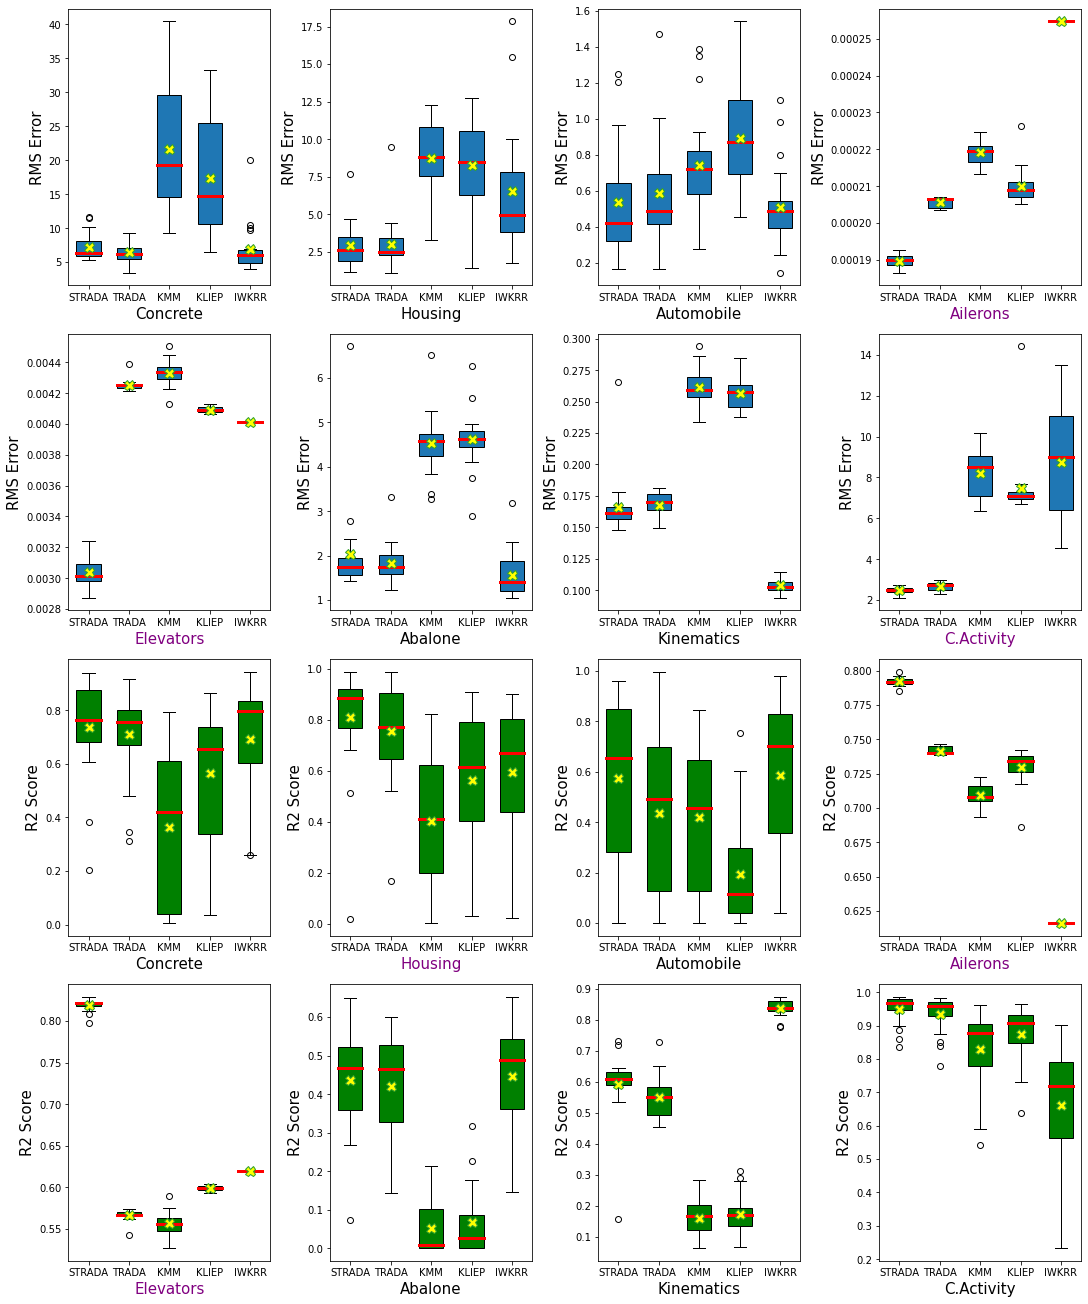

In [8]:
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes


concrete_RMSE_np = np.array([stradaboost_RMSE_concrete, tradaboost_RMSE_concrete, kmm_RMSE_concrete, kliep_RMSE_concrete, iwkrr_RMSE_concrete])
concrete_RMSE_np = concrete_RMSE_np.transpose()

housing_RMSE_np = np.array([stradaboost_RMSE_housing, tradaboost_RMSE_housing, kmm_RMSE_housing, kliep_RMSE_housing, iwkrr_RMSE_housing])
housing_RMSE_np = housing_RMSE_np.transpose()

auto_RMSE_np = np.array([stradaboost_RMSE_auto, tradaboost_RMSE_auto, kmm_RMSE_auto, kliep_RMSE_auto, iwkrr_RMSE_auto])
auto_RMSE_np = auto_RMSE_np.transpose()

ailerons_RMSE_np = np.array([stradaboost_RMSE_ailerons, tradaboost_RMSE_ailerons, kmm_RMSE_ailerons, kliep_RMSE_ailerons, iwkrr_RMSE_ailerons])
ailerons_RMSE_np = ailerons_RMSE_np.transpose()

elevators_RMSE_np = np.array([stradaboost_RMSE_elevators, tradaboost_RMSE_elevators, kmm_RMSE_elevators, kliep_RMSE_elevators, iwkrr_RMSE_elevators])
elevators_RMSE_np = elevators_RMSE_np.transpose()

abalone_RMSE_np = np.array([stradaboost_RMSE_abalone, tradaboost_RMSE_abalone, kmm_RMSE_abalone, kliep_RMSE_abalone, iwkrr_RMSE_abalone])
abalone_RMSE_np = abalone_RMSE_np.transpose()

kinematics_RMSE_np = np.array([stradaboost_RMSE_kinematics, tradaboost_RMSE_kinematics, kmm_RMSE_kinematics, kliep_RMSE_kinematics, iwkrr_RMSE_kinematics])
kinematics_RMSE_np = kinematics_RMSE_np.transpose()

cactivity_RMSE_np = np.array([stradaboost_RMSE_cactivity, tradaboost_RMSE_cactivity, kmm_RMSE_cactivity, kliep_RMSE_cactivity, iwkrr_RMSE_cactivity])
cactivity_RMSE_np = cactivity_RMSE_np.transpose()


###################################################################################################################################

concrete_R2_np = np.array([stradaboost_R2_concrete, tradaboost_R2_concrete, kmm_R2_concrete, kliep_R2_concrete, iwkrr_R2_concrete])
concrete_R2_np = concrete_R2_np.transpose()

housing_R2_np = np.array([stradaboost_R2_housing, tradaboost_R2_housing, kmm_R2_housing, kliep_R2_housing, iwkrr_R2_housing])
housing_R2_np = housing_R2_np.transpose()

auto_R2_np = np.array([stradaboost_R2_auto, tradaboost_R2_auto, kmm_R2_auto, kliep_R2_auto, iwkrr_R2_auto])
auto_R2_np = auto_R2_np.transpose()

ailerons_R2_np = np.array([stradaboost_R2_ailerons, tradaboost_R2_ailerons, kmm_R2_ailerons, kliep_R2_ailerons, iwkrr_R2_ailerons])
ailerons_R2_np = ailerons_R2_np.transpose()

elevators_R2_np = np.array([stradaboost_R2_elevators, tradaboost_R2_elevators, kmm_R2_elevators, kliep_R2_elevators, iwkrr_R2_elevators])
elevators_R2_np = elevators_R2_np.transpose()

abalone_R2_np = np.array([stradaboost_R2_abalone, tradaboost_R2_abalone, kmm_R2_abalone, kliep_R2_abalone, iwkrr_R2_abalone])
abalone_R2_np = abalone_R2_np.transpose()

kinematics_R2_np = np.array([stradaboost_R2_kinematics, tradaboost_R2_kinematics, kmm_R2_kinematics, kliep_R2_kinematics, iwkrr_R2_kinematics])
kinematics_R2_np = kinematics_R2_np.transpose()

cactivity_R2_np = np.array([stradaboost_R2_cactivity, tradaboost_R2_cactivity, kmm_R2_cactivity, kliep_R2_cactivity, iwkrr_R2_cactivity])
cactivity_R2_np = cactivity_R2_np.transpose()

###################################################################################################################################

concrete_RMSE = pd.DataFrame(concrete_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
auto_RMSE = pd.DataFrame(auto_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
housing_RMSE = pd.DataFrame(housing_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
ailerons_RMSE = pd.DataFrame(ailerons_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
elevators_RMSE = pd.DataFrame(elevators_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
abalone_RMSE = pd.DataFrame(abalone_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
kinematics_RMSE = pd.DataFrame(kinematics_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])
cactivity_RMSE = pd.DataFrame(cactivity_RMSE_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'kmm_RMSE', 'kliep_RMSE', 'iwkrr_RMSE'])

###################################################################################################################################

concrete_R2 = pd.DataFrame(concrete_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
auto_R2 = pd.DataFrame(auto_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
housing_R2 = pd.DataFrame(housing_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
ailerons_R2 = pd.DataFrame(ailerons_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
elevators_R2 = pd.DataFrame(elevators_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
abalone_R2 = pd.DataFrame(abalone_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
kinematics_R2 = pd.DataFrame(kinematics_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])
cactivity_R2 = pd.DataFrame(cactivity_R2_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'kmm_R2', 'kliep_R2', 'iwkrr_R2'])

###################################################################################################################################
# ############################################## Ablation Study #########################################################

# ailerons_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_ailerons, tradaboost_RMSE_ablation_ailerons, gbr_RMSE_ablation_ailerons])
# ailerons_RMSE_ablation_np = ailerons_RMSE_ablation_np.transpose()

# elevators_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_elevators, tradaboost_RMSE_ablation_elevators, gbr_RMSE_ablation_elevators])
# elevators_RMSE_ablation_np = elevators_RMSE_ablation_np.transpose()

# abalone_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_abalone, tradaboost_RMSE_ablation_abalone, gbr_RMSE_ablation_abalone])
# abalone_RMSE_ablation_np = abalone_RMSE_ablation_np.transpose()

# # kinematics_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_kinematics, tradaboost_RMSE_ablation_kinematics, gbr_RMSE_ablation_kinematics])
# # kinematics_RMSE_ablation_np = kinematics_RMSE_ablation_np.transpose()

# cactivity_RMSE_ablation_np = np.array([stradaboost_RMSE_ablation_cactivity, tradaboost_RMSE_ablation_cactivity, gbr_RMSE_ablation_cactivity])
# cactivity_RMSE_ablation_np = cactivity_RMSE_ablation_np.transpose()


# ###################################################################################################################################

# ailerons_R2_ablation_np = np.array([stradaboost_R2_ablation_ailerons, tradaboost_R2_ablation_ailerons, gbr_R2_ablation_ailerons])
# ailerons_R2_ablation_np = ailerons_R2_ablation_np.transpose()

# elevators_R2_ablation_np = np.array([stradaboost_R2_ablation_elevators, tradaboost_R2_ablation_elevators, gbr_R2_ablation_elevators])
# elevators_R2_ablation_np = elevators_R2_ablation_np.transpose()

# abalone_R2_ablation_np = np.array([stradaboost_R2_ablation_abalone, tradaboost_R2_ablation_abalone, gbr_R2_ablation_abalone])
# abalone_R2_ablation_np = abalone_R2_ablation_np.transpose()

# # kinematics_R2_ablation_np = np.array([stradaboost_R2_ablation_kinematics, tradaboost_R2_ablation_kinematics, gbr_R2_ablation_kinematics])
# # kinematics_R2_ablation_np = kinematics_R2_ablation_np.transpose()

# cactivity_R2_ablation_np = np.array([stradaboost_R2_ablation_cactivity, tradaboost_R2_ablation_cactivity, gbr_R2_ablation_cactivity])
# cactivity_R2_ablation_np = cactivity_R2_ablation_np.transpose()

# ###################################################################################################################################

# ailerons_RMSE_ablation = pd.DataFrame(ailerons_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# elevators_RMSE_ablation = pd.DataFrame(elevators_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# abalone_RMSE_ablation = pd.DataFrame(abalone_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# # kinematics_RMSE_ablation = pd.DataFrame(kinematics_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])
# cactivity_RMSE_ablation = pd.DataFrame(cactivity_RMSE_ablation_np, index = None, columns = ['stradaboost_RMSE', 'tradaboost_RMSE', 'gbr_RMSE'])

# ###################################################################################################################################

# ailerons_R2_ablation = pd.DataFrame(ailerons_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# elevators_R2_ablation = pd.DataFrame(elevators_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# abalone_R2_ablation = pd.DataFrame(abalone_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# # kinematics_R2_ablation = pd.DataFrame(kinematics_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])
# cactivity_R2_ablation = pd.DataFrame(cactivity_R2_ablation_np, index = None, columns = ['stradaboost_R2', 'tradaboost_R2', 'gbr_R2'])

# ###################################################################################################################################


def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

def symmetrize_y_axis(axes):
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)


figure, axis = plt.subplots(4, 4, constrained_layout = True, figsize = (15,18))

medianprops = dict(linewidth=3, color = 'red')
meanprops = dict(marker = 'X', markerfacecolor='yellow', markersize=10)

bp1 = axis[0, 0].boxplot(concrete_RMSE.values, widths = 0.6, patch_artist=True, medianprops = medianprops, showmeans=True, meanprops = meanprops)
axis[0, 0].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[0, 0].set_ylabel("RMS Error", fontsize = 15)
axis[0, 0].set_xlabel("Concrete", fontsize = 15)

bp2 = axis[0, 1].boxplot(housing_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[0, 1].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[0, 1].set_ylabel("RMS Error", fontsize = 15)
axis[0, 1].set_xlabel("Housing", fontsize = 15)

bp3 = axis[0, 2].boxplot(auto_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[0, 2].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[0, 2].set_ylabel("RMS Error", fontsize = 15)
axis[0, 2].set_xlabel("Automobile", fontsize = 15)

bp4 = axis[0, 3].boxplot(ailerons_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[0, 3].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[0, 3].set_ylabel("RMS Error", fontsize = 15)
axis[0, 3].set_xlabel("Ailerons", fontsize = 15, color = 'purple')

bp4 = axis[1, 0].boxplot(elevators_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[1, 0].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[1, 0].set_ylabel("RMS Error", fontsize = 15)
axis[1, 0].set_xlabel("Elevators", fontsize = 15, color = 'purple')

bp5 = axis[1, 1].boxplot(abalone_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[1, 1].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[1, 1].set_ylabel("RMS Error", fontsize = 15)
axis[1, 1].set_xlabel("Abalone", fontsize = 15)

bp6 = axis[1, 2].boxplot(kinematics_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[1, 2].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[1, 2].set_ylabel("RMS Error", fontsize = 15)
axis[1, 2].set_xlabel("Kinematics", fontsize = 15)

bp7 = axis[1, 3].boxplot(cactivity_RMSE.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[1, 3].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[1, 3].set_ylabel("RMS Error", fontsize = 15)
axis[1, 3].set_xlabel("C.Activity", fontsize = 15, color = 'purple')

bp1_ = axis[2, 0].boxplot(concrete_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[2, 0].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[2, 0].set_ylabel("R2 Score", fontsize = 15)
axis[2, 0].set_xlabel("Concrete", fontsize = 15)

bp2_ = axis[2, 1].boxplot(housing_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[2, 1].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[2, 1].set_ylabel("R2 Score", fontsize = 15)
axis[2, 1].set_xlabel("Housing", fontsize = 15, color = 'purple')

bp3_ = axis[2, 2].boxplot(auto_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[2, 2].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[2, 2].set_ylabel("R2 Score", fontsize = 15)
axis[2, 2].set_xlabel("Automobile", fontsize = 15)

bp4_ = axis[2, 3].boxplot(ailerons_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[2, 3].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[2, 3].set_ylabel("R2 Score", fontsize = 15)
axis[2, 3].set_xlabel("Ailerons", fontsize = 15, color = 'purple')

bp5_ = axis[3, 0].boxplot(elevators_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[3, 0].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[3, 0].set_ylabel("R2 Score", fontsize = 15)
axis[3, 0].set_xlabel("Elevators", fontsize = 15, color = 'purple')

bp6_ = axis[3, 1].boxplot(abalone_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[3, 1].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[3, 1].set_ylabel("R2 Score", fontsize = 15)
axis[3, 1].set_xlabel("Abalone", fontsize = 15)

bp7_ = axis[3, 2].boxplot(kinematics_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[3, 2].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[3, 2].set_ylabel("R2 Score", fontsize = 15)
axis[3, 2].set_xlabel("Kinematics", fontsize = 15)

bp8_ = axis[3, 3].boxplot(cactivity_R2.values, widths = 0.6, patch_artist=True, medianprops=medianprops, showmeans=True, meanprops = meanprops)
axis[3, 3].set_xticklabels(['STRADA', 'TRADA', 'KMM', 'KLIEP', 'IWKRR'])
axis[3, 3].set_ylabel("R2 Score", fontsize = 15)
axis[3, 3].set_xlabel("C.Activity", fontsize = 15)


colors = ['green', 'green', 'green', 'green', 'green']
for bplot in (bp1_, bp2_, bp3_, bp4_, bp5_, bp6_, bp7_, bp8_):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.savefig("paper_r2_rmse_stdreg")
plt.show()


# # bp0 = boxplot(ailerons_RMSE.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# # bp1 = boxplot(abalone_RMSE.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# # bp2 = boxplot(cactivity_RMSE.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# # bp3 = boxplot(kinmeatics_RMSE.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# # bp4 = boxplot(elevators_RMSE.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)

# # bp0 = boxplot(ailerons_R2.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# # bp1 = boxplot(abalone_R2.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# # bp2 = boxplot(cactivity_R2.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# # bp3 = boxplot(kinmeatics_RMSE.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# # bp4 = boxplot(elevators_RMSE.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)


# bp0 = boxplot(ailerons_RMSE_ablation.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# bp1 = boxplot(abalone_RMSE_ablation.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# bp2 = boxplot(cactivity_RMSE_ablation.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# # bp3 = boxplot(kinmeatics_RMSE_ablation.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# bp4 = boxplot(elevators_RMSE_ablation.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)

# # bp0 = boxplot(ailerons_R2_ablation.values, positions = [16, 17, 18], widths = 0.6, patch_artist=True)
# # bp1 = boxplot(abalone_R2_ablation.values, positions = [21, 22, 23], widths = 0.6, patch_artist=True)
# # bp2 = boxplot(cactivity_R2_ablation.values, positions = [26, 27, 28], widths = 0.6, patch_artist=True)
# # # bp3 = boxplot(kinmeatics_RMSE_ablation.values, positions = [31, 32, 33], widths = 0.6, patch_artist=True)
# # bp4 = boxplot(elevators_RMSE_ablation.values, positions = [36, 37, 38], widths = 0.6, patch_artist=True)



# colors = ['#E3963E','pink', 'lightblue'] #, 'lightgreen']
# for bplot in (bp0, bp1, bp2, bp4):
#     for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color)

# ax.set_xticklabels(['Ailerons', 'Abalone', 'Cactivity', 'Elevators'], fontsize = 20)
# ax.set_xticks([2, 7, 12, 17])

# # ax.set_yticks([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75])
# # ax.set_yticklabels([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75], fontsize = 20)  

# ax.set_ylabel("RMSE", fontsize = 30)
# ax.set_xlabel("Dataset", fontsize = 30)

# ax.legend([bp0["boxes"][0], bp0["boxes"][1], bp0["boxes"][2]], 
#           ['STRBoost', 'TRBoost', 'GradBoost'], fontsize = 25) #loc='lower center', )

# # plt.savefig("rmse_stdreg")
# show()

In [ ]:
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
import seaborn as sns


US_RMSE_df1_np = np.array([ADA_TL_RMSE_S1, GBR_TL_RMSE_S1, STrAdaBoostWAS_RMSE_S1, STrAdaBoost_RMSE_S1])
US_RMSE_df1_np = US_RMSE_df1_np.transpose()

US_RMSE_df2_np = np.array([ADA_TL_RMSE_S2, GBR_TL_RMSE_S2, STrAdaBoostWAS_RMSE_S2, STrAdaBoost_RMSE_S2])
US_RMSE_df2_np = US_RMSE_df2_np.transpose()

US_RMSE_df3_np = np.array([ADA_TL_RMSE_S3, GBR_TL_RMSE_S3, STrAdaBoostWAS_RMSE_S3, STrAdaBoost_RMSE_S3])
US_RMSE_df3_np = US_RMSE_df3_np.transpose()

US_RMSE_df4_np = np.array([ADA_TL_RMSE_S4, GBR_TL_RMSE_S4, STrAdaBoostWAS_RMSE_S4, STrAdaBoost_RMSE_S4])
US_RMSE_df4_np = US_RMSE_df4_np.transpose()

US_RMSE_df5_np = np.array([ADA_TL_RMSE_S5, GBR_TL_RMSE_S5, STrAdaBoostWAS_RMSE_S5, STrAdaBoost_RMSE_S5])
US_RMSE_df5_np = US_RMSE_df5_np.transpose()

US_RMSE_df6_np = np.array([ADA_TL_RMSE_S6, GBR_TL_RMSE_S6, STrAdaBoostWAS_RMSE_S6, STrAdaBoost_RMSE_S6])
US_RMSE_df6_np = US_RMSE_df6_np.transpose()

US_RMSE_df7_np = np.array([ADA_TL_RMSE_S7, GBR_TL_RMSE_S7, STrAdaBoostWAS_RMSE_S7, STrAdaBoost_RMSE_S7])
US_RMSE_df7_np = US_RMSE_df7_np.transpose()

US_RMSE_df8_np = np.array([ADA_TL_RMSE_S8, GBR_TL_RMSE_S8, STrAdaBoostWAS_RMSE_S8, STrAdaBoost_RMSE_S8])
US_RMSE_df8_np = US_RMSE_df8_np.transpose()

US_RMSE_df9_np = np.array([ADA_TL_RMSE_S9, GBR_TL_RMSE_S9, STrAdaBoostWAS_RMSE_S9, STrAdaBoost_RMSE_S9])
US_RMSE_df9_np = US_RMSE_df9_np.transpose()

US_RMSE_df10_np = np.array([ADA_TL_RMSE_S10, GBR_TL_RMSE_S10, STrAdaBoostWAS_RMSE_S10, STrAdaBoost_RMSE_S10])
US_RMSE_df10_np = US_RMSE_df10_np.transpose()



US_RMSE_S1 = pd.DataFrame(US_RMSE_df1_np, index = None, columns = ['ADA_TL_RMSE_S1', 'GBR_TL_RMSE_S1', 'STrAdaBoostWAS_RMSE_S1', 'STrAdaBoost_RMSE_S1'])
US_RMSE_S2 = pd.DataFrame(US_RMSE_df2_np, index = None, columns = ['ADA_TL_RMSE_S2', 'GBR_TL_RMSE_S2', 'STrAdaBoostWAS_RMSE_S2', 'STrAdaBoost_RMSE_S2'])
US_RMSE_S3 = pd.DataFrame(US_RMSE_df3_np, index = None, columns = ['ADA_TL_RMSE_S3', 'GBR_TL_RMSE_S3', 'STrAdaBoostWAS_RMSE_S3', 'STrAdaBoost_RMSE_S3'])
US_RMSE_S4 = pd.DataFrame(US_RMSE_df4_np, index = None, columns = ['ADA_TL_RMSE_S4', 'GBR_TL_RMSE_S4', 'STrAdaBoostWAS_RMSE_S4', 'STrAdaBoost_RMSE_S4'])
US_RMSE_S5 = pd.DataFrame(US_RMSE_df5_np, index = None, columns = ['ADA_TL_RMSE_S5', 'GBR_TL_RMSE_S5', 'STrAdaBoostWAS_RMSE_S5', 'STrAdaBoost_RMSE_S5'])
US_RMSE_S6 = pd.DataFrame(US_RMSE_df6_np, index = None, columns = ['ADA_TL_RMSE_S6', 'GBR_TL_RMSE_S6', 'STrAdaBoostWAS_RMSE_S6', 'STrAdaBoost_RMSE_S6'])
US_RMSE_S7 = pd.DataFrame(US_RMSE_df7_np, index = None, columns = ['ADA_TL_RMSE_S7', 'GBR_TL_RMSE_S7', 'STrAdaBoostWAS_RMSE_S7', 'STrAdaBoost_RMSE_S7'])
US_RMSE_S8 = pd.DataFrame(US_RMSE_df8_np, index = None, columns = ['ADA_TL_RMSE_S8', 'GBR_TL_RMSE_S8', 'STrAdaBoostWAS_RMSE_S8', 'STrAdaBoost_RMSE_S8'])
US_RMSE_S9 = pd.DataFrame(US_RMSE_df9_np, index = None, columns = ['ADA_TL_RMSE_S9', 'GBR_TL_RMSE_S9', 'STrAdaBoostWAS_RMSE_S9', 'STrAdaBoost_RMSE_S9'])
US_RMSE_S10 = pd.DataFrame(US_RMSE_df10_np, index = None, columns = ['ADA_TL_RMSE_S10', 'GBR_TL_RMSE_S10', 'STrAdaBoostWAS_RMSE_S10', 'STrAdaBoost_RMSE_S10'])




def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)


# plt.figure(figsize = (15,15))
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")


axis[0, 0].boxplot(US_RMSE_S1.values, positions = [1, 2, 3, 4], notch=True, widths = 0.6, patch_artist=True)
axis[0, 0].set_xticklabels()
axis[0, 0].set_ylabel("RMS Error", fontsize = 30)
axis[0, 0].set_xlabel("Dataset", fontsize = 30)


bp1 = boxplot(US_RMSE_S2.values, positions = [7, 8, 9, 10], notch=True, widths = 0.6, patch_artist=True)

bp2 = boxplot(US_RMSE_S3.values, positions = [12, 13, 14, 15], notch=True, widths = 0.6, patch_artist=True)

bp3 = boxplot(US_RMSE_S4.values, positions = [17, 18, 19, 20], notch=True, widths = 0.6, patch_artist=True)

bp4 = boxplot(US_RMSE_S5.values, positions = [22, 23, 24, 25], notch=True, widths = 0.6, patch_artist=True)

bp5 = boxplot(US_RMSE_S6.values, positions = [27, 28, 29 ,30], notch=True, widths = 0.6, patch_artist=True)

bp6 = boxplot(US_RMSE_S7.values, positions = [32, 33, 34, 35], notch=True, widths = 0.6, patch_artist=True)

bp7 = boxplot(US_RMSE_S8.values, positions = [37, 38, 39, 40], notch=True, widths = 0.6, patch_artist=True)

bp8 = boxplot(US_RMSE_S9.values, positions = [42, 43, 44, 45], notch=True, widths = 0.6, patch_artist=True)

bp9 = boxplot(US_RMSE_S10.values, positions = [47, 48, 49, 50], notch=True, widths = 0.6, patch_artist=True)



colors = ['#E3963E','pink', 'lightblue', 'lightgreen']
for bplot in (bp0, bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8, bp9):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax.set_xticklabels(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], fontsize = 20)
ax.set_xticks([2, 7, 12, 17, 22, 27, 32, 37, 42, 47])

ax.set_yticks([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75])
ax.set_yticklabels([4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75], fontsize = 20)  

ax.set_ylabel("RMS Error", fontsize = 30)
ax.set_xlabel("Dataset", fontsize = 30)

ax.legend([bp0["boxes"][0], bp0["boxes"][1], bp0["boxes"][2], bp0["boxes"][3]], 
          ['ADAX', 'GBOOSTX', 'LOTR*', 'LOTR'], loc='lower center', fontsize = 25)

plt.savefig("Paper_RMSE_US")
show()


